# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

#### **Introducción**

En este trabajo práctico se propone que cada grupo de alumnos se enfrente a un problema real
de ciencia de datos, que trabaje en cada una de las etapas del proceso y que pueda resolverlo
aplicando los contenidos que vemos en la materia.

Vamos a utilizar el conjunto de datos provisto por la empresa [Properati](https://www.properati.com.ar/) correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021 .
La información fue extraída desde BigQuery (producto de Google Cloud para consultar grandes
volúmenes de datos) donde la empresa disponibiliza sus datasets con avisos de propiedades y
desarrollos inmobiliarios que están y estuvieron publicados en Properati en todo Latinoamérica
desde 2015 hasta dos meses atrás. Los datos se actualizan diariamente para mayor información
pueden consultar el siguiente [link](https://www.properati.com.ar/data/).

El objetivo principal del trabajo será aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión. En la sección enunciado se detallan los
objetivos particulares.

#### **Descargamos en DataSet**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.preprocessing as skp
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = None

In [2]:
url='https://drive.google.com/file/d/1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dp_properati = pd.read_csv(url)

In [3]:
df = dp_properati.copy()

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

In [5]:
df.shape

(460154, 20)

Vemos si hay datos raros en el dataset properati

In [6]:
con_caracter_raro = df.astype('str').eq('-').any(0)
con_caracter_raro

id                          False
start_date                  False
end_date                    False
created_on                  False
latitud                     False
longitud                    False
place_l2                    False
place_l3                    False
place_l4                    False
place_l5                    False
place_l6                    False
operation                   False
property_type               False
property_rooms              False
property_bedrooms           False
property_surface_total      False
property_surface_covered    False
property_price              False
property_currency           False
property_title               True
dtype: bool

Veo si hay filas duplicadas

In [7]:
df.duplicated().sum()

0

No hay filas duplicadas

Suma de datos nulos por columna

In [8]:
print(df.isna().sum())

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      40414
longitud                     40414
place_l2                         0
place_l3                     22489
place_l4                    321134
place_l5                    457724
place_l6                    460154
operation                        0
property_type                    0
property_rooms               91656
property_bedrooms           116041
property_surface_total       62341
property_surface_covered     32238
property_price               18001
property_currency            18564
property_title                   0
dtype: int64


#### **Enunciado**
El conjunto de datos a utilizar properati_argentina_2021 se encuentra disponible en el
siguiente [enlace](https://drive.google.com/drive/folders/1BPCdW_Jab91WhMqfXcf0jYMHzjxW_XkD?usp=sharing), la descripción de las variables se encuentra disponible [aquí](https://www.properati.com.ar/data/). Para este trabajo
se plantean los siguientes objetivos generales:

* _Agrupamiento_: el objetivo será analizar si es posible agrupar los datos en función de
algún criterio, identificando a qué obedece el mismo.

* _Clasificación_: el objetivo será clasificar cada anuncio en tres categorías relacionadas al
precio de venta (alto, medio y bajo).

* _Regresión_: el objetivo será predecir el precio de venta en dólares de una propiedad tipo
vivienda ubicada en Capital Federal.

A continuación se detallan las etapas que deben ser desarrolladas en el trabajo:

### **1. Análisis Exploratorio y Preprocesamiento de Datos**
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

<h4 align="center"><b> Filtro por el enunciado </b></h4>

#### Santiago:

In [9]:
# Vamos a eliminar las filas que tengan precio en pesos o NaN
idx_prices = df[df.property_currency.apply(lambda curr: curr != 'USD')].index
df.drop(idx_prices, inplace=True)
# Tambien eliminamos las propiedades que no se encuentren en Capital Federal
idx_location = df[df.place_l2.apply(lambda loc: loc != 'Capital Federal')].index
df.drop(idx_location, inplace=True)
# Eliminamos las que no sean operaciones de tipo venta
idx_op = df[df.operation.apply(lambda op: op != 'Venta')].index
df.drop(idx_op, inplace=True)
# Y por ultimo eliminamos las que no sean de tipo vivienda
type_vivienda = ['Departamento', 'PH', 'Casa']
idx_type = df[df.property_type.apply(lambda t: t not in type_vivienda)].index
df.drop(idx_type, inplace=True)

#Reseteo el indice
df.reset_index(drop=True, inplace=True)

df.shape

(94249, 20)

#### Brayan:

Observo si las coordenadas de latitud y longitud pertenece a Capital Federal.<br>
Aclaro que no contare los nan porque ellos seran tratamos mas adelante.

In [10]:
df[((-58.5314375 < df['longitud']) & (df['longitud'] < -58.3415625) == False) & (df['longitud'].notna())].shape[0]

195

In [11]:
df[(((-34.7045625 < df['latitud']) & (df['latitud'] < -34.5270625)) == False)& (df['latitud'].notna())].shape[0]

195

Se observa que hay 195 datos erroneos de latitud y longitud.<br>
¿Casualidad que el numero sea el mismo en ambos feature?<br>


In [12]:
df[(((-58.5314375 < df['longitud']) & (df['longitud'] < -58.3415625) == False) & (df['longitud'].notna()))
  & ((((-34.7045625 < df['latitud']) & (df['latitud'] < -34.5270625)) == False)& (df['latitud'].notna()))].shape[0]

195

El numero 195 no es casualidad, si el dato tiene una latitud erronea tambien su longitud lo sera.<br>
Por eso se optara por eliminar los datos cuya longitud y latitud no pertenezca a Capital Federal.

In [13]:
df[(((-58.5314375 < df['longitud']) & (df['longitud'] < -58.3415625)) | (df['longitud'].isna()))
  & ((((-34.7045625 < df['latitud']) & (df['latitud'] < -34.5270625)))| (df['latitud'].isna()))].shape[0]

94054

#### Analia:

Veo los NaNs que hay por place_l3, Barrios

In [14]:
filas_totales=df.shape[0]
print(df.isna().sum()/filas_totales*100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.957602
longitud                      3.957602
place_l2                      0.000000
place_l3                      0.442445
place_l4                     96.134707
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.107704
property_bedrooms            11.657418
property_surface_total        5.139577
property_surface_covered      3.558658
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


In [15]:
#Como el porcentaje de NaNs de place_l3 en relacion a las filas totales es del 0.44 ,eliminamos dichos registros
df = df[df['place_l3'].notna()]

In [16]:
filas_totales=df.shape[0]
print(df.isna().sum()/filas_totales*100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.794015
longitud                      3.794015
place_l2                      0.000000
place_l3                      0.000000
place_l4                     96.117529
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.025237
property_bedrooms            11.571745
property_surface_total        5.086751
property_surface_covered      3.563816
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


In [17]:
df.shape

(93832, 20)

#### Lucia:

**a) Exploración Inicial:** analizar cada variable, considerando los siguientes aspectos
* Tipo de variable
* Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda.
* Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno.
* Determinar variables irrelevantes en el análisis (Ids por ejemplo)
* Realizar un análisis gráfico de las distribuciones de las variables
* Analizar las correlaciones existentes entre las variables.

A partir de este análisis generar conclusiones sobre los datos.



<h4 align="center"><b> Tipo de variable </b></h4>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93832 entries, 1 to 94248
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        93832 non-null  object 
 1   start_date                93832 non-null  object 
 2   end_date                  93832 non-null  object 
 3   created_on                93832 non-null  object 
 4   latitud                   90272 non-null  float64
 5   longitud                  90272 non-null  float64
 6   place_l2                  93832 non-null  object 
 7   place_l3                  93832 non-null  object 
 8   place_l4                  3643 non-null   object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 93832 non-null  object 
 12  property_type             93832 non-null  object 
 13  property_rooms            92870 non-null  float64
 14  proper

In [19]:
dic = {'object':0,  'float': 0}
f_float = []
f_object = []

for f in dp_properati.columns:
    if df[f].dtype == 'O': 
        f_object.append(f)
        dic['object'] = dic.get('object', 0) + 1 
    if df[f].dtype == 'float': 
        f_float.append(f)
        dic['float'] = dic.get('float', 0) + 1
    
df_type = pd.DataFrame()
df_type['Type'] = None
for key in dic:
    df_type.loc[key] = [dic[key]]

In [20]:
df_type

Type
object    12
float      8

Se observa que hay 12 variables string y 8 float

<h4 align="center"><b> Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda. </b></h4>

In [21]:
df.describe()

latitud      longitud  place_l6  property_rooms  \
count  90272.000000  90272.000000       0.0    92870.000000   
mean     -34.596282    -58.438734       NaN        2.822182   
std        0.026410      0.038171       NaN        1.425995   
min      -34.698989    -58.530391       NaN        1.000000   
25%      -34.616002    -58.466343       NaN        2.000000   
50%      -34.595870    -58.438933       NaN        3.000000   
75%      -34.577507    -58.408862       NaN        4.000000   
max      -34.535964    -58.343239       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       82974.000000            89059.000000              90488.000000   
mean            2.013113              107.659170                 87.783596   
std             1.129058              960.904227                993.119808   
min            -1.000000               10.000000                  1.000000   
25%             1.000000               45.000000                 40.000000   
50%             2.000000               65.000000                 57.000000   
75%             3.000000              104.000000                 88.000000   
max            70.000000           137000.000000             217000.000000   

       property_price  
count    9.383200e+04  
mean     2.264669e+05  
std      3.190497e+05  
min      5.000000e+03  
25%      9.500000e+04  
50%      1.440000e+05  
75%      2.380000e+05  
max      2.140000e+07

In [22]:
df[f_float].mode()

latitud   longitud  place_l6  property_rooms  property_bedrooms  \
0 -34.54125 -58.472966       NaN             3.0                1.0   

   property_surface_total  property_surface_covered  property_price  
0                    50.0                      40.0        110000.0

#### Analia:

Calculamos Media, Mediana,Modo, Q1 y Q3 para el feature Precio

In [23]:
df['property_price'].mean() 

226466.8802753858

In [24]:
df['property_price'].median() 

144000.0

In [25]:
df['property_price'].mode() 

0    110000.0
Name: property_price, dtype: float64

In [26]:
#Cuartiles
Q1_precio=np.quantile(df.property_price,0.25)
Q3_precio=np.quantile(df.property_price,0.75)

#Rango intercuartil
IQR_precio=Q3_precio-Q1_precio

#Limite inferior Outliers
out_inf=Q1_precio-1.5*IQR_precio
out_sup=Q3_precio+1.5*IQR_precio
print(out_inf)
print(out_sup)

-119500.0
452500.0


#### Lucia:

### Precio publicado en el anuncio

In [27]:
df['property_price']

1         82900.0
2         99000.0
3        146000.0
4        250000.0
5        100000.0
           ...   
94244    220000.0
94245    161000.0
94246     75500.0
94247     74500.0
94248    135000.0
Name: property_price, Length: 93832, dtype: float64

In [28]:
print('Cantidad de elementos = ', df['property_price'].size)
print('Cantidad de elementos nulos = ', df['property_price'].isnull().sum())
print("Media = ", round(df['property_price'].mean(),4))

Cantidad de elementos =  93832
Cantidad de elementos nulos =  0
Media =  226466.8803


#### Santiago:

#### Feature: property_rooms

In [29]:
# Medidas de resumen para la variable property_rooms
df.property_rooms.describe()

count    92870.000000
mean         2.822182
std          1.425995
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         40.000000
Name: property_rooms, dtype: float64

In [30]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_rooms.unique())

28

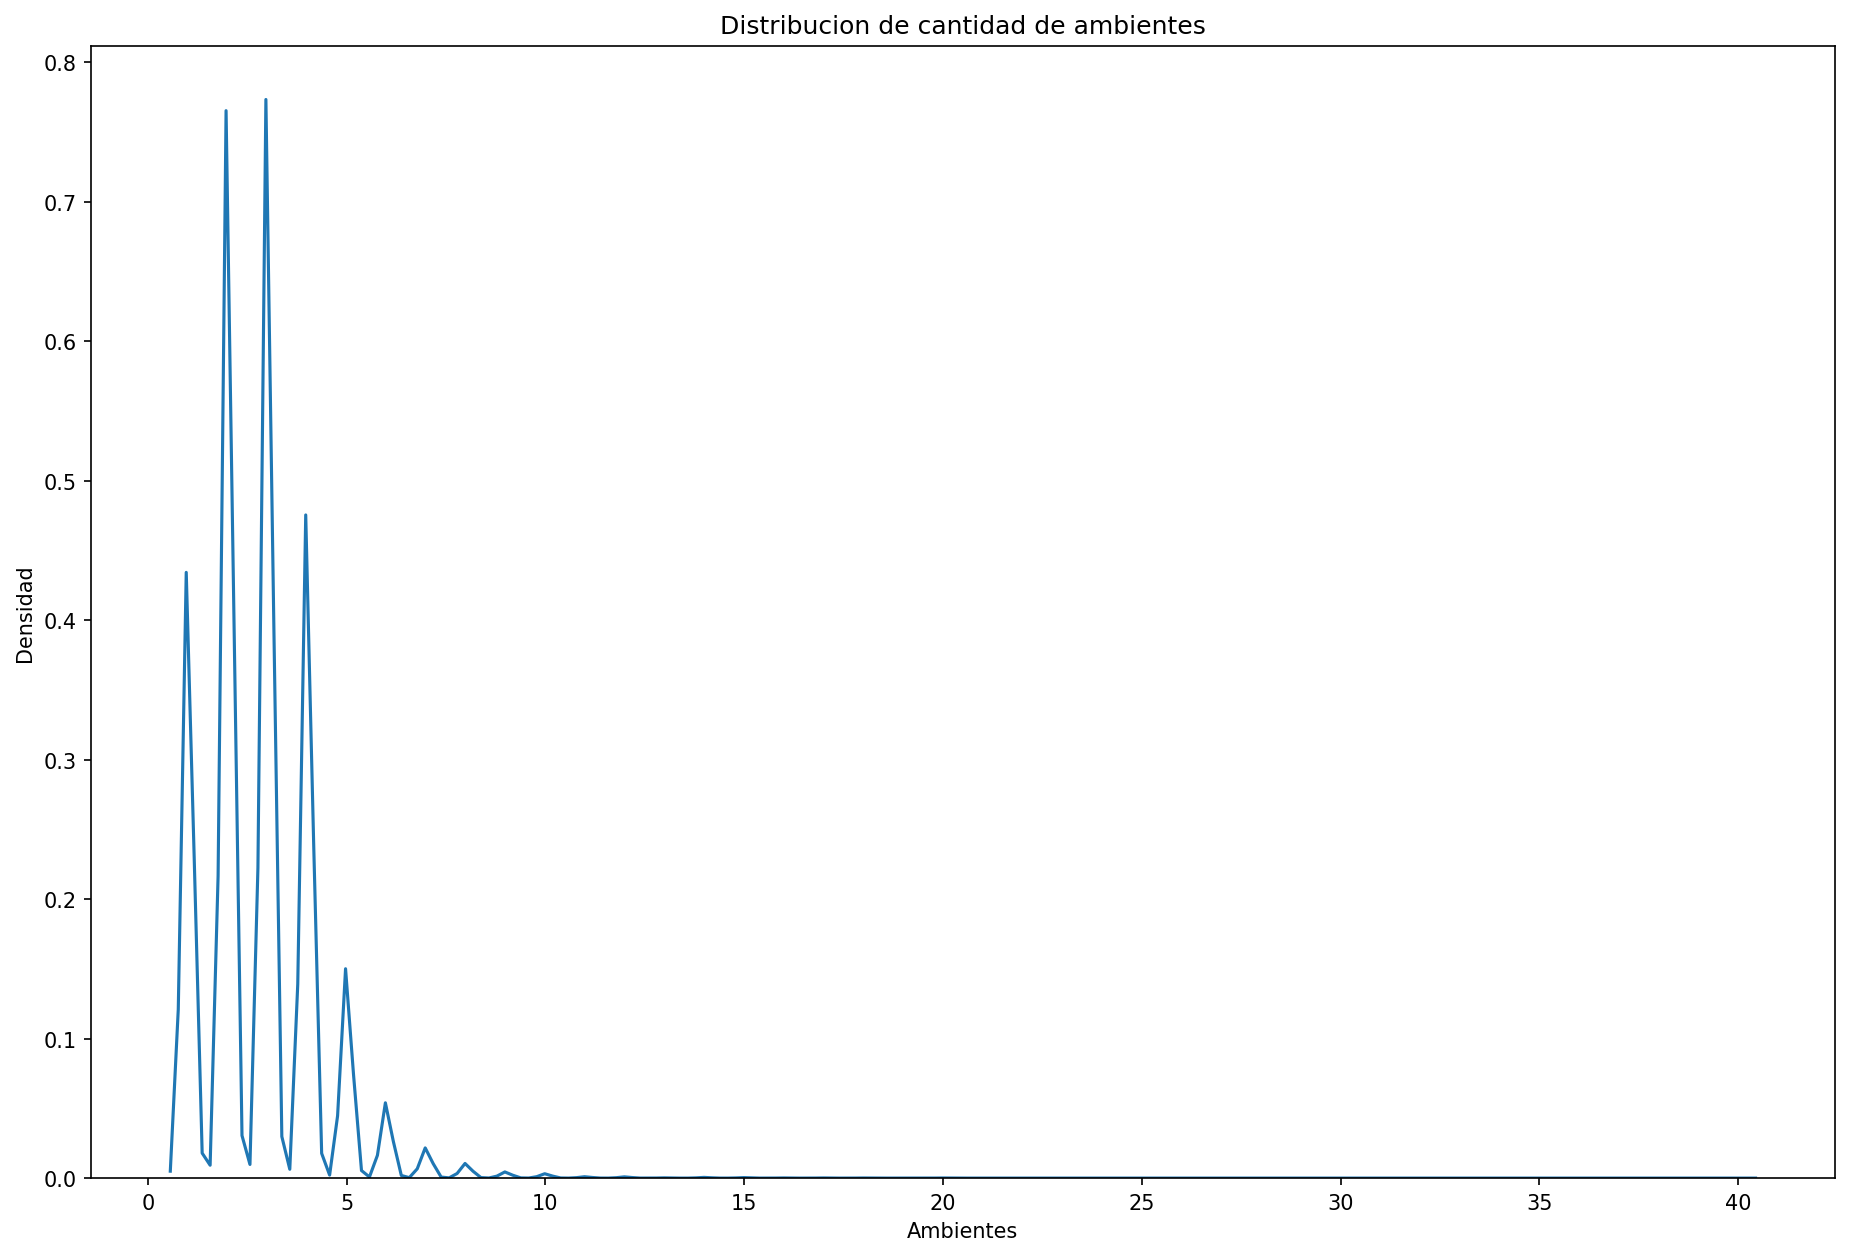

In [31]:
# Distribucion de la variable property_rooms
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
sns_hist=sns.kdeplot(data=df.property_rooms).set(title="Distribucion de cantidad de ambientes",xlabel="Ambientes",ylabel="Densidad")

#### Feature: property_bedrooms

In [32]:
# Medidas de resumen para la variable property_bedrooms
df.property_bedrooms.describe()

count    82974.000000
mean         2.013113
std          1.129058
min         -1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         70.000000
Name: property_bedrooms, dtype: float64

In [33]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_bedrooms.unique())

25

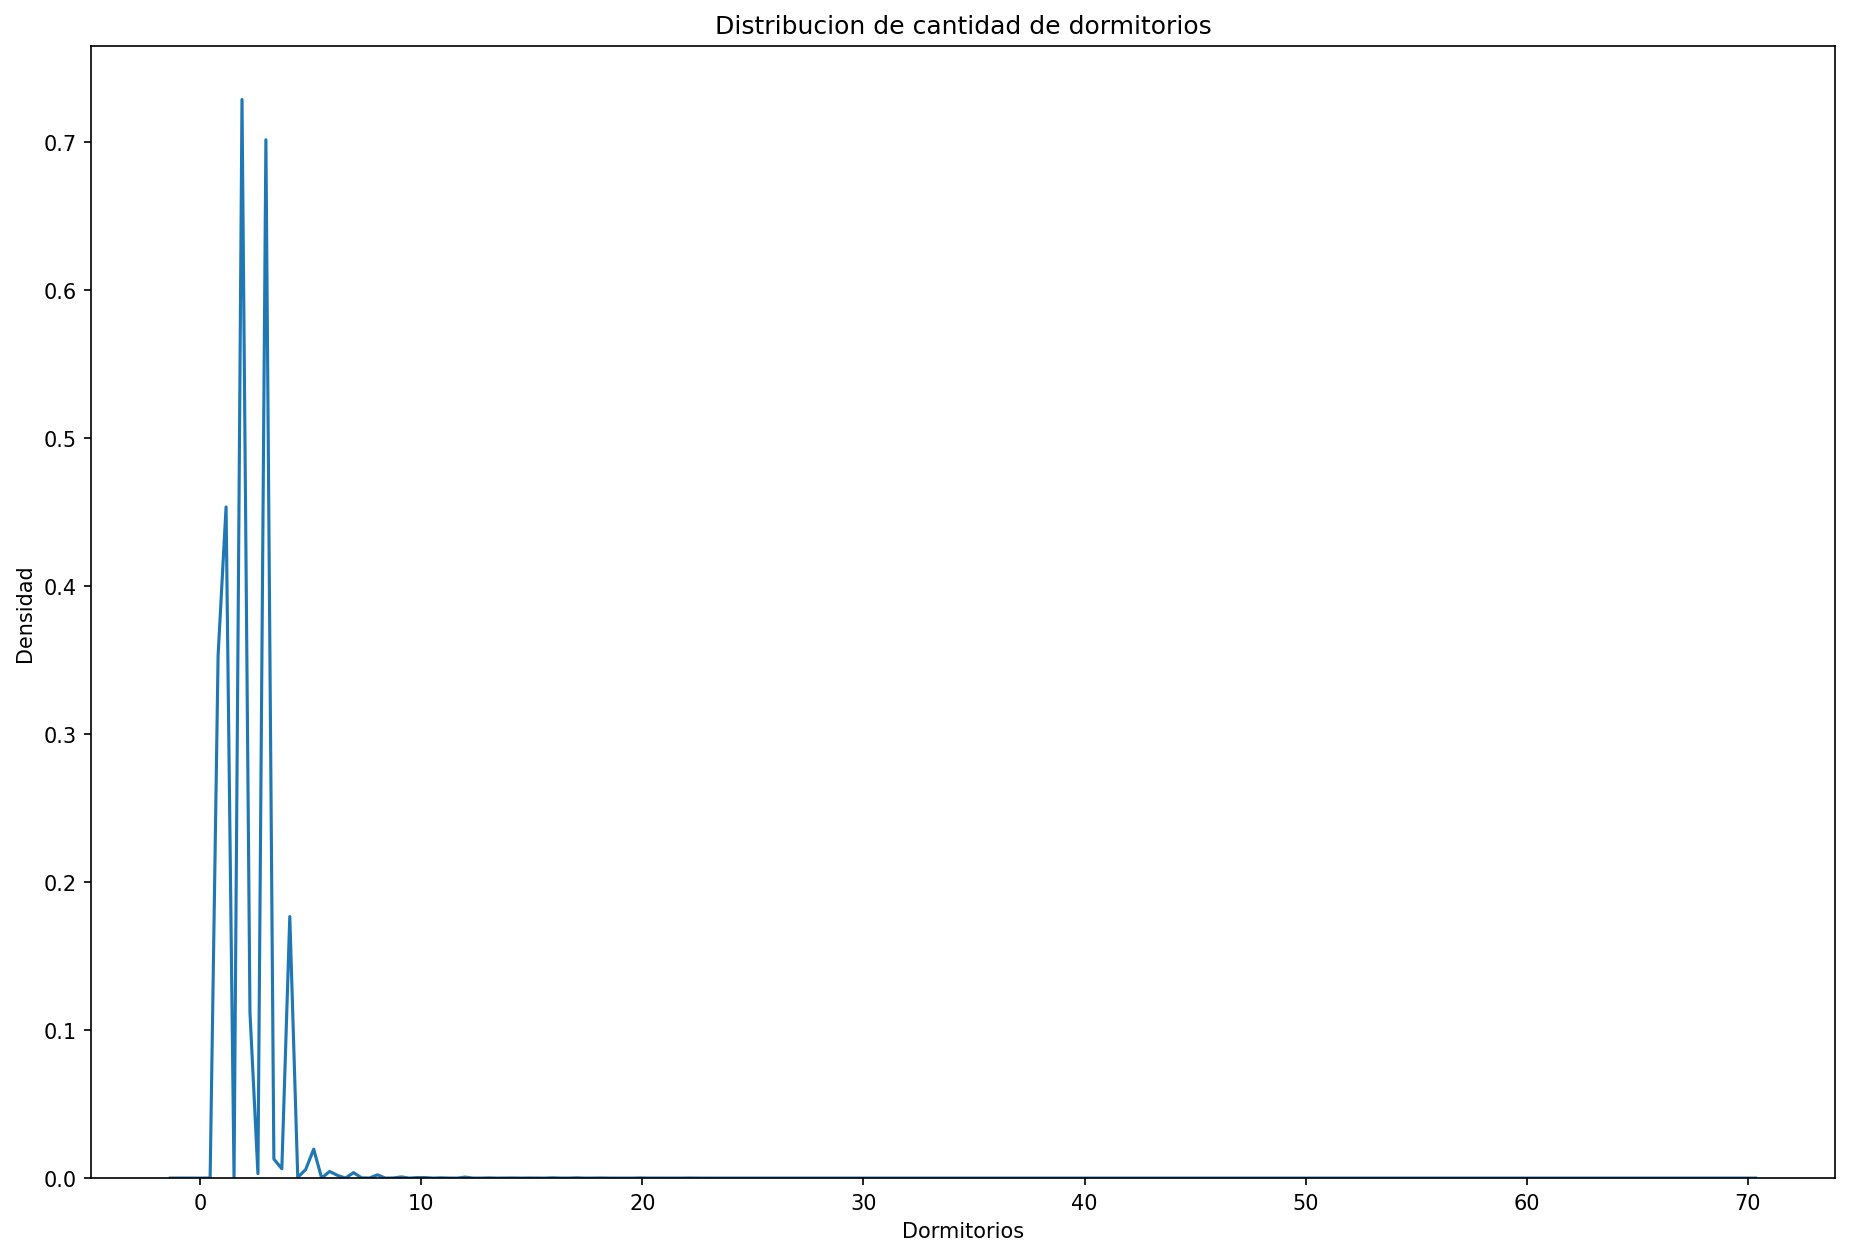

In [34]:
# Distribucion de la variable property_bedrooms
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de cantidad de dormitorios",xlabel="Dormitorios",ylabel="Densidad")

#### Feature: property_surface_total

In [35]:
# Medidas de resumen para la variable property_surface_total
df.property_surface_total.describe()

count     89059.000000
mean        107.659170
std         960.904227
min          10.000000
25%          45.000000
50%          65.000000
75%         104.000000
max      137000.000000
Name: property_surface_total, dtype: float64

In [36]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_surface_total.unique())

698

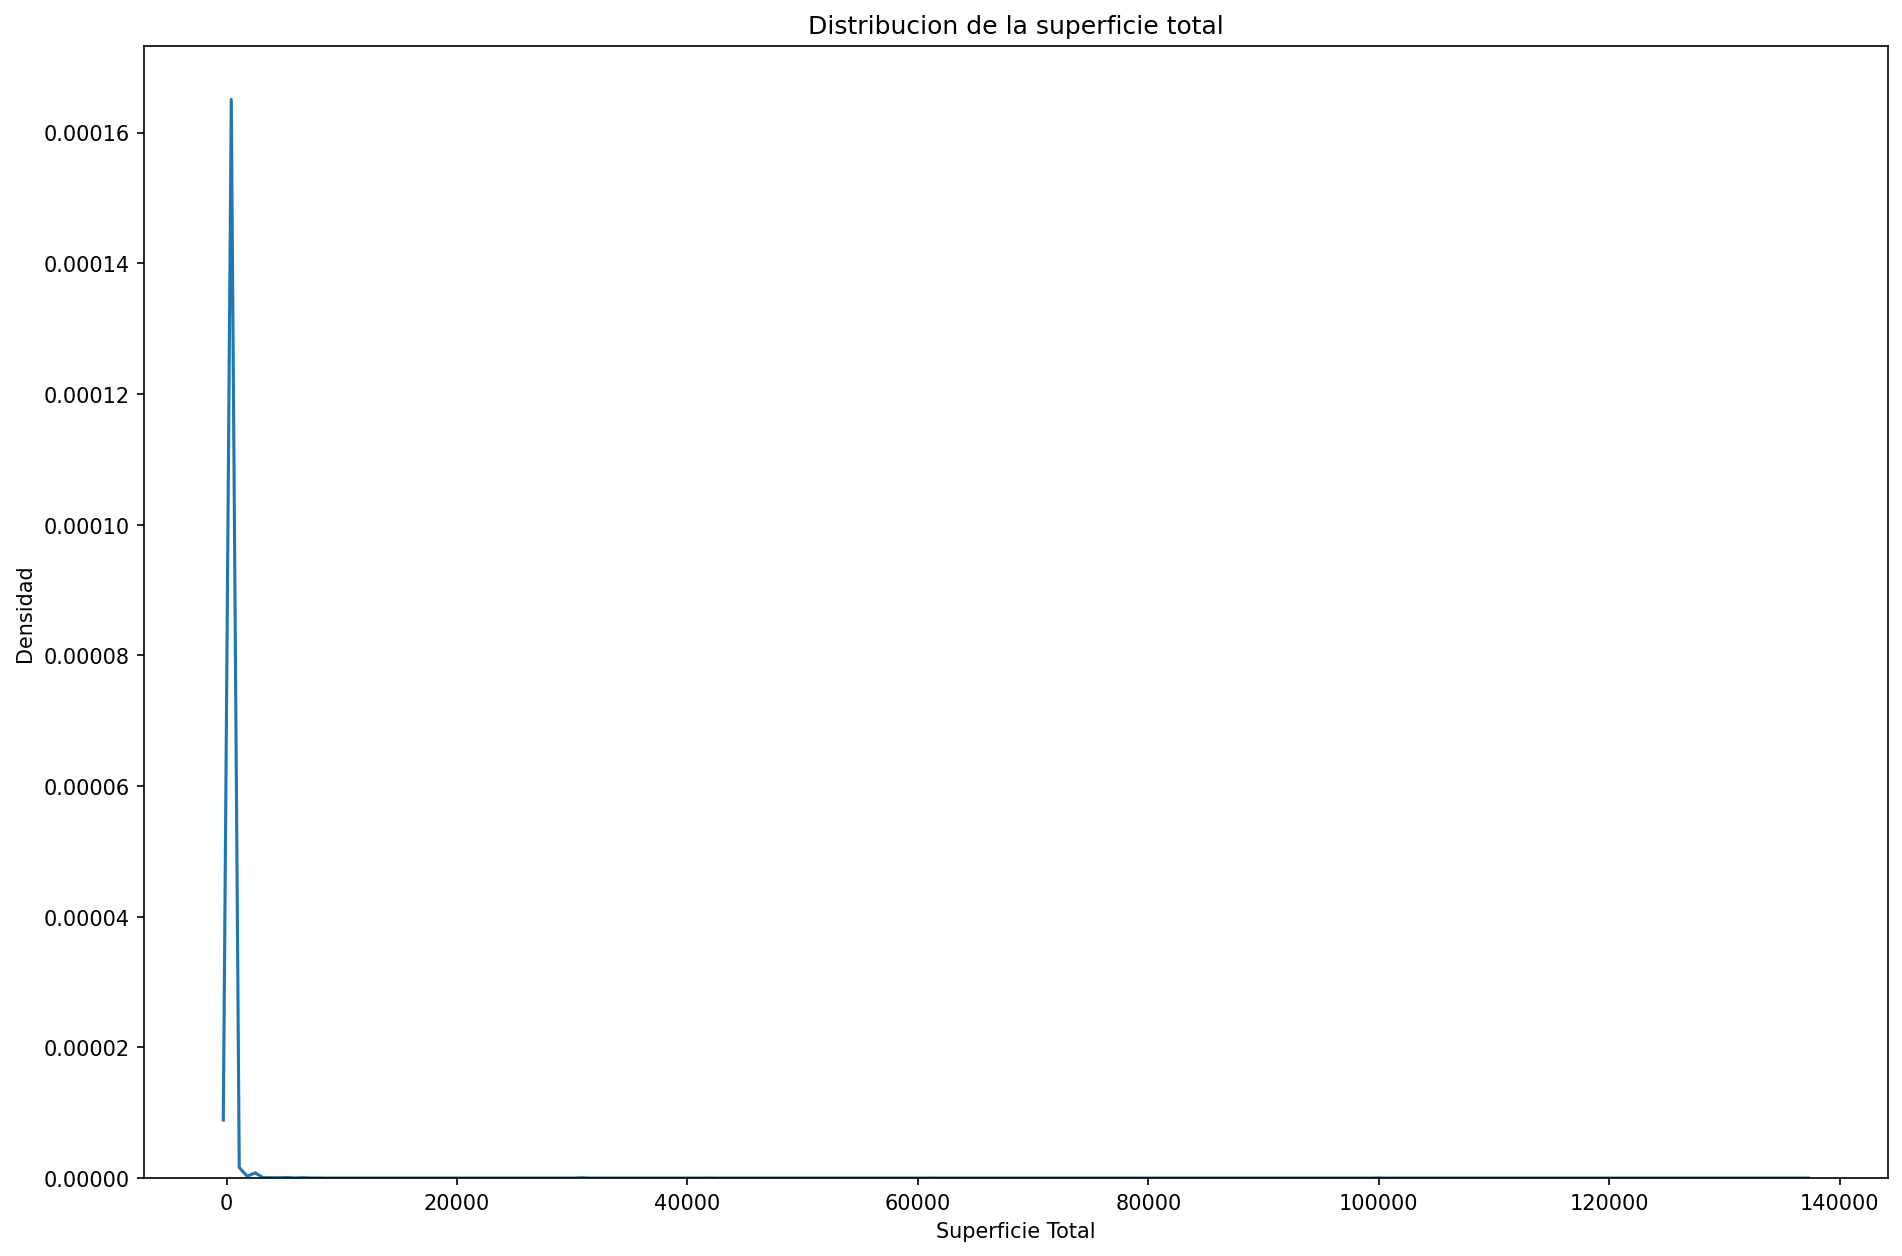

In [37]:
# Distribucion de la variable property_surface_total
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
sns_hist=sns.kdeplot(data=df.property_surface_total).set(title="Distribucion de la superficie total",xlabel="Superficie Total",ylabel="Densidad")

#### Feature: property_surface_covered

In [38]:
# Medidas de resumen para la variable property_surface_covered
df.property_surface_covered.describe()

count     90488.000000
mean         87.783596
std         993.119808
min           1.000000
25%          40.000000
50%          57.000000
75%          88.000000
max      217000.000000
Name: property_surface_covered, dtype: float64

In [39]:
# Vemos cuantos valores unicos hay en la columna
len(df.property_surface_covered.unique())

587

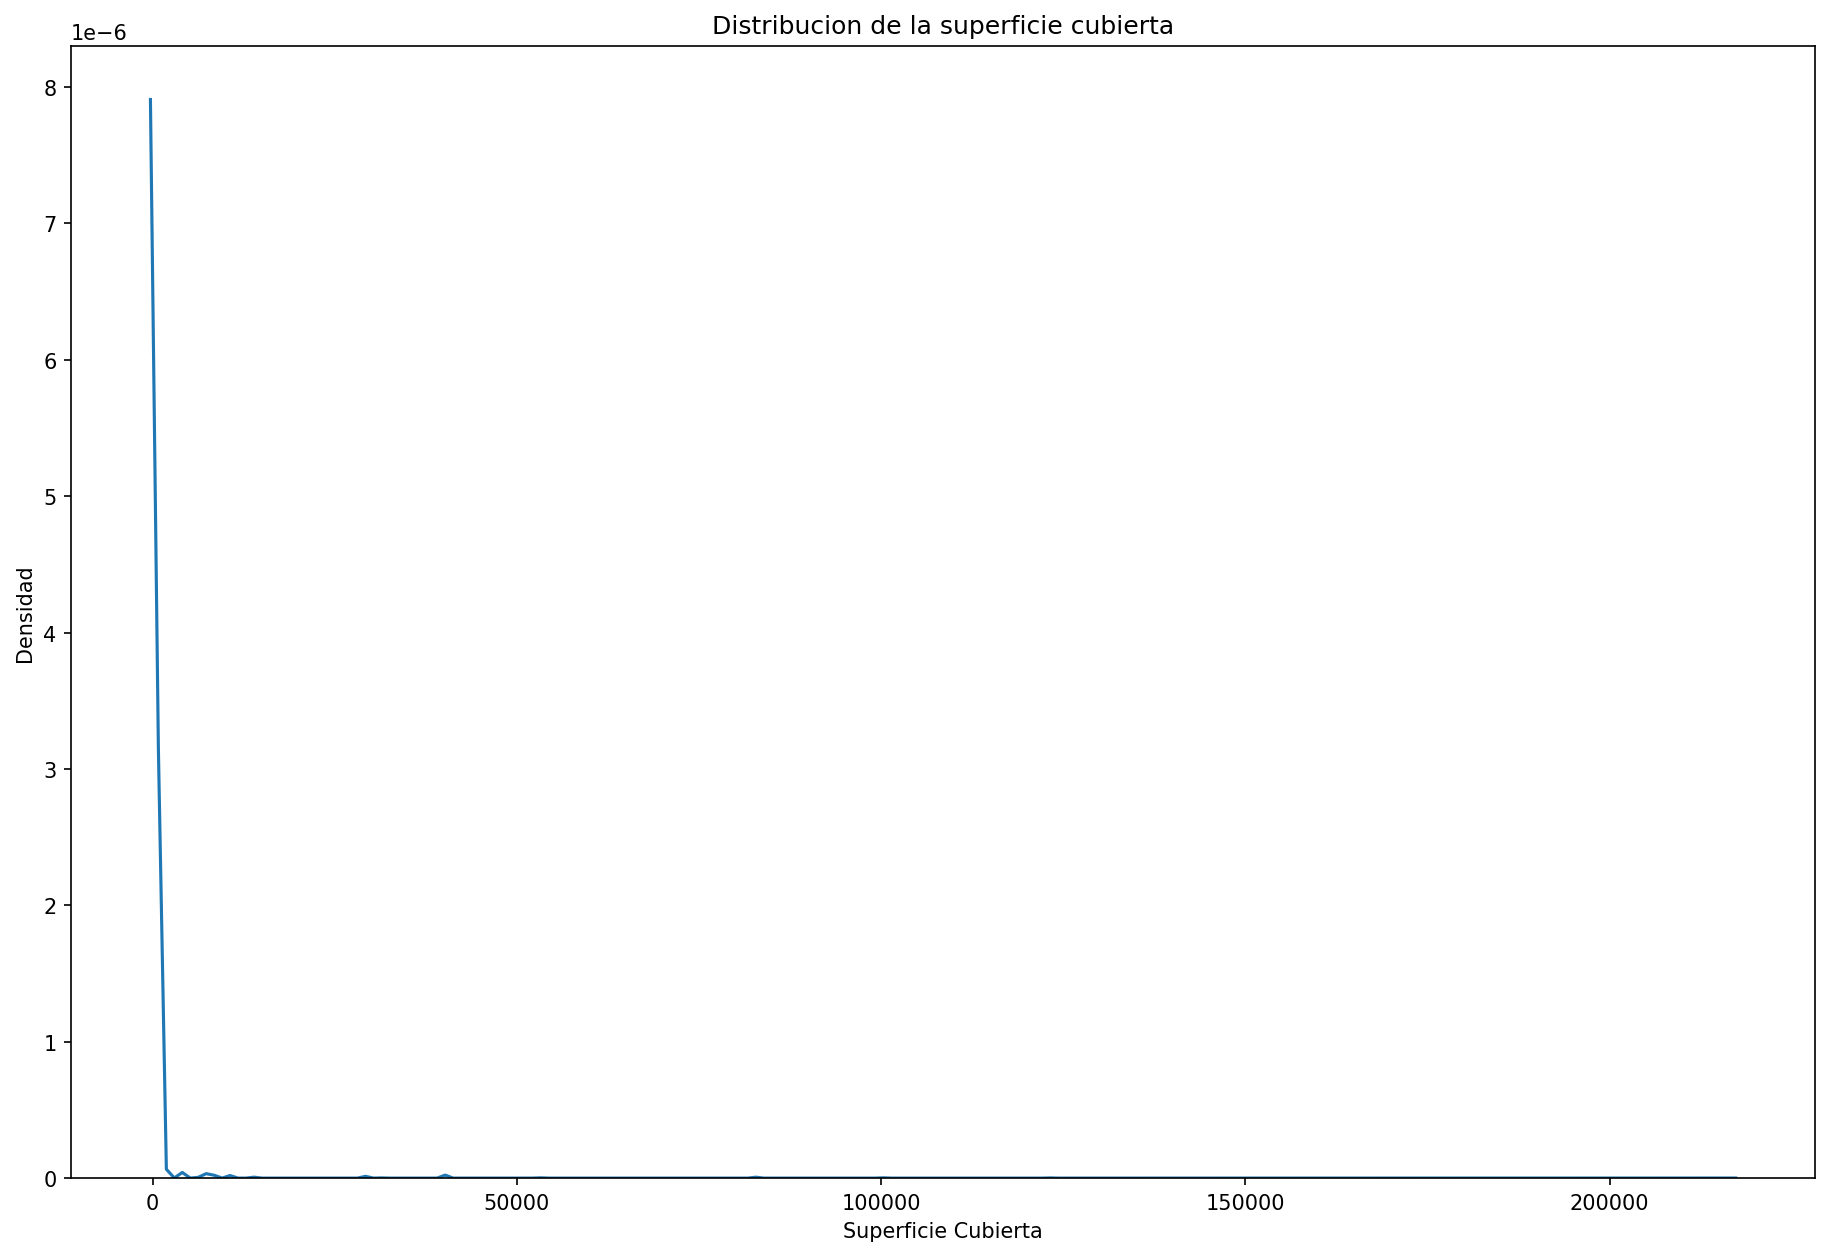

In [40]:
# Distribucion de la variable property_surface_covered
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
sns_hist=sns.kdeplot(data=df.property_surface_covered).set(title="Distribucion de la superficie cubierta",xlabel="Superficie Cubierta",ylabel="Densidad")

#### Brayan:

#### Feature: Longitud y latitud

Text(0.5, 1.0, 'Latitud')

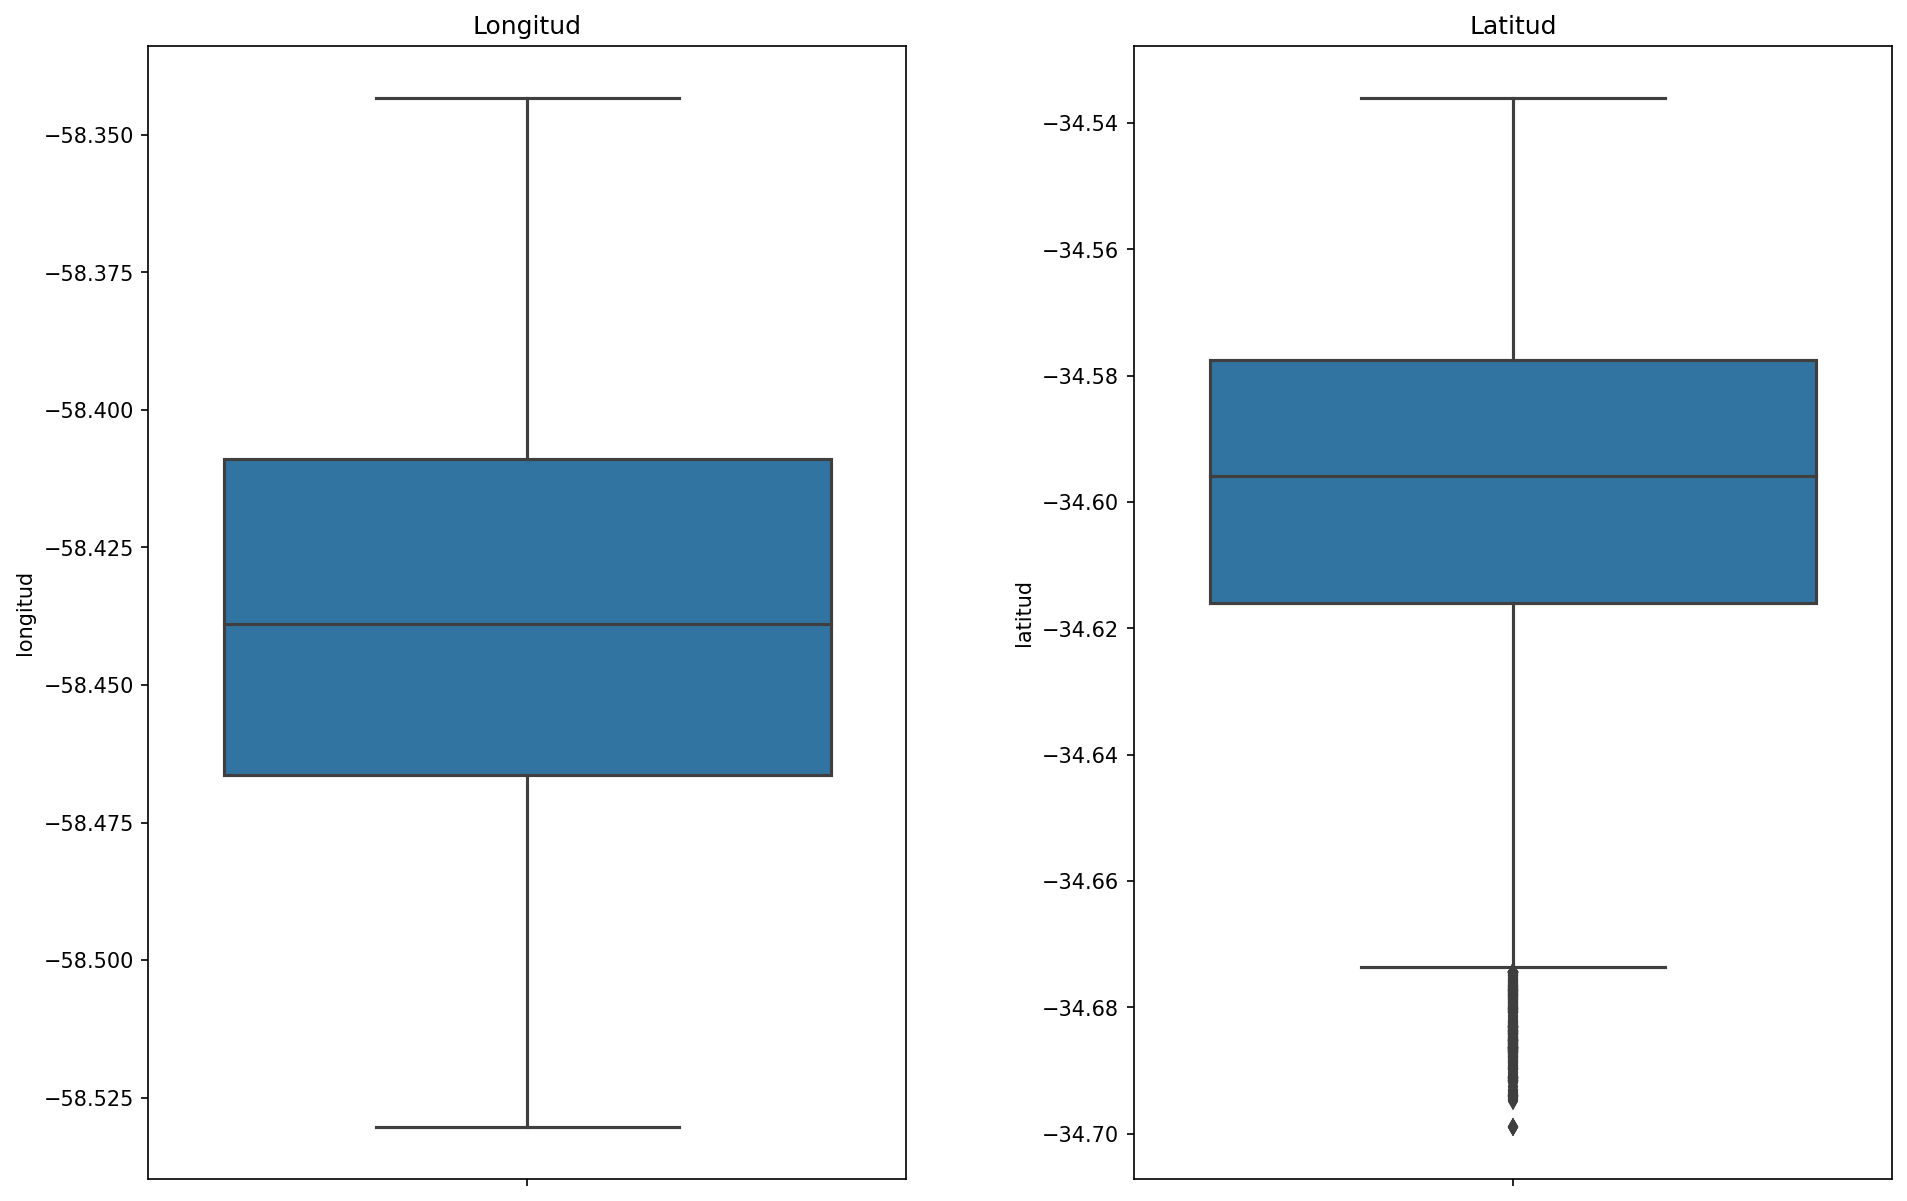

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(15, 10))
sns.boxplot(y=df['longitud'], ax=axes[0])
sns.boxplot(y=df['latitud'], ax=axes[1])
plt.subplots_adjust(wspace=0.3)
axes[0].set_title("Longitud")
axes[1].set_title("Latitud")

<h4 align="center"><b> Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno </b></h4>

#### Brayan:

**Feature fechas:** La idea es que por cada feature fecha se cree 3 features, 1 por el dia, 1 por el mes y uno por el año.<br>
Ejemplo:
   - Feature original: 2020-10-17 --> F1: 2020   F2:10   F3:17
   - Feature original: 2021-11-19 --> F1: 2021   F2:11   F3:19

In [42]:
'''
Precondicion: 
        - f debe ser un feature de df.
        - Los datos de f son del formato yy-mm-dd
        - yy/mm/dd son int en formato string
'''

def procesar_fechas(df, f):
    day = []
    month = []
    year = []
    for date in df[f]:
        _year, _month, _day = date.split('-')
        day.append(int(_day))
        month.append(int(_month))
        year.append(int(_year))
    return day, month, year

In [43]:
start_date_day, start_date_month, start_date_year = procesar_fechas(df, 'start_date')
df['start_date_day'] = start_date_day
df['start_date_month'] = start_date_month
df['start_date_year'] = start_date_year

In [44]:
end_date_day, end_date_month, end_date_year = procesar_fechas(df, 'end_date')
df['end_date_day'] = end_date_day
df['end_date_month'] = end_date_month
df['end_date_year'] = end_date_year

In [45]:
created_on_day, created_on_month, created_on_year = procesar_fechas(df, 'created_on')
df['created_on_day'] = created_on_day
df['created_on_month'] = created_on_month
df['created_on_year'] = created_on_year

In [46]:
df.drop(columns = ['start_date', 'end_date', 'created_on'], inplace=True) 

Grafico las distribuciones:

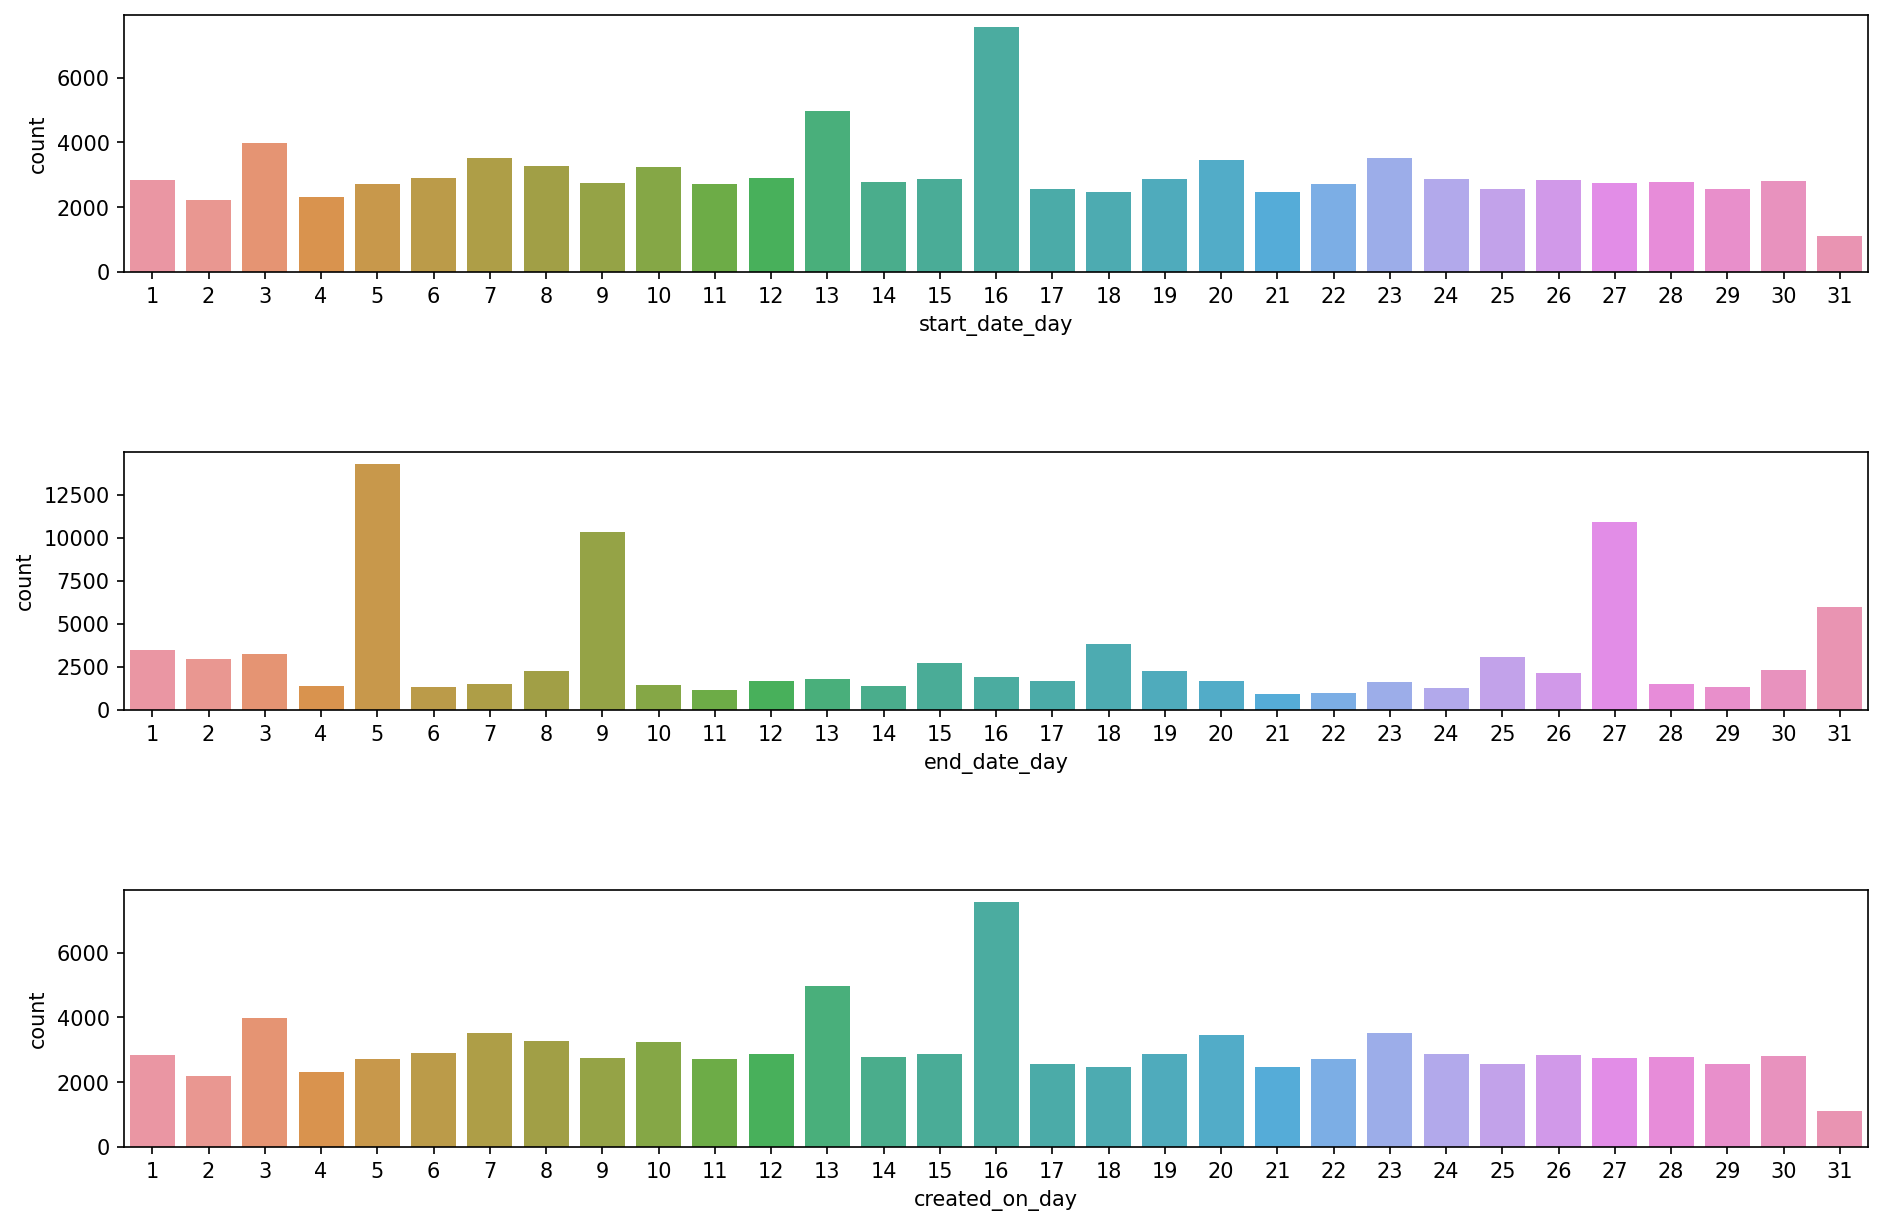

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(15, 10))
sns.countplot(
    x="start_date_day", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_day", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_day", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

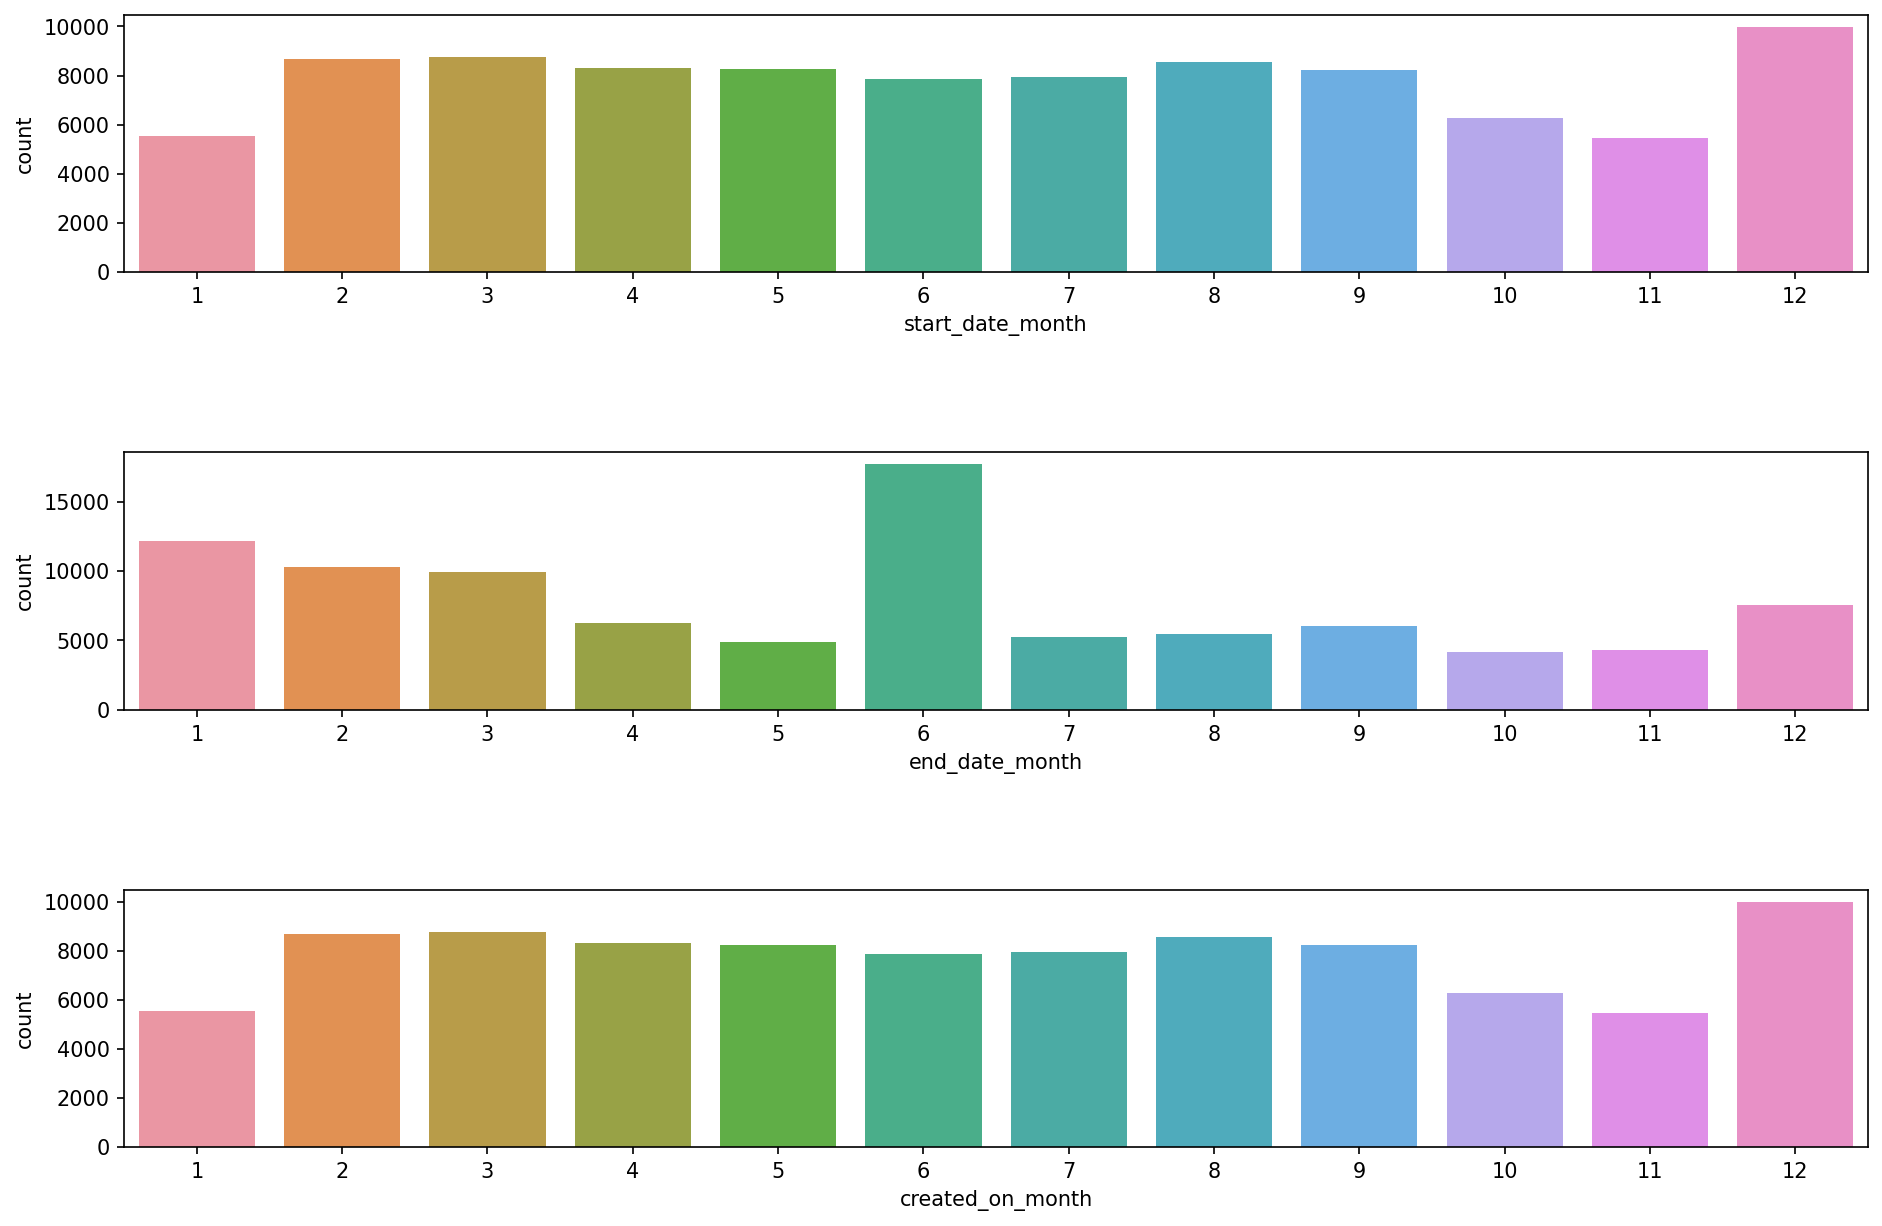

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(15, 10))
sns.countplot(
    x="start_date_month", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_month", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_month", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

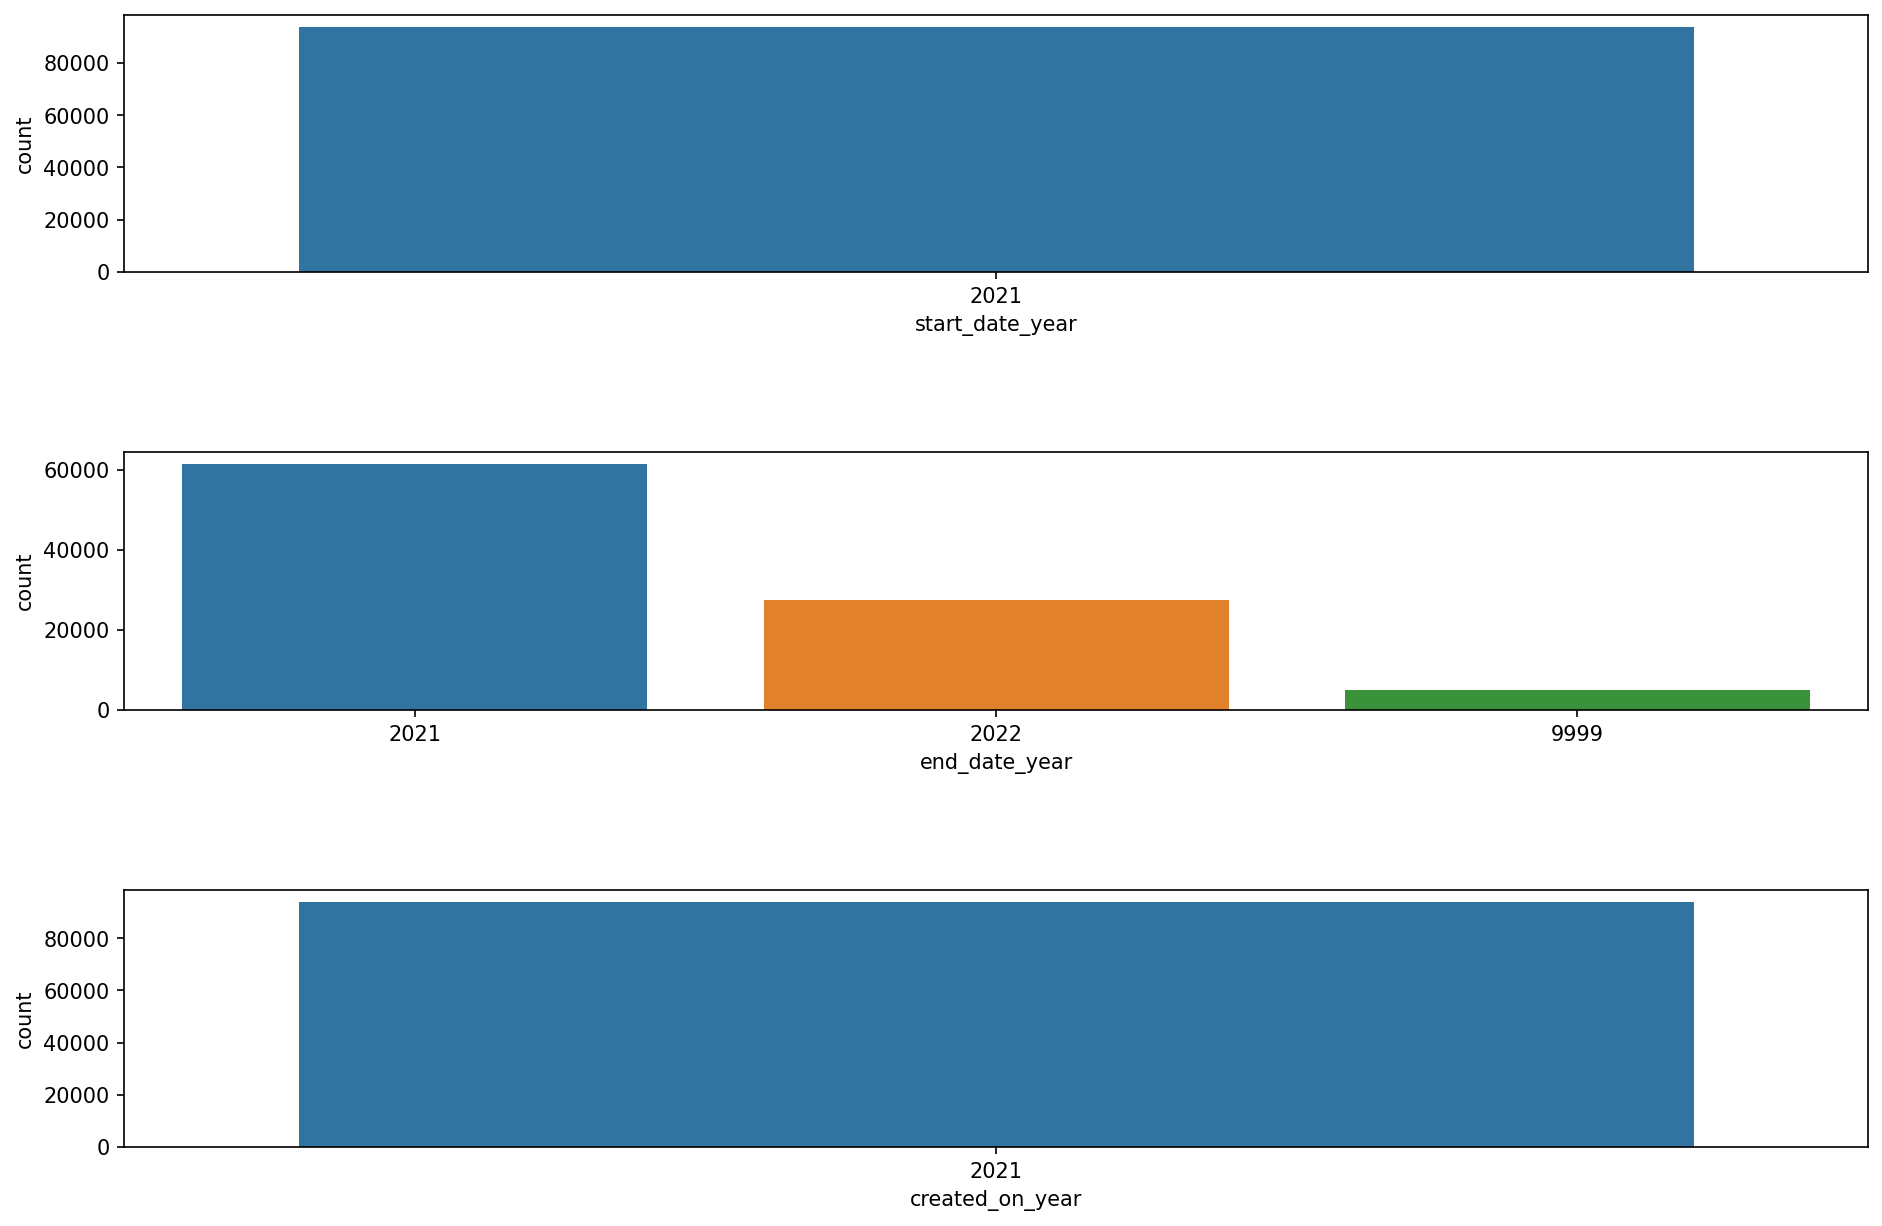

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(15, 10))
sns.countplot(
    x="start_date_year", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_year", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_year", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

#### Analia:

Distribucion tipos de vivienda

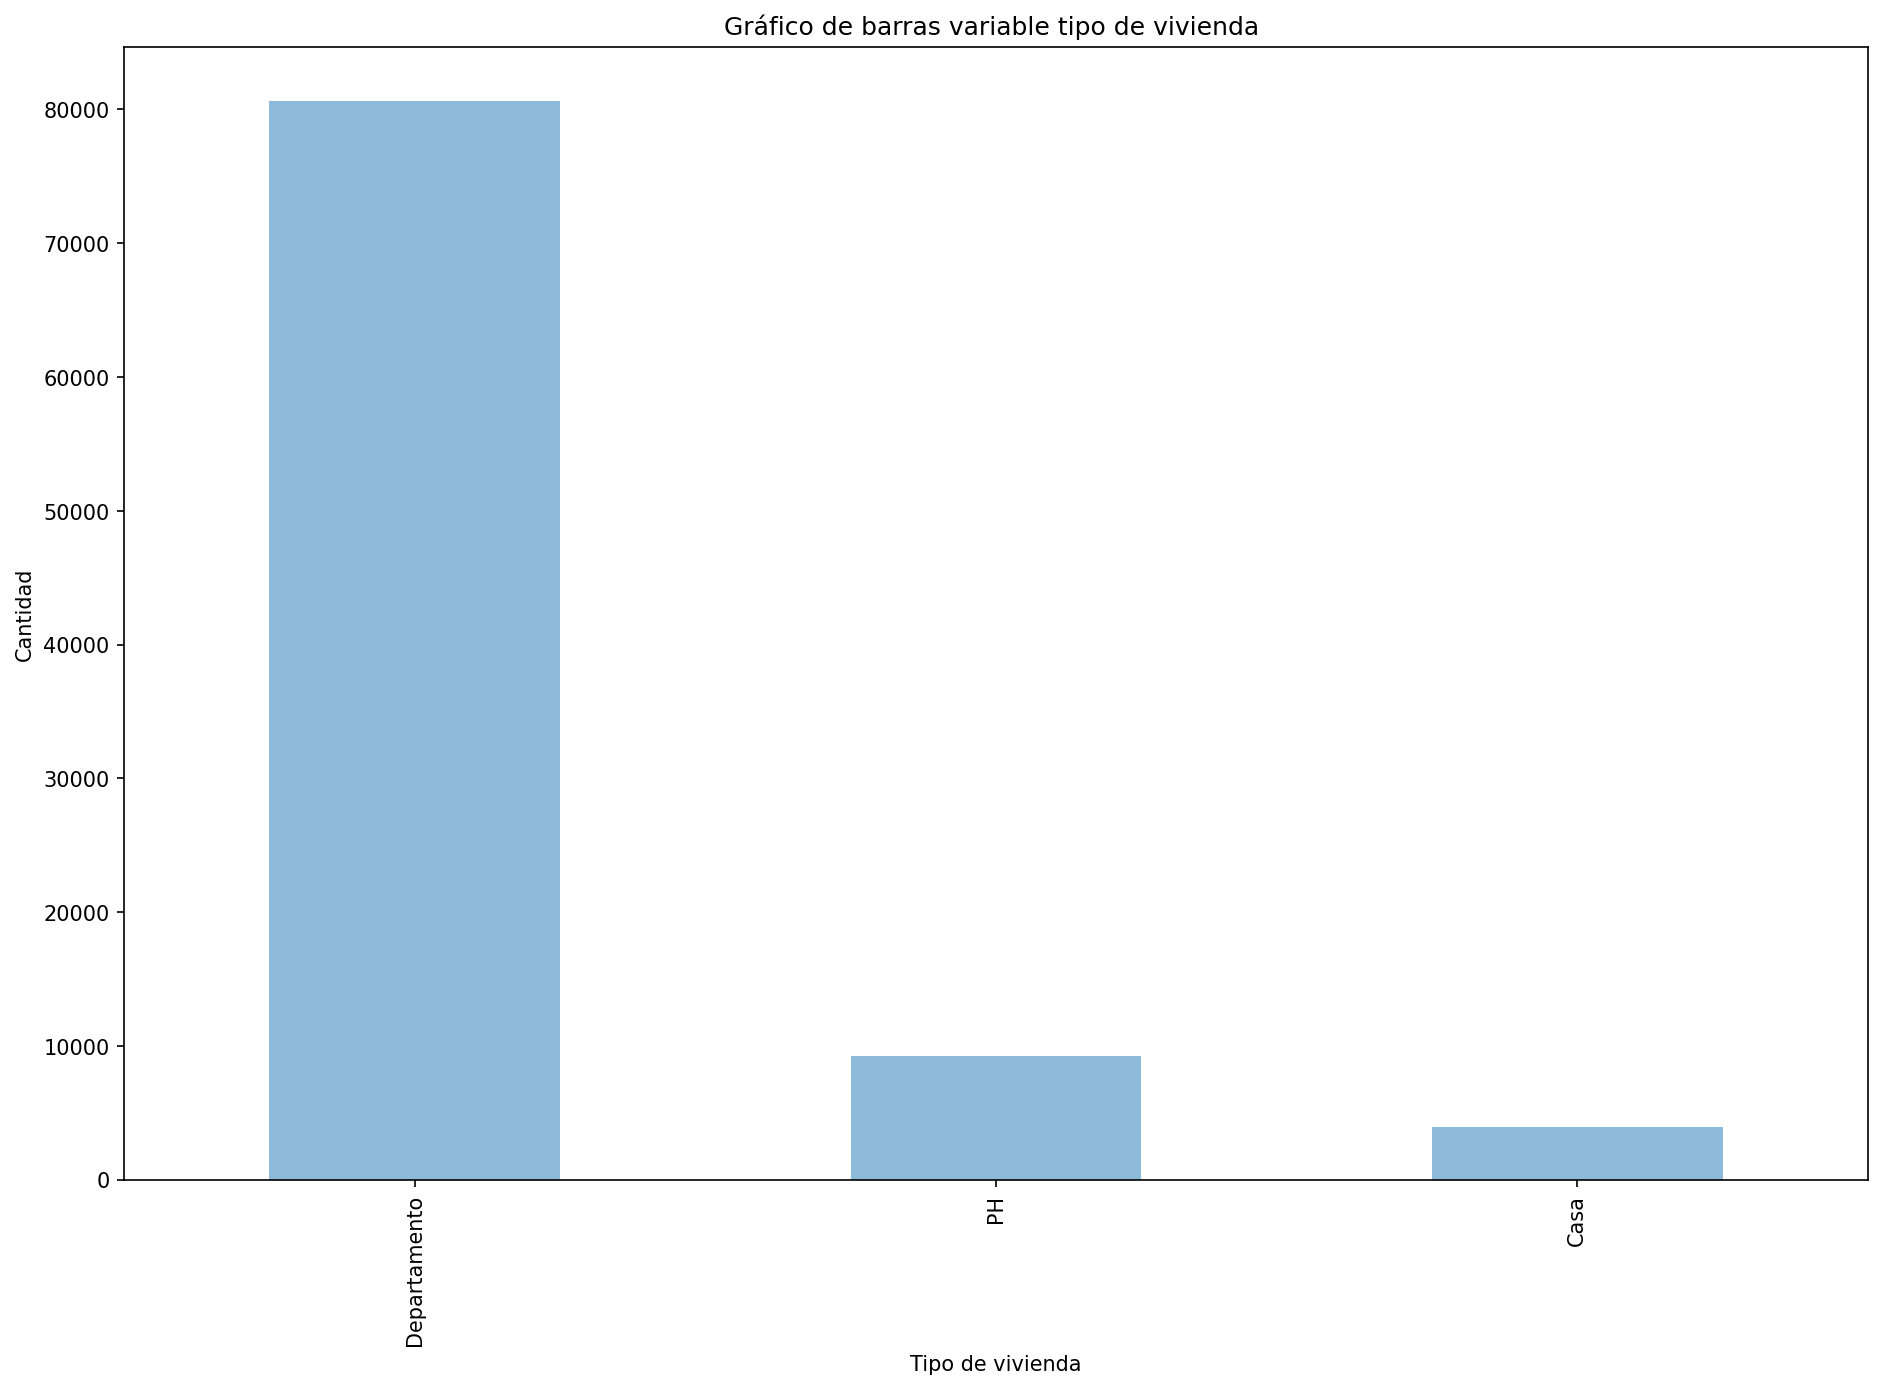

In [50]:
#Gráfico de barras
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
grf_ds=df['property_type'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable tipo de vivienda " , xlabel="Tipo de vivienda" , ylabel="Cantidad")

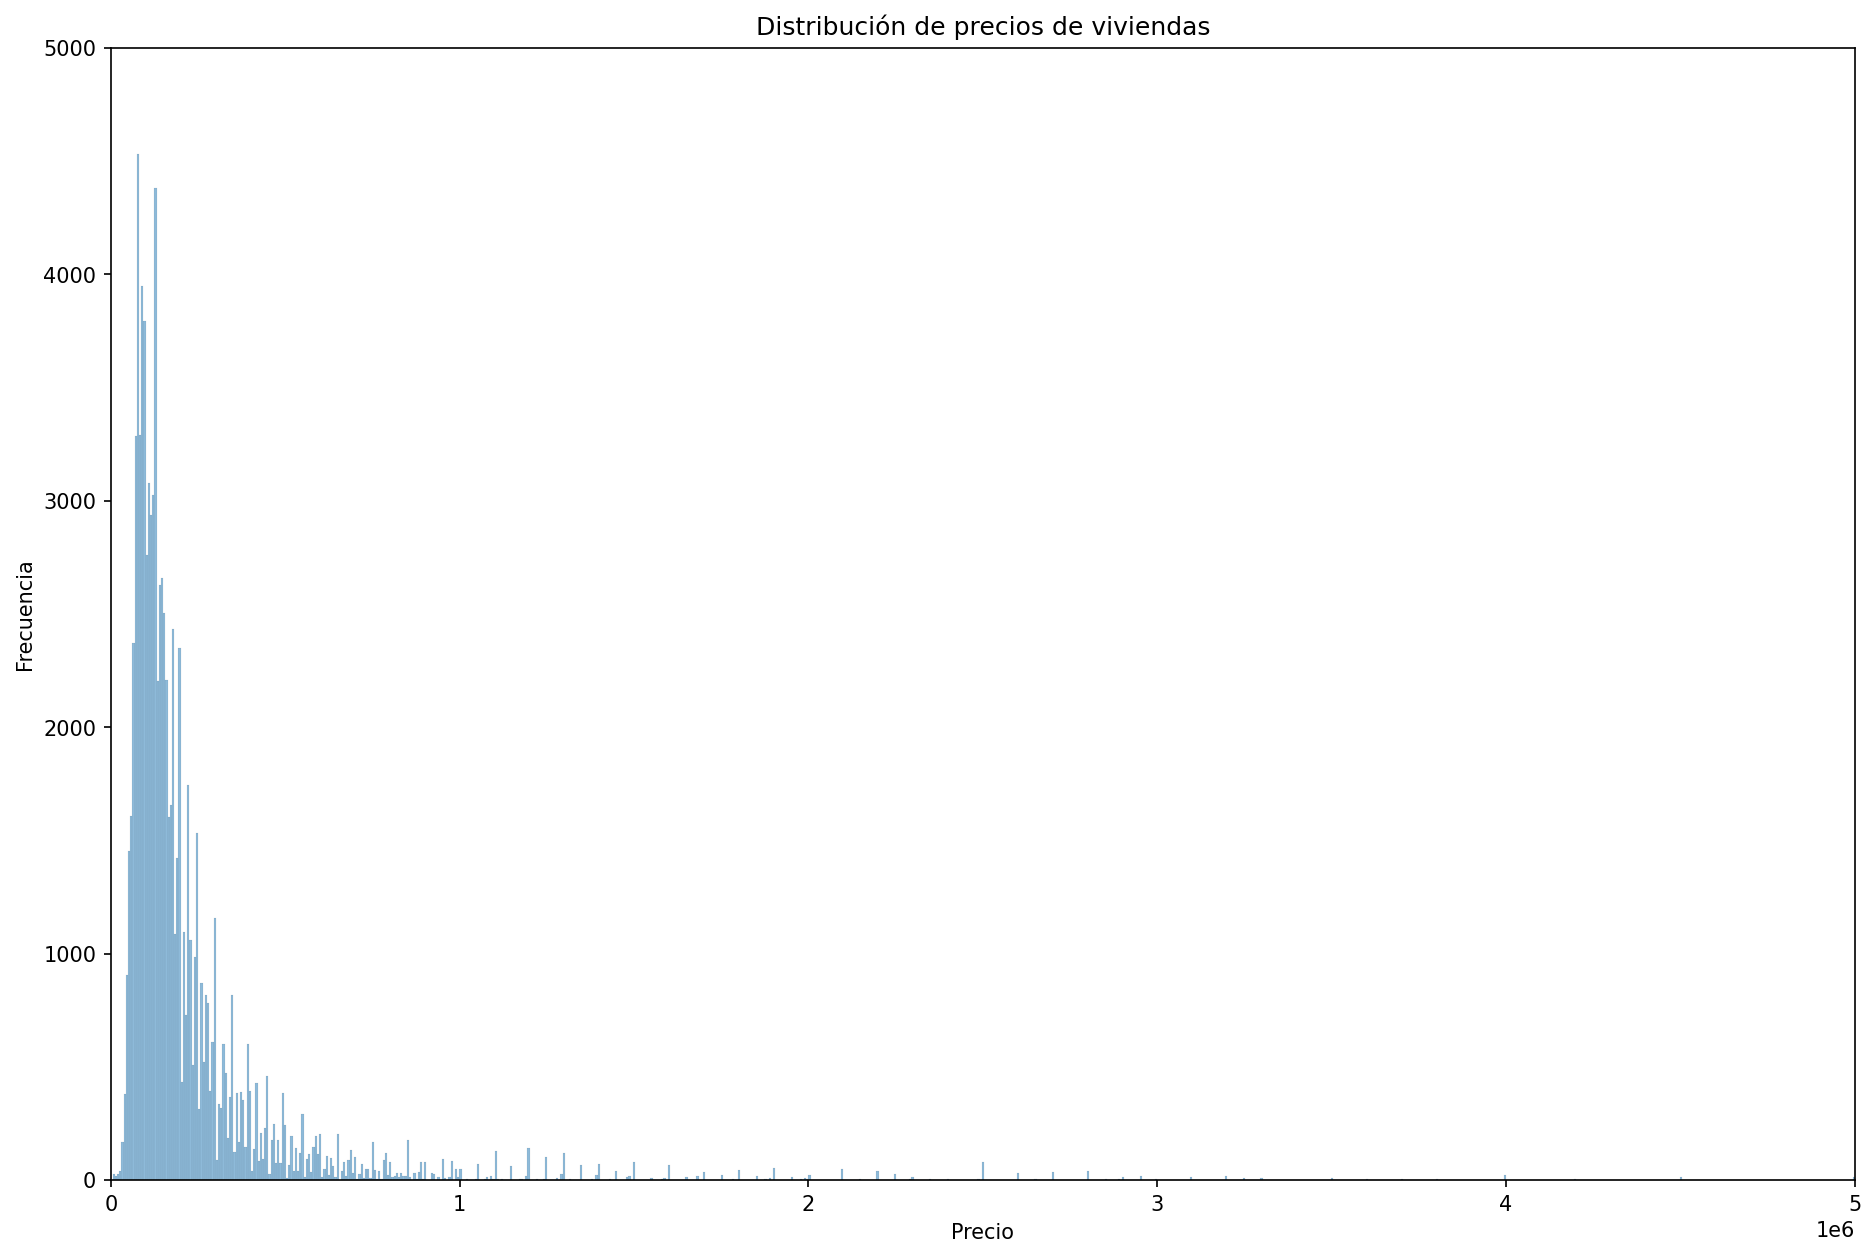

In [51]:
#Histograma de los precios
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
#sns_hist=sns.histplot(data=df['property_price'], alpha = 0.5).set(title="Distribución de precios de viviendas",xlabel="Precio",ylabel="Frecuencia")
sns_hist=sns.histplot(data=df['property_price'], alpha = 0.5).set(title="Distribución de precios de viviendas",xlabel="Precio",ylabel="Frecuencia", ylim=(0, 5000), xlim=(0, 5000000))

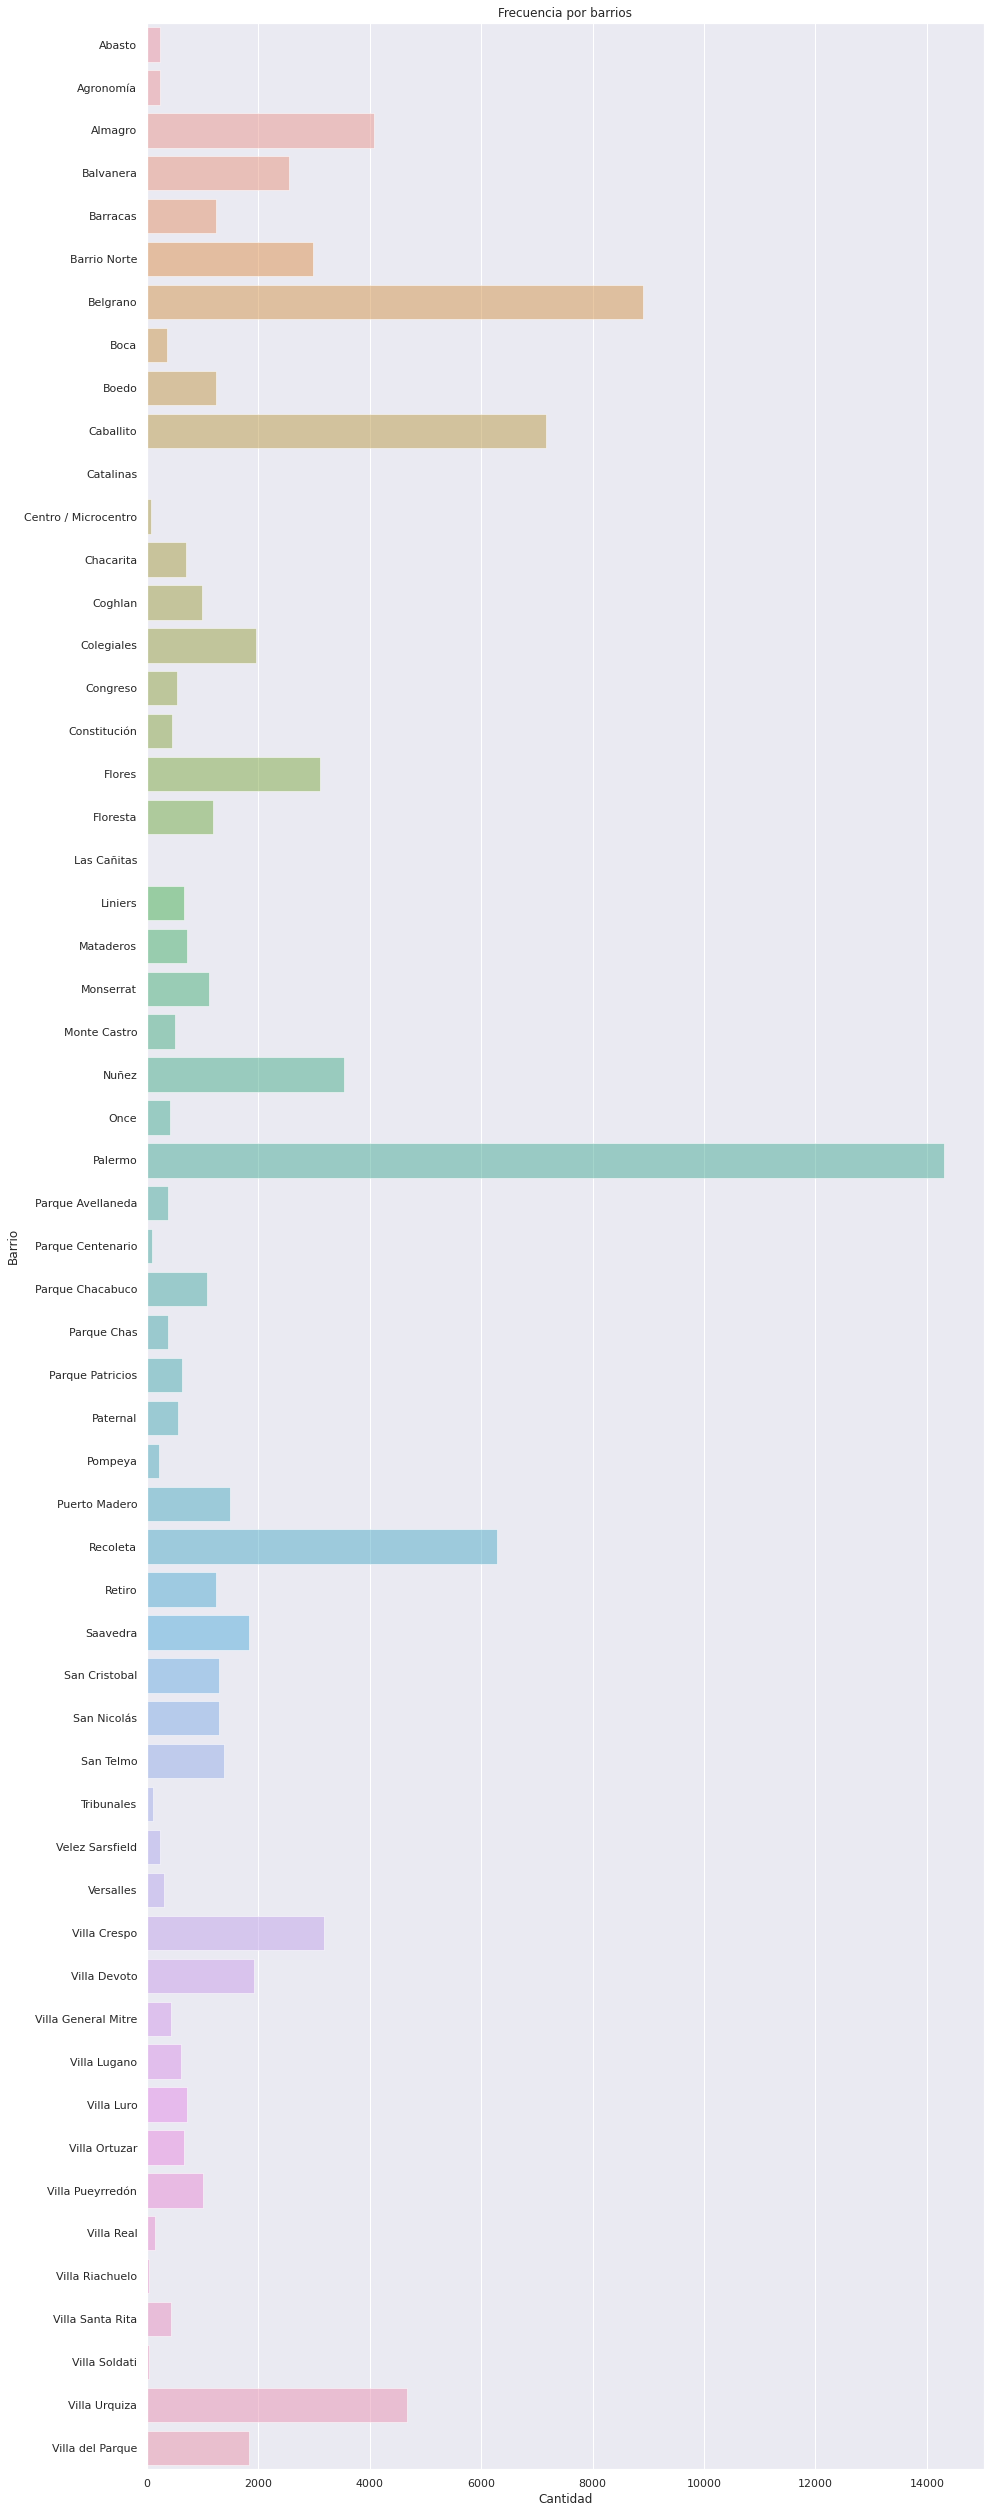

In [52]:
#Seaborn
ds_agrupado_Pclass=df.groupby(['place_l3']).count()  #Calculo la frecuencia de cada barrio

eje_y = ds_agrupado_Pclass.index.tolist()  
eje_x = ds_agrupado_Pclass['property_price'].tolist() 
sns.set(rc={"figure.figsize":(15, 45)})
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_agrupado_Pclass ,alpha=0.5, orient="h").set(title="Frecuencia por barrios",xlabel='Cantidad',ylabel='Barrio')


#### Lucia:

### Tipo de propiedad (Casa, Departamento, PH)

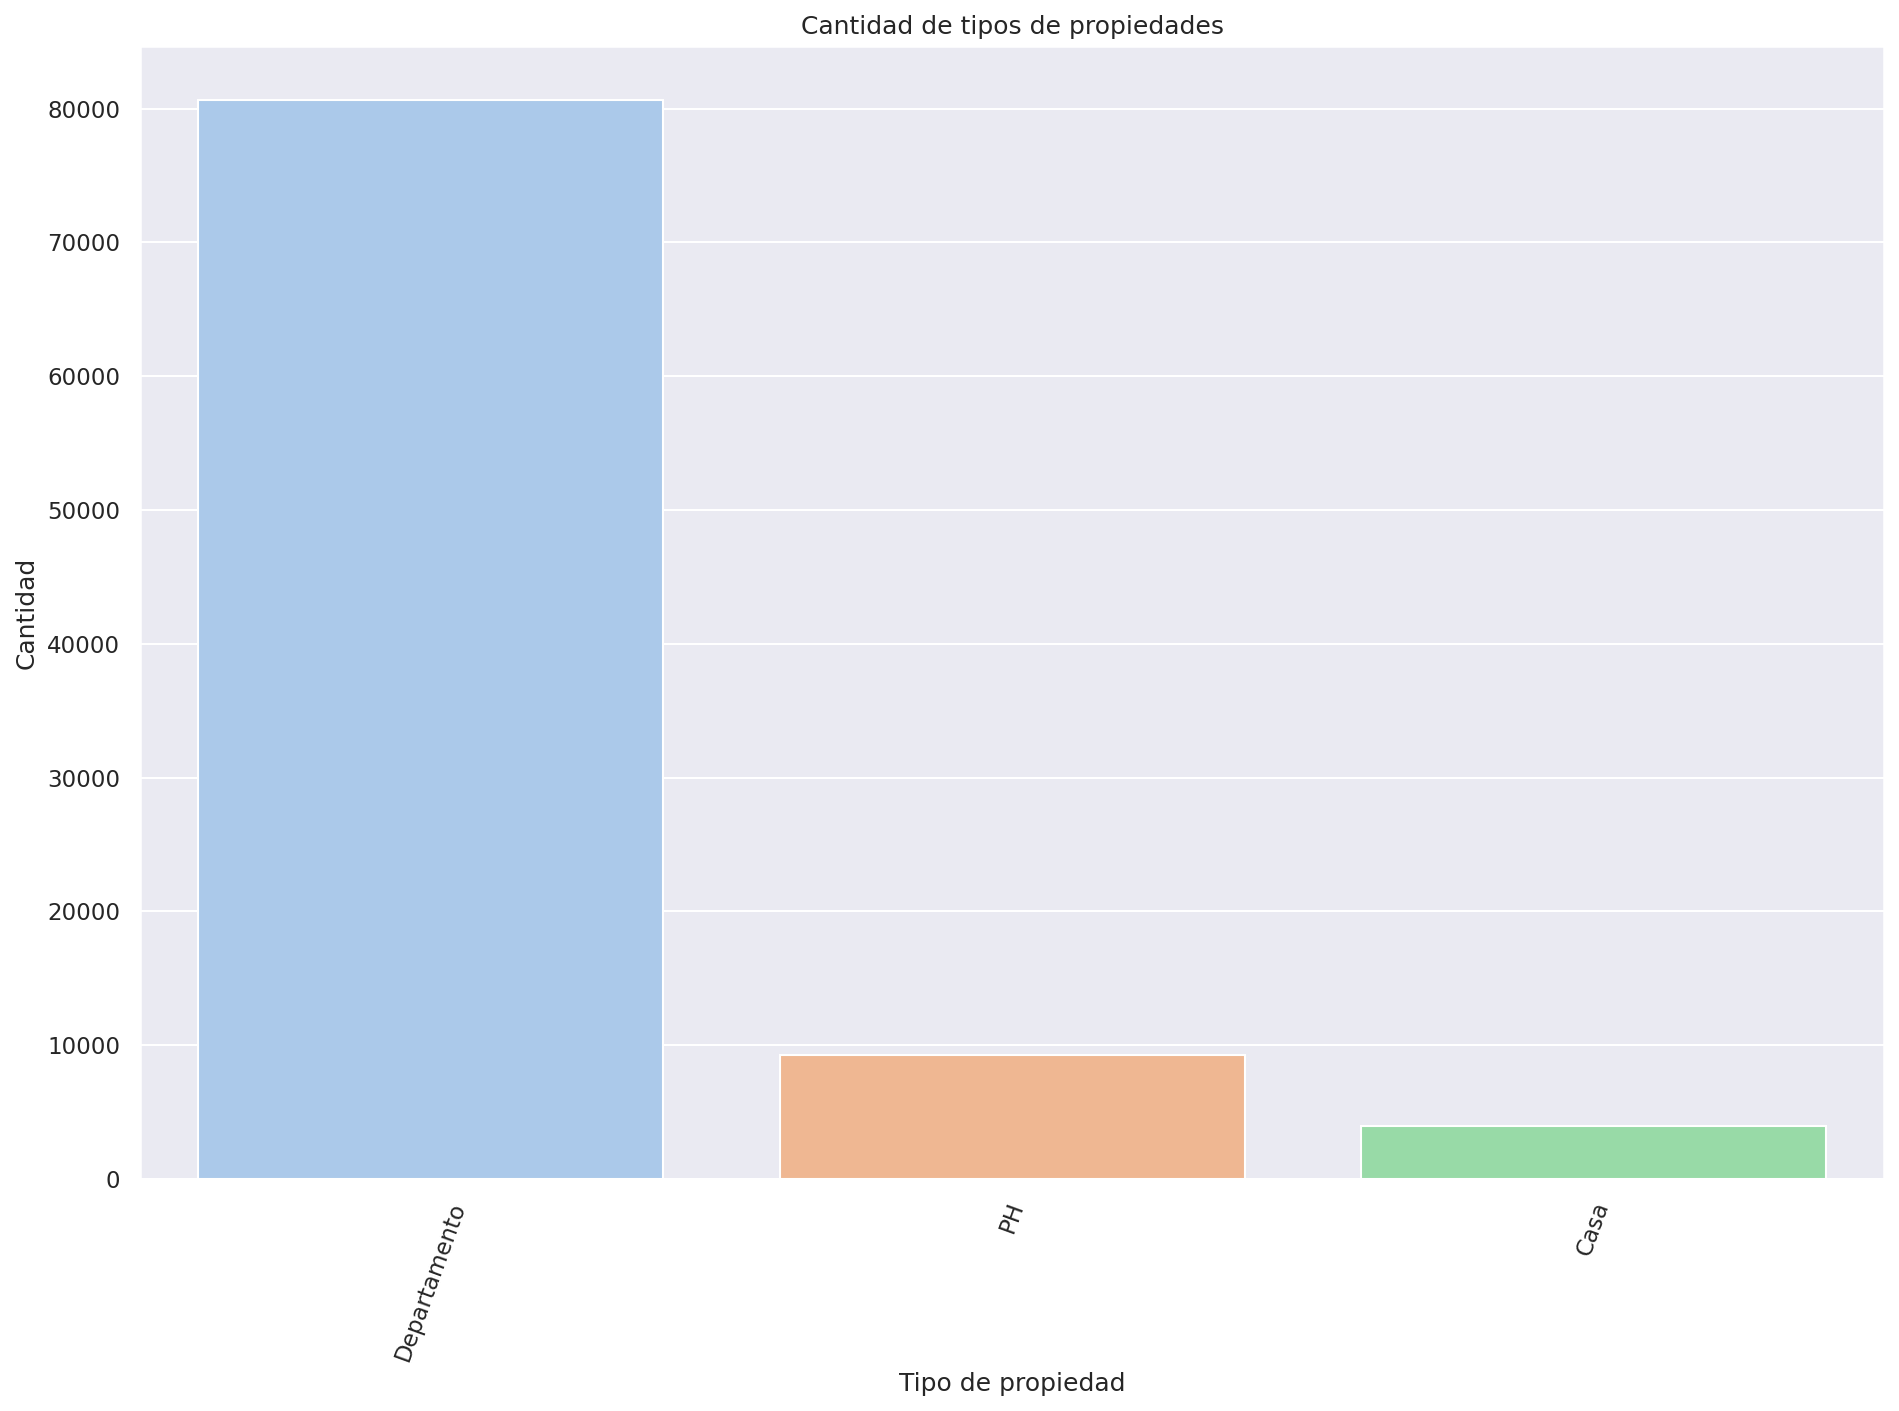

In [53]:
plt.figure(dpi=150, figsize=(15, 10))
colors = sns.color_palette('pastel')
sns.countplot(x= 'property_type', data=df, palette=colors, order=df.property_type.value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Tipo de propiedad")
plt.xticks(rotation=70)
plt.title("Cantidad de tipos de propiedades")
plt.show()

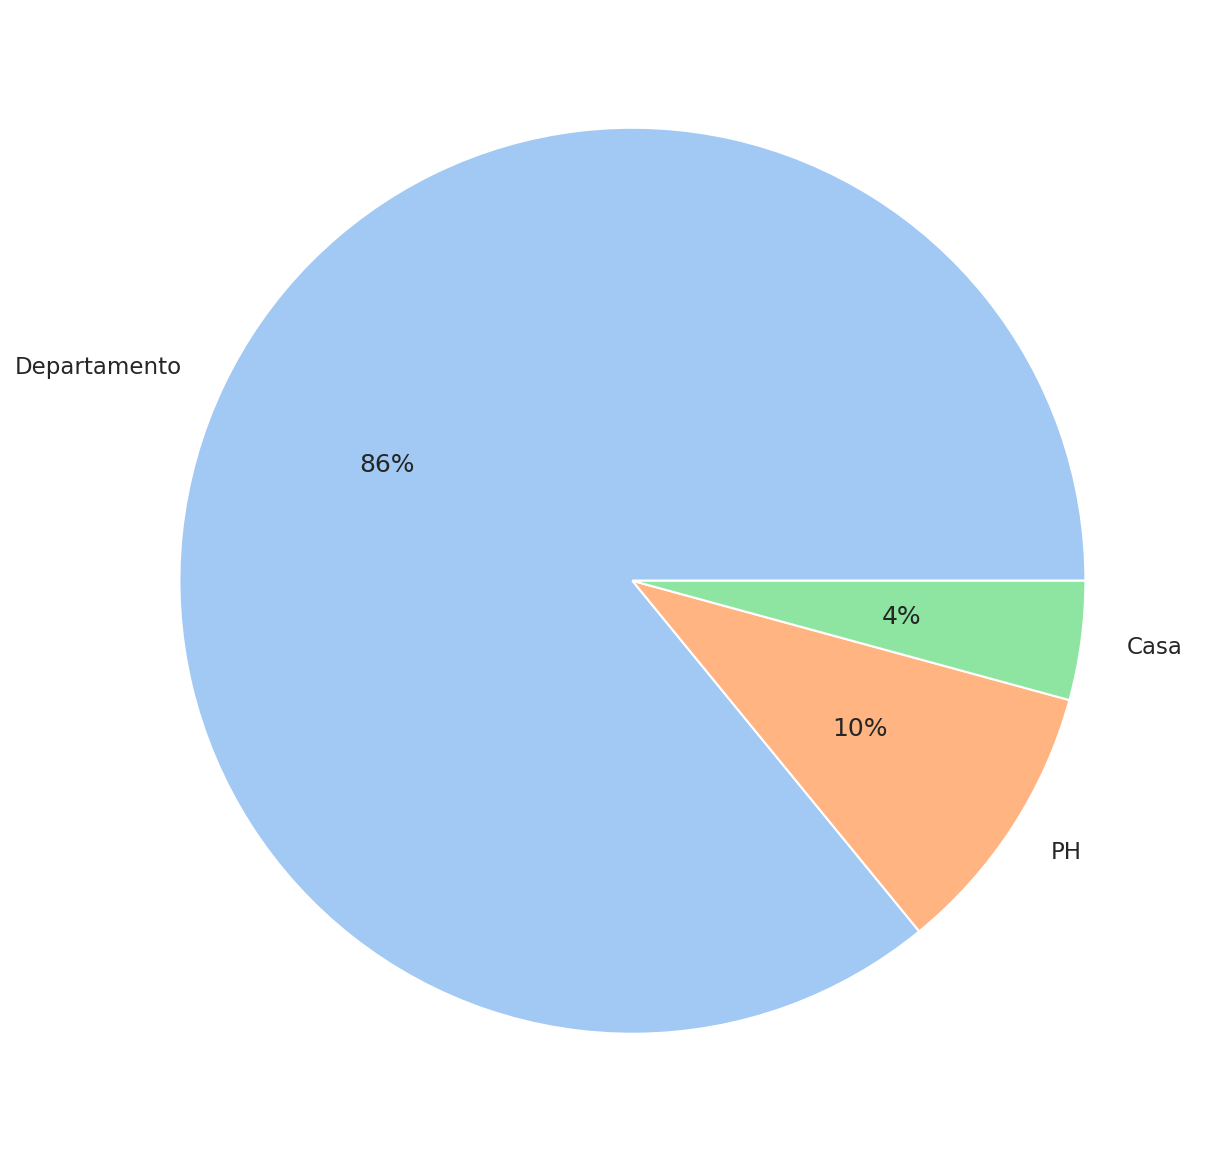

In [54]:
plt.figure(dpi=150, figsize=(15, 10))
data = df['property_type'].value_counts()
labels = df['property_type'].value_counts().index
colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

+ El 86% de los datos corresponde a una publicacion de departamento.

### Título del anuncio

In [55]:
print('Cantidad de elementos nulos = ', df['property_title'].isnull().sum())

Cantidad de elementos nulos =  0


In [56]:
df['property_title'].value_counts().head(60)

Departamento - Palermo                             1468
Departamento - Recoleta                            1324
Departamento - Belgrano                            1113
Departamento - Caballito                            936
Departamento - Almagro                              666
Departamento - Villa Urquiza                        634
Departamento - Barrio Norte                         619
Departamento - Villa Crespo                         487
Departamento - Flores                               433
Departamento - Nuñez                                427
Departamento - Balvanera                            370
Departamento - Puerto Madero                        330
Departamento venta                                  320
Departamento - Palermo Hollywood                    316
Departamento - San Telmo                            288
Departamento - Las Cañitas                          286
Departamento - Colegiales                           275
Departamento - Almagro Norte                    

In [57]:
df['property_title'].value_counts().tail(10)

Departamento 1 ambiente venta Villa del Parque                                                          1
Departamento 3 ambientes venta Villa del Parque                                                         1
Departamento, 2 ambientes, balcón, cochera                                                              1
VENTA 3 AMB  APTO MOV REDUCIDA EN P CENTENARIO                                                          1
DEPARTAMENTO DOS AMBIENTES LAS CANITAS AMENITIES                                                        1
VENTA DE DPTO MONOAMBIENTE CON BALCON AL FRENTE                                                         1
OPORTUNIDAD!! VENTA IMPECABLE MONOAMBIENTE                                                              1
VENTA DE DEPTO. 2 AMBIENTES TRES ARROYOS CABA.                                                          1
VENTA MONOAMBIENTE CON BALCÓN ALMAGRO BOEDO                                                             1
VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF 

In [58]:
df_title = df.groupby('property_title').filter(lambda x : len(x)>200)

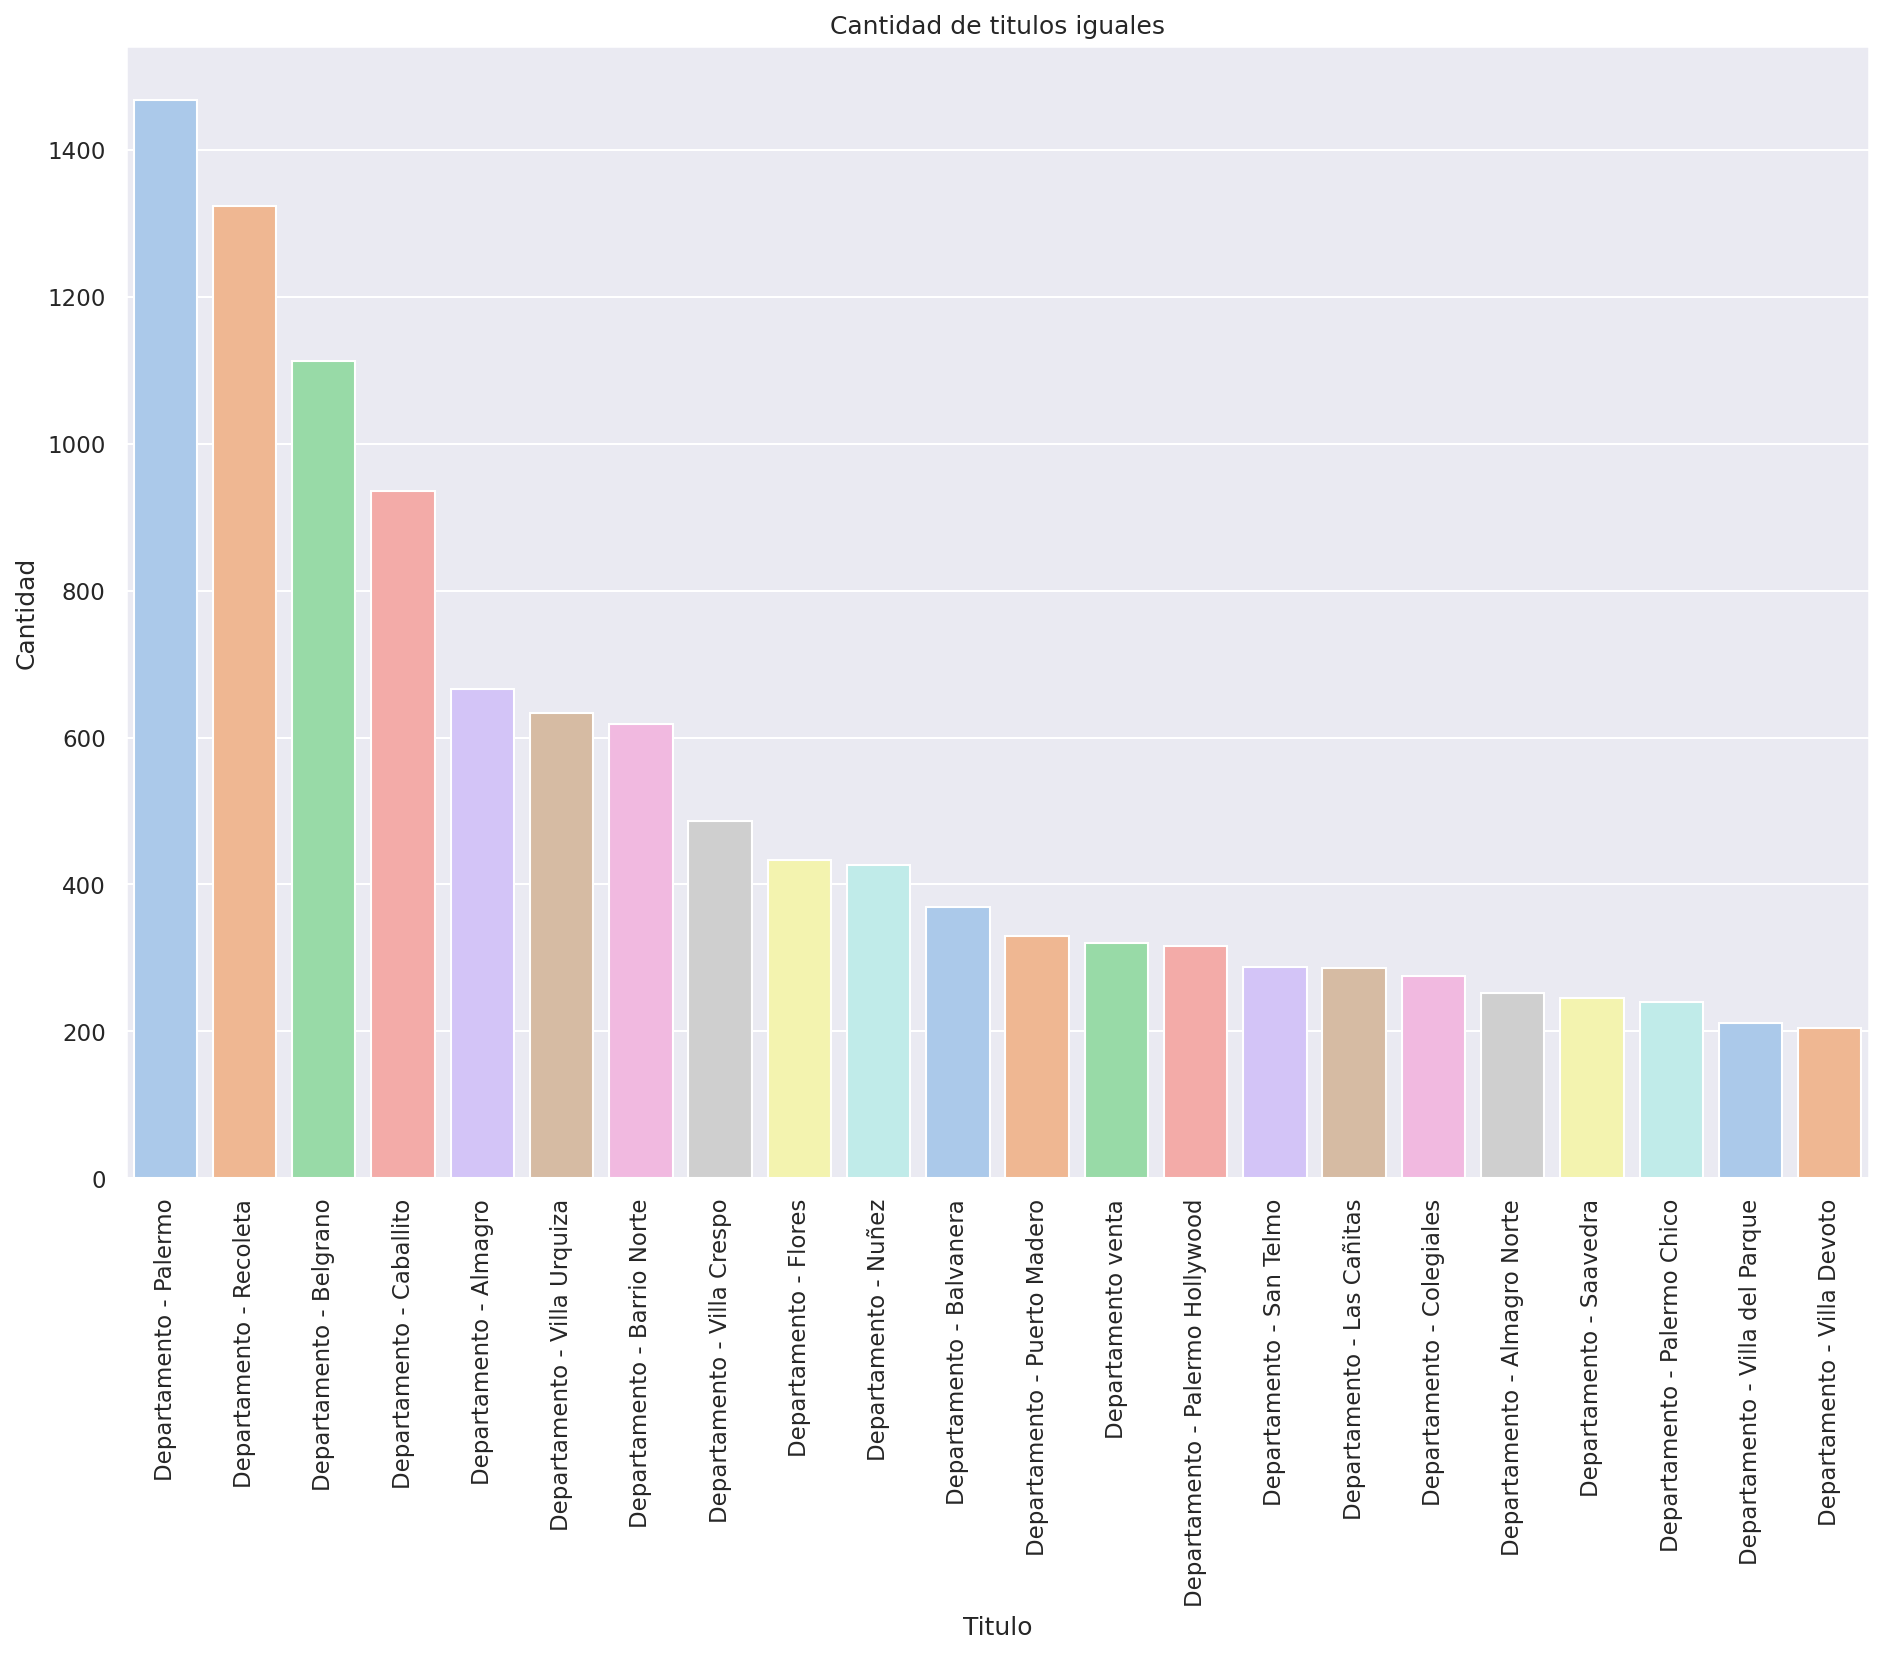

In [59]:
plt.figure(dpi=150, figsize=(15, 10))
colors = sns.color_palette('pastel')
sns.countplot(x= 'property_title', data=df_title, palette=colors, order=df_title.property_title.value_counts().index)
plt.ylabel("Cantidad")
plt.xlabel("Titulo")
plt.xticks(rotation=90)
plt.title("Cantidad de titulos iguales")
plt.show()

In [60]:
df_t = df["property_title"].str.split('-', expand=True)
df_t.head()

0              1               2   \
1  VENTA TRES AMBIENTES LA BOCA PISO ALTO           None            None   
2                           Departamento    4 Ambientes    Catalinas Sur   
3     Venta departamento 4 ambientes Once           None            None   
4                                     PH           Boedo            None   
5    PH 2 Ambientes c/Patio HECHO A NUEVO           None            None   

     3     4     5     6     7     8     9     10    11    12    13    14  \
1  None  None  None  None  None  None  None  None  None  None  None  None   
2  None  None  None  None  None  None  None  None  None  None  None  None   
3  None  None  None  None  None  None  None  None  None  None  None  None   
4  None  None  None  None  None  None  None  None  None  None  None  None   
5  None  None  None  None  None  None  None  None  None  None  None  None   

     15  
1  None  
2  None  
3  None  
4  None  
5  None

In [61]:
df_t = df_t[[0,1]]
df_t.columns = ['Tipo', 'Barrio']
df_t.head()

Tipo         Barrio
1  VENTA TRES AMBIENTES LA BOCA PISO ALTO           None
2                           Departamento    4 Ambientes 
3     Venta departamento 4 ambientes Once           None
4                                     PH           Boedo
5    PH 2 Ambientes c/Patio HECHO A NUEVO           None

In [62]:
df_t = df_t.loc[(df_t['Tipo']=='Casa') | (df_t['Tipo']=='PH') | (df_t['Tipo']=='Departamento')]
df_t.head(10)

Tipo                                             Barrio
1696             PH           Triplex tipo casa con cochera y jardin! 
3855           Casa                                           Saavedra
3874           Casa                                             venta 
5308             PH     Entorno Parque Saavedra, Av Cramer y Av Balbin
7068             PH                                              Venta
7122             PH                                               MONO
9490   Departamento  Belgrano 2Ambientes P.B. a mts Subte Apto prof...
10452            PH                                        4 AMBIENTES
11263  Departamento                                               None
13230            PH                                              CASA

#### Santiago:

<h4 align="center"><b> Determinar variables irrelevantes en el análisis </b></h4>

Se eliminara el feature Id y place_l6.
Las razones:
* Id: Por ser irrelevante
* Place_l6: Por solo tener valores nan
* Start_date_year: Por tener varianza cero
* Created_on_year: Por tener varianza cero
* Start_date_day: Por ser irrelevante(Hipotesis)
* Created_on_day: Por ser irrelevante(Hipotesis)
* End_date_day: Por ser irrelevante(Hipotesis)

In [63]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(f"Porcentaje de nan de place_l6: { na_ratio.place_l6}")

Porcentaje de nan de place_l6: 100.0


In [64]:
print(f"Varianza de start_date_year: { df['start_date_year'].var(ddof=0) }")
print(f"Varianza de created_on_year: { df['created_on_year'].var(ddof=0) }")

Varianza de start_date_year: 0.0
Varianza de created_on_year: 0.0


In [65]:
df.drop(columns = ['place_l6', 'id', 'start_date_year', 'created_on_year', 'start_date_day', 'created_on_day', 'end_date_day'], inplace=True) 

<h4 align="center"><b> Analizar las correlaciones existentes entre las variables </b></h4>

#### Brayan:

<AxesSubplot:xlabel='longitud', ylabel='latitud'>

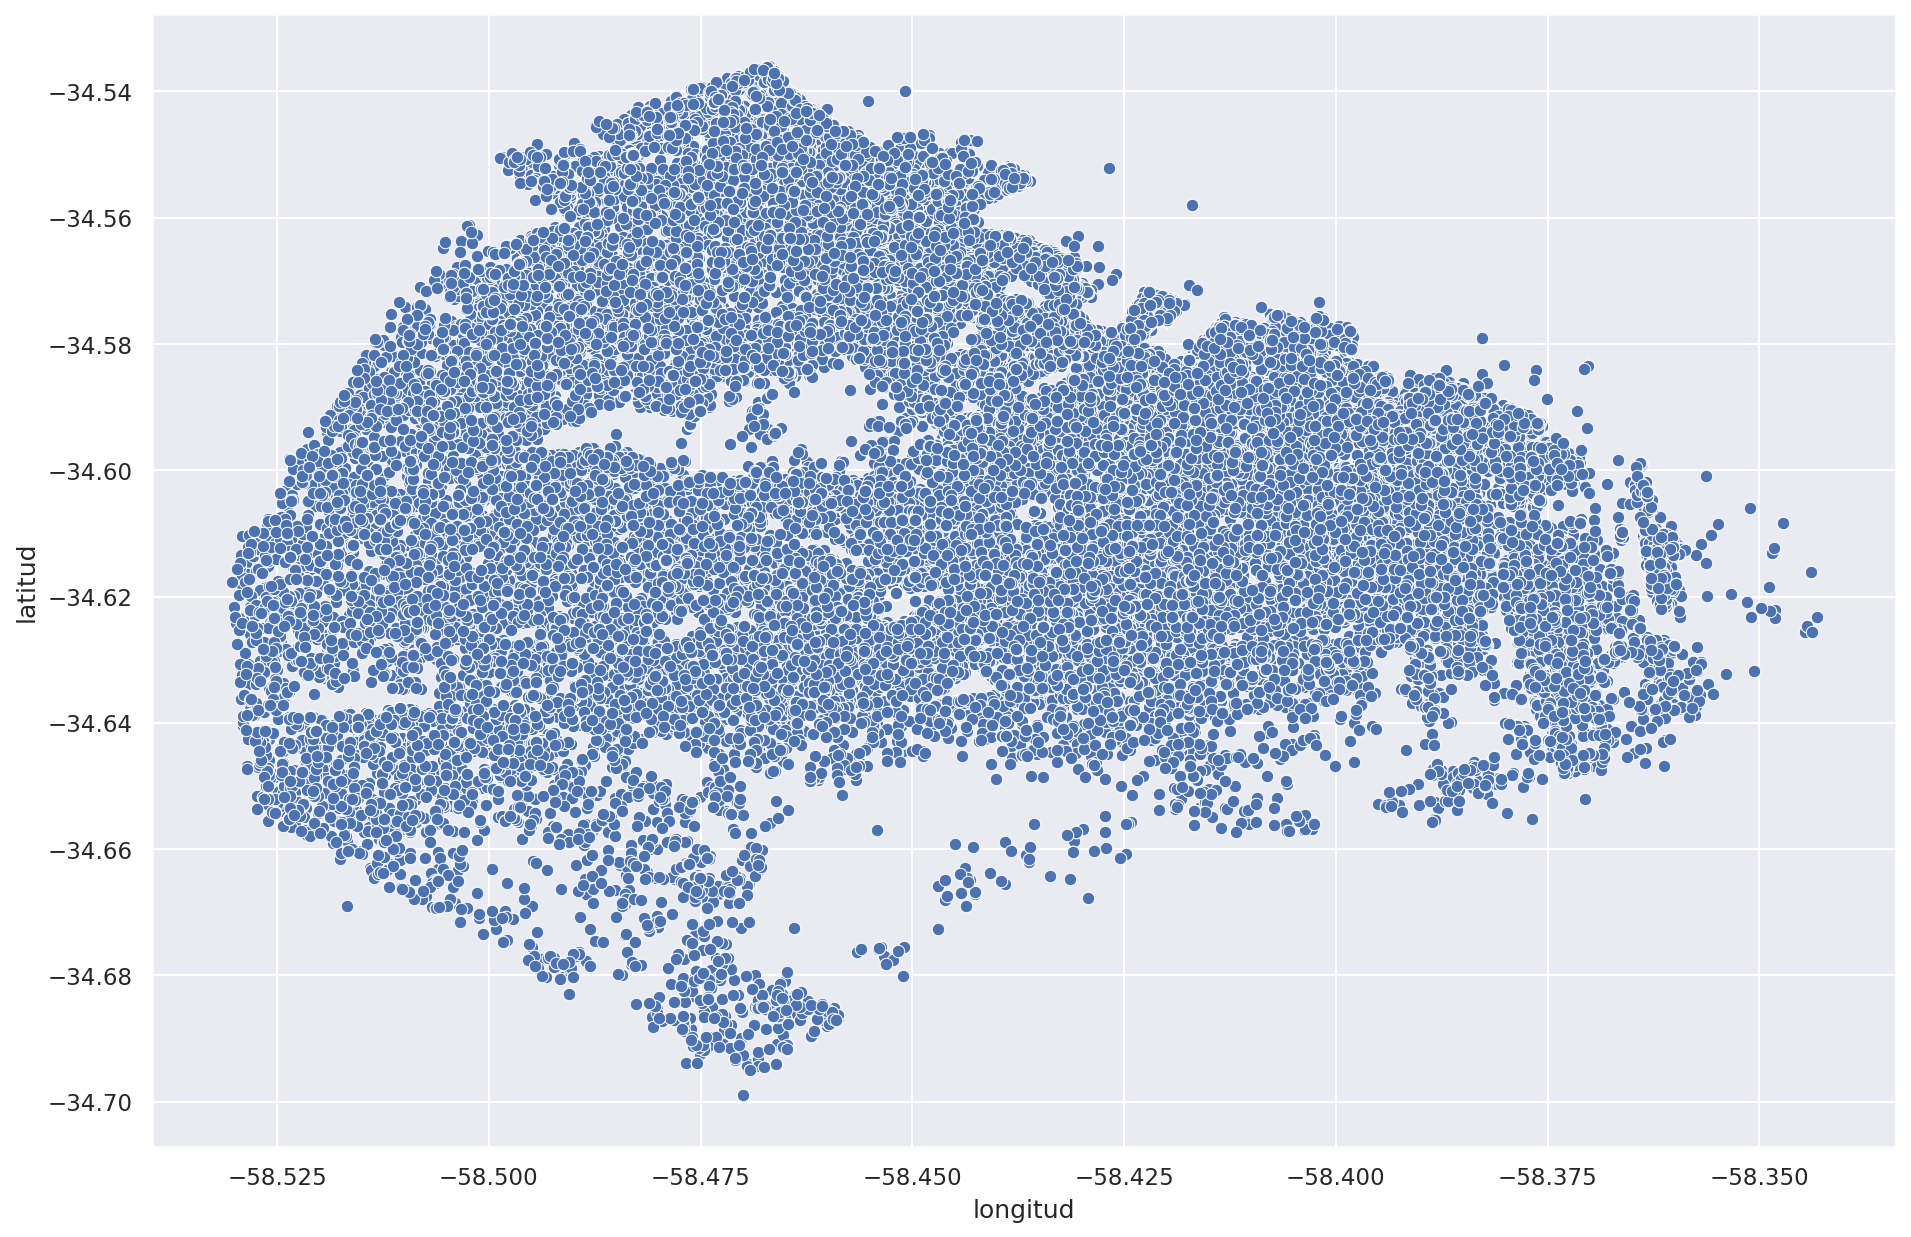

In [66]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns.scatterplot(data=df, x="longitud", y="latitud")

#### Analia:

Vemos la relacion entre algunos features

In [67]:
pd.crosstab(df['place_l3'],df['property_type'])

property_type         Casa  Departamento   PH
place_l3                                     
Abasto                   5           221    5
Agronomía               28           116   91
Almagro                 37          3695  349
Balvanera               23          2347  183
Barracas                87           964  195
Barrio Norte            22          2909   44
Belgrano               242          8423  233
Boca                    26           287   52
Boedo                   82           868  287
Caballito              162          6449  557
Catalinas                1             6    0
Centro / Microcentro     0            74    2
Chacarita               32           573   92
Coghlan                 67           799  118
Colegiales              75          1630  246
Congreso                 2           513   20
Constitución            21           362   70
Flores                 242          2514  354
Floresta               126           737  332
Las Cañitas              0            12    0
Liniers                 86           411  171
Mataderos              131           278  310
Monserrat               11          1015   89
Monte Castro            71           277  151
Nuñez                  150          3212  184
Once                     1           397    9
Palermo                183         13615  510
Parque Avellaneda       95           131  154
Parque Centenario        0            84    9
Parque Chacabuco       122           697  254
Parque Chas             33           240  100
Parque Patricios        68           432  139
Paternal                41           399  126
Pompeya                 49           104   63
Puerto Madero            4          1489    0
Recoleta                18          6196   68
Retiro                  18          1225    7
Saavedra               200          1346  283
San Cristobal           42          1085  173
San Nicolás             11          1269   15
San Telmo               32          1201  147
Tribunales               0           115    1
Velez Sarsfield         36           105  101
Versalles               95           114  106
Villa Crespo            66          2847  276
Villa Devoto           267          1134  520
Villa General Mitre     48           282  105
Villa Lugano           146           355  111
Villa Luro              65           486  176
Villa Ortuzar           51           492  119
Villa Pueyrredón        95           584  332
Villa Real              34            36   72
Villa Riachuelo         14            17    4
Villa Santa Rita        43           284  111
Villa Soldati           14            25    6
Villa Urquiza          189          3849  635
Villa del Parque       172          1286  371

Veo la matriz de correlacion entre los features

In [68]:
#Calculo la correlación
matriz_corr=df.corr()
matriz_corr

latitud  longitud  property_rooms  \
latitud                   1.000000 -0.140067       -0.031599   
longitud                 -0.140067  1.000000        0.012021   
property_rooms           -0.031599  0.012021        1.000000   
property_bedrooms        -0.033539  0.018148        0.871808   
property_surface_total    0.008633  0.002094        0.066745   
property_surface_covered  0.002433  0.003562        0.075911   
property_price            0.149062  0.123224        0.489265   
start_date_month          0.002495 -0.008976       -0.005528   
end_date_month            0.019299  0.008068       -0.009793   
end_date_year            -0.008391  0.008418        0.002707   
created_on_month          0.002495 -0.008976       -0.005528   

                          property_bedrooms  property_surface_total  \
latitud                           -0.033539                0.008633   
longitud                           0.018148                0.002094   
property_rooms                     0.871808                0.066745   
property_bedrooms                  1.000000                0.068462   
property_surface_total             0.068462                1.000000   
property_surface_covered           0.074732                0.617301   
property_price                     0.425445                0.086853   
start_date_month                  -0.009342               -0.011112   
end_date_month                    -0.005437                0.002769   
end_date_year                      0.011096                0.004402   
created_on_month                  -0.009342               -0.011112   

                          property_surface_covered  property_price  \
latitud                                   0.002433        0.149062   
longitud                                  0.003562        0.123224   
property_rooms                            0.075911        0.489265   
property_bedrooms                         0.074732        0.425445   
property_surface_total                    0.617301        0.086853   
property_surface_covered                  1.000000        0.056107   
property_price                            0.056107        1.000000   
start_date_month                         -0.000860       -0.037930   
end_date_month                            0.006249        0.009467   
end_date_year                             0.013693        0.016137   
created_on_month                         -0.000860       -0.037930   

                          start_date_month  end_date_month  end_date_year  \
latitud                           0.002495        0.019299      -0.008391   
longitud                         -0.008976        0.008068       0.008418   
property_rooms                   -0.005528       -0.009793       0.002707   
property_bedrooms                -0.009342       -0.005437       0.011096   
property_surface_total           -0.011112        0.002769       0.004402   
property_surface_covered         -0.000860        0.006249       0.013693   
property_price                   -0.037930        0.009467       0.016137   
start_date_month                  1.000000       -0.086527      -0.027182   
end_date_month                   -0.086527        1.000000       0.437635   
end_date_year                    -0.027182        0.437635       1.000000   
created_on_month                  1.000000       -0.086527      -0.027182   

                          created_on_month  
latitud                           0.002495  
longitud                         -0.008976  
property_rooms                   -0.005528  
property_bedrooms                -0.009342  
property_surface_total           -0.011112  
property_surface_covered         -0.000860  
property_price                   -0.037930  
start_date_month                  1.000000  
end_date_month                   -0.086527  
end_date_year                    -0.027182  
created_on_month                  1.000000

<AxesSubplot:>

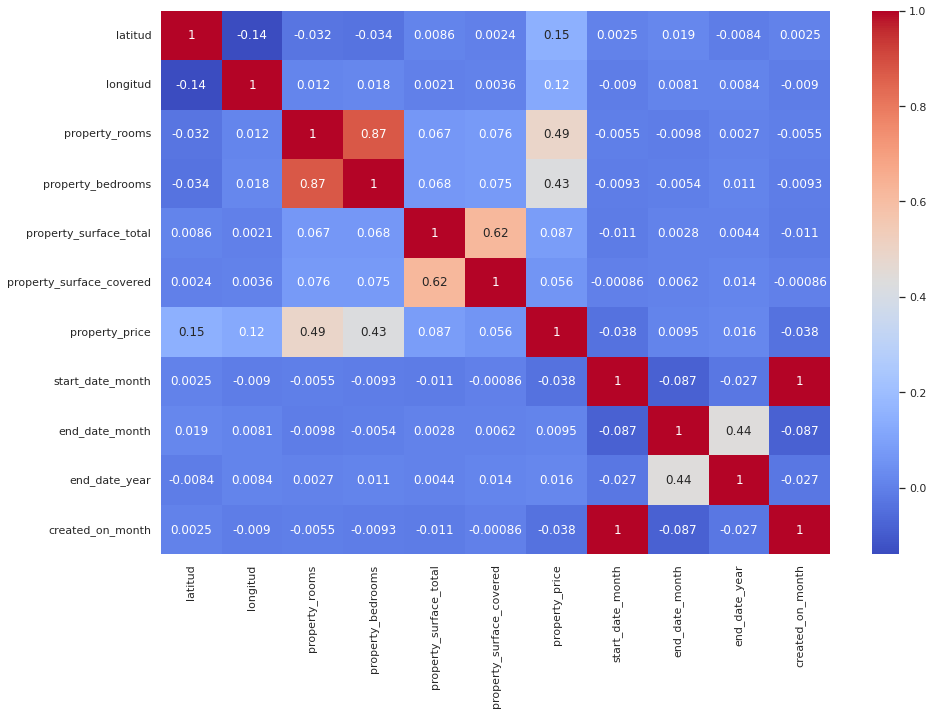

In [69]:
#Grafico la matriz de correlación en un Heatmap

plt.figure(figsize = (15,10))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

Se puede observar que el Precio de las Viviendas tiene una correlacion positiva media con el numero de ambientes 

#### Lucia:

### Correlaciones en dataset completo

In [70]:
df_corr = df[['operation','property_type']].copy()
df_corr.head(5)

operation property_type
1     Venta  Departamento
2     Venta  Departamento
3     Venta  Departamento
4     Venta            PH
5     Venta            PH

+ Como son variables categoricas, aplico One Hot Encoding

In [71]:
df_dummies = pd.get_dummies(df_corr, columns=['operation', 'property_type'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

operation_Venta  property_type_Casa  property_type_Departamento  \
94244                1                   0                           1   
94245                1                   0                           1   
94246                1                   0                           1   
94247                1                   0                           1   
94248                1                   0                           1   

       property_type_PH  
94244                 0  
94245                 0  
94246                 0  
94247                 0  
94248                 0

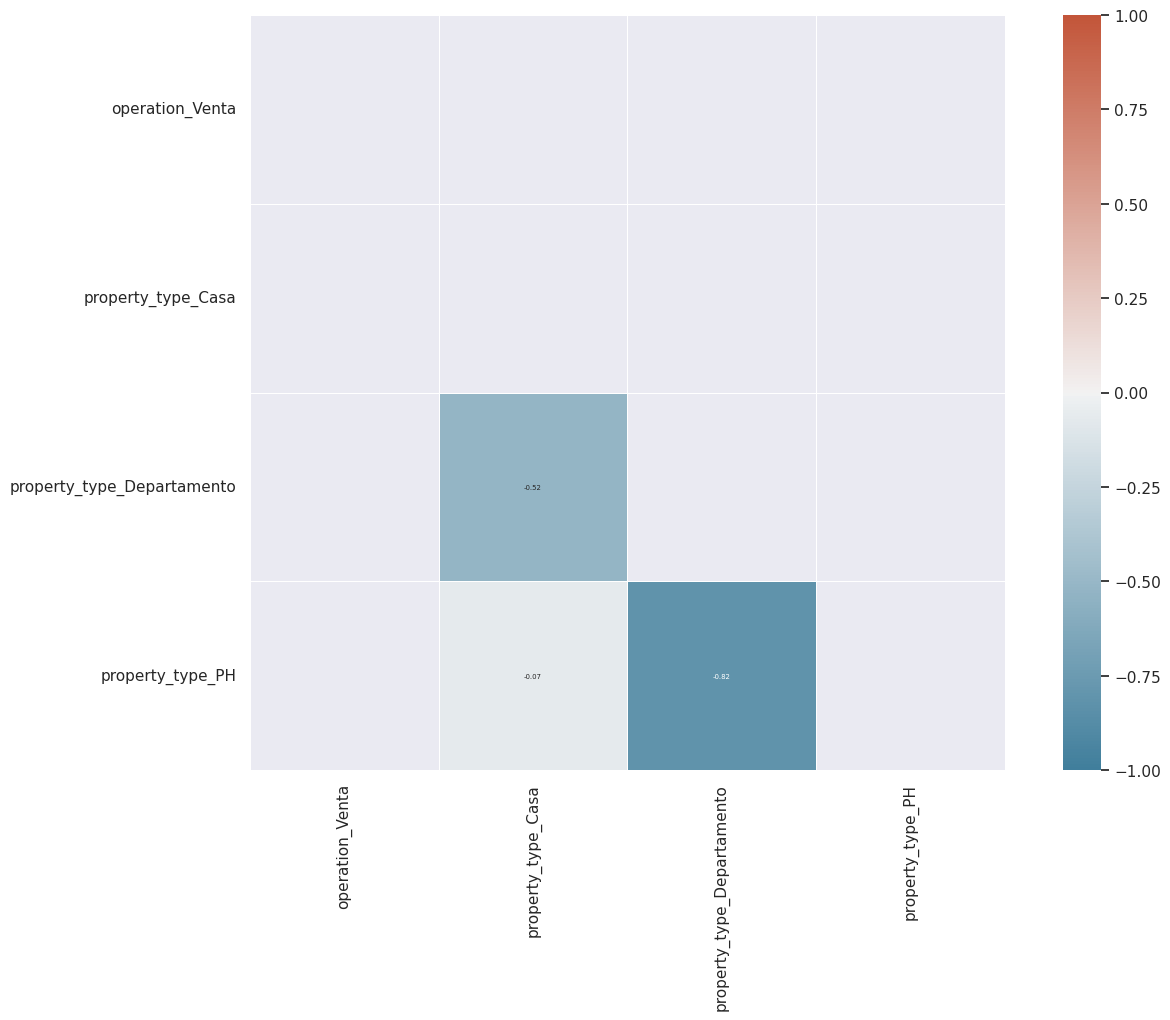

In [72]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100, figsize=(15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":5})
plt.xticks(rotation=90)
plt.show()

In [73]:
df_corr = df[['operation','property_currency']].copy()
df_corr.head(5)

operation property_currency
1     Venta               USD
2     Venta               USD
3     Venta               USD
4     Venta               USD
5     Venta               USD

In [74]:
df_dummies = pd.get_dummies(df_corr, columns=['operation', 'property_currency'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

operation_Venta  property_currency_USD
94244                1                      1
94245                1                      1
94246                1                      1
94247                1                      1
94248                1                      1

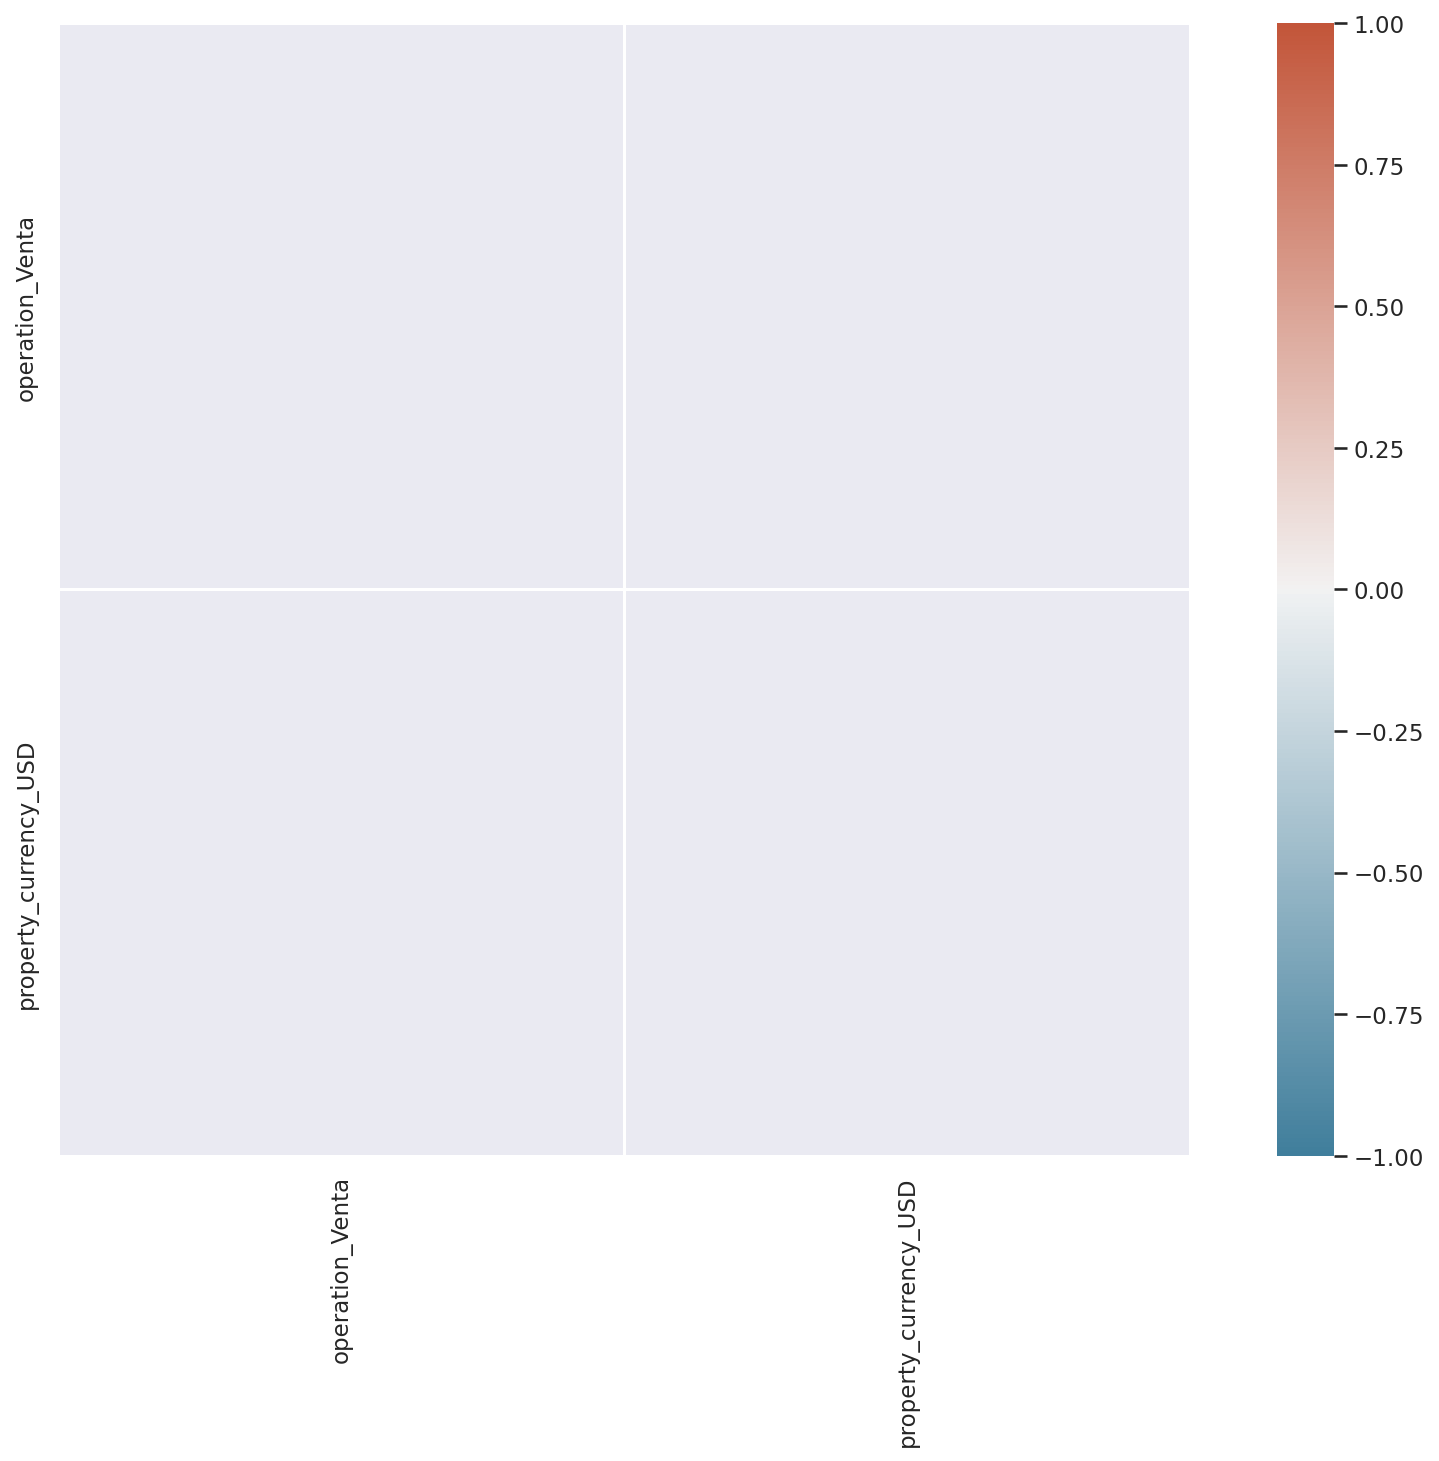

In [75]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=150, figsize=(15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":7.5})
plt.xticks(rotation=90)
plt.show()

Hay una alta correlacion entre:
+ operacion venta y moneda dolar
+ operacion alquiler y moneda pesos argentinos

In [76]:
df_corr = df[['property_type','property_currency']].copy()
df_corr.head(5)

property_type property_currency
1  Departamento               USD
2  Departamento               USD
3  Departamento               USD
4            PH               USD
5            PH               USD

In [77]:
df_dummies = pd.get_dummies(df_corr, columns=['property_type', 'property_currency'], 
                              drop_first=False, dummy_na=False)
df_dummies.tail()

property_type_Casa  property_type_Departamento  property_type_PH  \
94244                   0                           1                 0   
94245                   0                           1                 0   
94246                   0                           1                 0   
94247                   0                           1                 0   
94248                   0                           1                 0   

       property_currency_USD  
94244                      1  
94245                      1  
94246                      1  
94247                      1  
94248                      1

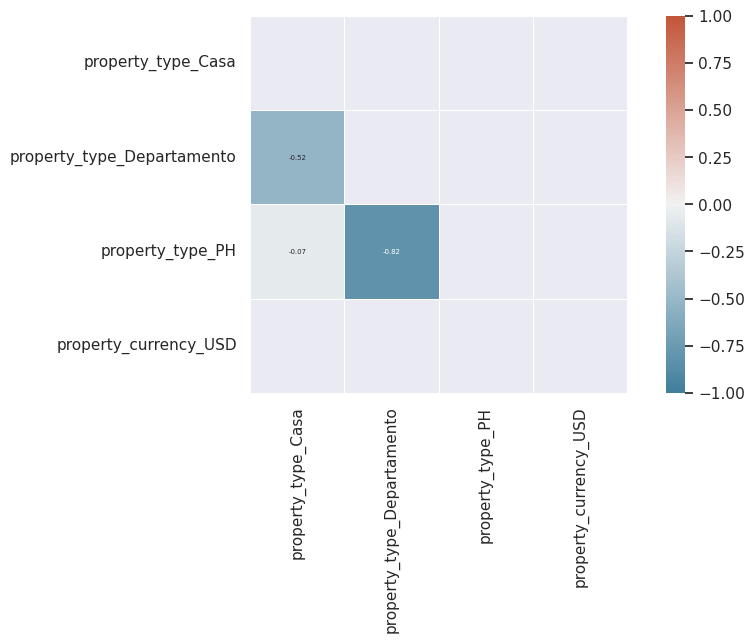

In [78]:
corr = df_dummies.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100, figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=.5, annot=True, annot_kws={"size":5})
plt.xticks(rotation=90)
plt.show()

#### Santiago:

#### Heatmap correlaciones

<AxesSubplot:>

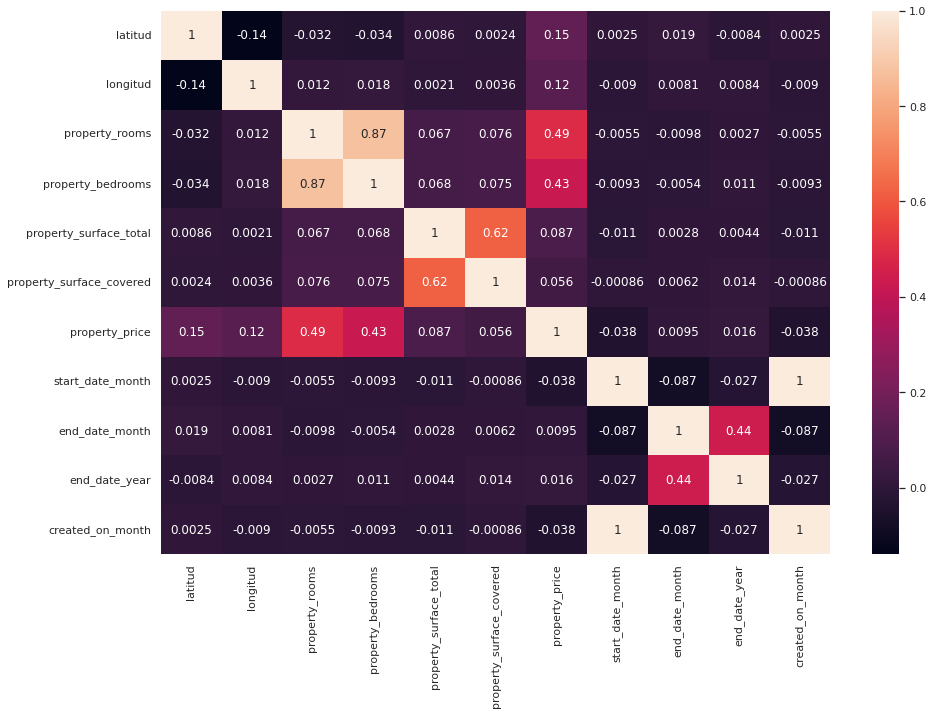

In [79]:
# Calculamos las correlaciones sin longitud y latitud
matrx_corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(matrx_corr, annot=True)

Se ve cierta correlacion entre precio y numero de ambientes/dormitorios. Asi como tambien entre superficie total y cubierta

#### Dispersograma property_rooms vrs property_price

<AxesSubplot:xlabel='property_rooms', ylabel='property_price'>

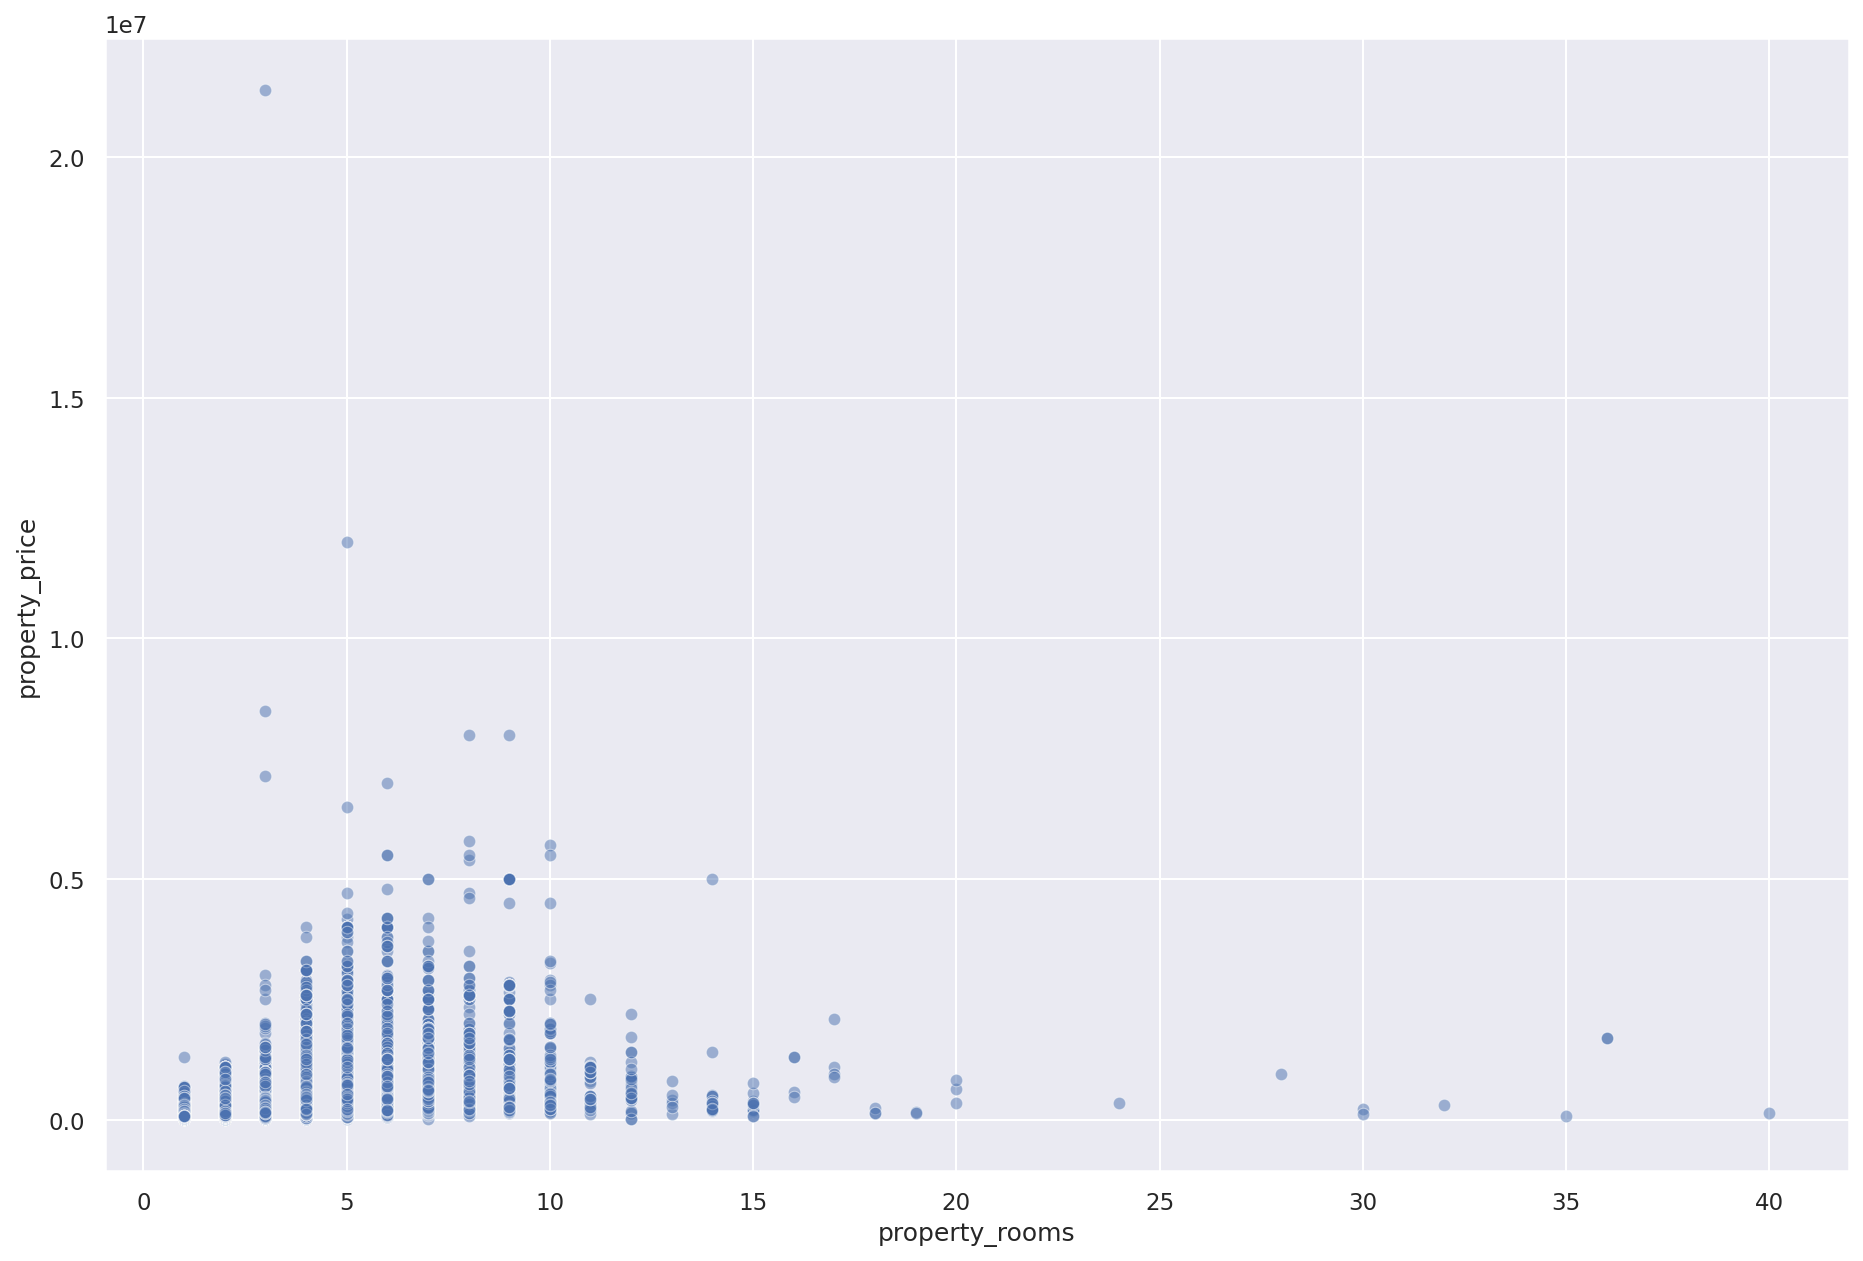

In [80]:
plt.figure(dpi=150, figsize=(15, 10))
sns.scatterplot(data=df, x="property_rooms", y="property_price", alpha=0.5)

#### Dispersograma property_bedroom vrs property_price

<AxesSubplot:xlabel='property_bedrooms', ylabel='property_price'>

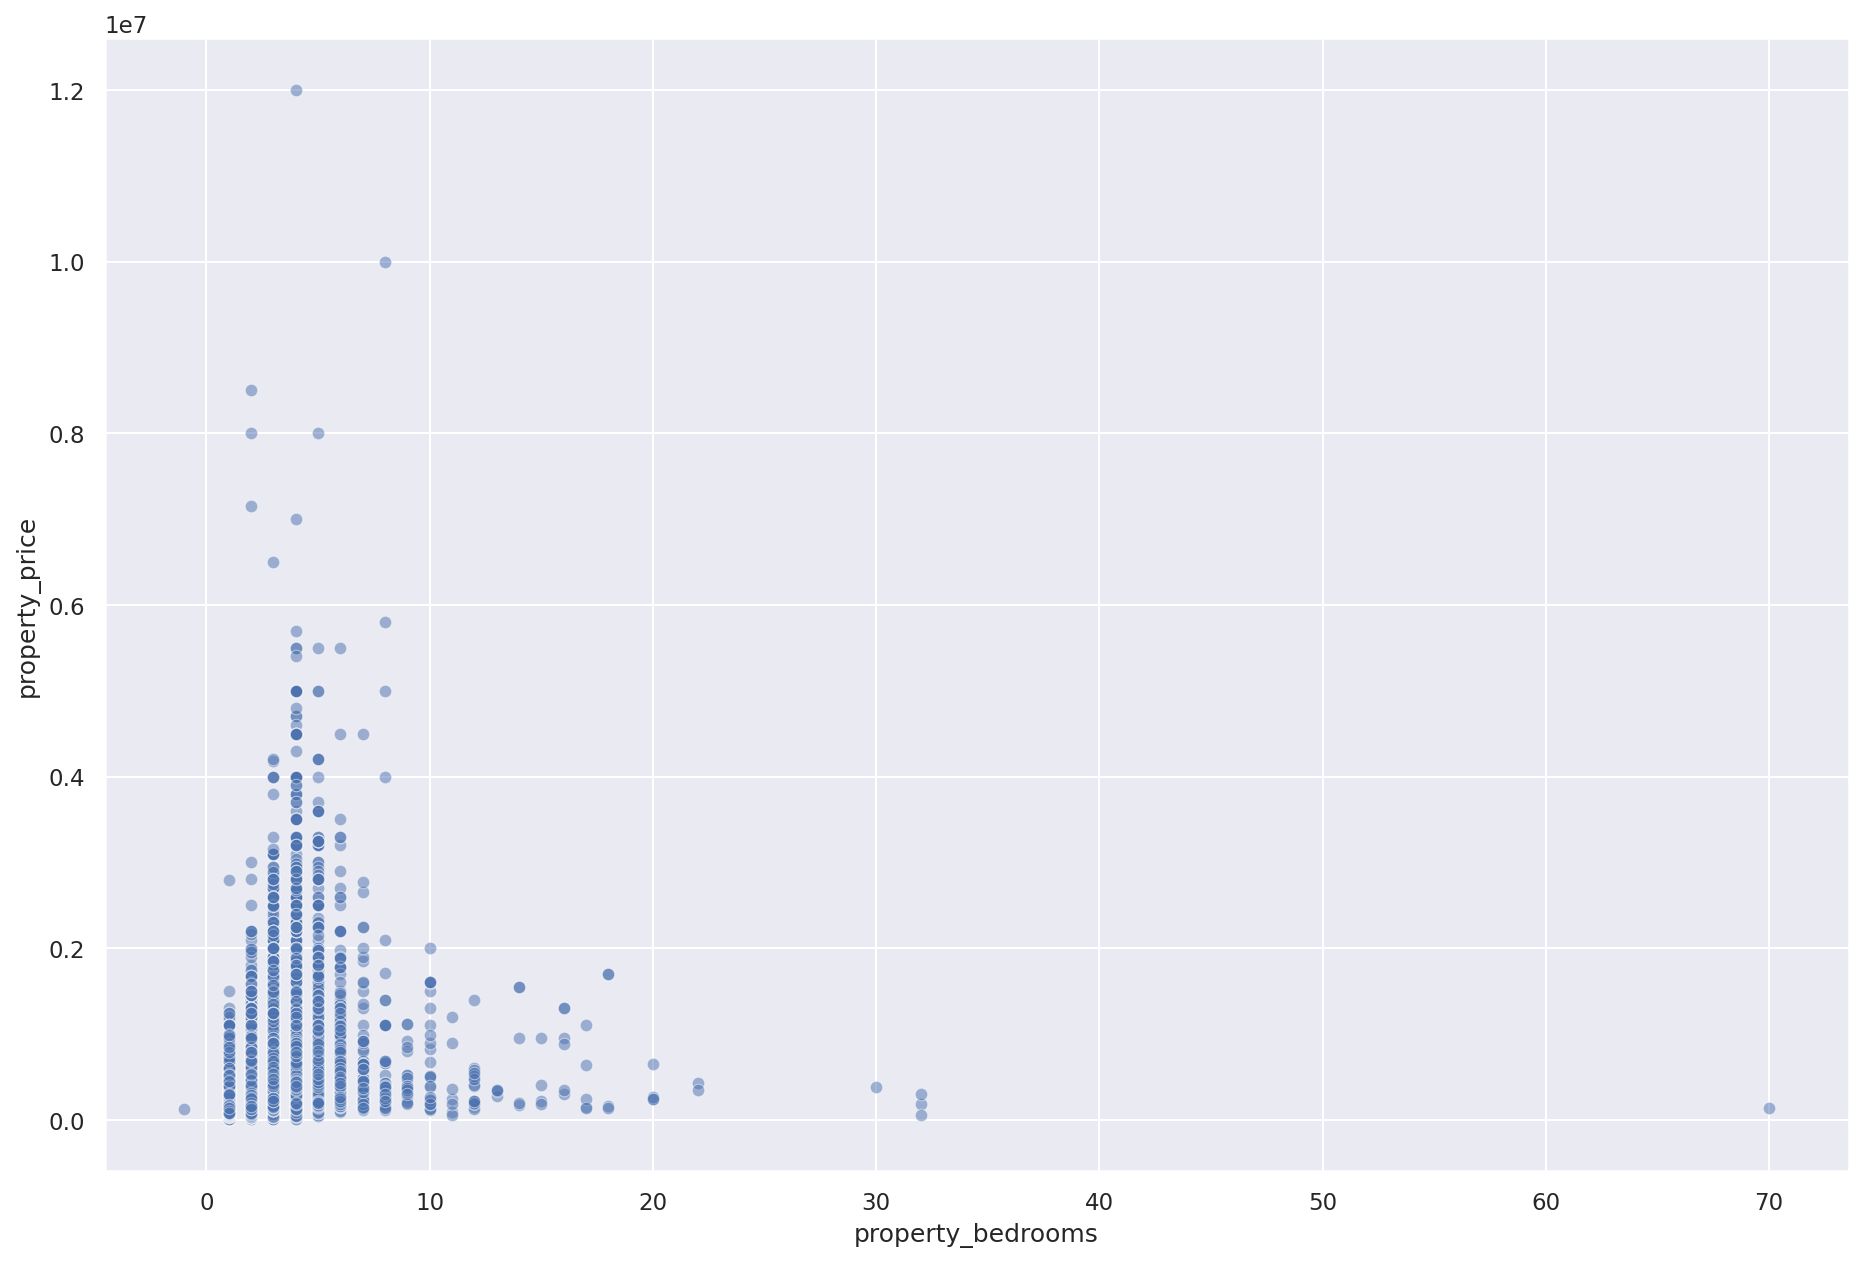

In [81]:
plt.figure(dpi=150, figsize=(15, 10))
sns.scatterplot(data=df, x="property_bedrooms", y="property_price", alpha=0.5)

#### Dispersograma property_rooms vrs property_surface_total

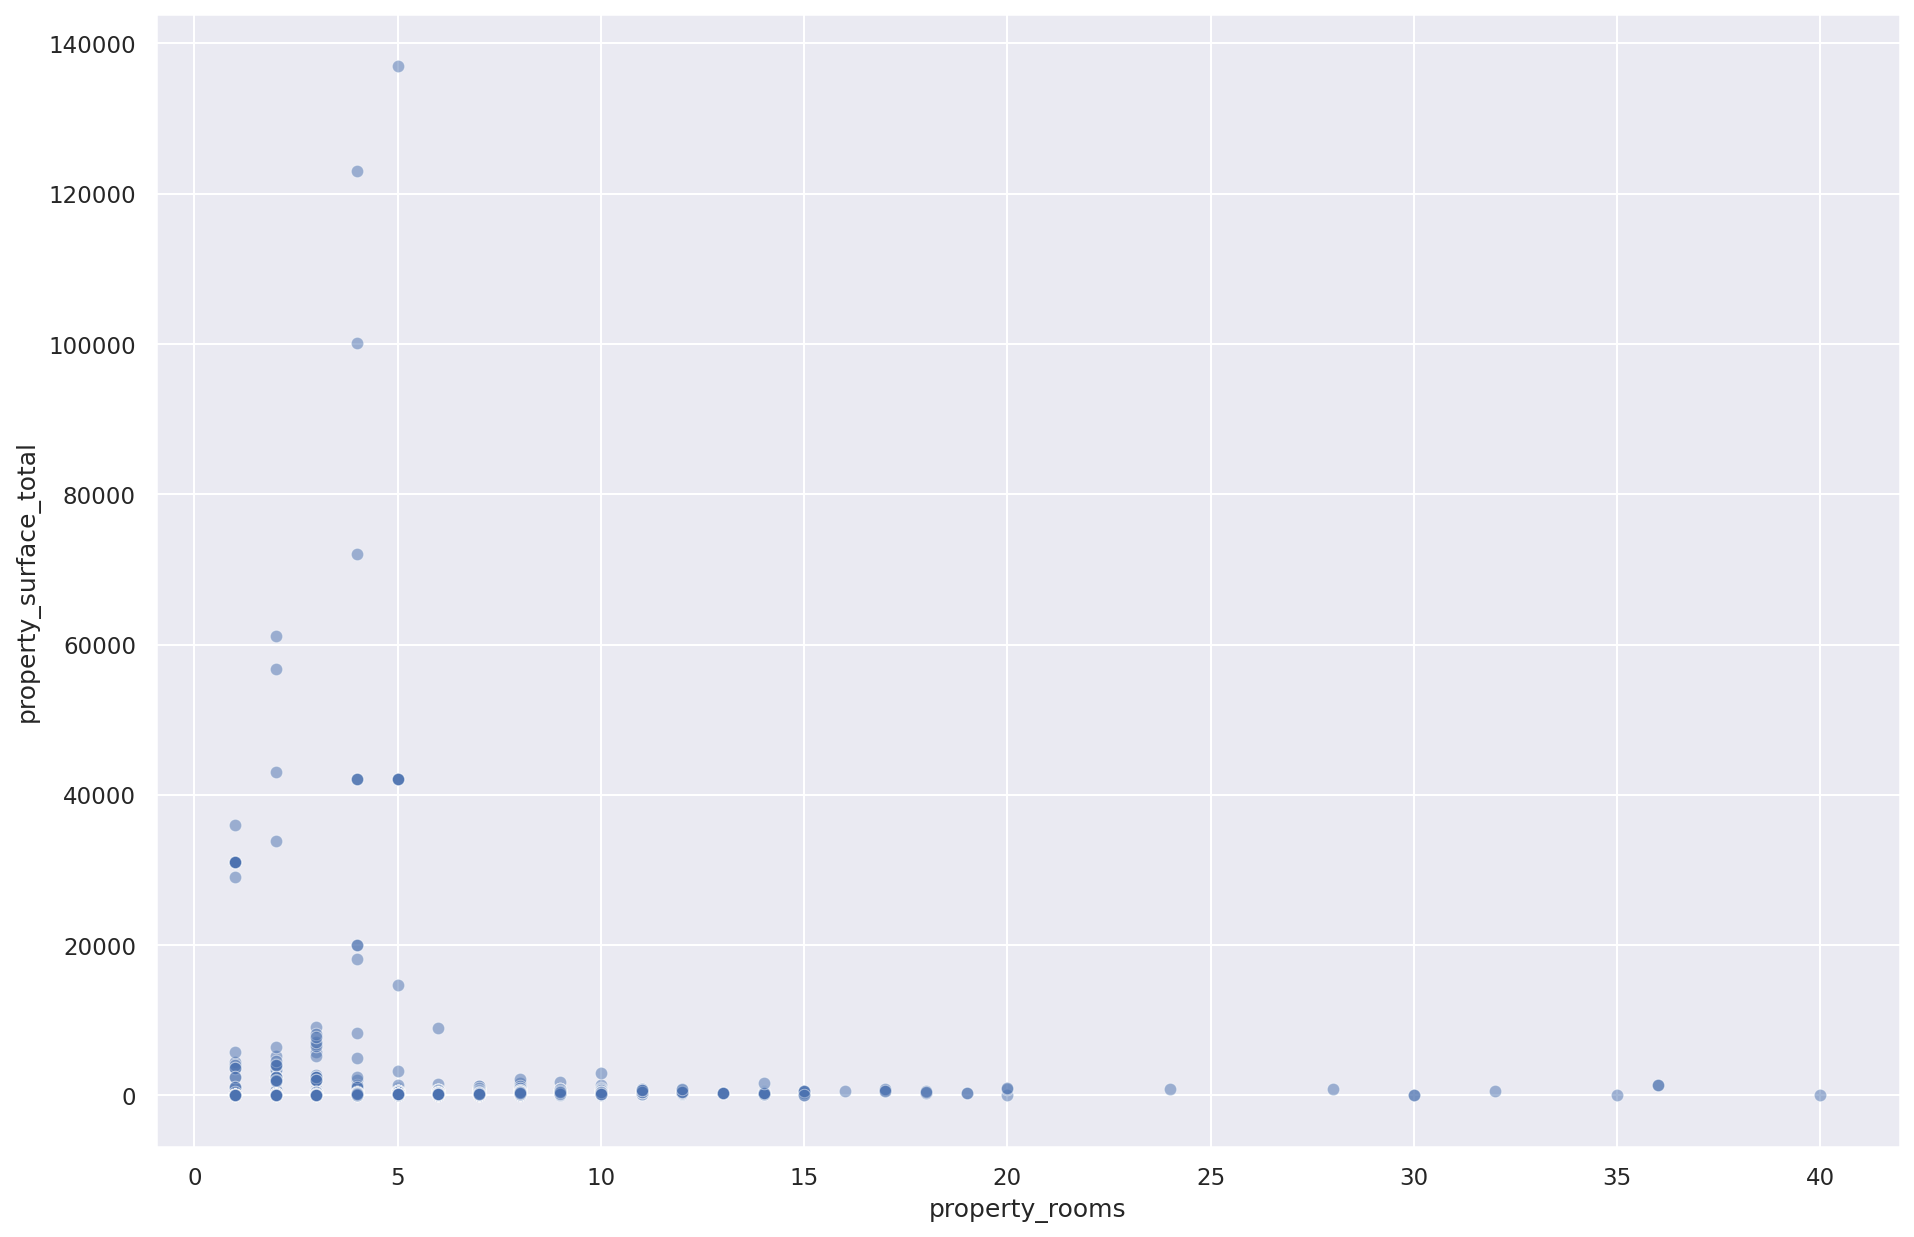

In [82]:
plt.figure(dpi=150, figsize=(15, 10))
grf=sns.scatterplot(data=df, x="property_rooms", y="property_surface_total", alpha=0.5)

#### Dispersograma property_rooms vrs property_surface_covered

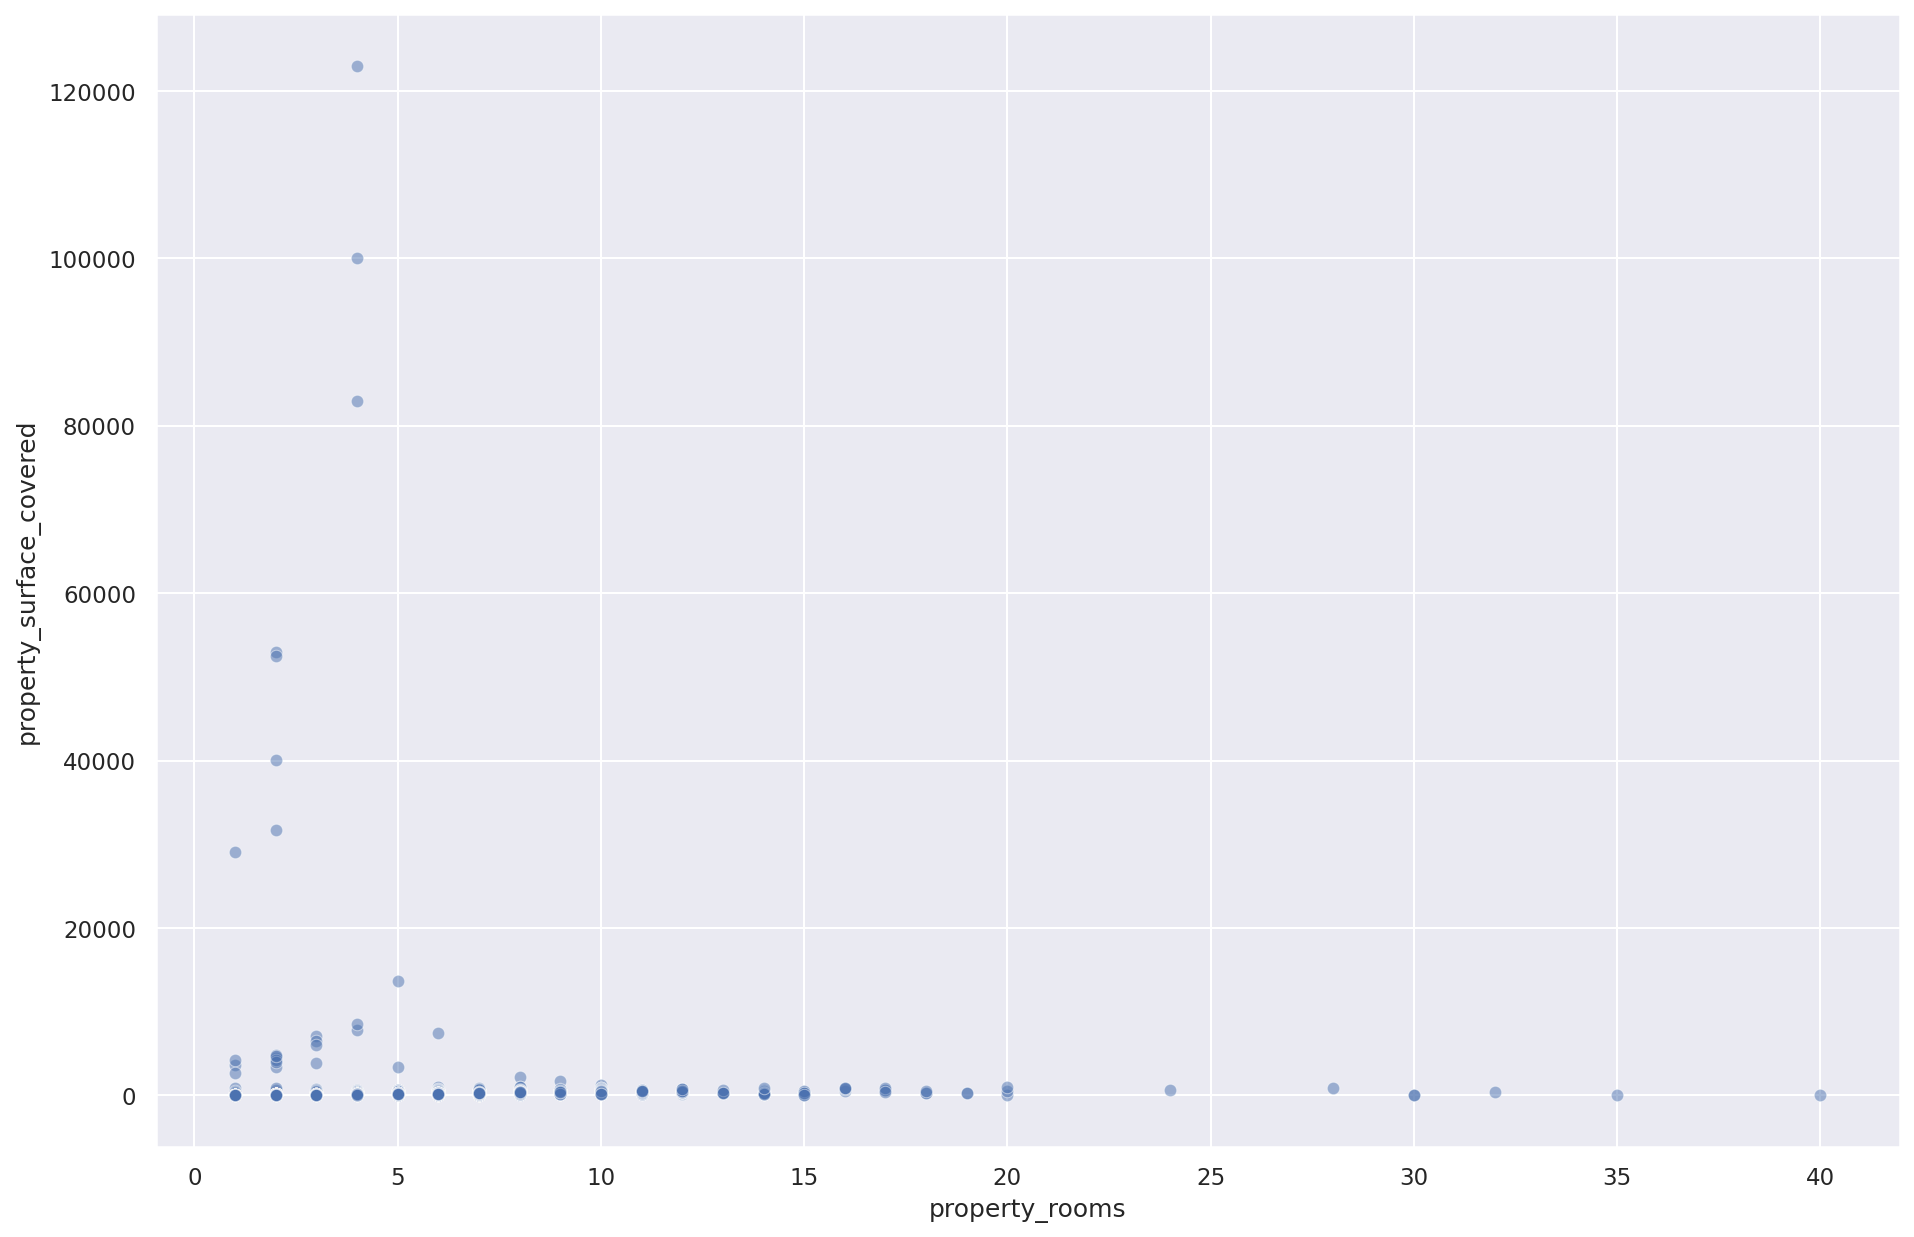

In [83]:
plt.figure(dpi=150, figsize=(15, 10))
grf=sns.scatterplot(data=df, x="property_rooms", y="property_surface_covered", alpha=0.5)

#### Dispersograma property_room vrs property_bedroom

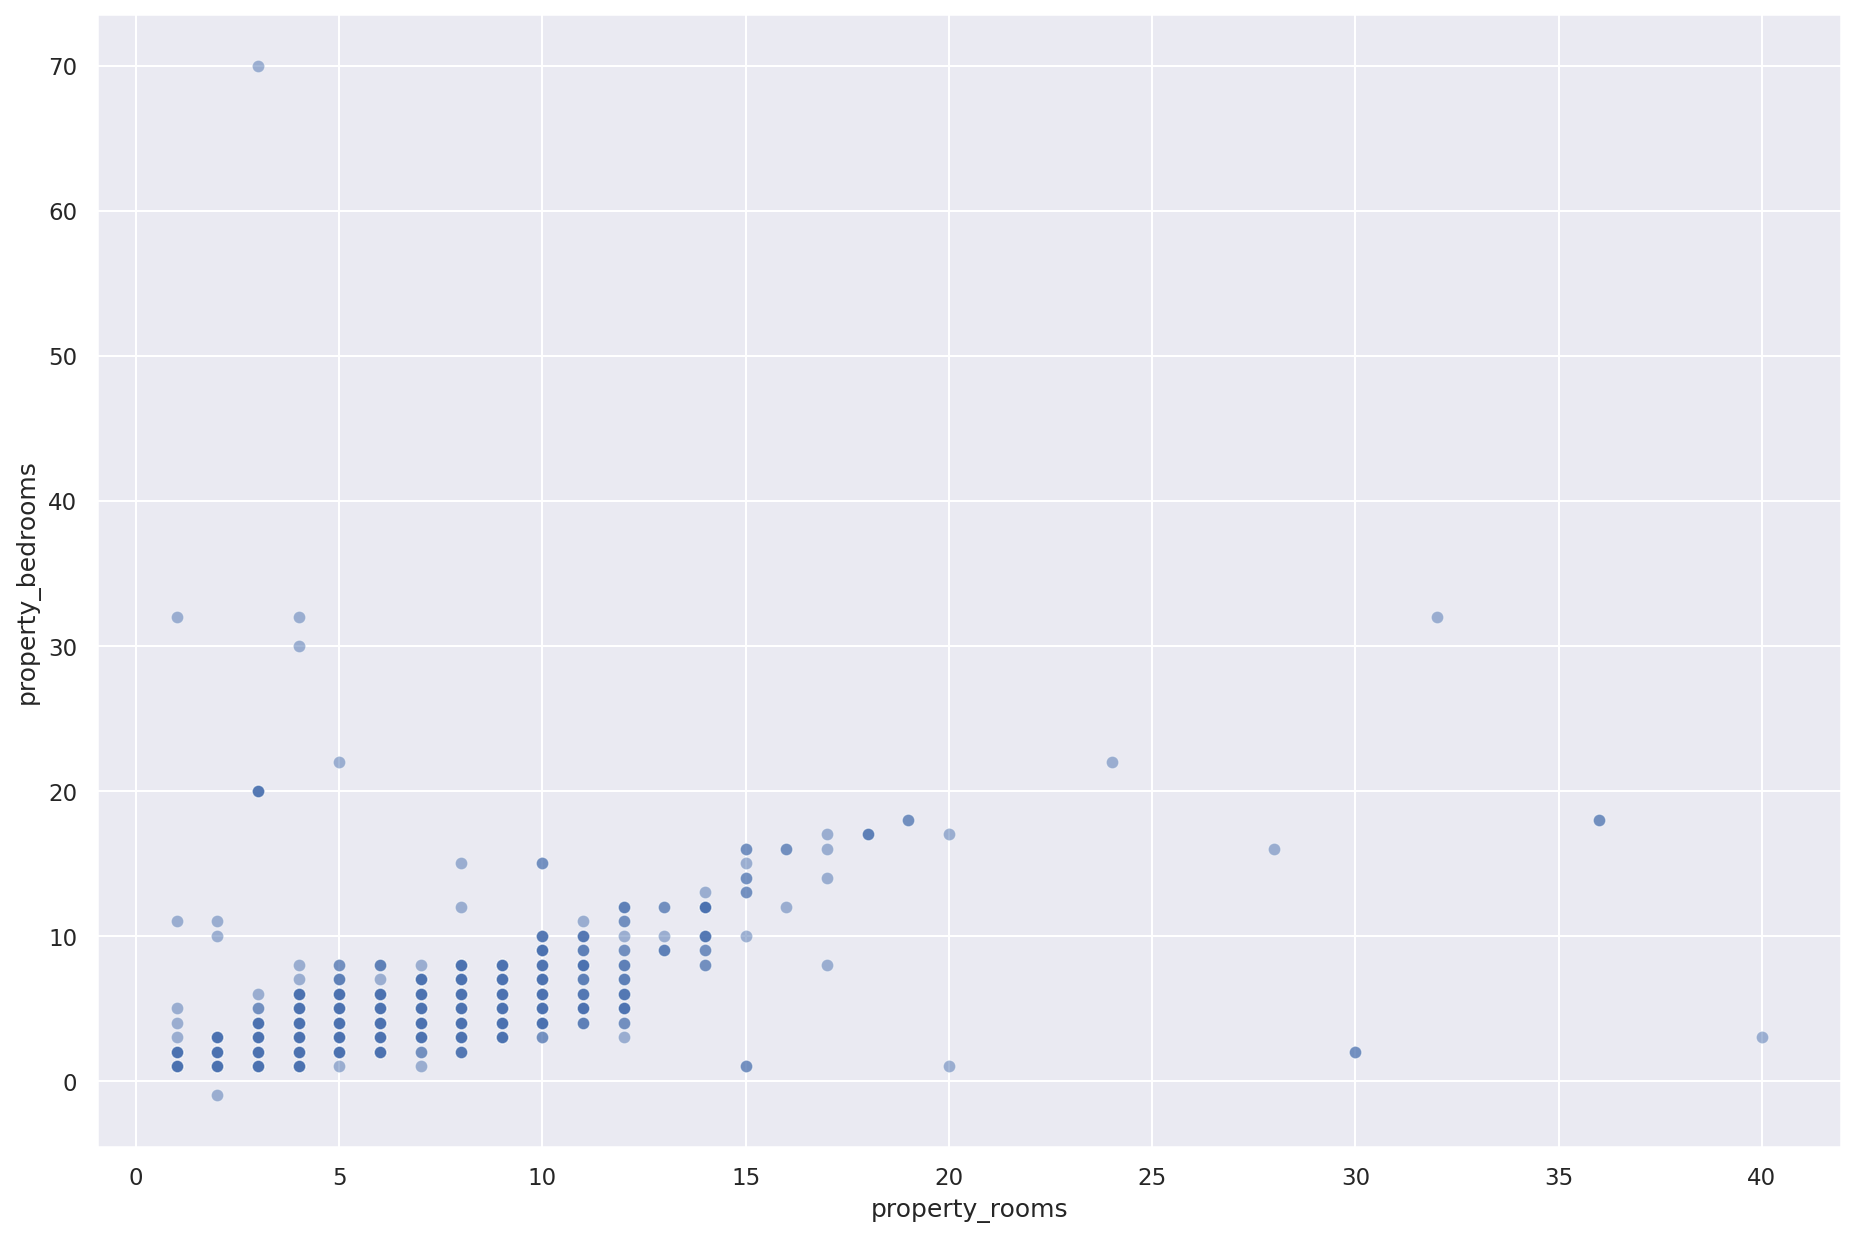

In [84]:
plt.figure(dpi=150, figsize=(15, 10))
grf=sns.scatterplot(data=df, x="property_rooms", y="property_bedrooms", alpha=0.5)

#### Dispersograma property_surface_total vrs property_surface_covered

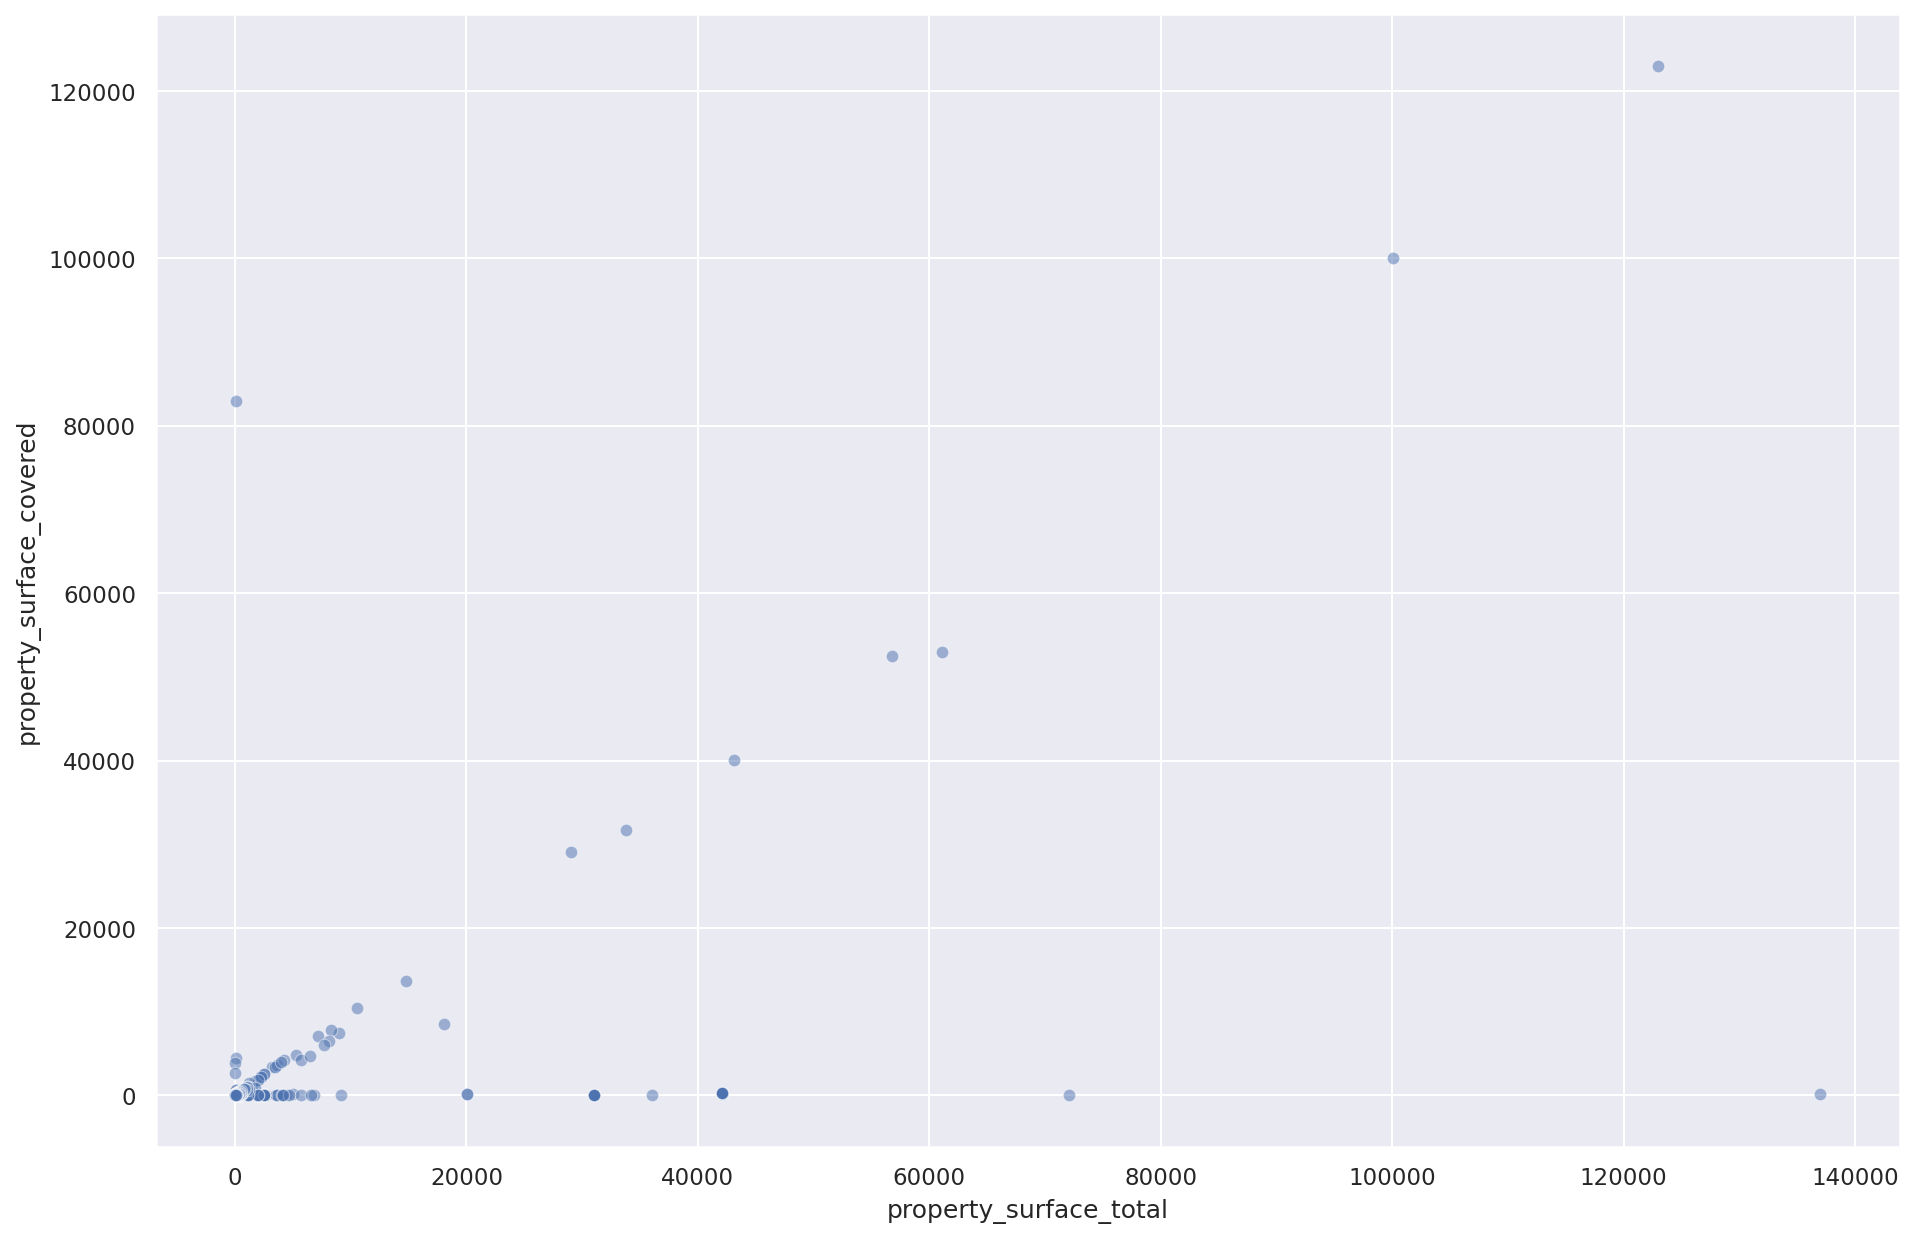

In [85]:
plt.figure(dpi=150, figsize=(15, 10))
grf=sns.scatterplot(data=df, x="property_surface_total", y="property_surface_covered", alpha=0.5)

**c) Valores atípicos:** analizar la existencia de valores atípicos
* Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.
* Explicar qué características poseen los datos atípicos detectados.
* Decidir el tratamiento a aplicar sobre los mismos.
* Analizar la relación entre el precio de venta y los metros de superficie ¿hay
valores atípicos que no se detectaron previamente?

#### Brayan:

Investigo los outliers de latitud

Con respecto al valor 9999 de end_date_year, me imagino que es una propiedad que no esta vendida todavia
asi que pasare su valor a 2023

In [86]:
df.end_date_year.replace({9999:2023}, inplace=True)

<AxesSubplot:xlabel='end_date_year', ylabel='count'>

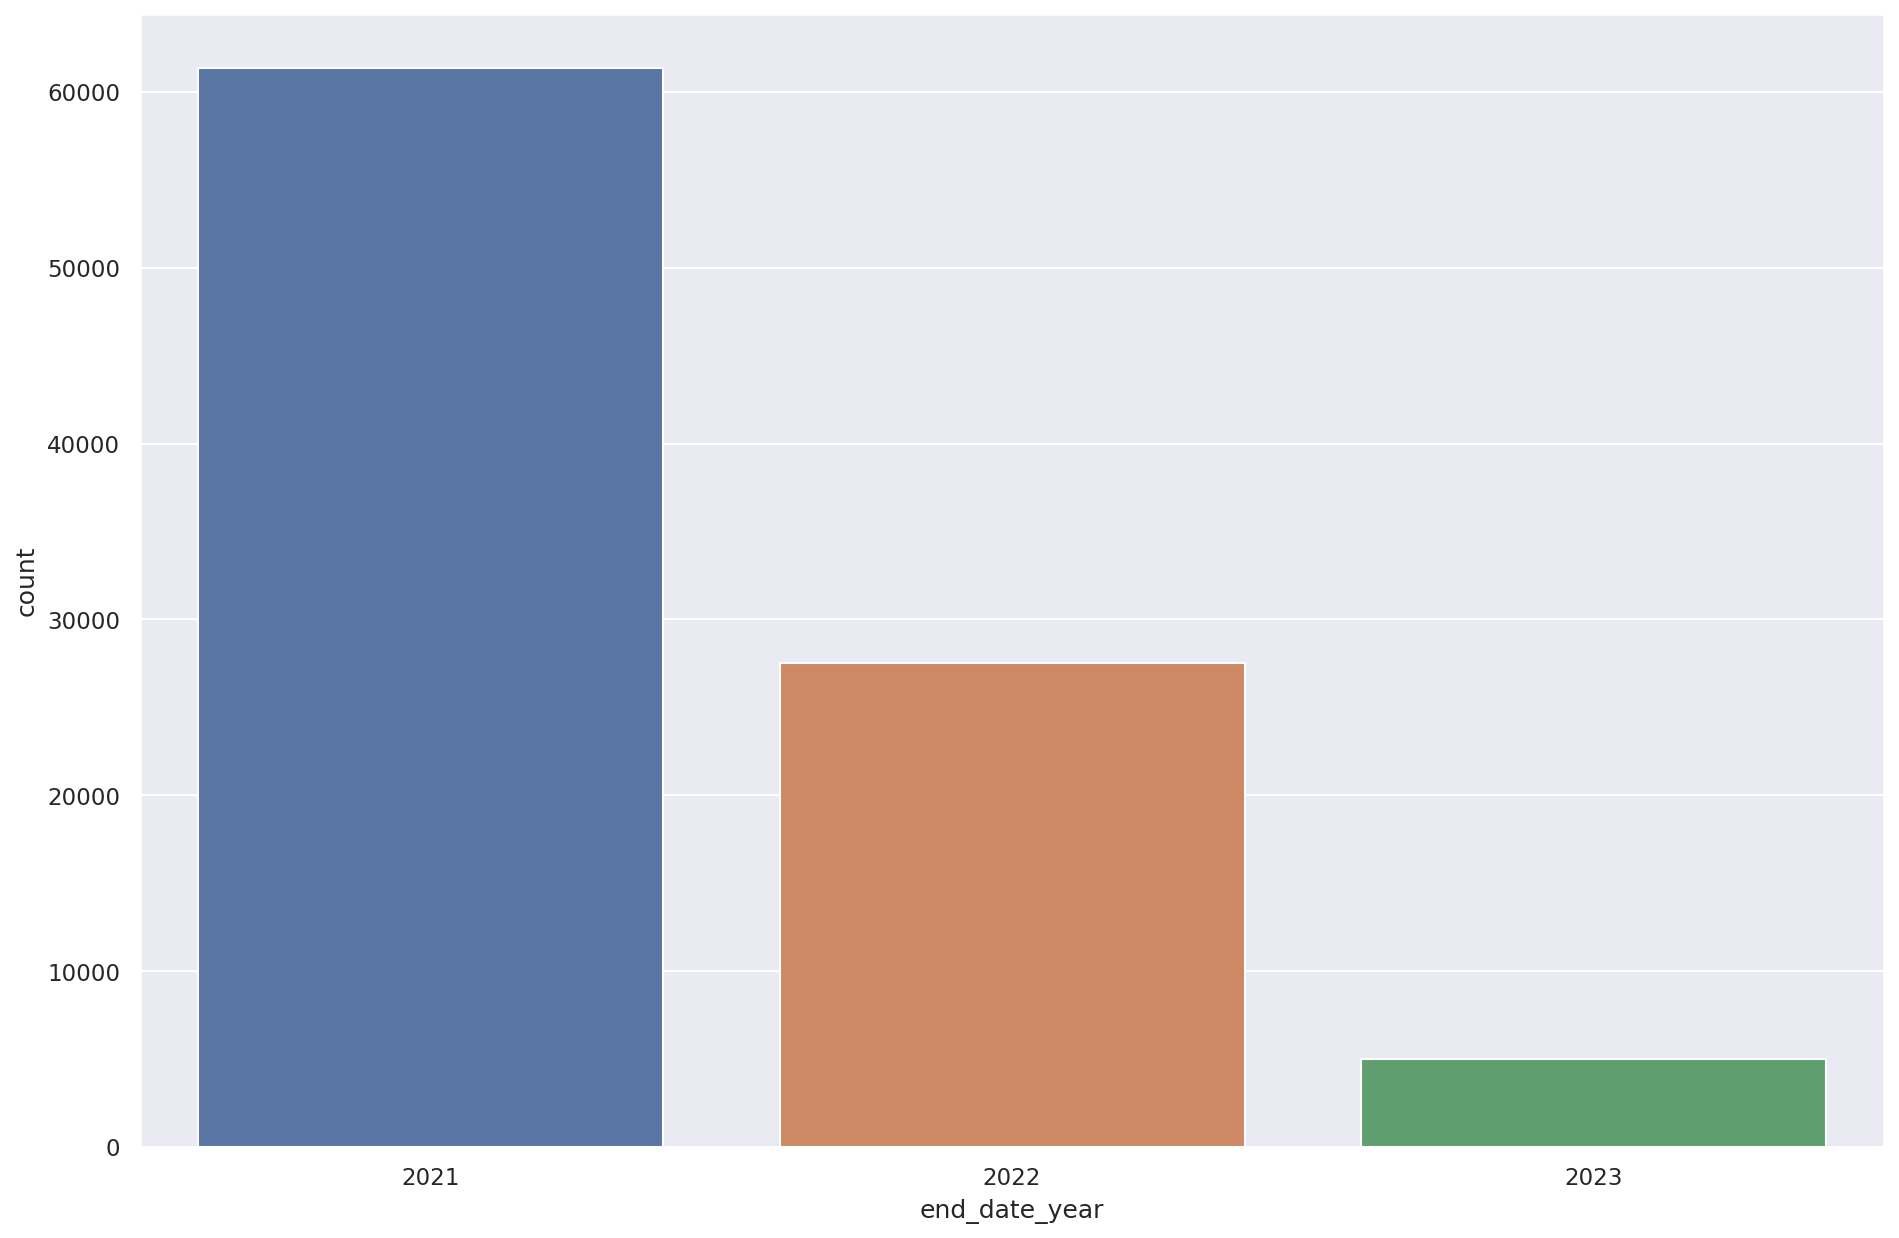

In [87]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns.countplot(
    x="end_date_year", data=df 
)

#### Analia:

Outliers de precio

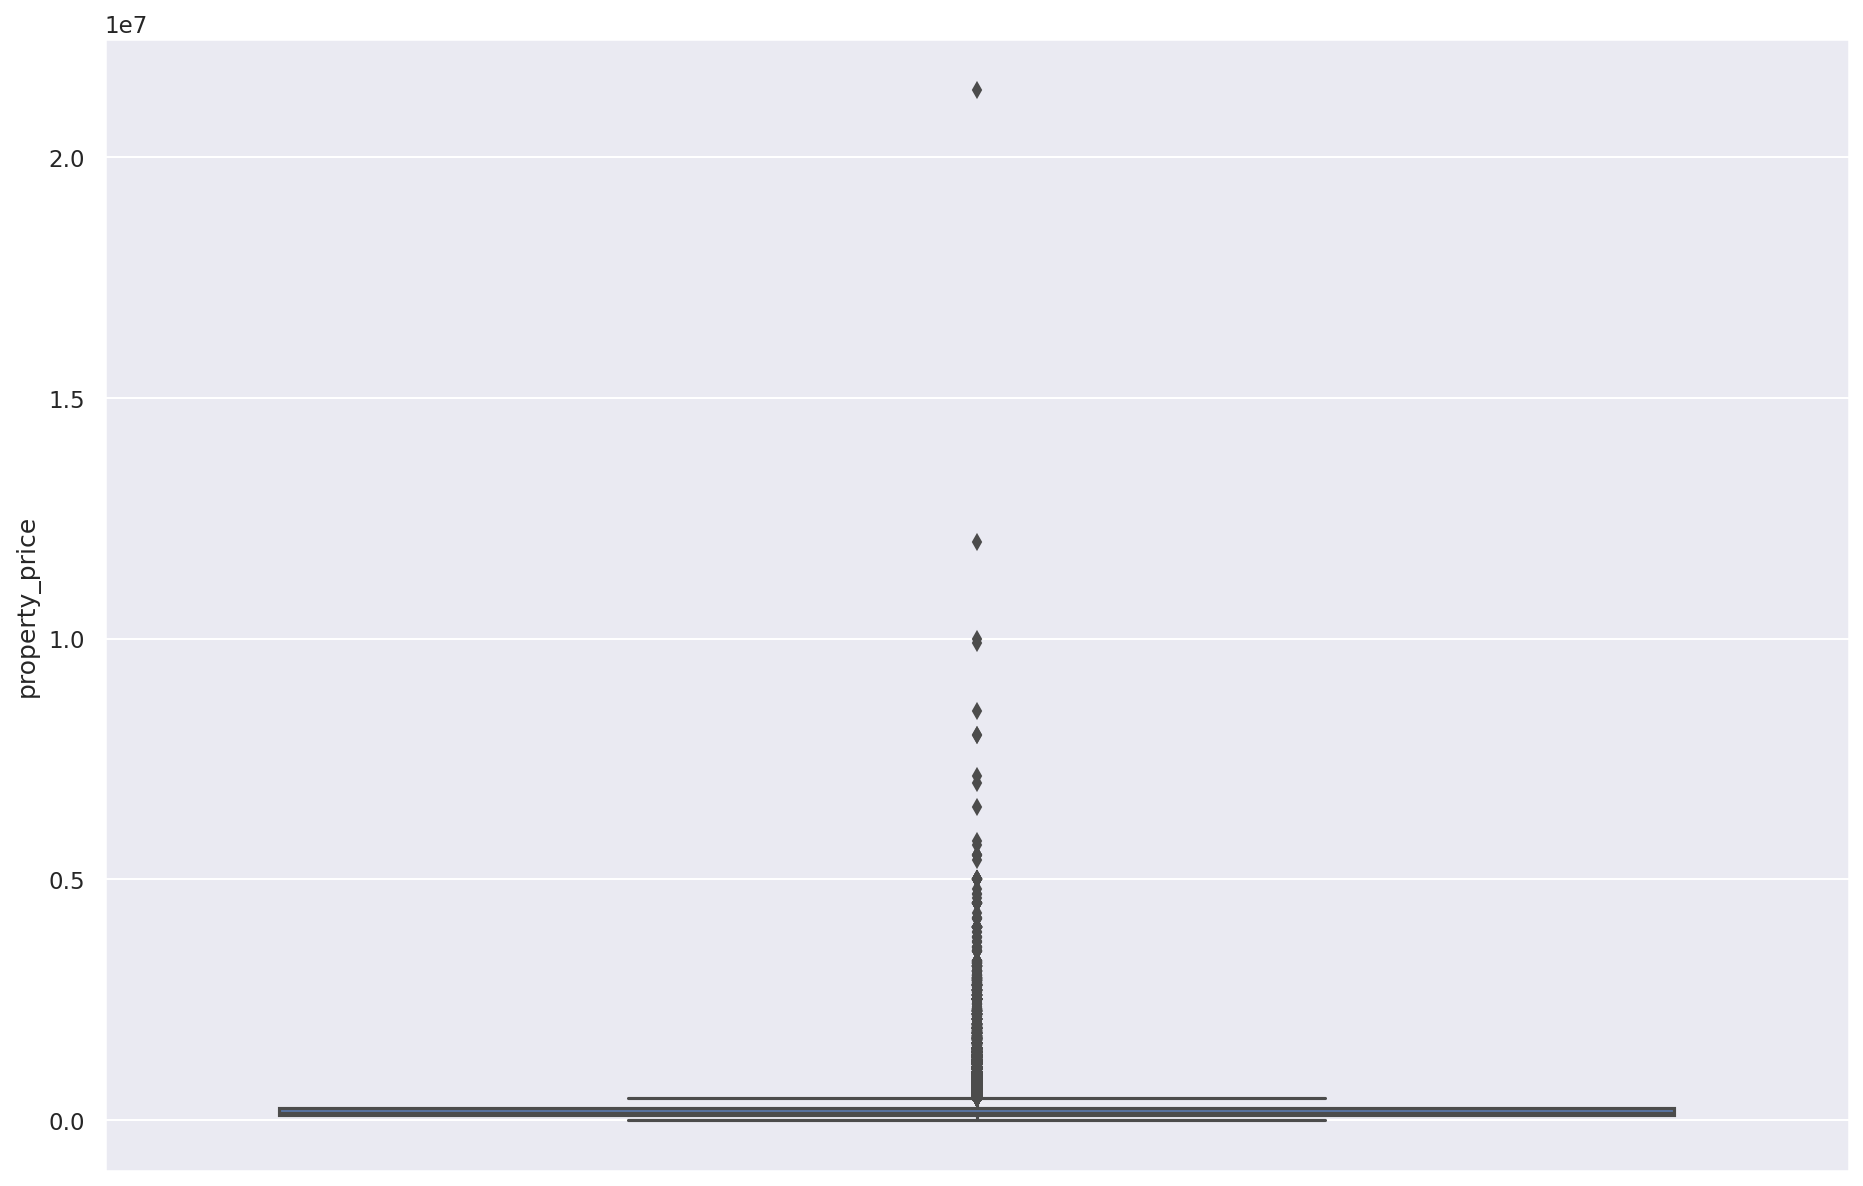

In [88]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns.boxplot(y=df.property_price)
plt.show()

Hacemos zoom

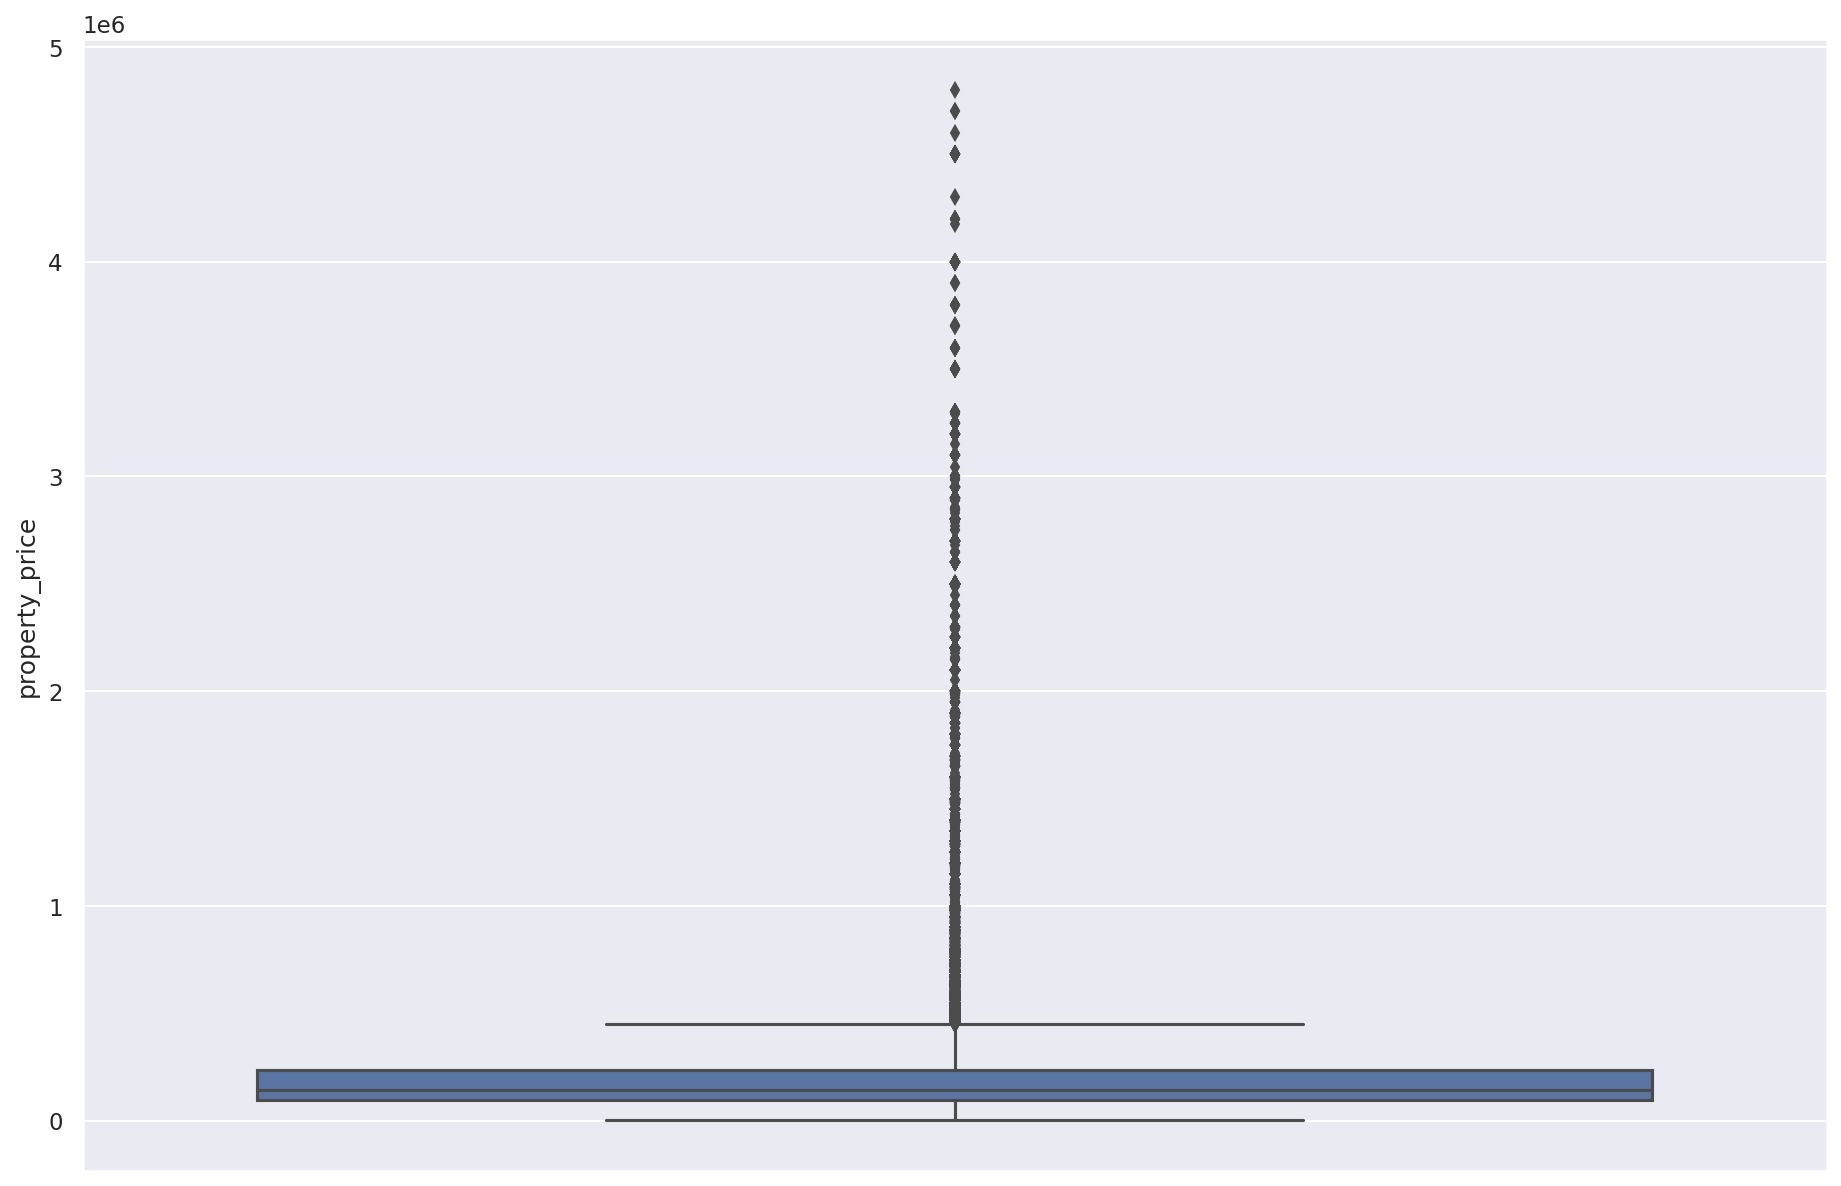

In [89]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns.boxplot(y=df[df['property_price']<5000000].property_price)
plt.show()

Verificacion de valores atipicos

In [90]:
#Outliers
outlier=df[df['property_price']>2500000]
outlier

latitud   longitud         place_l2       place_l3       place_l4  \
48    -34.576741 -58.404830  Capital Federal        Palermo  Palermo Chico   
49    -34.576741 -58.404830  Capital Federal        Palermo  Palermo Chico   
201   -34.605781 -58.376705  Capital Federal    San Nicolás            NaN   
883   -34.577484 -58.405751  Capital Federal        Palermo  Palermo Chico   
897   -34.567172 -58.430634  Capital Federal        Palermo            NaN   
...          ...        ...              ...            ...            ...   
90704 -34.608246 -58.363794  Capital Federal  Puerto Madero            NaN   
90926 -34.590923 -58.384214  Capital Federal       Recoleta            NaN   
93671 -34.581524 -58.403588  Capital Federal        Palermo            NaN   
93893        NaN        NaN  Capital Federal        Palermo  Palermo Chico   
94104 -34.590653 -58.384325  Capital Federal       Recoleta            NaN   

      place_l5 operation property_type  property_rooms  property_bedrooms  \
48         NaN     Venta  Departamento             NaN                4.0   
49         NaN     Venta  Departamento             NaN                4.0   
201        NaN     Venta  Departamento             NaN                NaN   
883        NaN     Venta  Departamento             5.0                3.0   
897        NaN     Venta  Departamento             5.0                4.0   
...        ...       ...           ...             ...                ...   
90704      NaN     Venta  Departamento             7.0                4.0   
90926      NaN     Venta  Departamento             9.0                5.0   
93671      NaN     Venta  Departamento            10.0                6.0   
93893      NaN     Venta          Casa             NaN                4.0   
94104      NaN     Venta  Departamento             8.0                5.0   

       property_surface_total  property_surface_covered  property_price  \
48                      400.0                       NaN       2700000.0   
49                      400.0                       NaN       2700000.0   
201                   10500.0                   10500.0       9900000.0   
883                     535.0                     220.0       2800000.0   
897                     390.0                     390.0       2900000.0   
...                       ...                       ...             ...   
90704                   540.0                     360.0       3200000.0   
90926                   430.0                     430.0       2800000.0   
93671                   520.0                     500.0       3300000.0   
93893                   405.0                     405.0       3200000.0   
94104                   431.0                     415.0       2800000.0   

      property_currency                                     property_title  \
48                  USD                       Departamento - Palermo Chico   
49                  USD                       Departamento - Palermo Chico   
201                 USD  EDIFICIO A TERMINAR DE 900M2- EXCELENTE UBICAC...   
883                 USD  VENTA con RENTA hasta Feb 2020  TORRES DE GELL...   
897                 USD  VENTA Torre MARIO R. ALVAREZ piso de máxima ca...   
...                 ...                                                ...   
90704               USD  PENTHOUSE  2 PISCINAS PRIVADAS EN PUERTO MADER...   
90926               USD  VENTA increible piso con vista a la Plaza Pell...   
93671               USD                         Venta Departamento Palermo   
93893               USD                     Casa en venta en palermo chico   
94104               USD  Departamento de excelente calidad con 5 dormit...   

       start_date_month  end_date_month  end_date_year  created_on_month  
48                    9               9           2021                 9  
49                    9               9           2021                 9  
201                   9               1           2022                 9  
883      

In [91]:
print(df['property_price'].describe())

count    9.383200e+04
mean     2.264669e+05
std      3.190497e+05
min      5.000000e+03
25%      9.500000e+04
50%      1.440000e+05
75%      2.380000e+05
max      2.140000e+07
Name: property_price, dtype: float64


Outliers viviendas segun precios

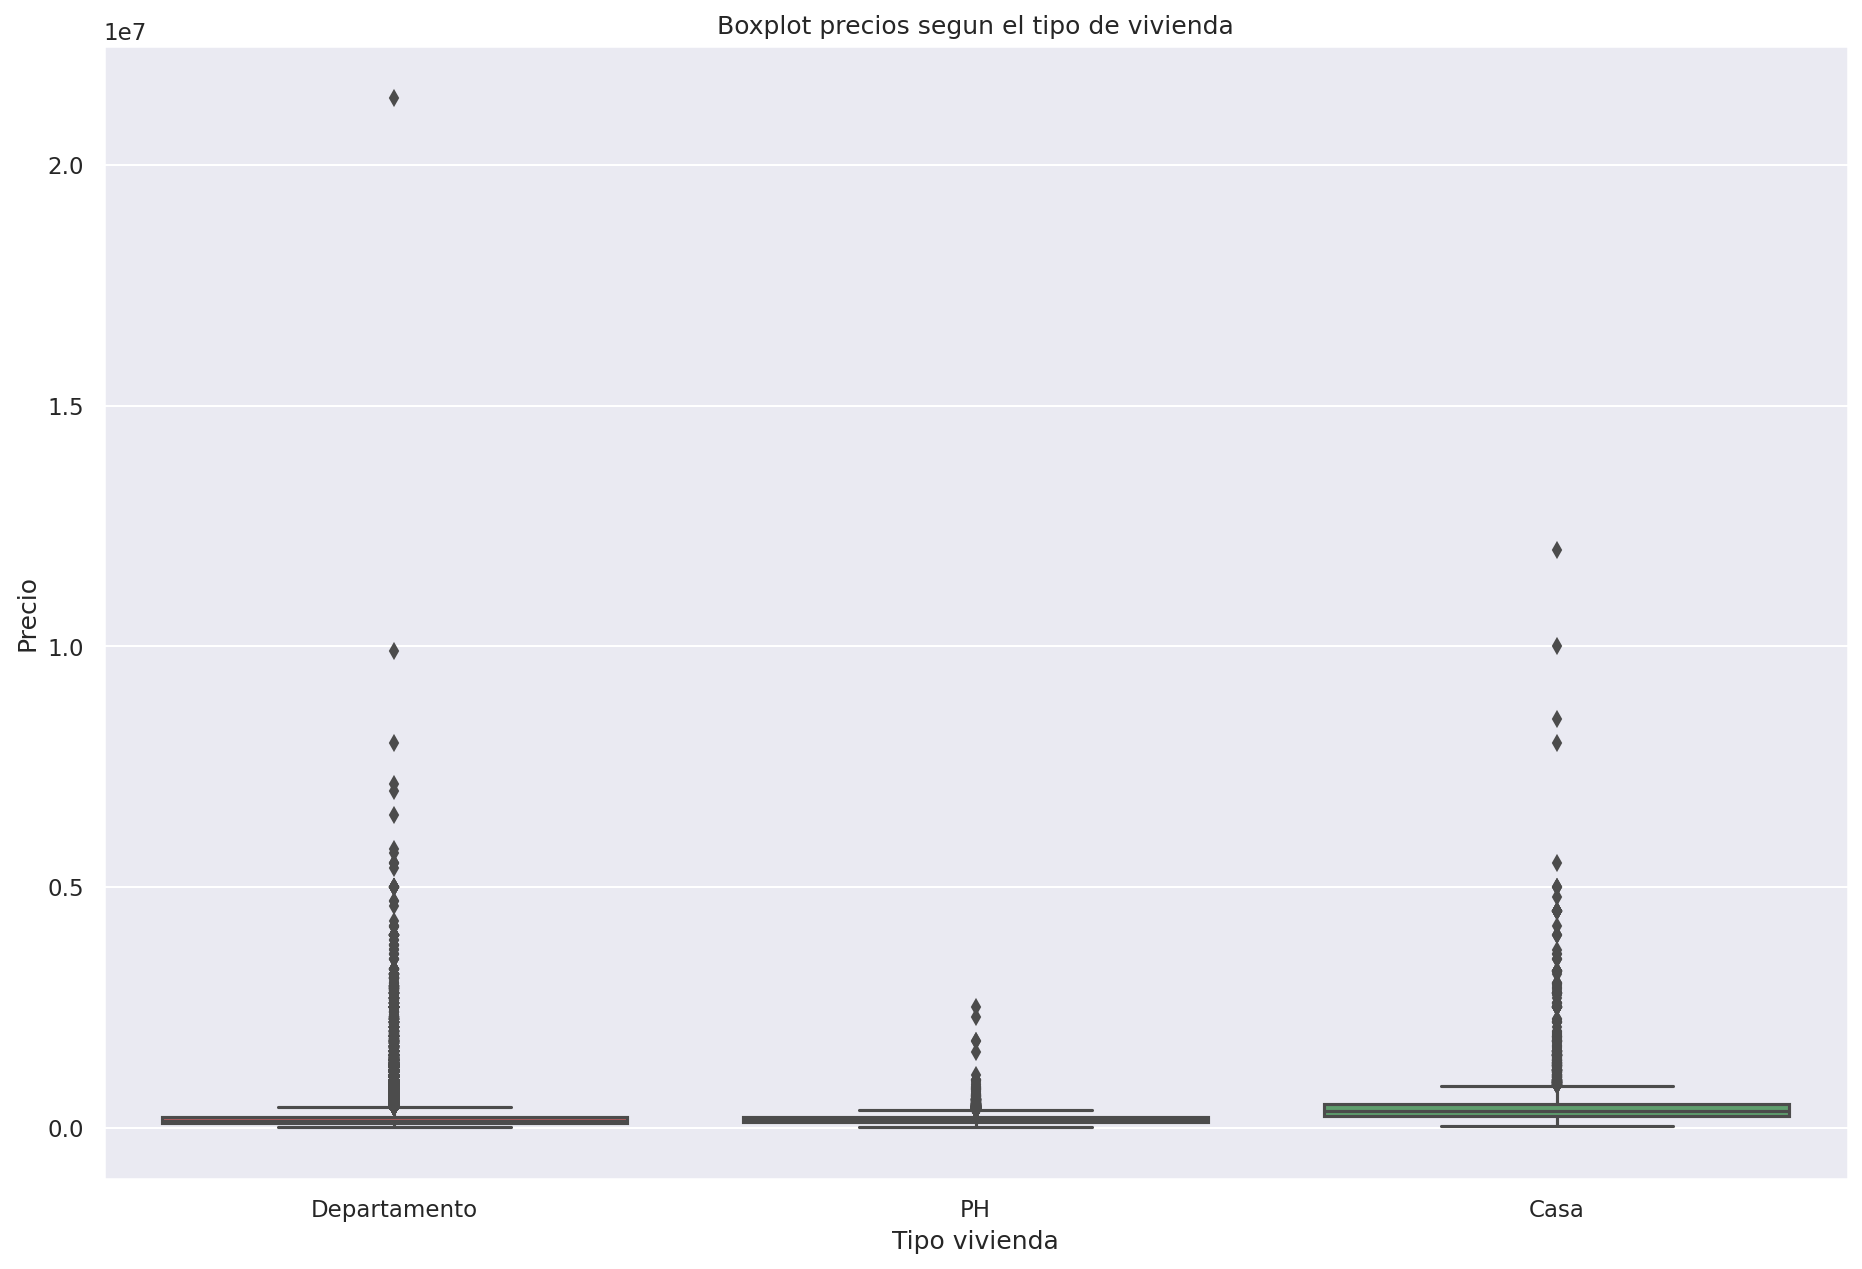

In [92]:
#Viviendas segun precios
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_boxplot_fare_pclass=sns.boxplot(x="property_type",y="property_price", data=df, palette=["r","b", "g"]).set(title="Boxplot precios segun el tipo de vivienda",xlabel='Tipo vivienda',ylabel='Precio')

#### Lucia:

### Precio de venta

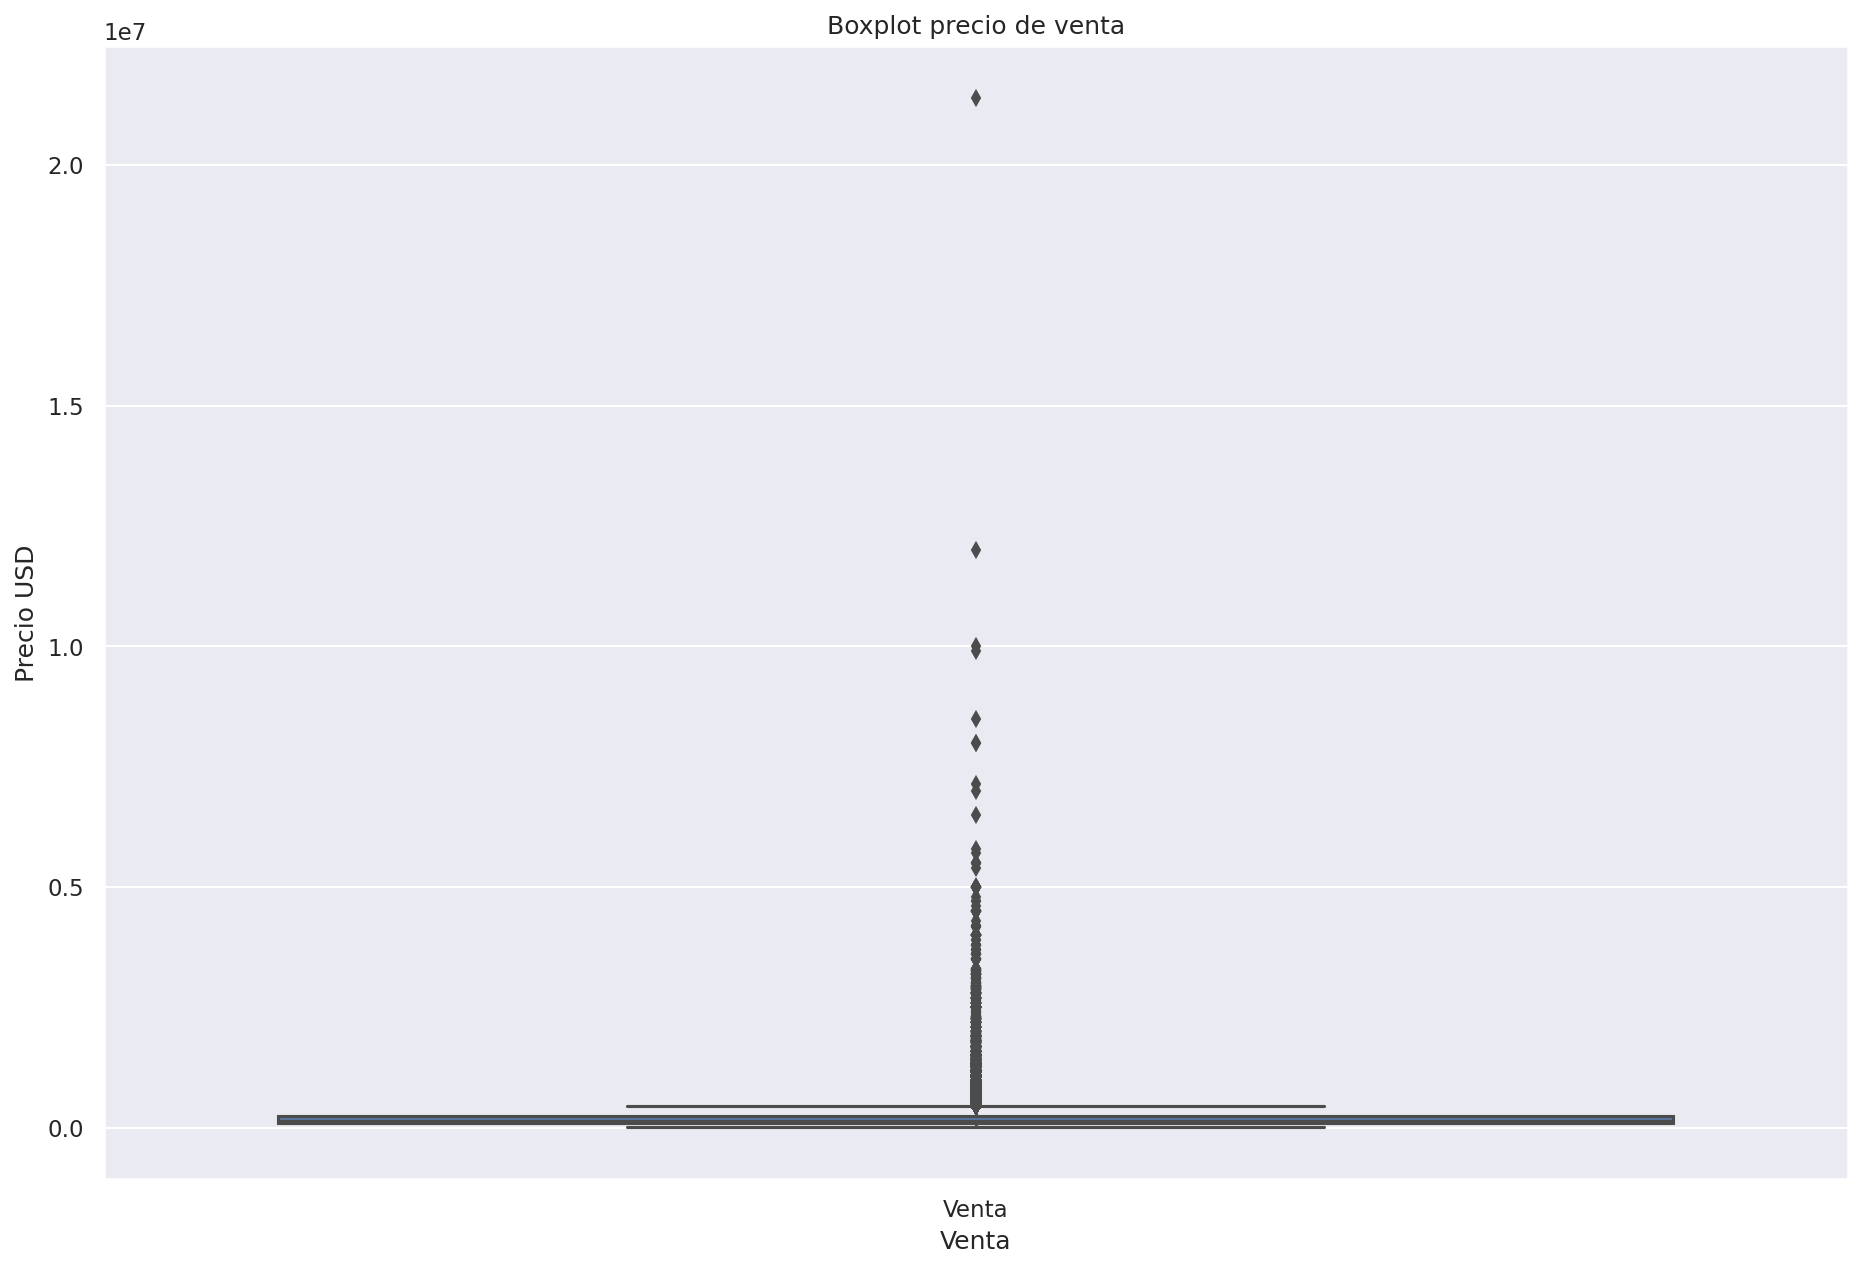

In [93]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_boxplot_price=sns.boxplot(x="operation",y="property_price", data=df).set(title="Boxplot precio de venta",xlabel='Venta',ylabel='Precio USD')

+ Outlier

In [94]:
df[df['property_price']>20000000]

latitud   longitud         place_l2   place_l3 place_l4 place_l5  \
12409 -34.616044 -58.458621  Capital Federal  Caballito      NaN      NaN   

      operation property_type  property_rooms  property_bedrooms  \
12409     Venta  Departamento             3.0                NaN   

       property_surface_total  property_surface_covered  property_price  \
12409                    68.0                      64.0      21400000.0   

      property_currency      property_title  start_date_month  end_date_month  \
12409               USD  Departamento venta                 1               5   

       end_date_year  created_on_month  
12409           2022                 1

+ Es el mismo outlier de antes, es la venta de un departamento

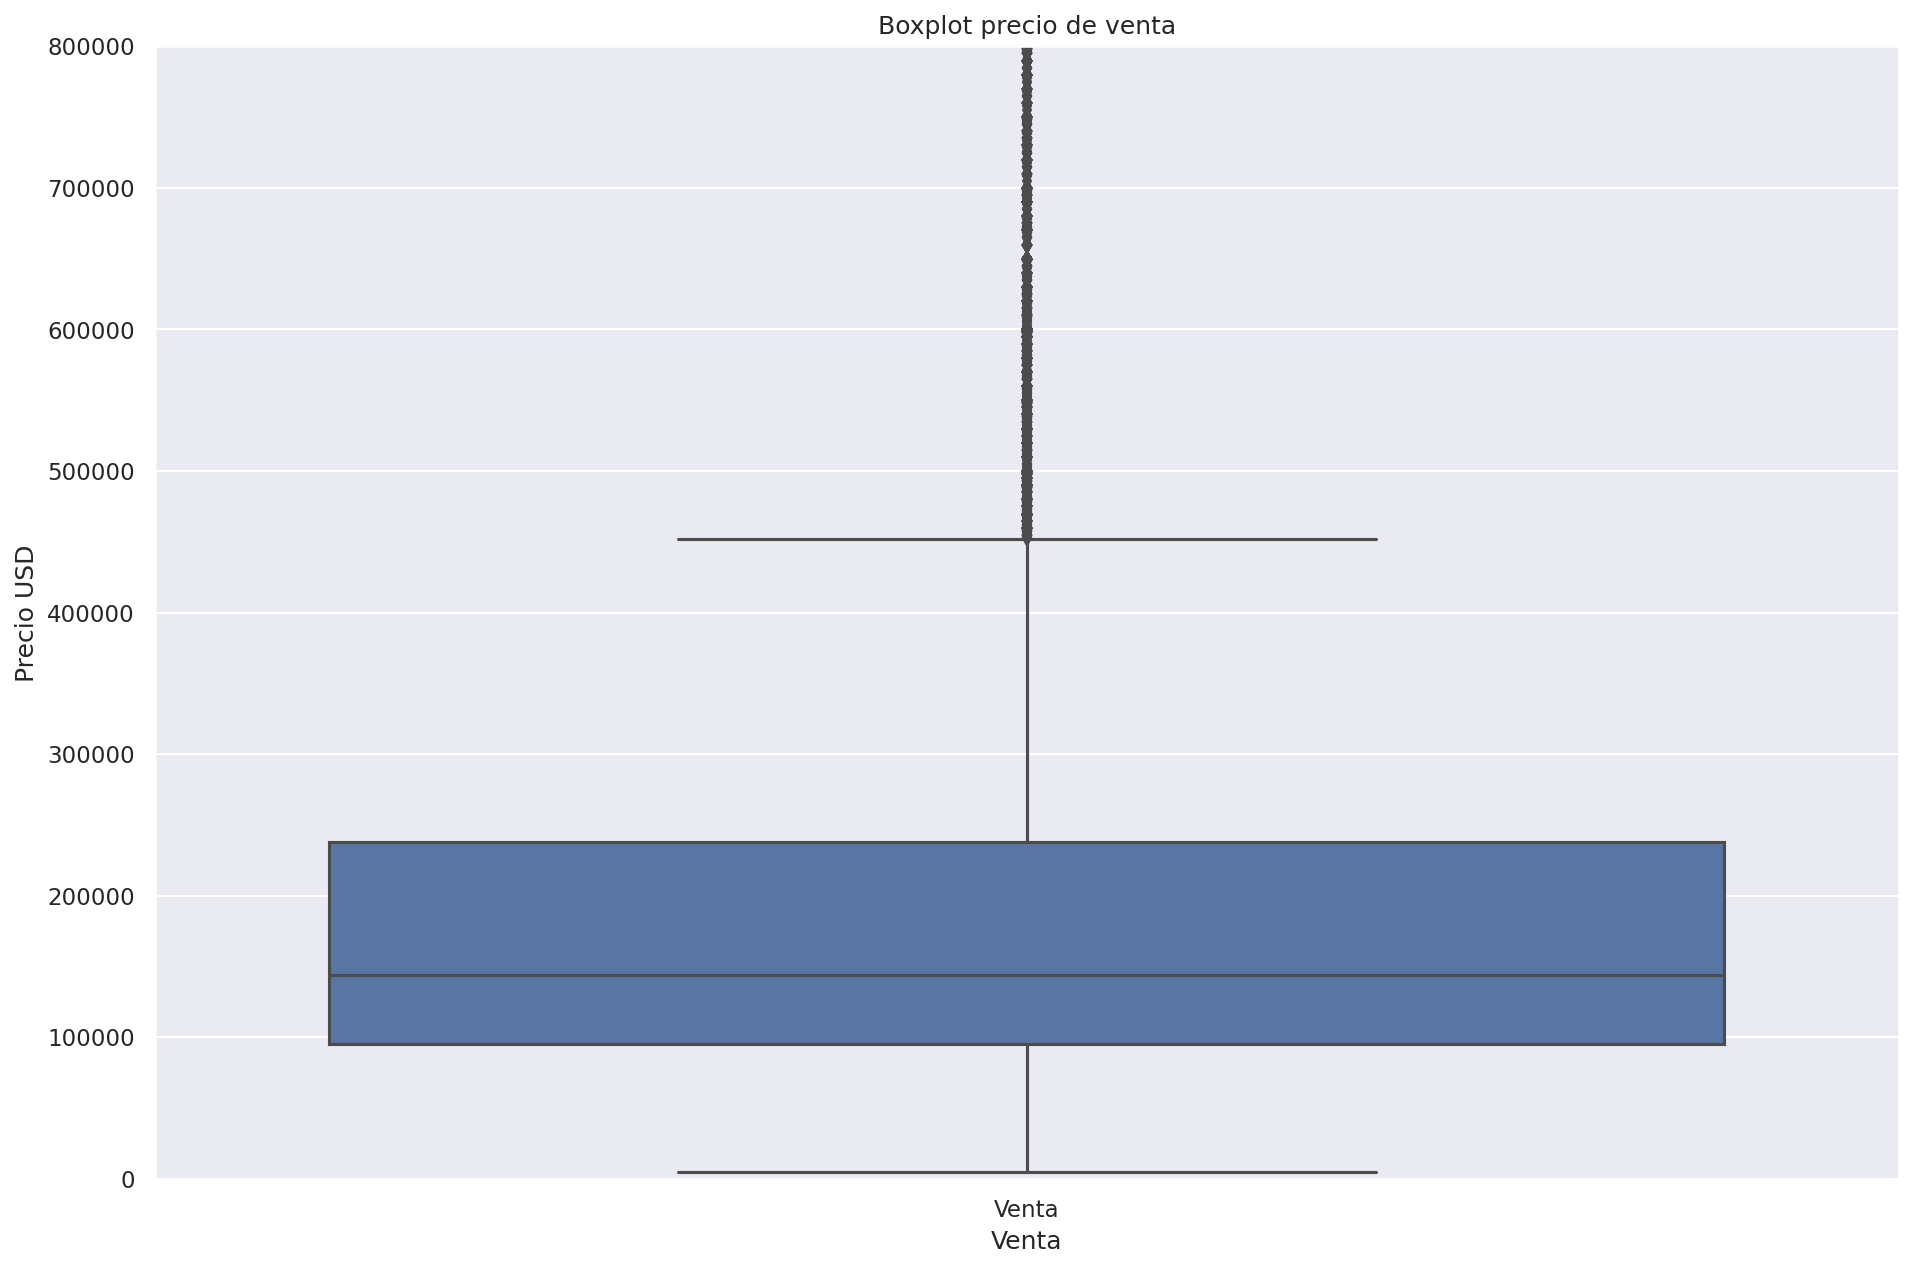

In [95]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_boxplot_price=sns.boxplot(x="operation",y="property_price", data=df)
sns_boxplot_price=sns_boxplot_price.set(title="Boxplot precio de venta",xlabel='Venta',ylabel='Precio USD', ylim=(0, 800000))

### Precio segun el tipo de propiedad

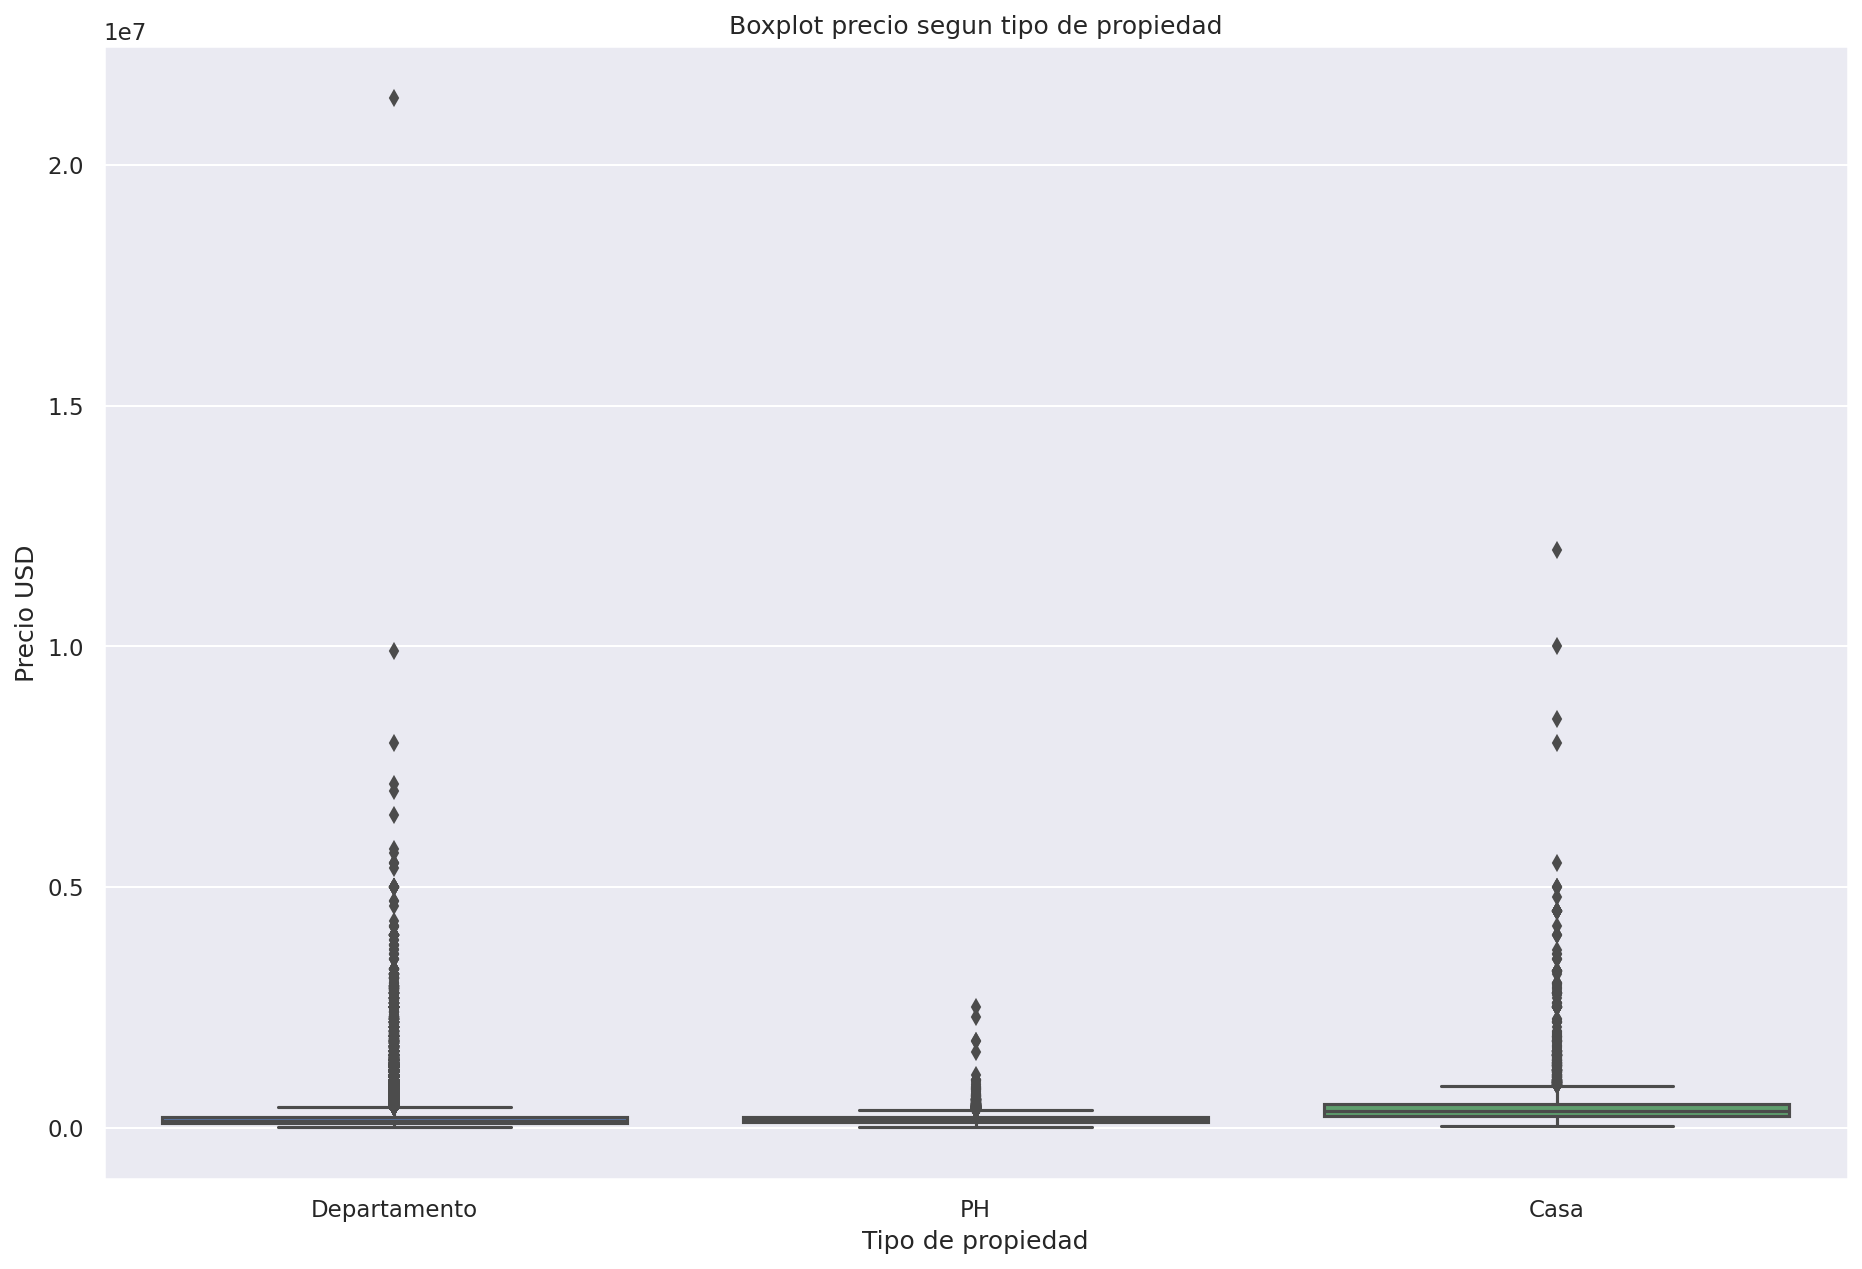

In [96]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_boxplot_price=sns.boxplot(x="property_type",y="property_price", data=df).set(title="Boxplot precio segun tipo de propiedad",xlabel='Tipo de propiedad',ylabel='Precio USD')

+ Hay un outlier muy lejano en departamento

In [97]:
df_depto = df[df['property_type']=='Departamento']
df_depto[df_depto['property_price']>20000000]

latitud   longitud         place_l2   place_l3 place_l4 place_l5  \
12409 -34.616044 -58.458621  Capital Federal  Caballito      NaN      NaN   

      operation property_type  property_rooms  property_bedrooms  \
12409     Venta  Departamento             3.0                NaN   

       property_surface_total  property_surface_covered  property_price  \
12409                    68.0                      64.0      21400000.0   

      property_currency      property_title  start_date_month  end_date_month  \
12409               USD  Departamento venta                 1               5   

       end_date_year  created_on_month  
12409           2022                 1

+ Hay 4 outliers mas alejados en casa

In [98]:
df_casa = df[df['property_type']=='Casa']
df_casa[df_casa['property_price']>6000000]

latitud   longitud         place_l2   place_l3 place_l4 place_l5  \
17850 -34.572494 -58.462433  Capital Federal   Belgrano      NaN      NaN   
30963 -34.565947 -58.442326  Capital Federal   Belgrano      NaN      NaN   
32470 -34.608300 -58.371200  Capital Federal  Monserrat      NaN      NaN   
67630 -34.593634 -58.377164  Capital Federal     Retiro      NaN      NaN   

      operation property_type  property_rooms  property_bedrooms  \
17850     Venta          Casa             5.0                4.0   
30963     Venta          Casa             9.0                5.0   
32470     Venta          Casa             3.0                2.0   
67630     Venta          Casa             NaN                8.0   

       property_surface_total  property_surface_covered  property_price  \
17850                  3197.0                    3367.0      12000000.0   
30963                  1763.0                    1763.0       8000000.0   
32470                   225.0                      93.0       8500000.0   
67630                  1166.0                    1485.0      10000000.0   

      property_currency                                     property_title  \
17850               USD                                  Casa - Belgrano R   
30963               USD  Casa  Estilo Frances en Venta y/o Alquiler | V...   
32470               USD  Oportunidad al Costo! Venta Preciosa Casa a Es...   
67630               USD  Basavilbaso y Arenales Espectacular casa. Embl...   

       start_date_month  end_date_month  end_date_year  created_on_month  
17850                 3               6           2021                 3  
30963                 5               5           2021                 5  
32470                 2               2           2021                 2  
67630                 9               3           2022                 9

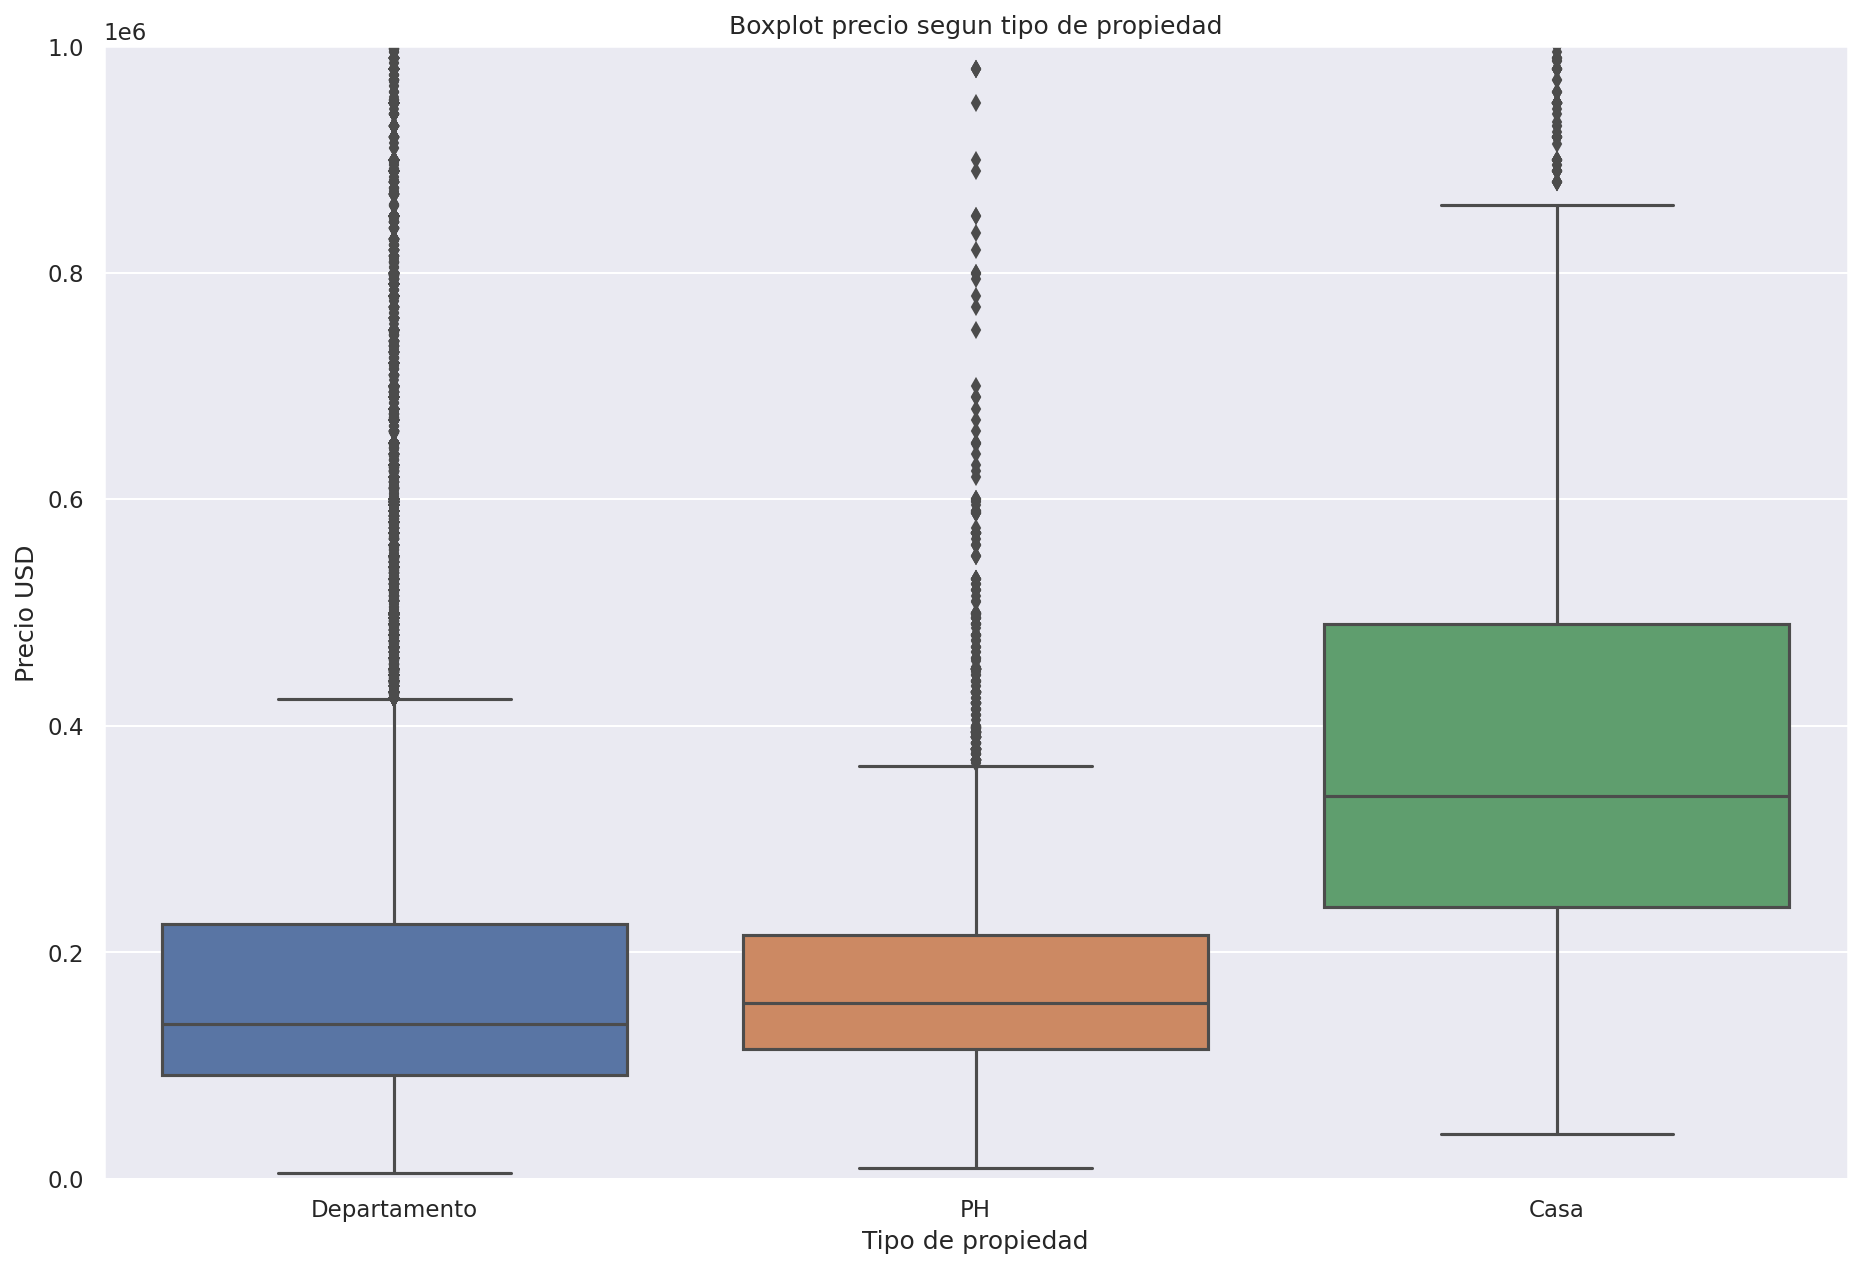

In [99]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_boxplot_price=sns.boxplot(x="property_type",y="property_price", data=df)
sns_boxplot_price=sns_boxplot_price.set(title="Boxplot precio segun tipo de propiedad",xlabel='Tipo de propiedad',ylabel='Precio USD', ylim=(0, 1000000))

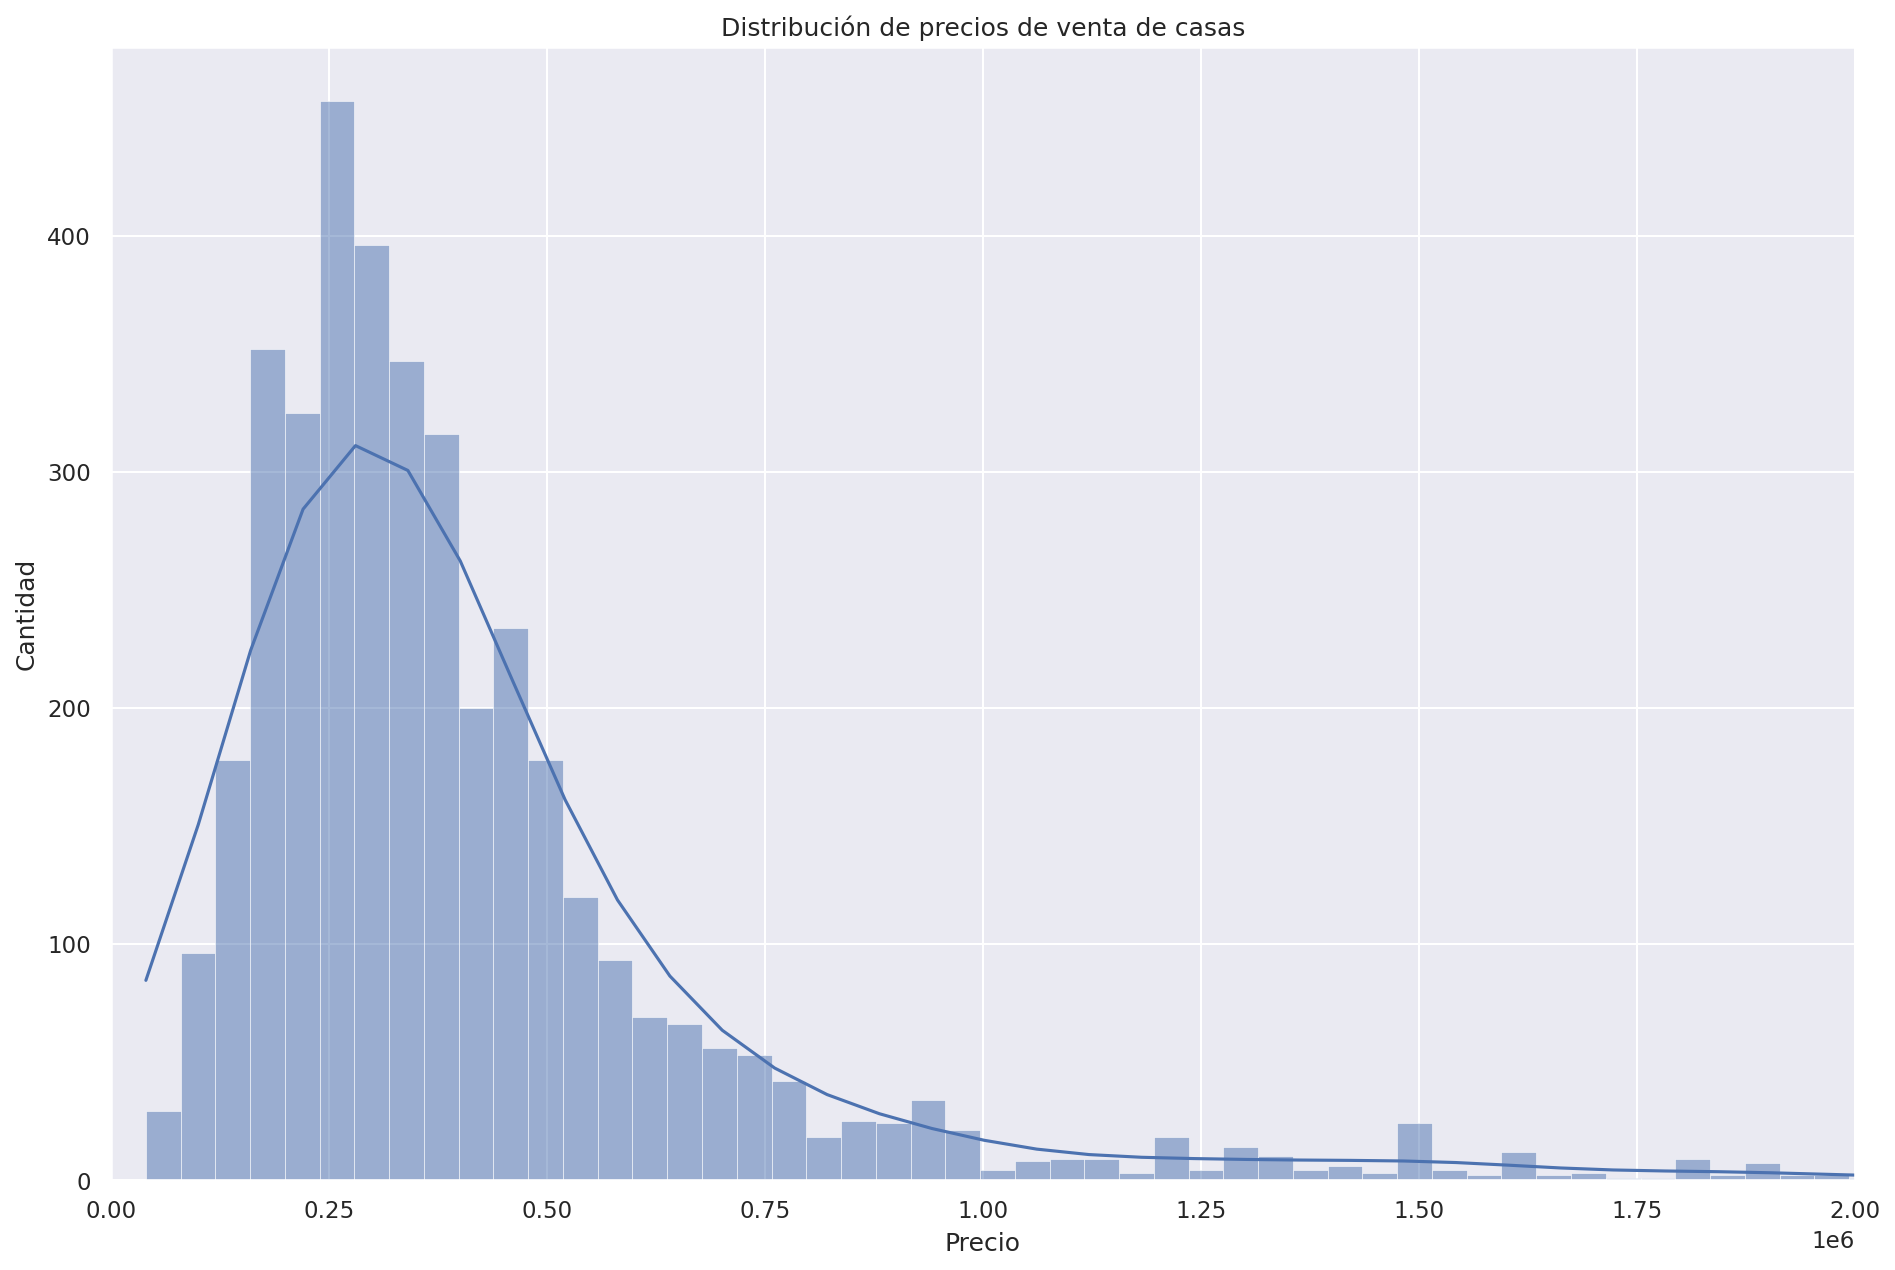

In [100]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
h_casa = sns.histplot(df_casa['property_price'], bins=300,kde=True)
h_casa = h_casa.set(title='Distribución de precios de venta de casas', xlim=(0, 2000000), xlabel='Precio', ylabel='Cantidad')

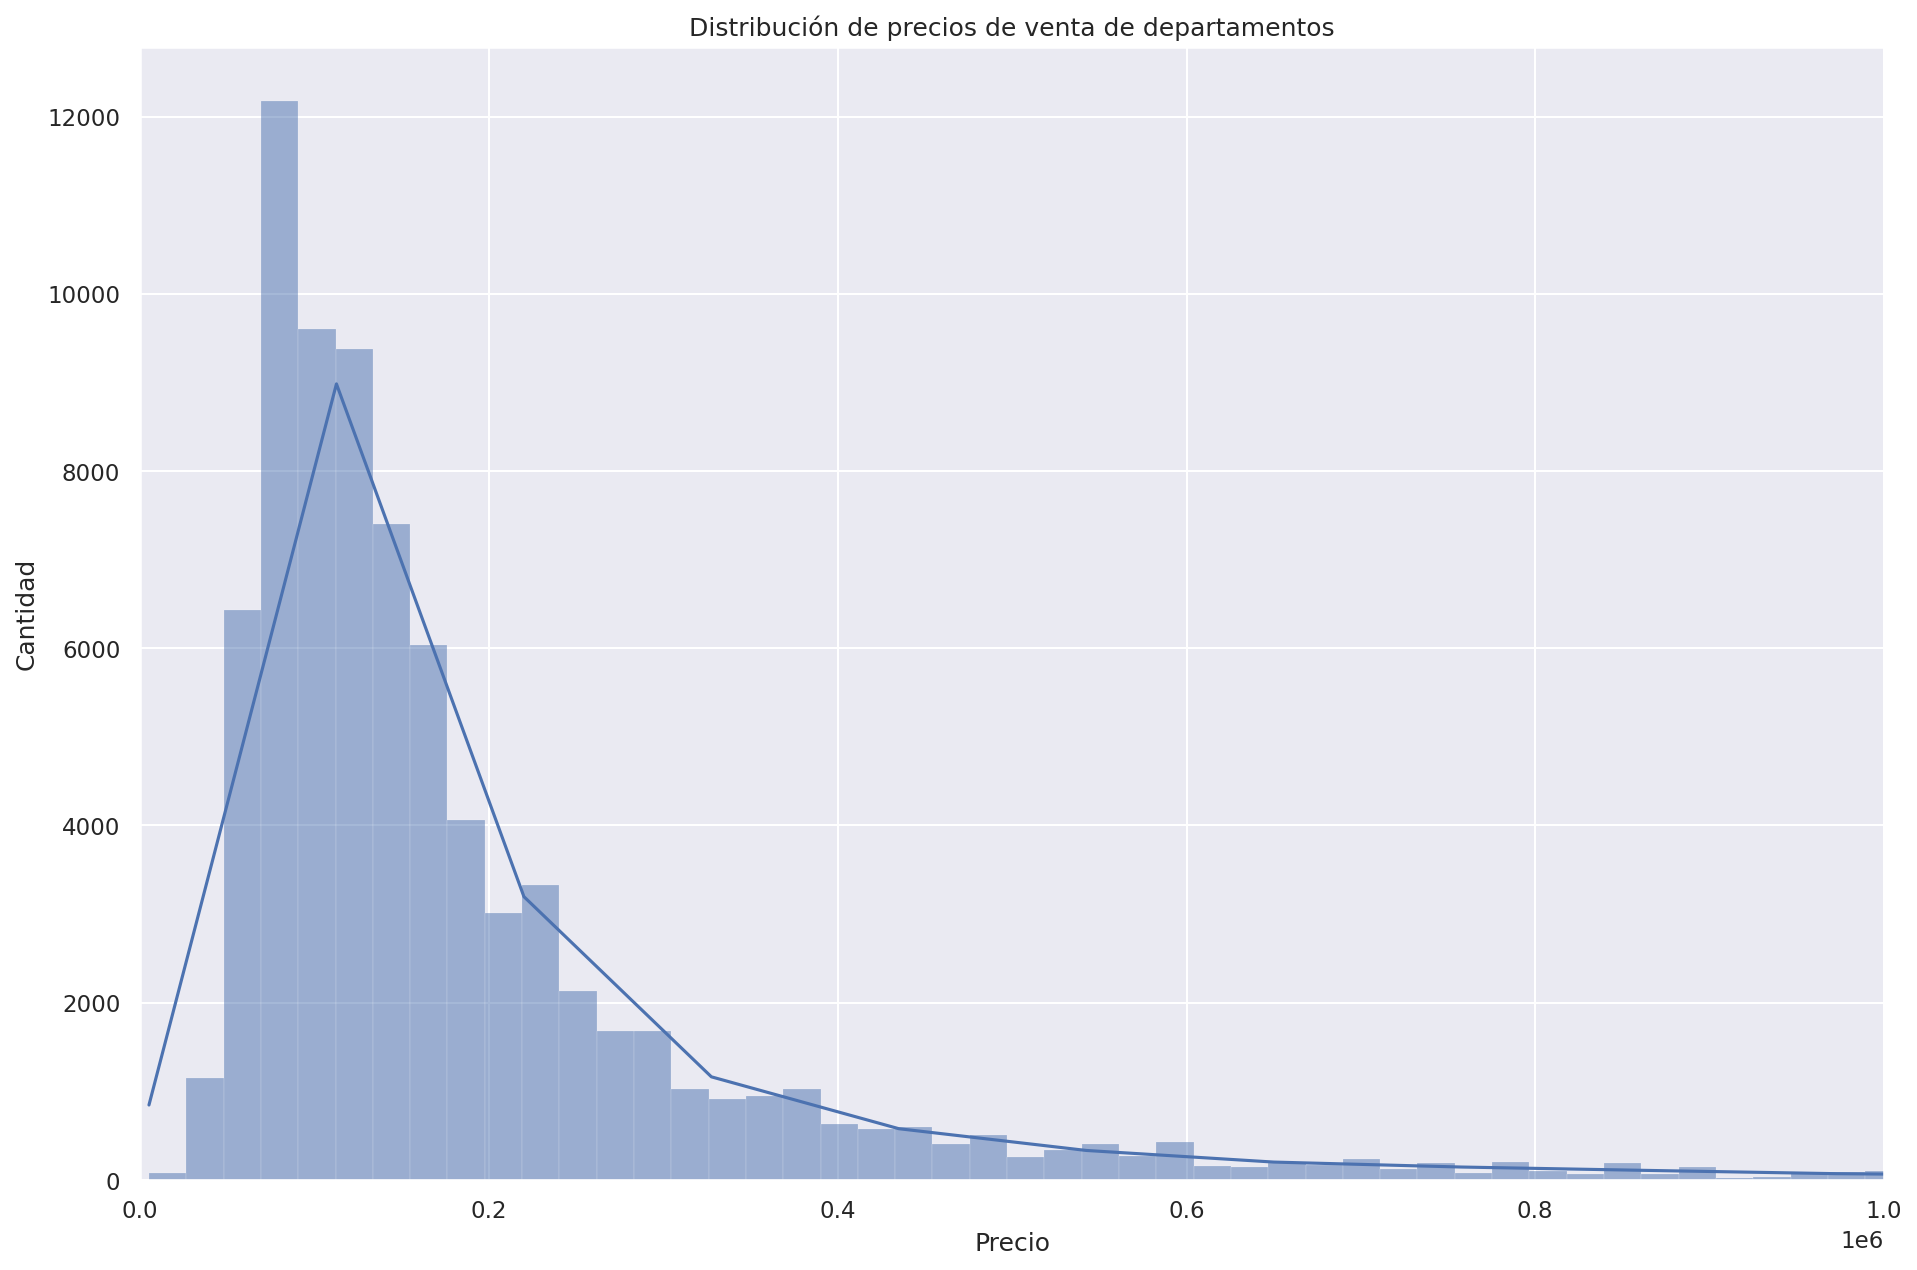

In [101]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
h_depto = sns.histplot(df_depto['property_price'], bins=1000, kde=True)
h_depto = h_depto.set(title='Distribución de precios de venta de departamentos', xlim=(0, 1000000), xlabel='Precio', ylabel='Cantidad')

In [102]:
df_ph = df[df['property_type']=='PH']

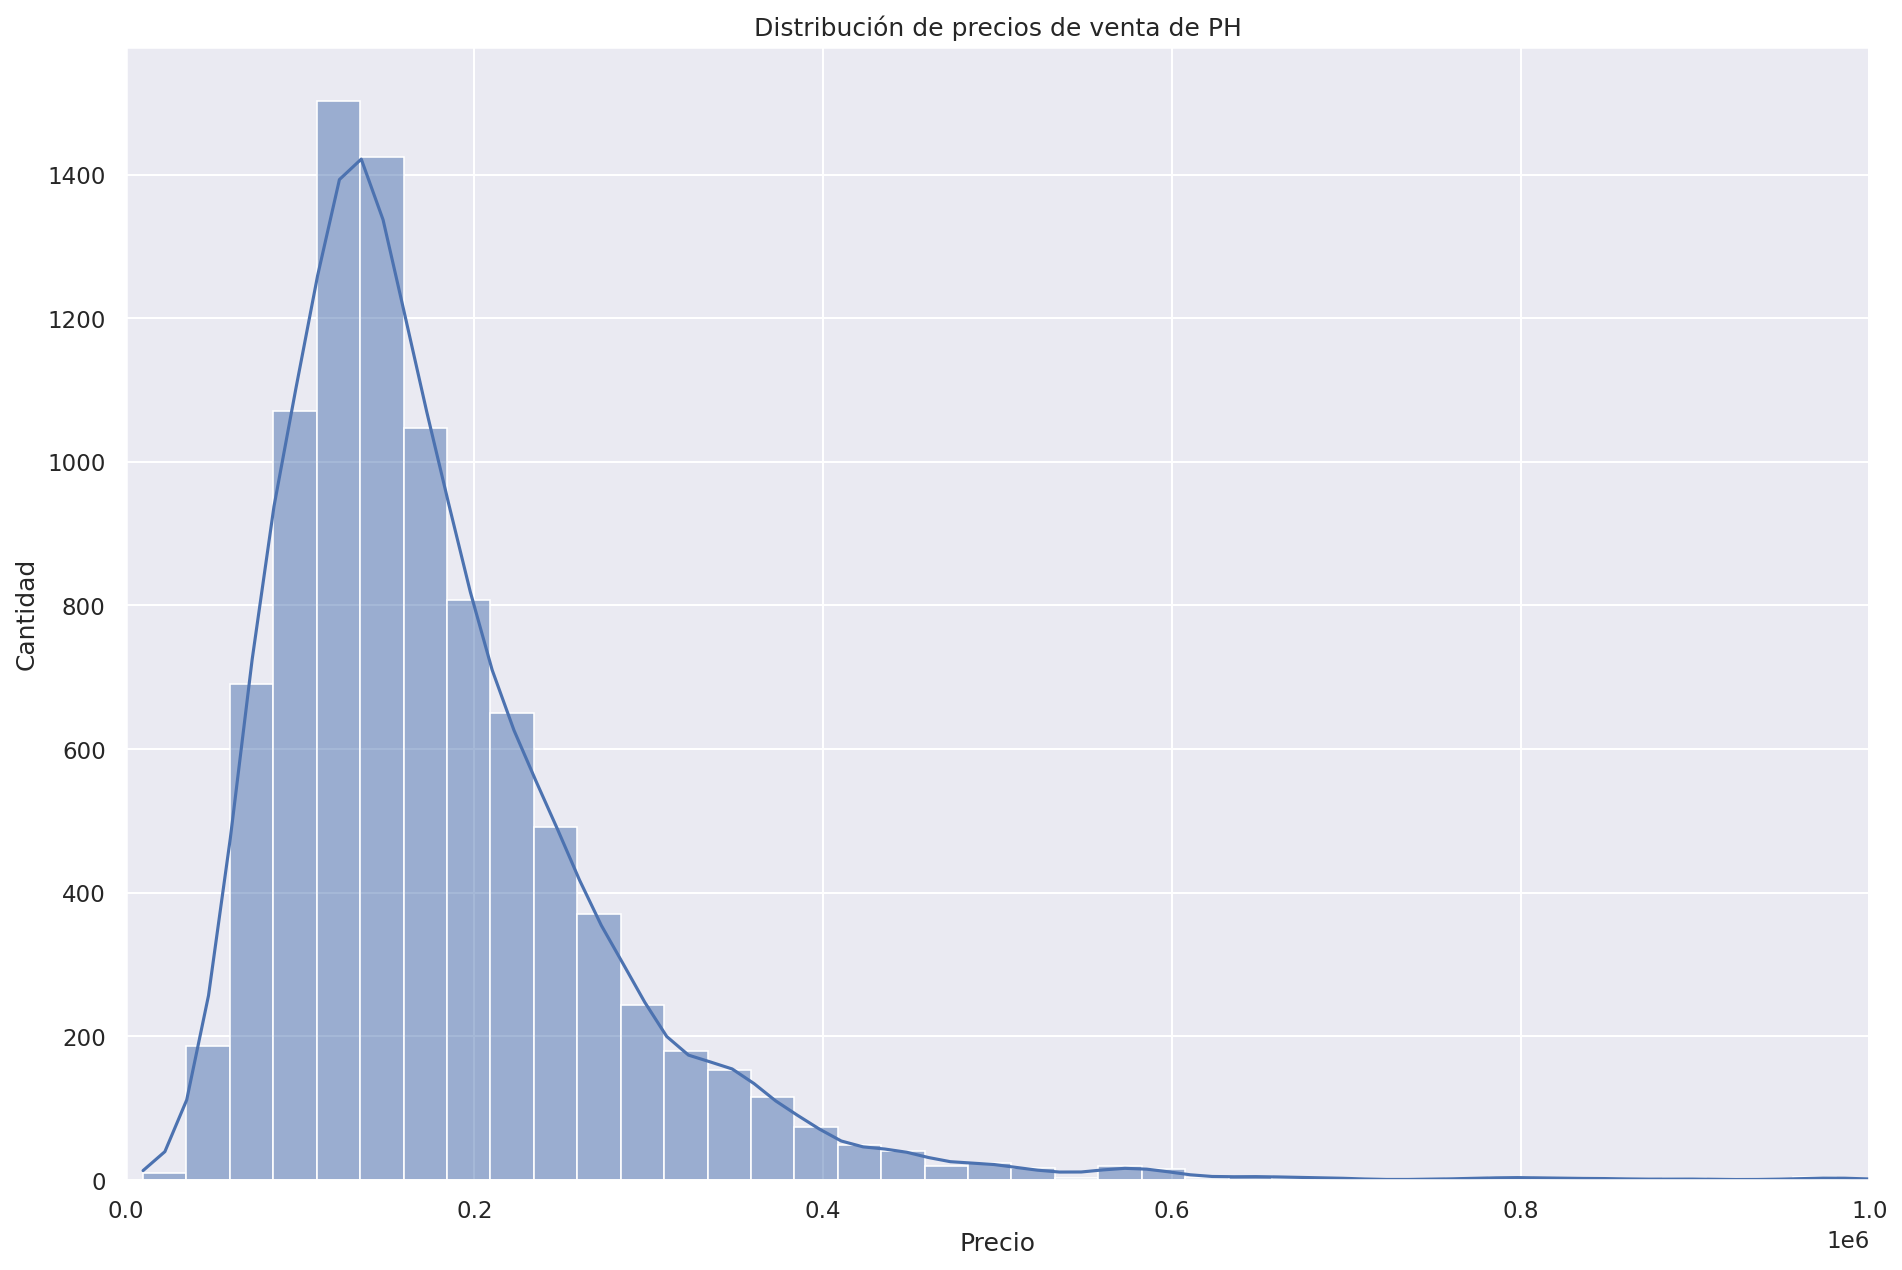

In [103]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
h_ph = sns.histplot(df_ph['property_price'], bins=100, kde=True)
h_ph = h_ph.set(title='Distribución de precios de venta de PH', xlim=(0, 1000000), xlabel='Precio', ylabel='Cantidad')

#### Con log

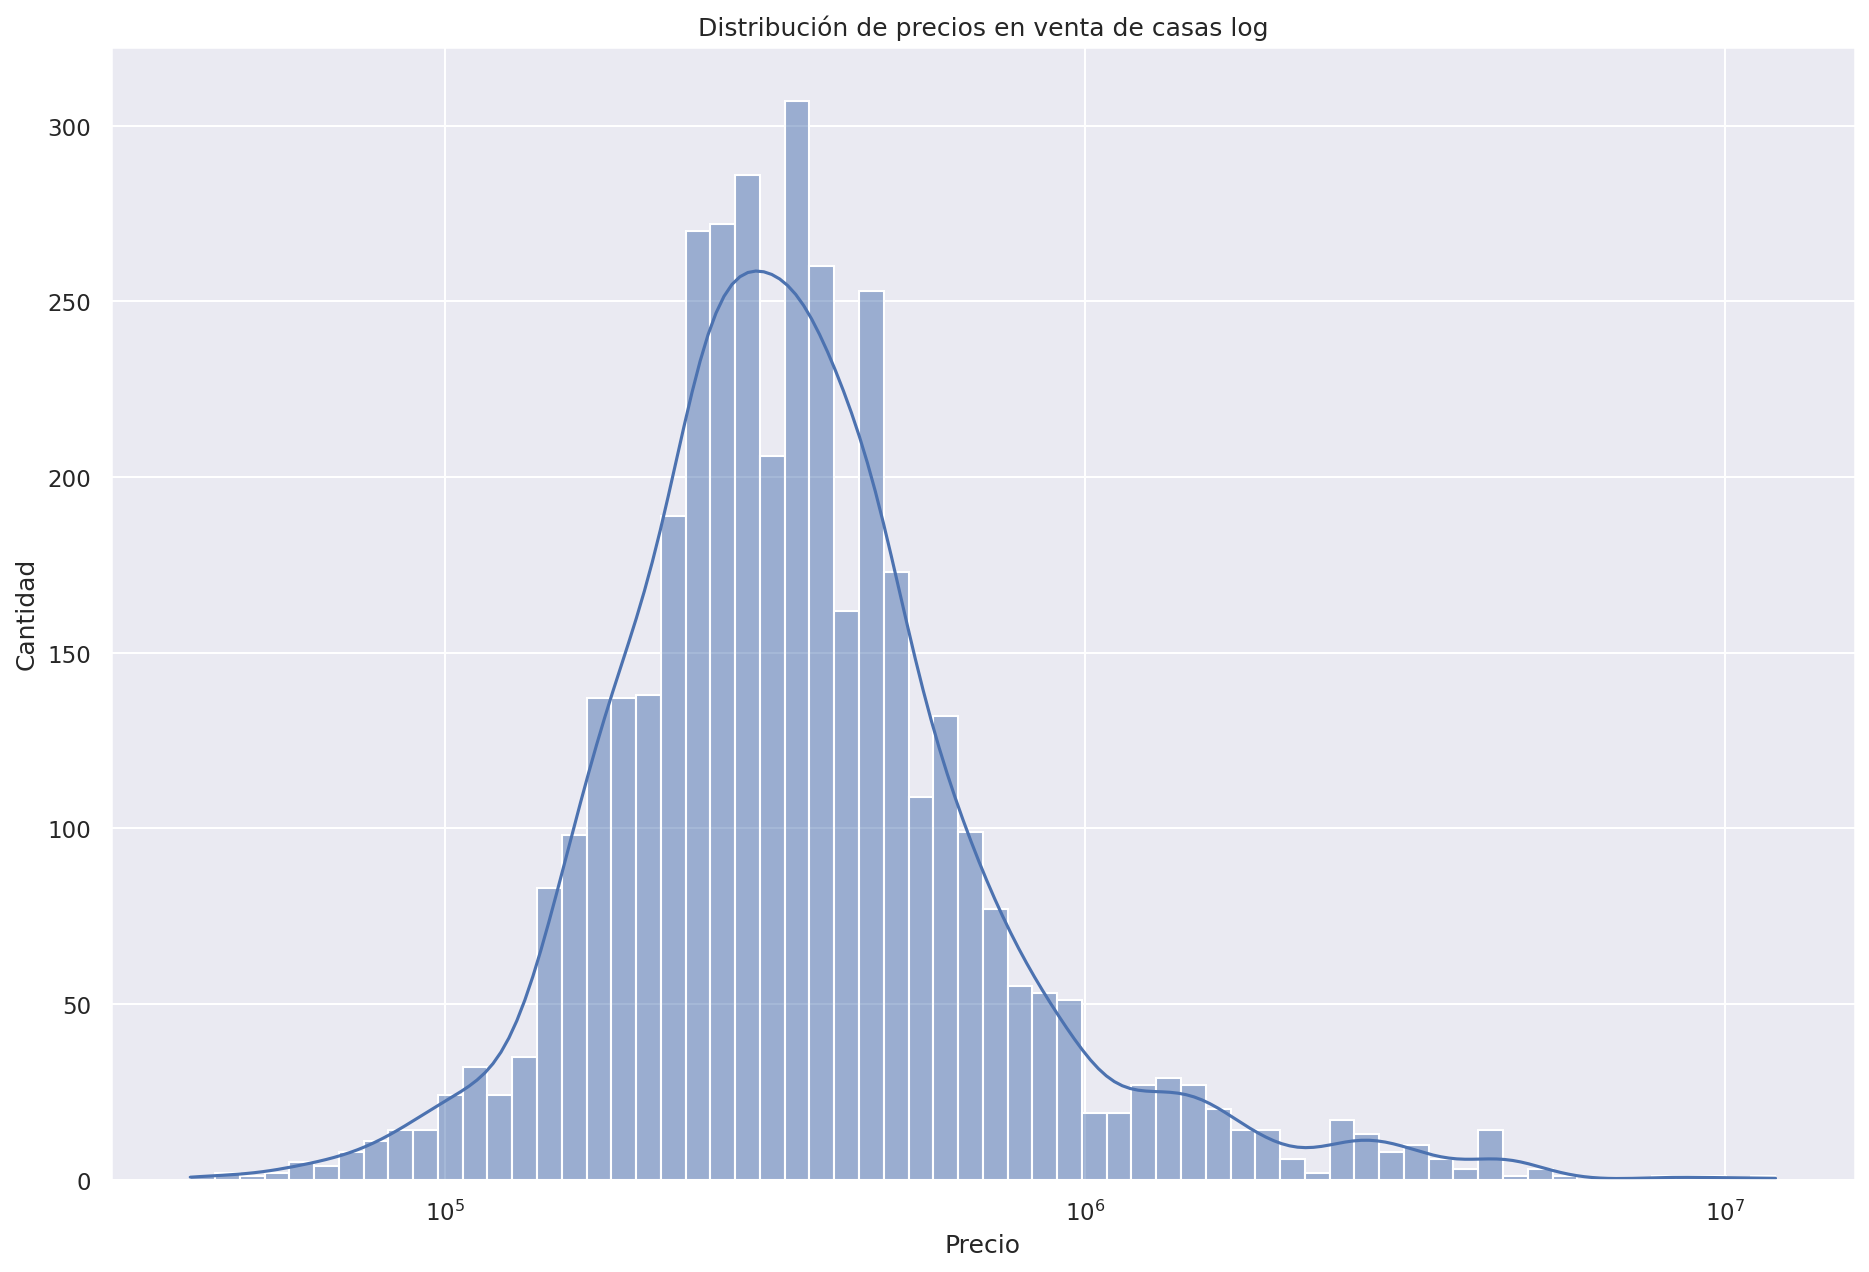

In [104]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
h_casa2 = sns.histplot(df_casa['property_price'], kde=True, log_scale=True)
h_casa2 = h_casa2.set(title='Distribución de precios en venta de casas log', xlabel='Precio', ylabel='Cantidad')

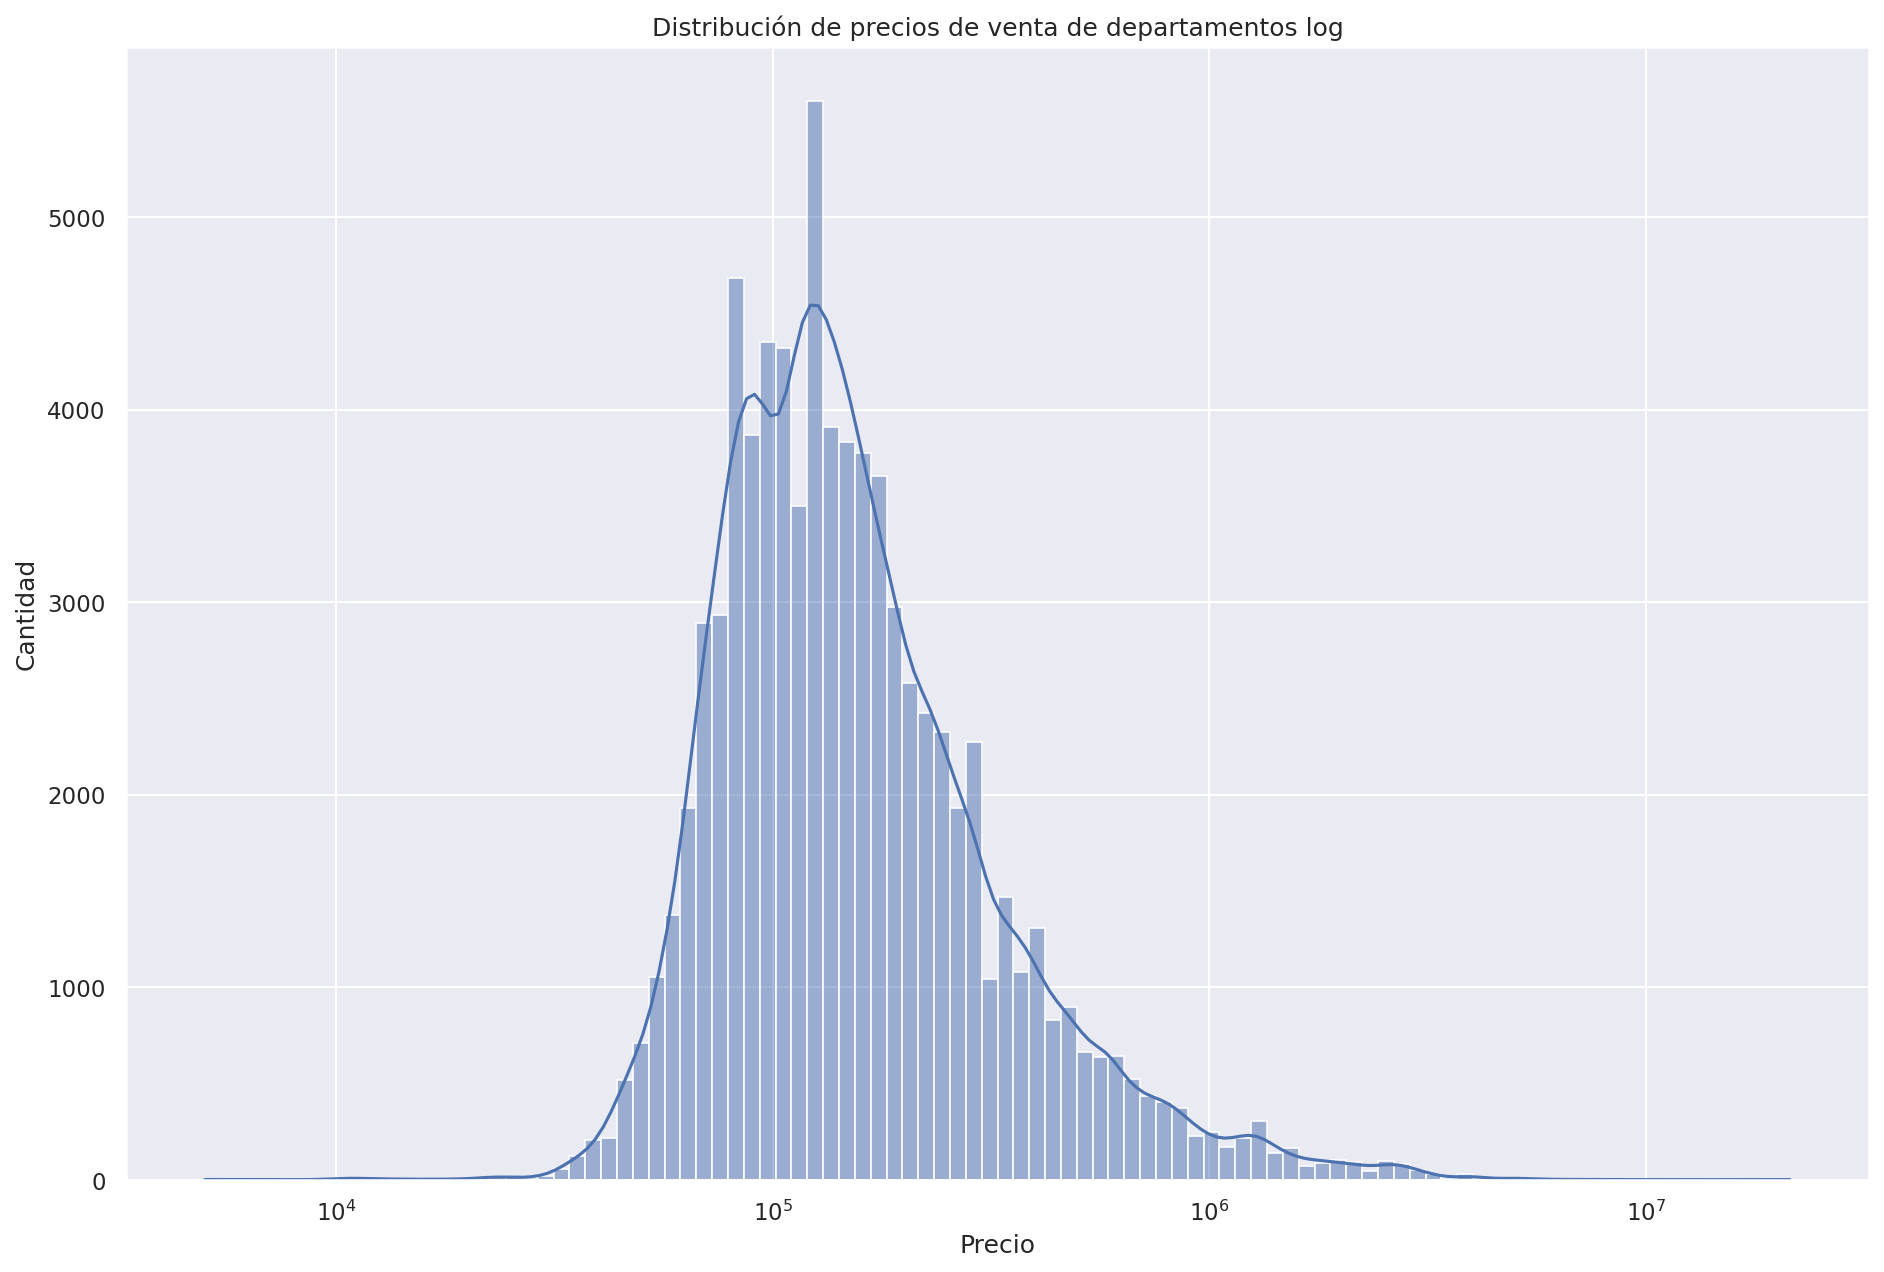

In [105]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
h_depto2 = sns.histplot(df_depto['property_price'], bins=100, kde=True, log_scale=True)
h_depto2 = h_depto2.set(title='Distribución de precios de venta de departamentos log', xlabel='Precio', ylabel='Cantidad')

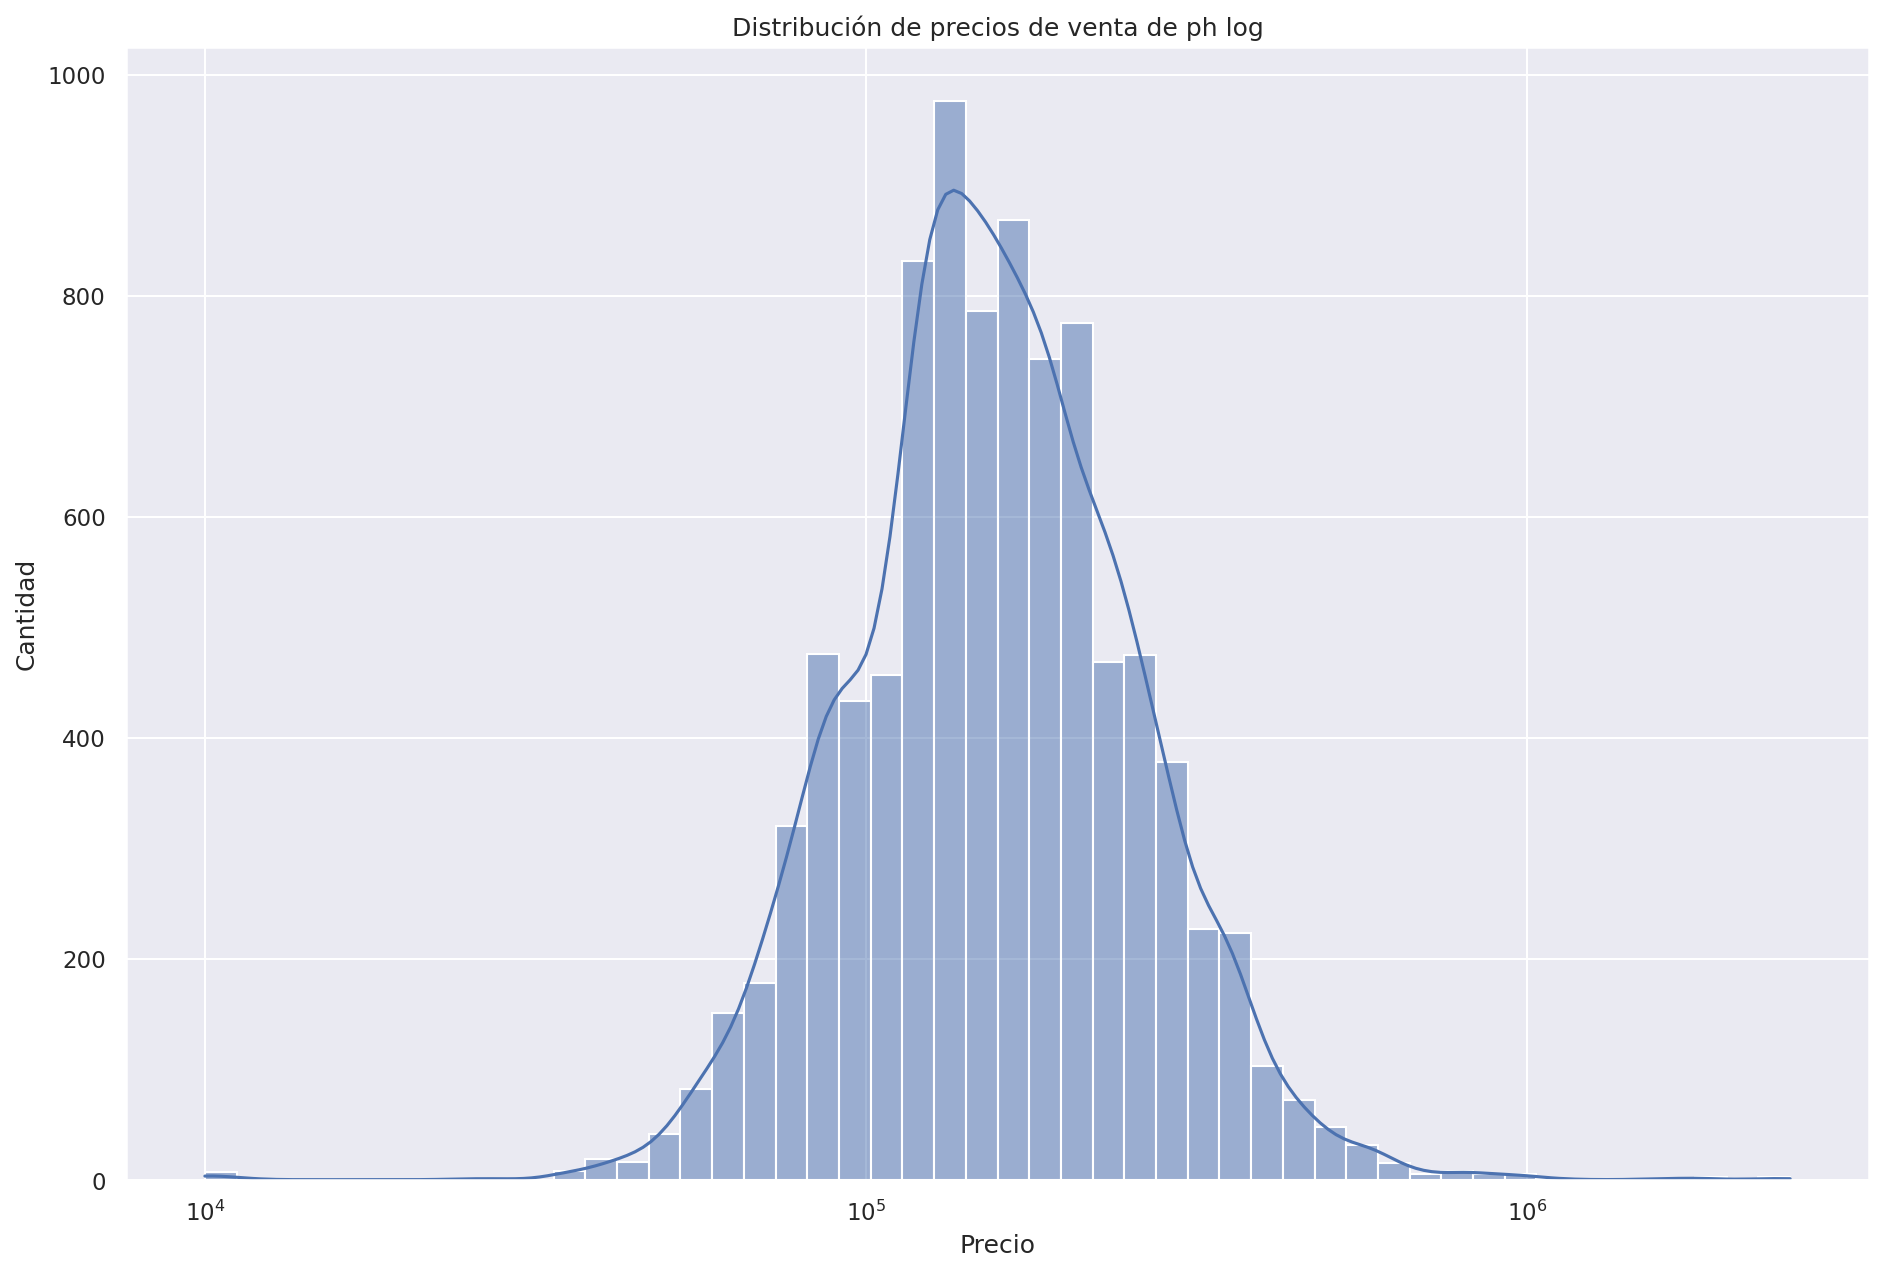

In [106]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
h_ph2 = sns.histplot(df_ph['property_price'], bins=50, kde=True, log_scale=True)
h_ph2 = h_ph2.set(title='Distribución de precios de venta de ph log', xlabel='Precio', ylabel='Cantidad')

#### Santiago:

#### Feature: property_rooms

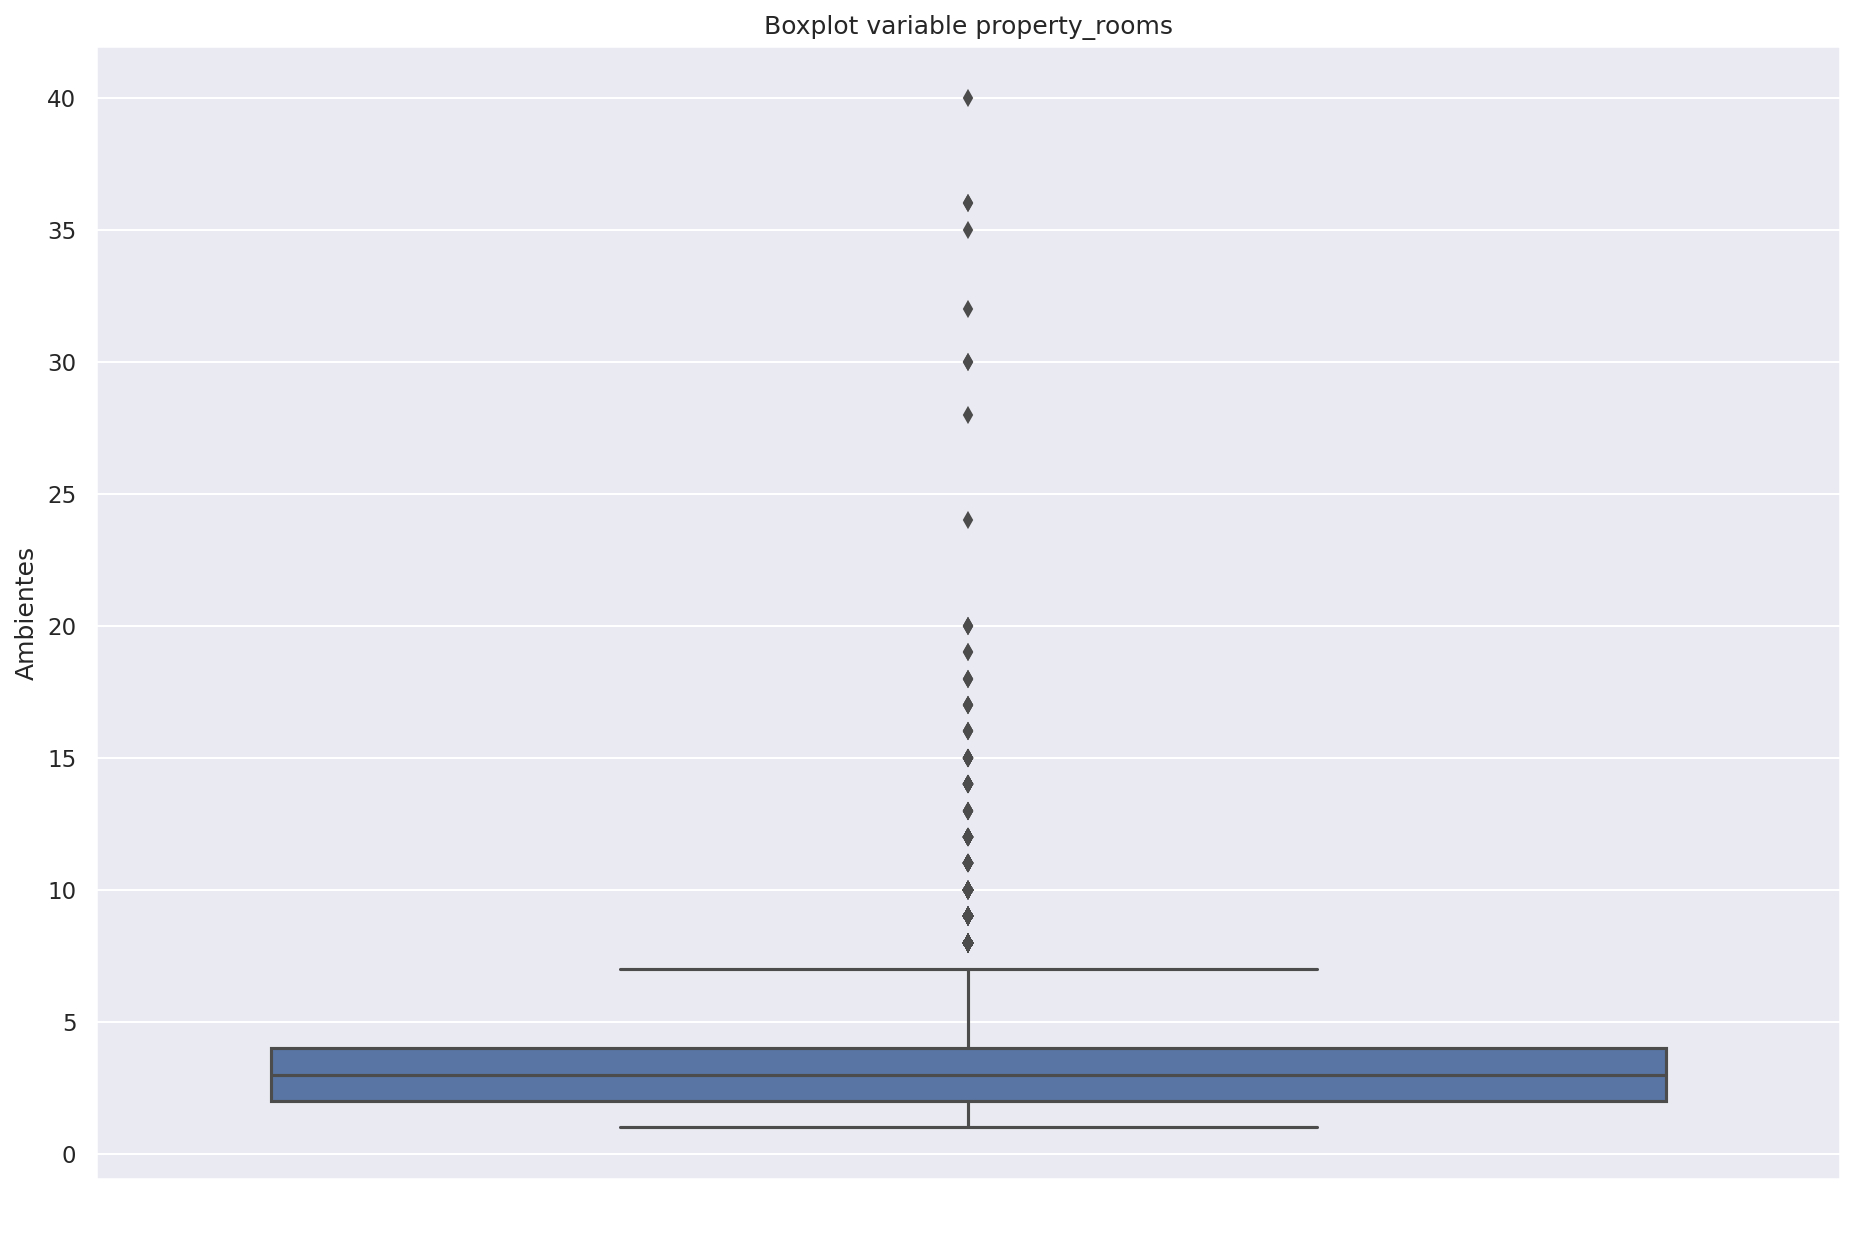

In [107]:
# Boxplot de la variable ambientes
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_rooms", data=df).set(title="Boxplot variable property_rooms",xlabel=" ",ylabel="Ambientes")

Podemos observar multiples outliers, muchos de ellos extremos

In [108]:
outlier_rooms=df[df.property_rooms > 25]
outlier_rooms

latitud   longitud         place_l2           place_l3 place_l4  \
4264  -34.616391 -58.456038  Capital Federal          Caballito      NaN   
10581 -34.649872 -58.483012  Capital Federal  Parque Avellaneda      NaN   
18731 -34.633236 -58.480313  Capital Federal           Floresta      NaN   
30824        NaN        NaN  Capital Federal         Tribunales      NaN   
30826        NaN        NaN  Capital Federal         Tribunales      NaN   
31528 -34.642037 -58.438995  Capital Federal   Parque Chacabuco      NaN   
72247 -34.588742 -58.422459  Capital Federal            Palermo      NaN   
78706 -34.570959 -58.458106  Capital Federal           Belgrano      NaN   

      place_l5 operation property_type  property_rooms  property_bedrooms  \
4264       NaN     Venta  Departamento            30.0                2.0   
10581      NaN     Venta            PH            30.0                2.0   
18731      NaN     Venta            PH            32.0               32.0   
30824      NaN     Venta  Departamento            36.0               18.0   
30826      NaN     Venta  Departamento            36.0               18.0   
31528      NaN     Venta  Departamento            35.0                NaN   
72247      NaN     Venta  Departamento            40.0                3.0   
78706      NaN     Venta          Casa            28.0               16.0   

       property_surface_total  property_surface_covered  property_price  \
4264                     79.0                      79.0        230000.0   
10581                    72.0                      60.0        123500.0   
18731                   535.0                     435.0        300000.0   
30824                  1348.0                       NaN       1700000.0   
30826                  1348.0                       NaN       1700000.0   
31528                    37.0                      33.0         67000.0   
72247                    75.0                      68.0        145000.0   
78706                   845.0                     845.0        950000.0   

      property_currency                                     property_title  \
4264                USD    C/DEP COCH Y BAULERA - SEGUI AL 700 - Caballito   
10581               USD                             PH - Parque Avellaneda   
18731               USD                   Hotel Familiar,  32 Habitaciones   
30824               USD                          Departamento - Tribunales   
30826               USD                          Departamento - Tribunales   
31528               USD  Venta Departamento monoambiente balcón full am...   
72247               USD  SOLER 4400 - PALERMO - DPTO 4 AMB C/ BALCON AL...   
78706               USD  Imponente casa inglesa de 3 plantas   S.S. en ...   

       start_date_month  end_date_month  end_date_year  created_on_month  
4264                  3               6           2021                 3  
10581                 2               6           2021                 2  
18731                 8              12           2023                 8  
30824                 8              12           2023                 8  
30826                 8              12           2023                 8  
31528                 3               6           2021                 3  
72247                11              12           2021                11  
78706                 5               6           2021                 5

Vemos que salvo el hotel y la casa inglesa, los demas no son posibles

In [109]:
# Seleccionamos todos menos el hotel y la casa inglesa
idx=outlier_rooms[outlier_rooms.property_title.apply(lambda x: not ('Hotel' in x or 'inglesa' in x))].index
# Y los eliminamos
df.drop(idx, inplace=True)

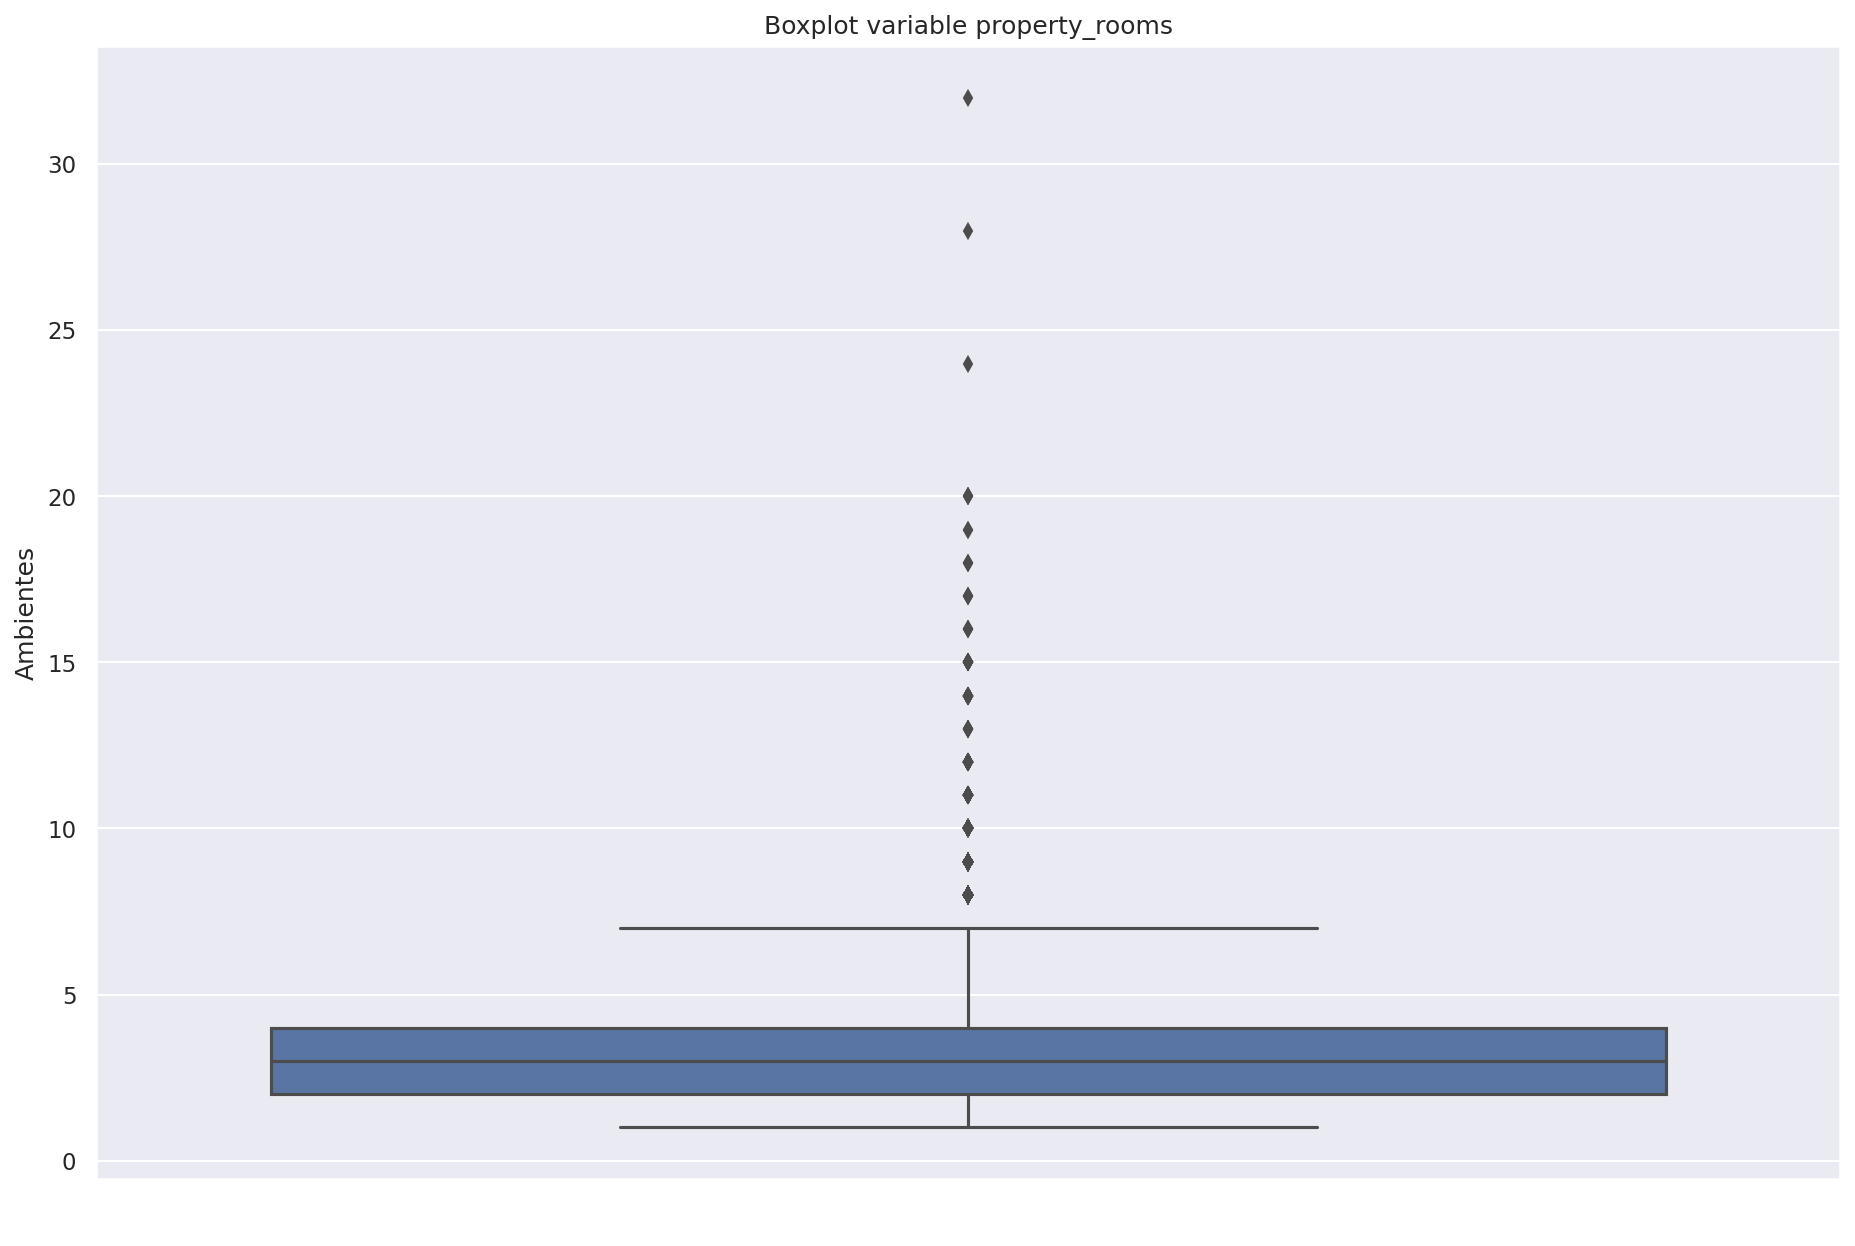

In [110]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_rooms", data=df).set(title="Boxplot variable property_rooms",xlabel=" ",ylabel="Ambientes")

#### Feature: property_bedrooms

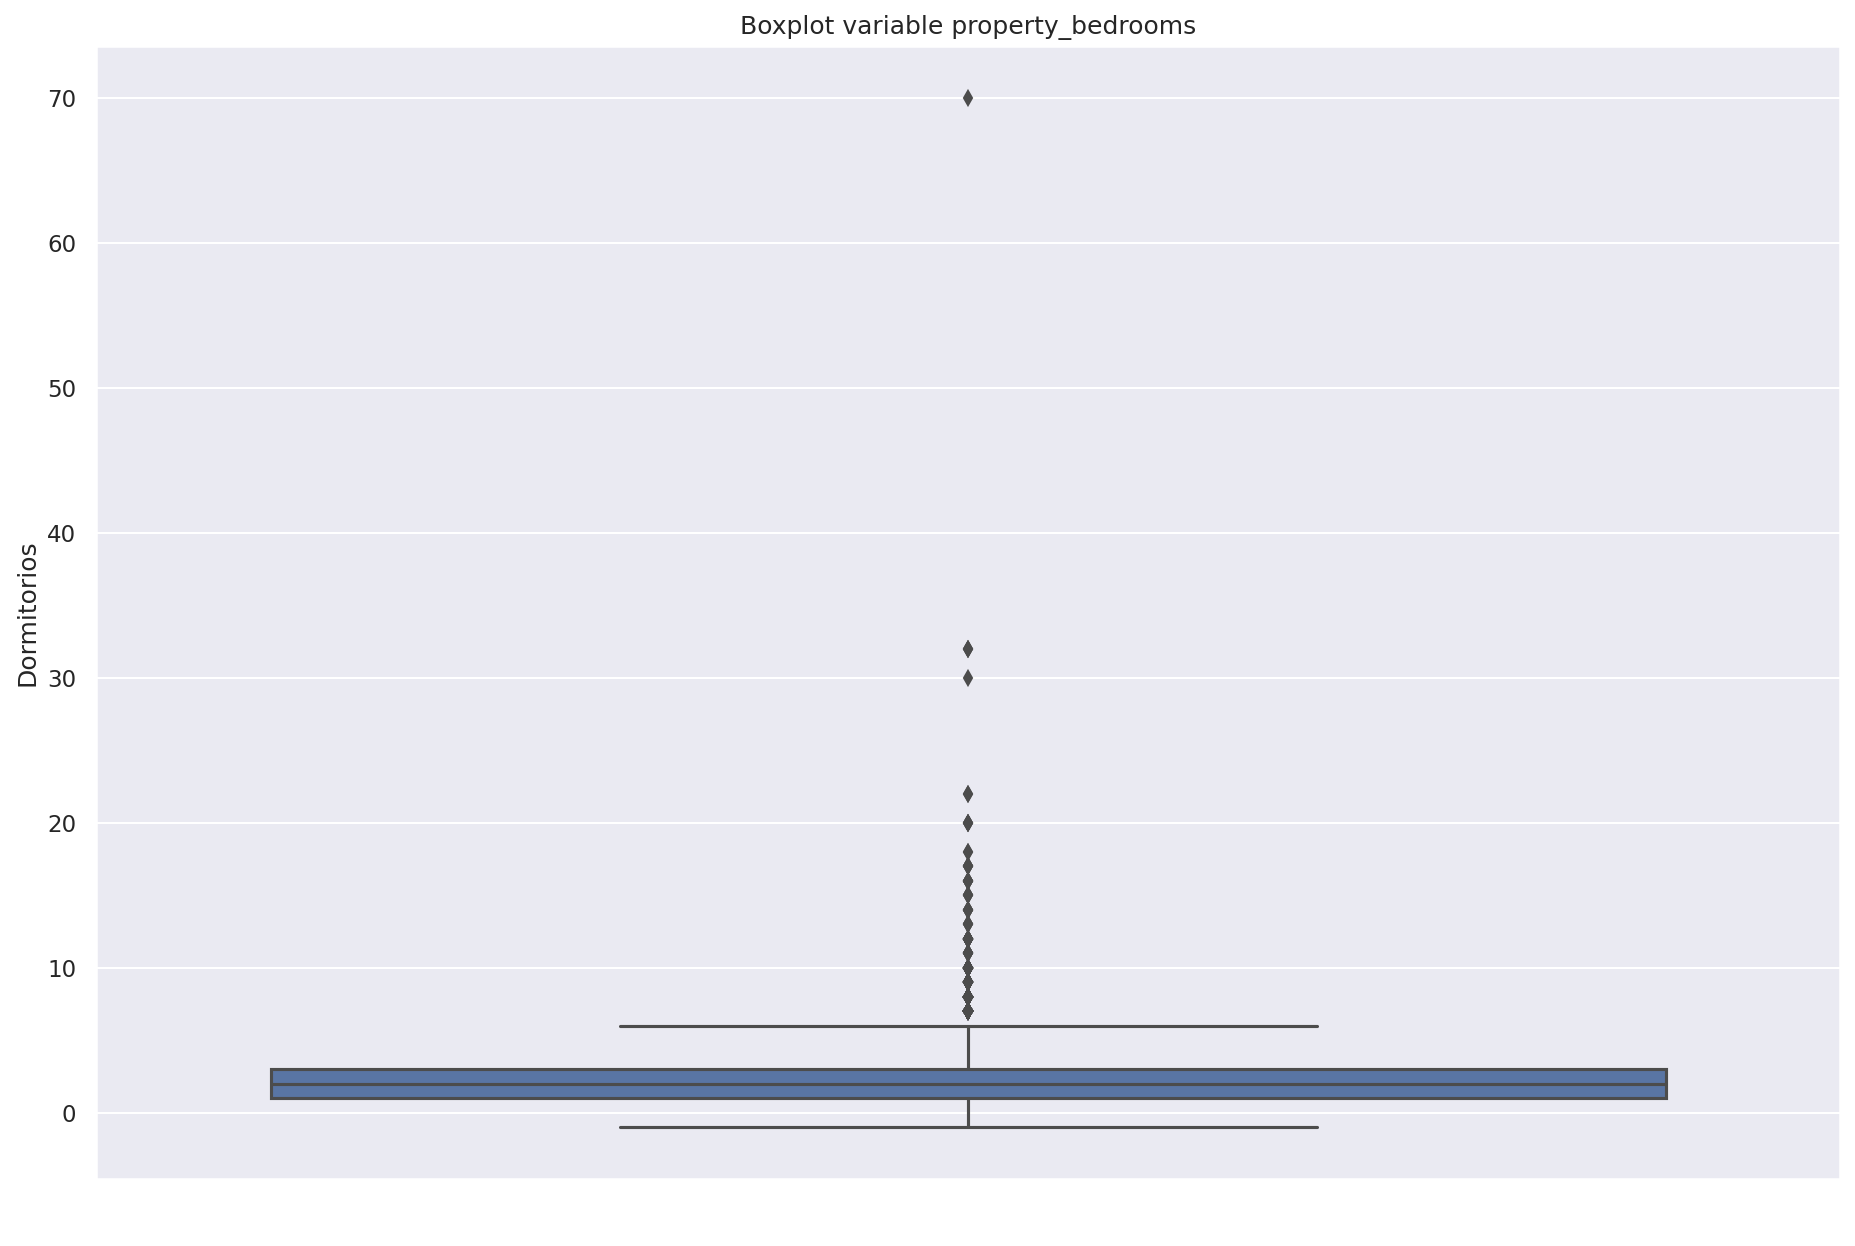

In [111]:
# Boxplot de la variable dormitorios
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_bedrooms", data=df).set(title="Boxplot variable property_bedrooms",xlabel=" ",ylabel="Dormitorios")

Nuevamente vemos multiples outliers, algunos de ellos extremos

In [112]:
outlier_bedrooms=df[df.property_bedrooms > 25]
outlier_bedrooms

latitud   longitud         place_l2          place_l3 place_l4  \
9819  -34.608645 -58.485619  Capital Federal  Villa del Parque      NaN   
10140 -34.630186 -58.389156  Capital Federal  Parque Patricios      NaN   
17940 -34.591110 -58.400685  Capital Federal          Recoleta      NaN   
18731 -34.633236 -58.480313  Capital Federal          Floresta      NaN   
19830 -34.646632 -58.497902  Capital Federal        Villa Luro      NaN   

      place_l5 operation property_type  property_rooms  property_bedrooms  \
9819       NaN     Venta  Departamento             4.0               32.0   
10140      NaN     Venta  Departamento             1.0               32.0   
17940      NaN     Venta  Departamento             4.0               30.0   
18731      NaN     Venta            PH            32.0               32.0   
19830      NaN     Venta  Departamento             3.0               70.0   

       property_surface_total  property_surface_covered  property_price  \
9819                     83.0                      75.0        189000.0   
10140                    32.0                      32.0         52000.0   
17940                   148.0                     138.0        380000.0   
18731                   535.0                     435.0        300000.0   
19830                     NaN                      70.0        135000.0   

      property_currency                                     property_title  \
9819                USD  Departamento 4 ambientes a estrenar en duplex ...   
10140               USD           Depto 1 ambiente amplio apto profesional   
17940               USD  Departamento. Recoleta. Balcón terraza. Silenc...   
18731               USD                   Hotel Familiar,  32 Habitaciones   
19830               USD                          Departamento - Villa Luro   

       start_date_month  end_date_month  end_date_year  created_on_month  
9819                  3               6           2021                 3  
10140                10              12           2021                10  
17940                 3               6           2021                 3  
18731                 8              12           2023                 8  
19830                 9               1           2022                 9

Vemos que salvo el hotel, el resto de datos no son posibles

In [113]:
# Seleccionamos todos menos el hotel
idx=outlier_bedrooms[outlier_bedrooms.property_title.apply(lambda x: 'Hotel' not in x)].index
# Y los eliminamos
df.drop(idx, inplace=True)

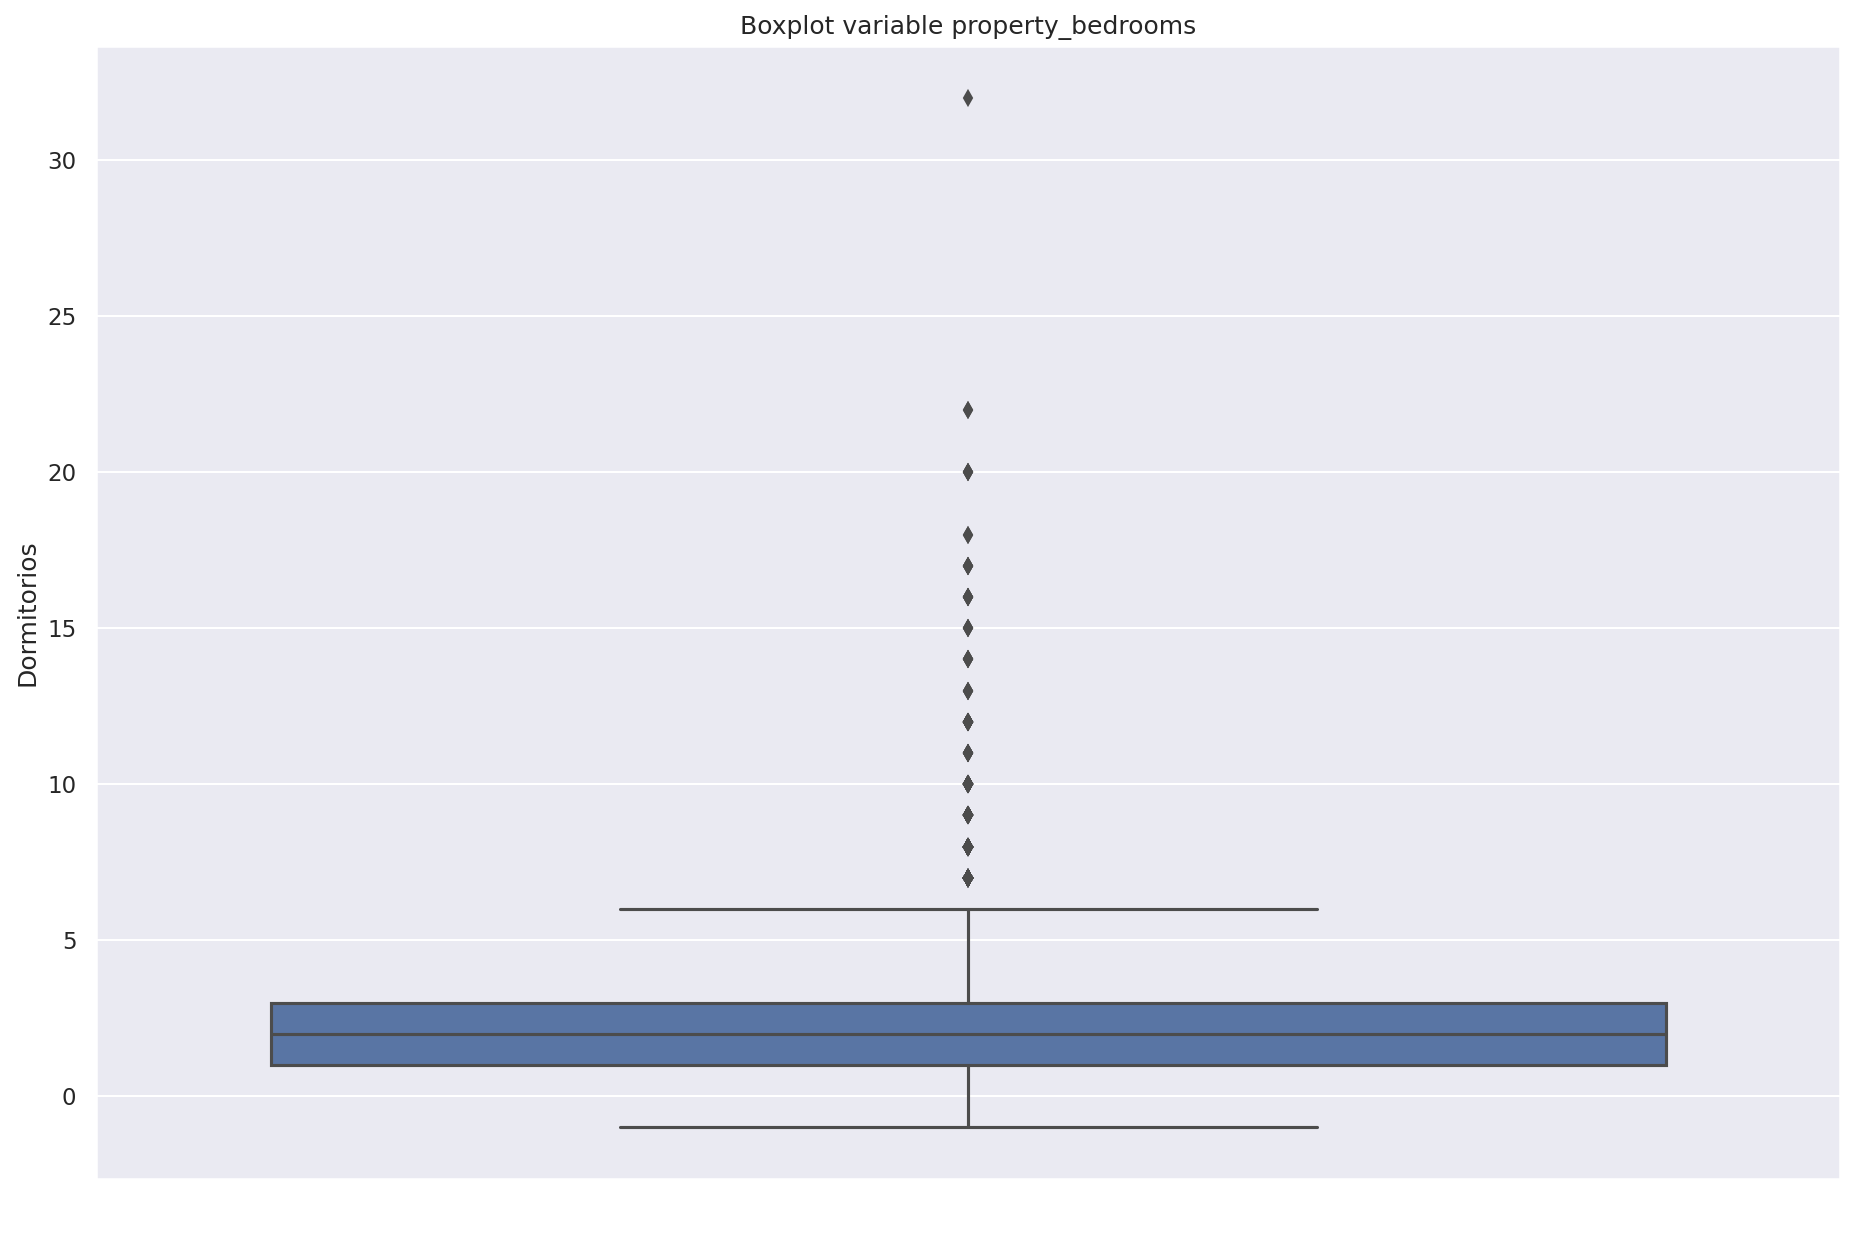

In [114]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_bedrooms", data=df).set(title="Boxplot variable property_bedrooms",xlabel=" ",ylabel="Dormitorios")

#### Feature: property_surface_total

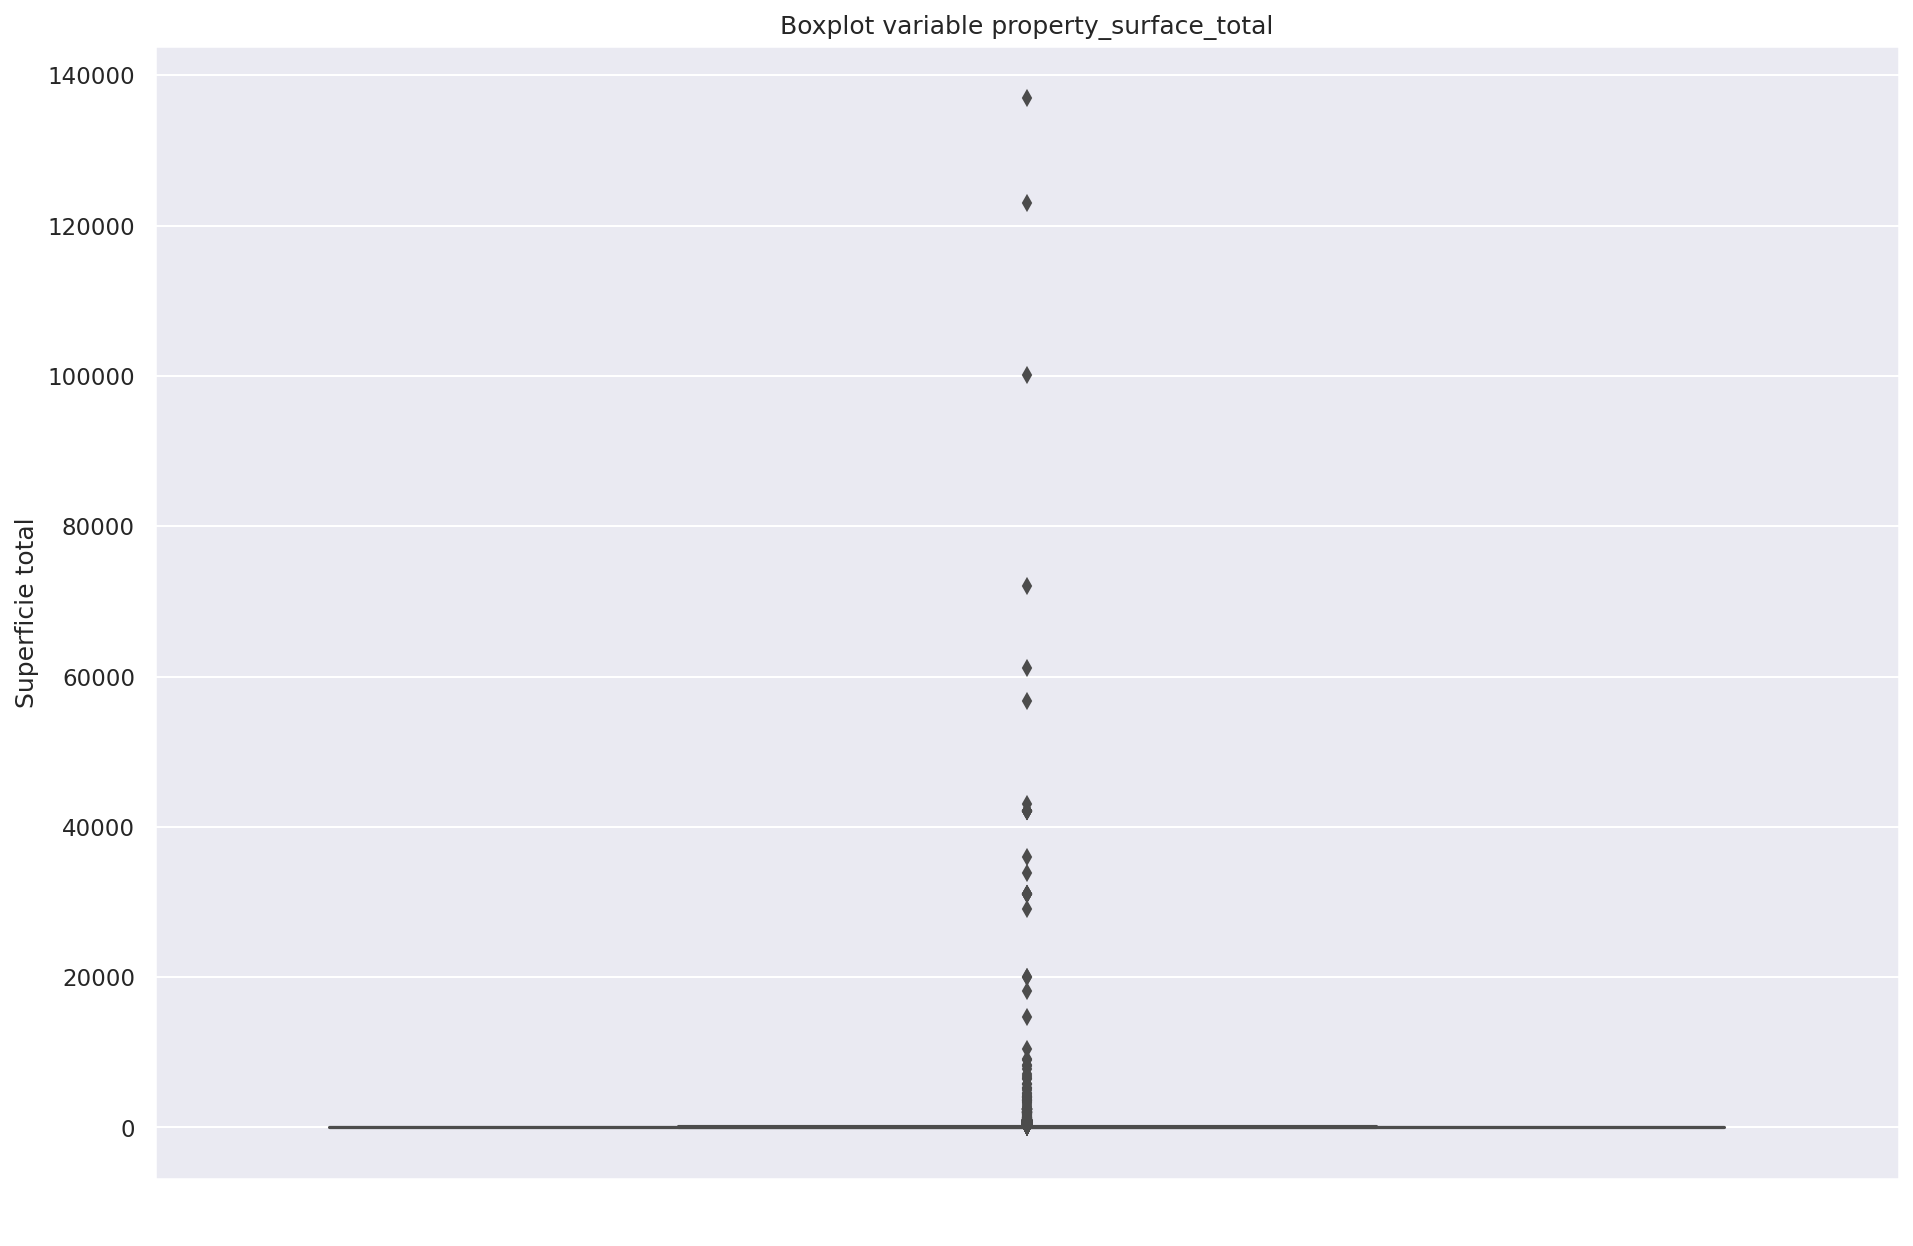

In [115]:
# Boxplot de la variable superficie total
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

Se observa una gran cantidad de outliers y muy extremos

In [116]:
# Buscamos observaciones mayores a 10mil m2
outlier_sfc_total=df[df.property_surface_total > 10000]
# Verificamos si son valores posibles
outlier_sfc_total.head()

latitud   longitud         place_l2      place_l3 place_l4 place_l5  \
201   -34.605781 -58.376705  Capital Federal   San Nicolás      NaN      NaN   
15080 -34.578917 -58.429373  Capital Federal       Palermo      NaN      NaN   
15148 -34.600113 -58.403649  Capital Federal     Balvanera      NaN      NaN   
17521 -34.588175 -58.396261  Capital Federal      Recoleta      NaN      NaN   
22043 -34.587320 -58.401556  Capital Federal  Barrio Norte      NaN      NaN   

      operation property_type  property_rooms  property_bedrooms  \
201       Venta  Departamento             NaN                NaN   
15080     Venta  Departamento             2.0                1.0   
15148     Venta  Departamento             2.0                1.0   
17521     Venta  Departamento             1.0                NaN   
22043     Venta  Departamento             2.0                1.0   

       property_surface_total  property_surface_covered  property_price  \
201                   10500.0                   10500.0       9900000.0   
15080                 61130.0                   53030.0        225000.0   
15148                 33800.0                   31670.0         66000.0   
17521                 36000.0                      30.0         90000.0   
22043                 56740.0                   52540.0        175000.0   

      property_currency                                     property_title  \
201                 USD  EDIFICIO A TERMINAR DE 900M2- EXCELENTE UBICAC...   
15080               USD  VENTA DEPARTAMENTO 2 AMBIENTES PALERMO C/AMENI...   
15148               USD                        VENTA 2 AMBIENTES CON RENTA   
17521               USD  Departamento Monoambiente alquiler temporario ...   
22043               USD  EXCELENTE DEPARTAMENTO DE 2 AMBIENTES DE CATEG...   

       start_date_month  end_date_month  end_date_year  created_on_month  
201                   9               1           2022                 9  
15080                 5               6           2021                 5  
15148                 5               6           2021                 5  
17521                 2               5           2021                 2  
22043                 3               4           2021                 3

In [117]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_total.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

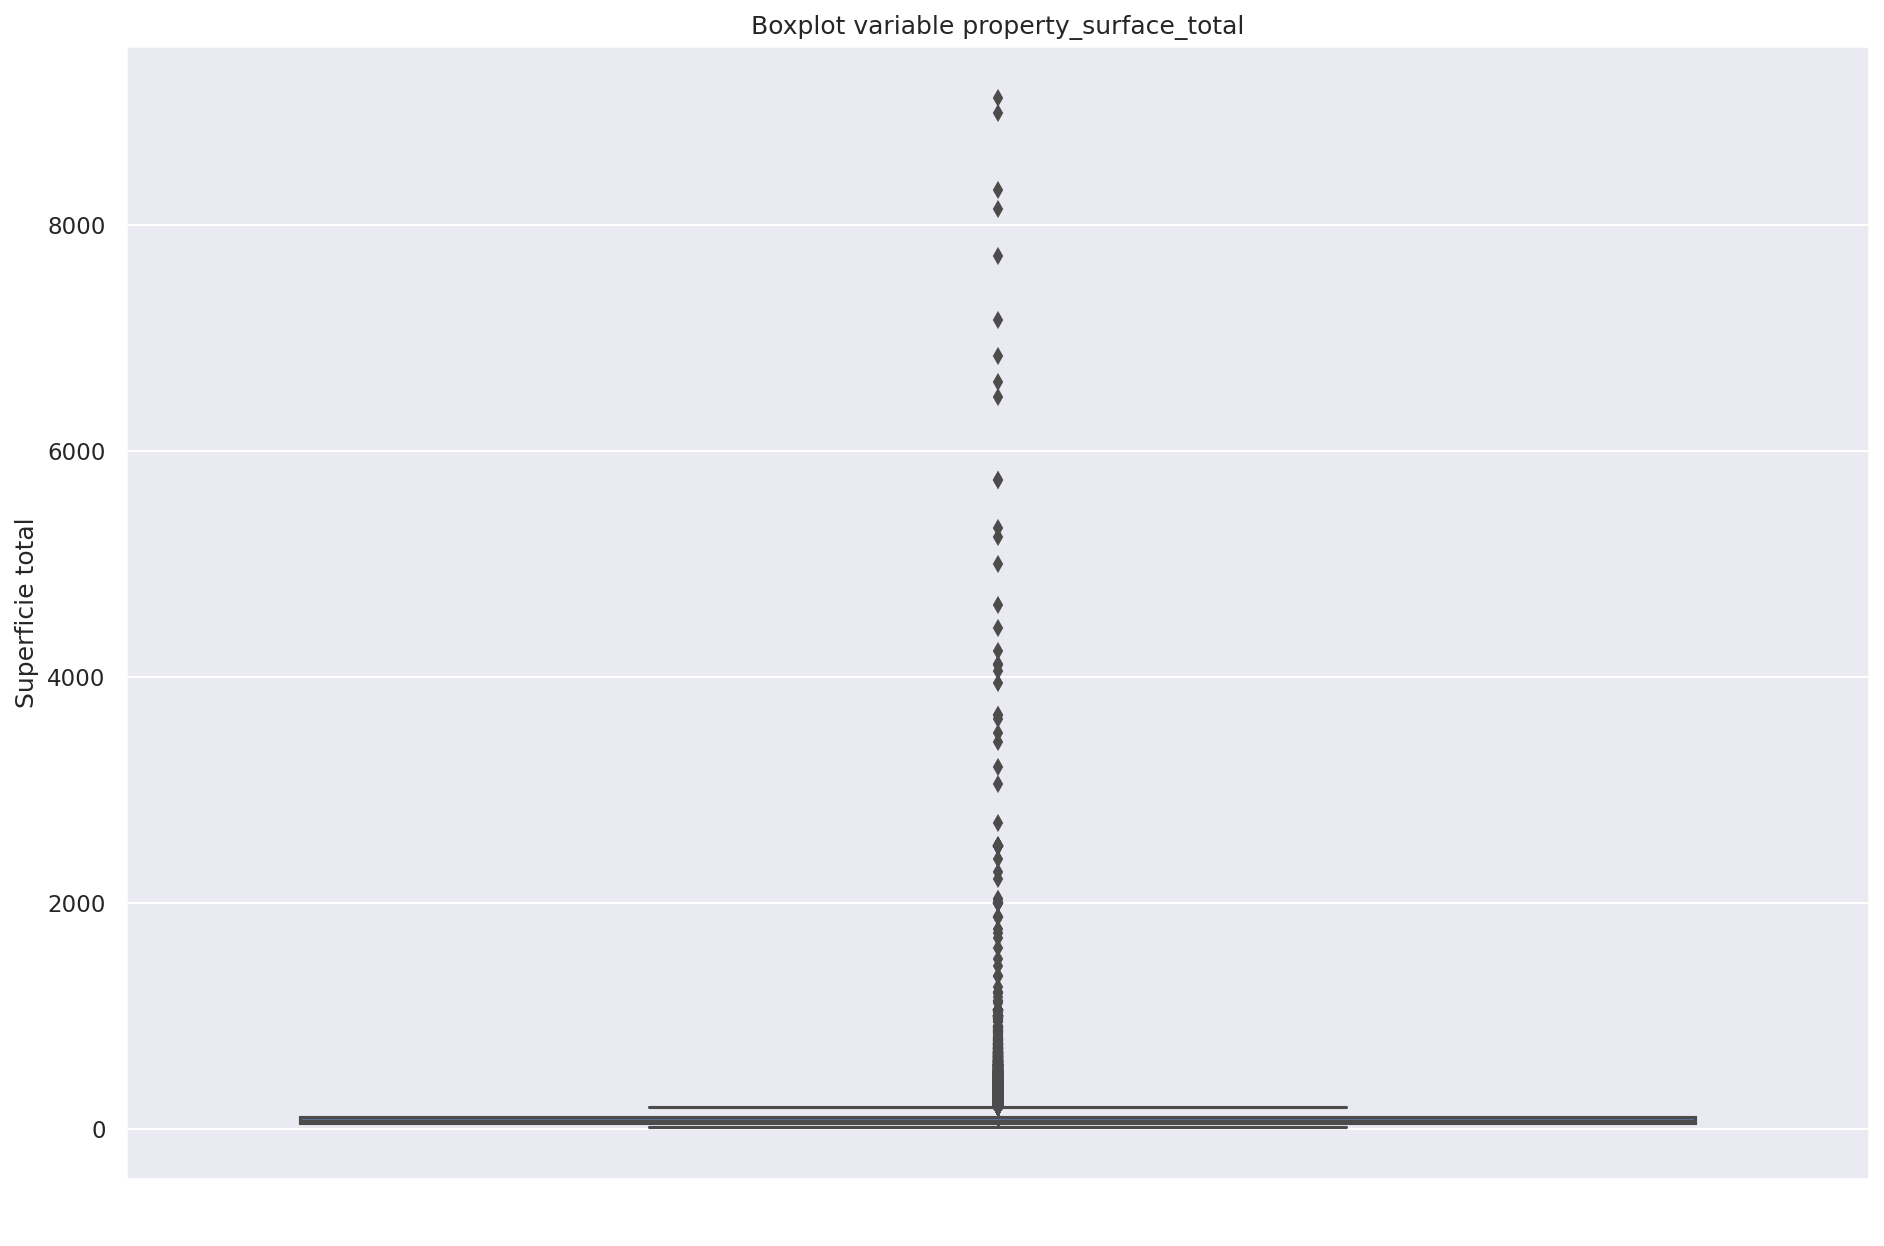

In [118]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

In [119]:
# Buscamos observaciones mayores a mil m2 pero menos de 5 ambientes y que no sean casas
outlier_sfc_rooms=df[df.apply(lambda x: x['property_surface_total'] > 1000 and x['property_rooms'] < 5 and x['property_type'] != 'Casa', axis=1)]
# Verificamos si son valores posibles
outlier_sfc_rooms

latitud   longitud         place_l2          place_l3 place_l4  \
364   -34.584521 -58.424260  Capital Federal           Palermo      NaN   
6728  -34.634196 -58.465152  Capital Federal            Flores      NaN   
6941  -34.554356 -58.458076  Capital Federal          Belgrano      NaN   
6950  -34.557903 -58.452293  Capital Federal          Belgrano      NaN   
7038  -34.611660 -58.393440  Capital Federal         Balvanera      NaN   
7085  -34.628565 -58.445791  Capital Federal         Caballito      NaN   
7274  -34.573000 -58.481100  Capital Federal     Villa Urquiza      NaN   
7276  -34.573375 -58.480012  Capital Federal     Villa Urquiza      NaN   
12199 -34.563005 -58.453674  Capital Federal          Belgrano      NaN   
12205 -34.563005 -58.453674  Capital Federal          Belgrano      NaN   
19795 -34.614279 -58.361092  Capital Federal         Caballito      NaN   
21589 -34.603992 -58.500042  Capital Federal  Villa del Parque      NaN   
24739 -34.627828 -58.490255  Capital Federal      Villa Devoto      NaN   
24905 -34.637304 -58.357534  Capital Federal              Boca      NaN   
31291 -34.629203 -58.437124  Capital Federal         Caballito      NaN   
31768 -34.611826 -58.516024  Capital Federal      Villa Devoto      NaN   
32852 -34.563371 -58.455471  Capital Federal          Belgrano      NaN   
38851 -34.606771 -58.502277  Capital Federal  Villa del Parque      NaN   
40180 -34.554356 -58.458076  Capital Federal          Belgrano      NaN   
47597 -34.563005 -58.453674  Capital Federal          Belgrano      NaN   
47827 -34.606260 -58.452737  Capital Federal      Villa Crespo      NaN   
47832 -34.611826 -58.516024  Capital Federal      Villa Devoto      NaN   
48816 -34.622357 -58.435193  Capital Federal         Caballito      NaN   
53799 -34.576096 -58.441278  Capital Federal           Palermo      NaN   
55728 -34.573000 -58.481100  Capital Federal     Villa Urquiza      NaN   
59739 -34.603310 -58.419520  Capital Federal           Almagro      NaN   
63697 -34.609829 -58.385083  Capital Federal         Monserrat      NaN   
64161 -34.617067 -58.513585  Capital Federal      Villa Devoto      NaN   
64250 -34.554356 -58.458076  Capital Federal          Belgrano      NaN   
64253 -34.554356 -58.458076  Capital Federal          Belgrano      NaN   
64254 -34.554356 -58.458076  Capital Federal          Belgrano      NaN   
64256 -34.555086 -58.459669  Capital Federal          Belgrano      NaN   
64319 -34.611826 -58.516024  Capital Federal      Villa Devoto      NaN   
65450 -34.554356 -58.458076  Capital Federal          Belgrano      NaN   
66151 -34.573775 -58.488545  Capital Federal     Villa Urquiza      NaN   
68522 -34.604284 -58.387255  Capital Federal         Monserrat      NaN   
68767 -34.563005 -58.453674  Capital Federal          Belgrano      NaN   
68930 -34.611826 -58.516024  Capital Federal      Villa Devoto      NaN   
77162 -34.554356 -58.458076  Capital Federal          Belgrano      NaN   
80466 -34.558309 -58.459923  Capital Federal          Belgrano      NaN   
80780 -34.624845 -58.431635  Capital Federal         Caballito      NaN   
80848 -34.624845 -58.431635  Capital Federal         Caballito      NaN   
80849 -34.624845 -58.431635  Capital Federal         Caballito      NaN   
80907 -34.624845 -58.431635  Capital Federal         Caballito      NaN   
81294 -34.613757 -58.523484  Capital Federal      Villa Devoto      NaN   
81506 -34.599306 -58.482676  Capital Federal  Villa del Parque      NaN   
82596 -34.634638 -58.473519  Capital Federal          Floresta      NaN   
82754 -34.563005 -58.453674  Capital Federal          Belgrano      NaN   
82778 -34.563005 -58.453674  Capital Federal          Belgrano      NaN   
82786 -34.563005 -58.453674  Capital Federal          Belgrano      NaN   
82889 -34.611826 -58.516024  Capital Federal      Villa Devoto      NaN   
82890 -34.613757 -58.523484  Capital Federal      Villa Devoto      NaN   
82893 -34.611826 -58.516024  Capit

In [120]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_rooms.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

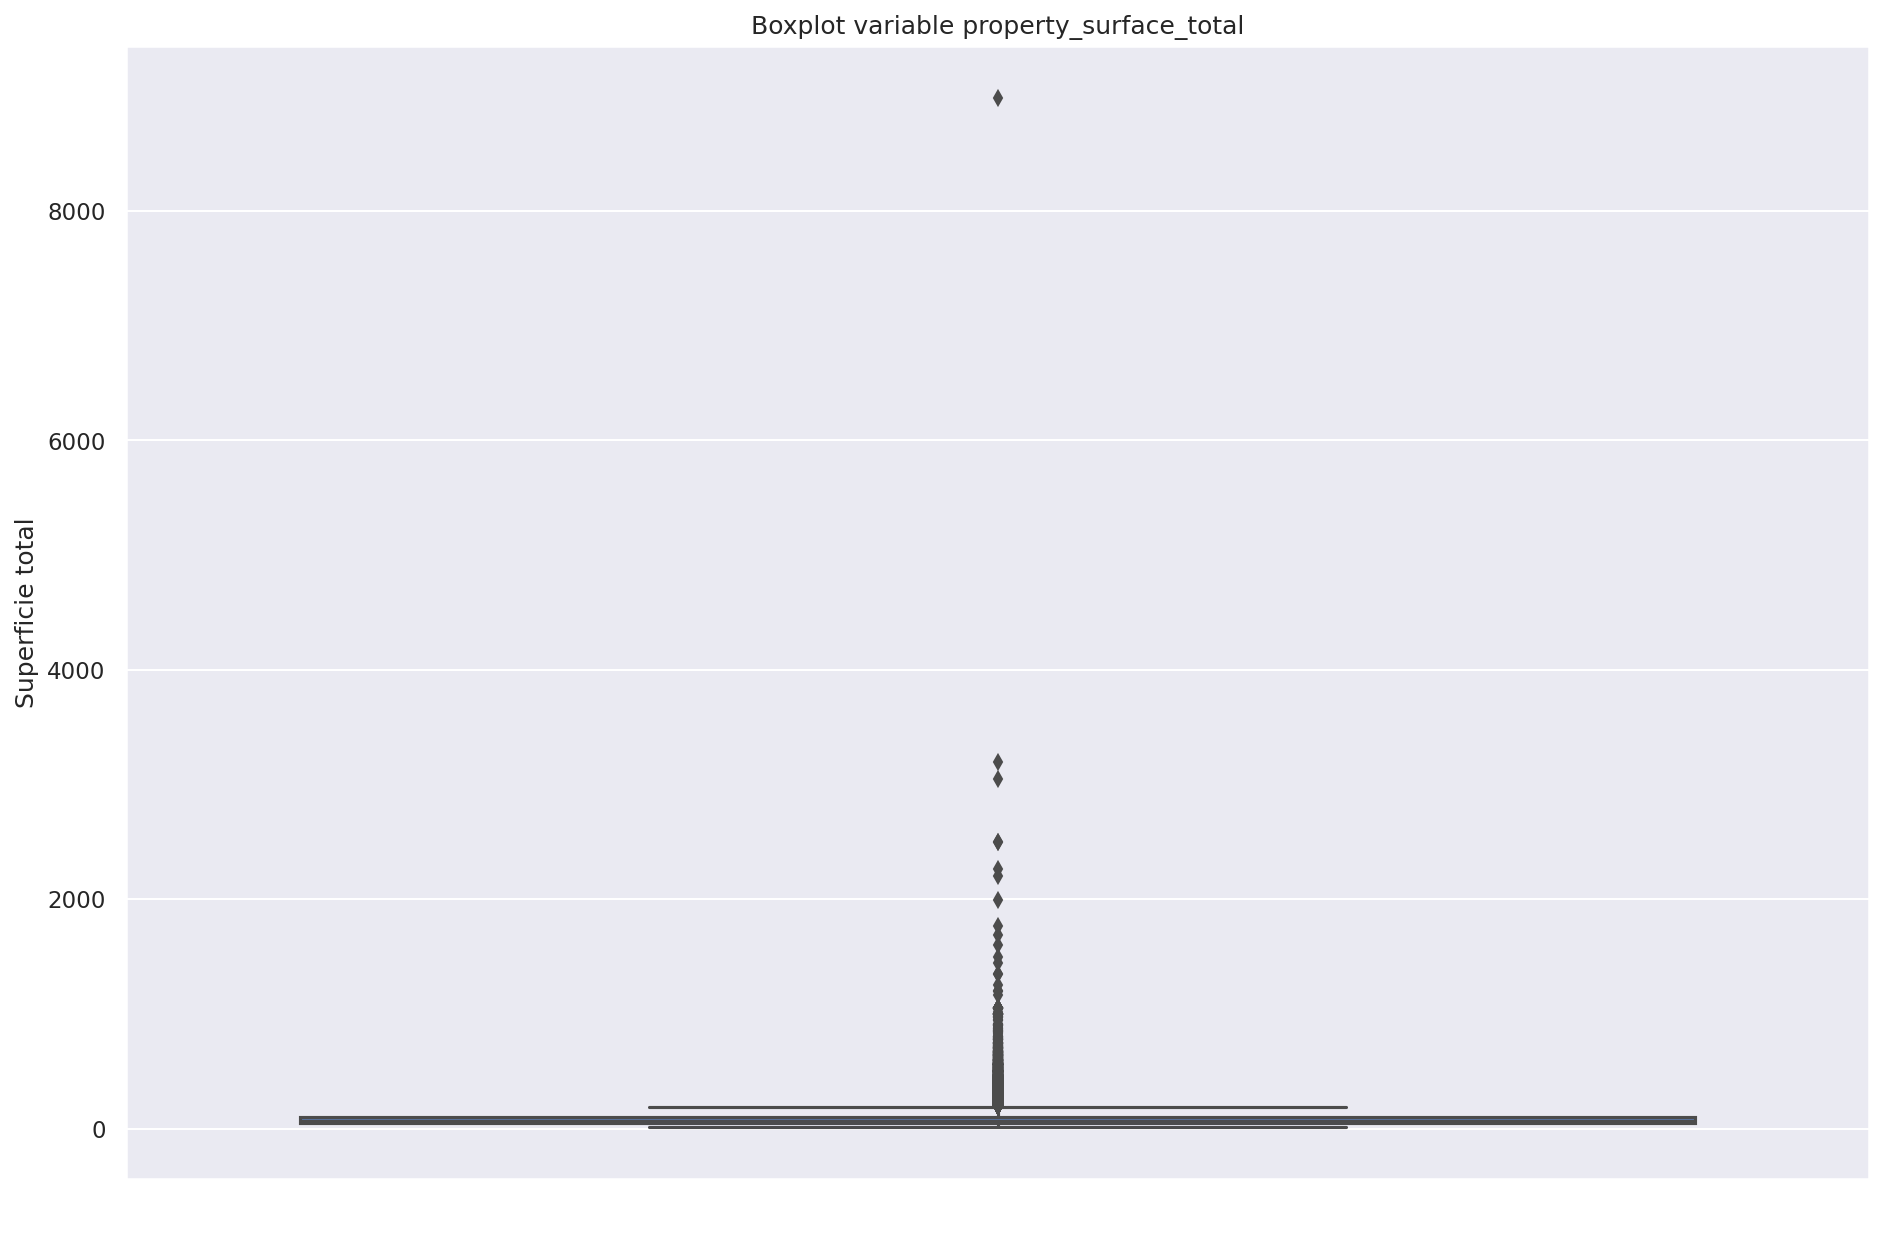

In [121]:
# Volvemos a graficar un boxplot una ultima vez luego de eliminar mas propiedades
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_surface_total", data=df).set(title="Boxplot variable property_surface_total",xlabel=" ",ylabel="Superficie total")

#### Feature: property_surface_covered

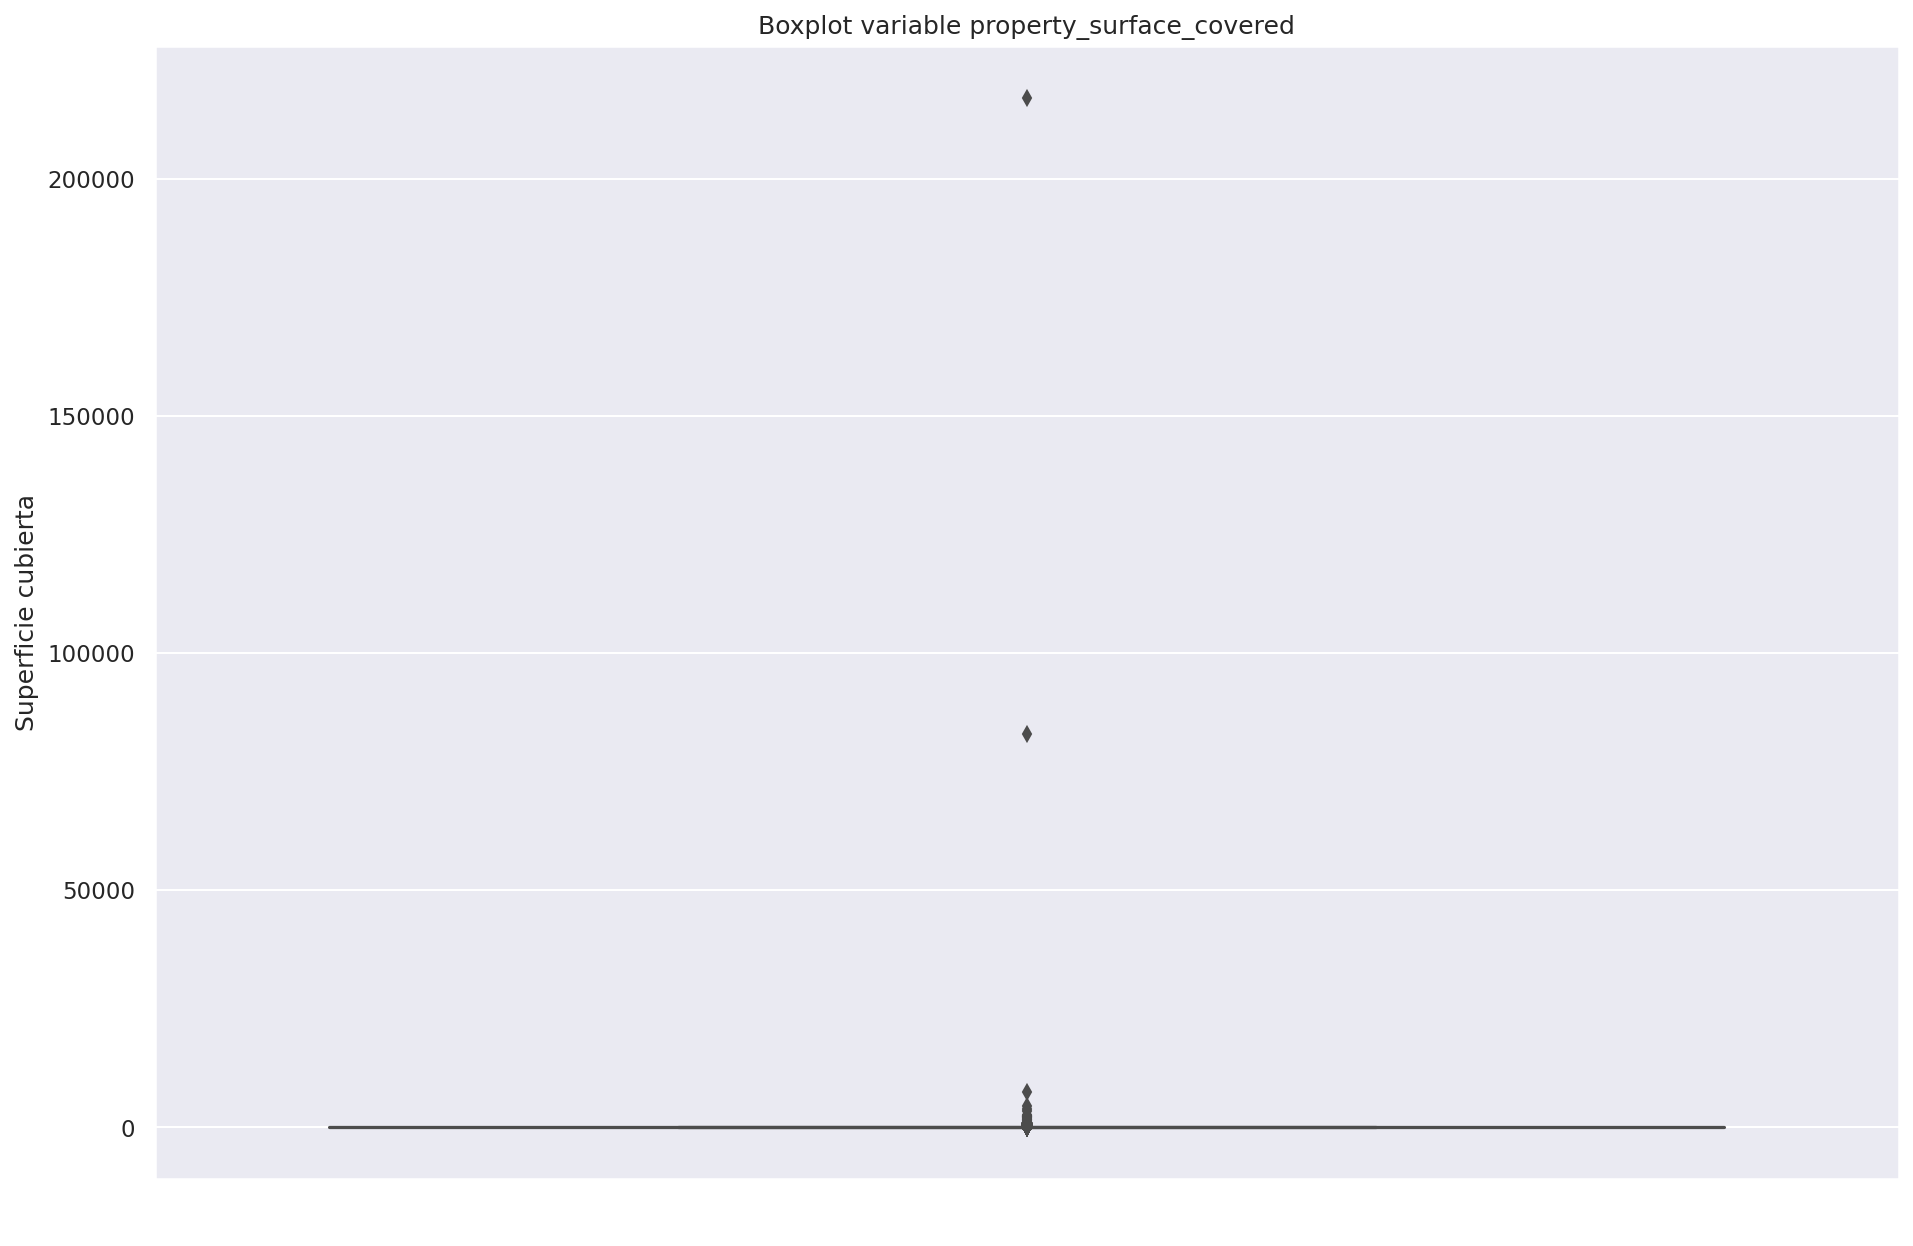

In [122]:
# Boxplot de la variable superficie cubierta
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

In [123]:
# Buscamos observaciones mayores a 3mil m2
outlier_sfc_cov=df[df.property_surface_covered > 3000]
outlier_sfc_cov

latitud   longitud         place_l2          place_l3 place_l4  \
311   -34.637026 -58.426283  Capital Federal  Parque Chacabuco      NaN   
6211         NaN        NaN  Capital Federal         San Telmo      NaN   
17850 -34.572494 -58.462433  Capital Federal          Belgrano      NaN   
41142 -34.604362 -58.392366  Capital Federal      Barrio Norte      NaN   
64154 -34.649174 -58.413106  Capital Federal           Pompeya      NaN   
71866 -34.579394 -58.453519  Capital Federal        Colegiales      NaN   

      place_l5 operation property_type  property_rooms  property_bedrooms  \
311        NaN     Venta          Casa             NaN                NaN   
6211       NaN     Venta  Departamento             2.0                1.0   
17850      NaN     Venta          Casa             5.0                4.0   
41142      NaN     Venta  Departamento             4.0                NaN   
64154      NaN     Venta            PH             6.0                2.0   
71866      NaN     Venta  Departamento             3.0                2.0   

       property_surface_total  property_surface_covered  property_price  \
311                       NaN                  217000.0        250000.0   
6211                     48.0                    4435.0         93500.0   
17850                  3197.0                    3367.0      12000000.0   
41142                    83.0                   83000.0        155000.0   
64154                  8988.0                    7454.0        125000.0   
71866                    41.0                    3837.0         83000.0   

      property_currency                                    property_title  \
311                 USD  EXCEPCIONAL CASA DOS FAMILIAS - Parque Chacabuco   
6211                USD            Dptos 2 amb a estrenar en San Telmo!!!   
17850               USD                                 Casa - Belgrano R   
41142               USD               AMPLIO DEPTO  EN VENTA BARRIO NORTE   
64154               USD                      PH en venta en Nueva Pompeya   
71866               USD                         Departamento - Colegiales   

       start_date_month  end_date_month  end_date_year  created_on_month  
311                  12              12           2023                12  
6211                 10               1           2022                10  
17850                 3               6           2021                 3  
41142                 7              12           2023                 7  
64154                 1               1           2021                 1  
71866                11               1           2022                11

In [124]:
# Vemos que hay valores que posiblemente tengan ceros de mas
idx=outlier_sfc_cov.index
# Y procedemos a borrarlos, mas adelante se podria intentar salvarlos
df.drop(idx, inplace=True)

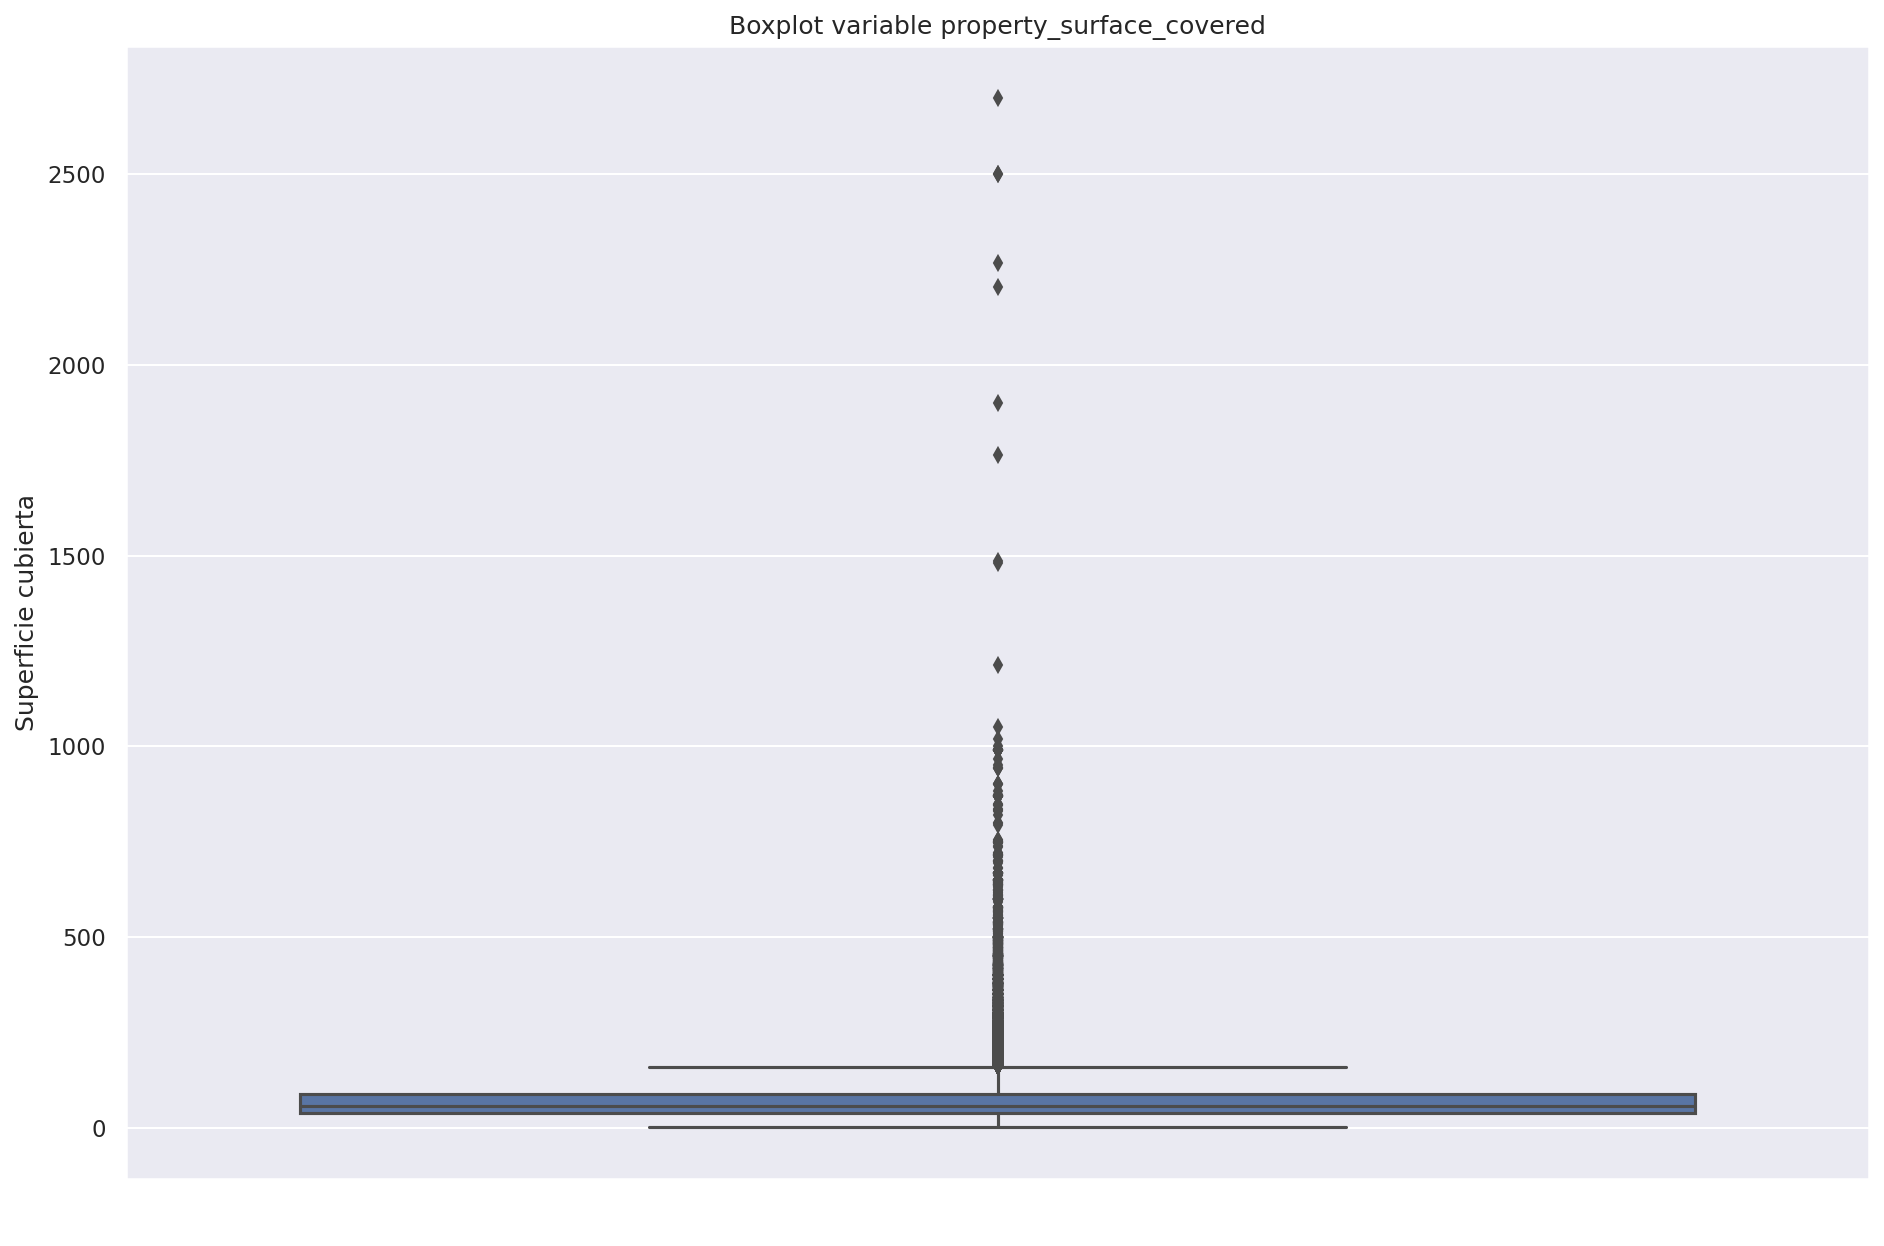

In [125]:
# Volvemos a graficar un boxplot despues de eliminar algunos outliers
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

In [126]:
# Buscamos observaciones mayores a mil m2 cubiertos pero menos de 5 ambientes y que no sean casas
outlier_covsfc_rooms=df[df.apply(lambda x: x['property_surface_covered'] > 1000 and x['property_rooms'] < 5 and x['property_type'] != 'Casa', axis=1)]
# Verificamos si son valores posibles
outlier_covsfc_rooms

latitud   longitud         place_l2          place_l3 place_l4  \
89120 -34.630704 -58.400901  Capital Federal  Parque Patricios      NaN   

      place_l5 operation property_type  property_rooms  property_bedrooms  \
89120      NaN     Venta  Departamento             1.0                NaN   

       property_surface_total  property_surface_covered  property_price  \
89120                    31.0                    2700.0         71500.0   

      property_currency                                     property_title  \
89120               USD  DEPARTAMENTO - PQUE.PATRICIOS, 2 AMBIENTES,  B...   

       start_date_month  end_date_month  end_date_year  created_on_month  
89120                10               1           2022                10

In [127]:
# Vemos que hay un valor que no es posible
idx=outlier_covsfc_rooms.index
# Y procedemos a borrarlo
df.drop(idx, inplace=True)

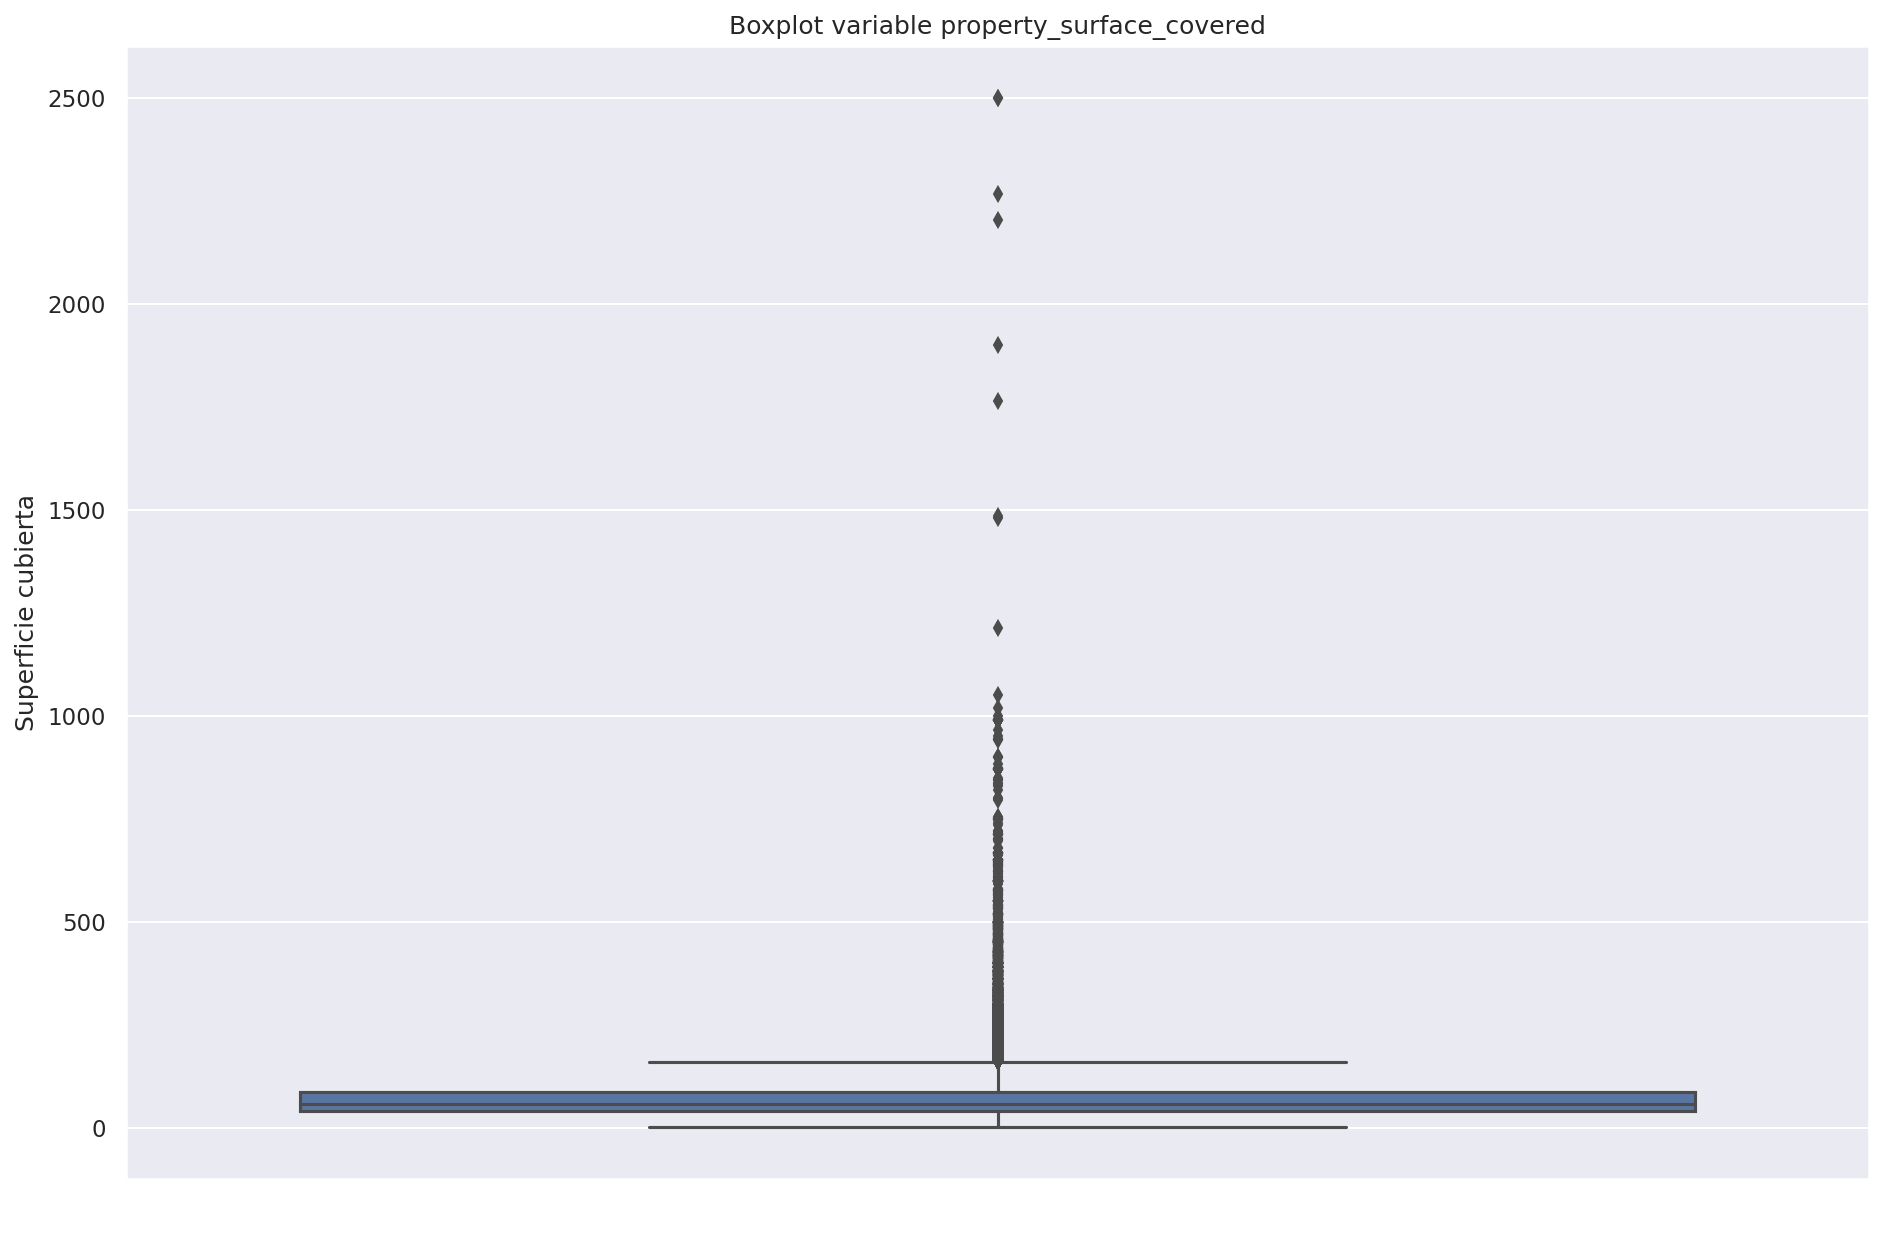

In [128]:
# Volvemos a graficar un boxplot una ultima despues de eliminar algunos outliers
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

**b) Datos Faltantes:** analizar la presencia de datos faltantes en el dataset
* Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset
* Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de
datos faltantes de cada registro. Realizar un gráfico que permita conocer la
proporción de faltantes por fila en el dataset.
* Determinar, de ser posible, estrategias para reparar los valores faltantes.
* En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes.

<h4 align="center"><b> Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset </b></h4>

#### Brayan:

In [129]:
na_ratio_column = pd.DataFrame()
na_ratio_column["Percent"] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
na_ratio_column["Count"] =(df.isnull().sum()).sort_values(ascending = False)

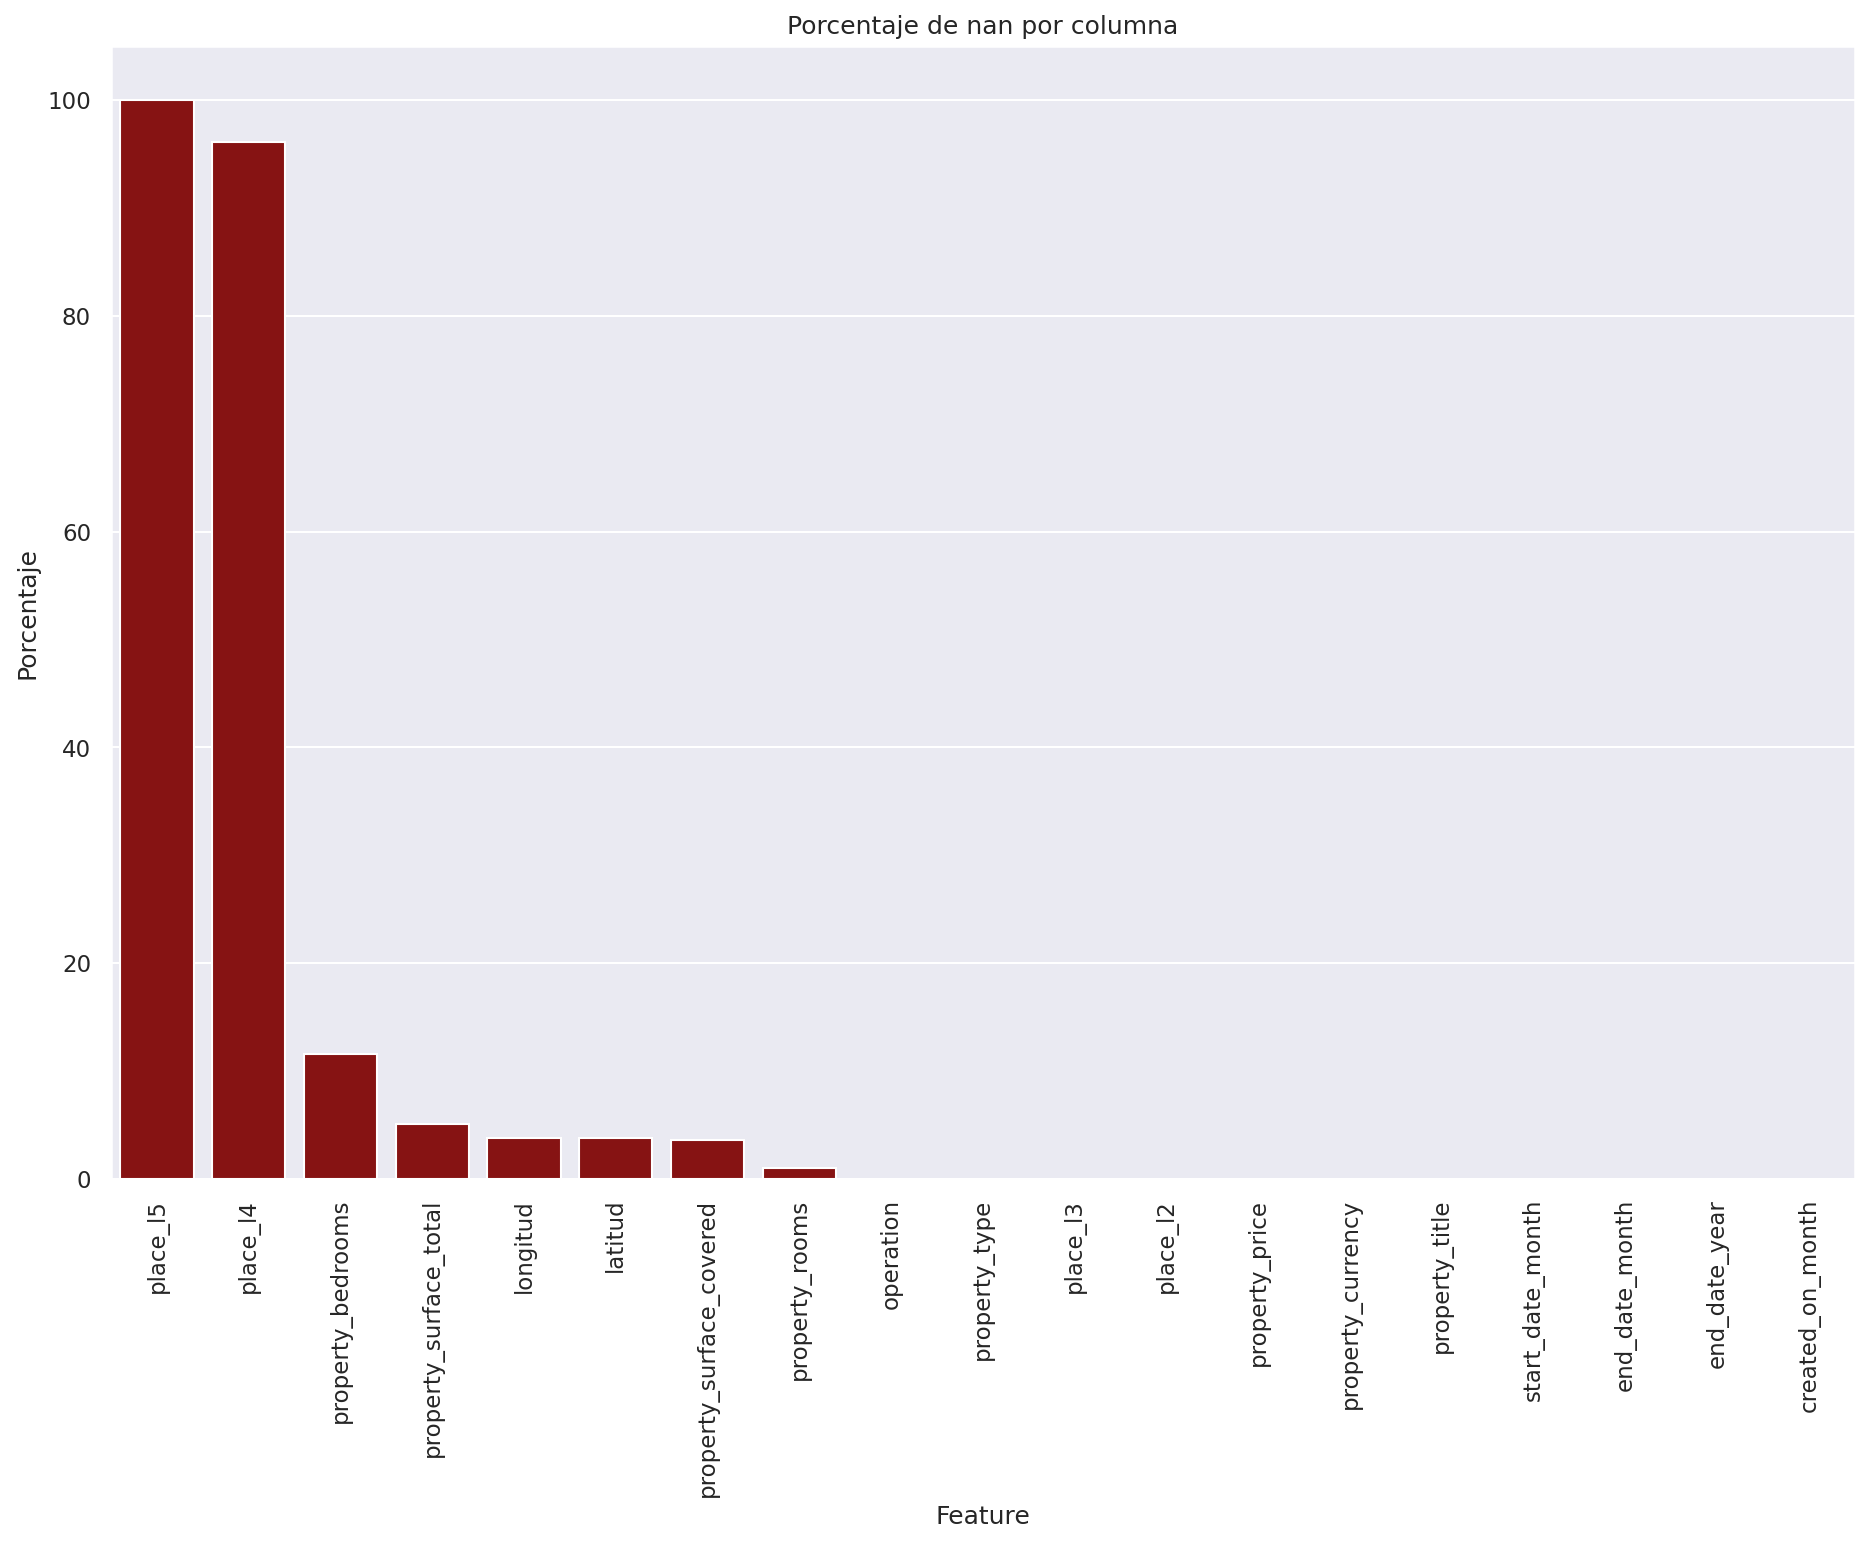

In [130]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Percent'])

fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Porcentaje")
plt.xlabel("Feature")
plt.title("Porcentaje de nan por columna")
plt.xticks(rotation=90)
plt.show()

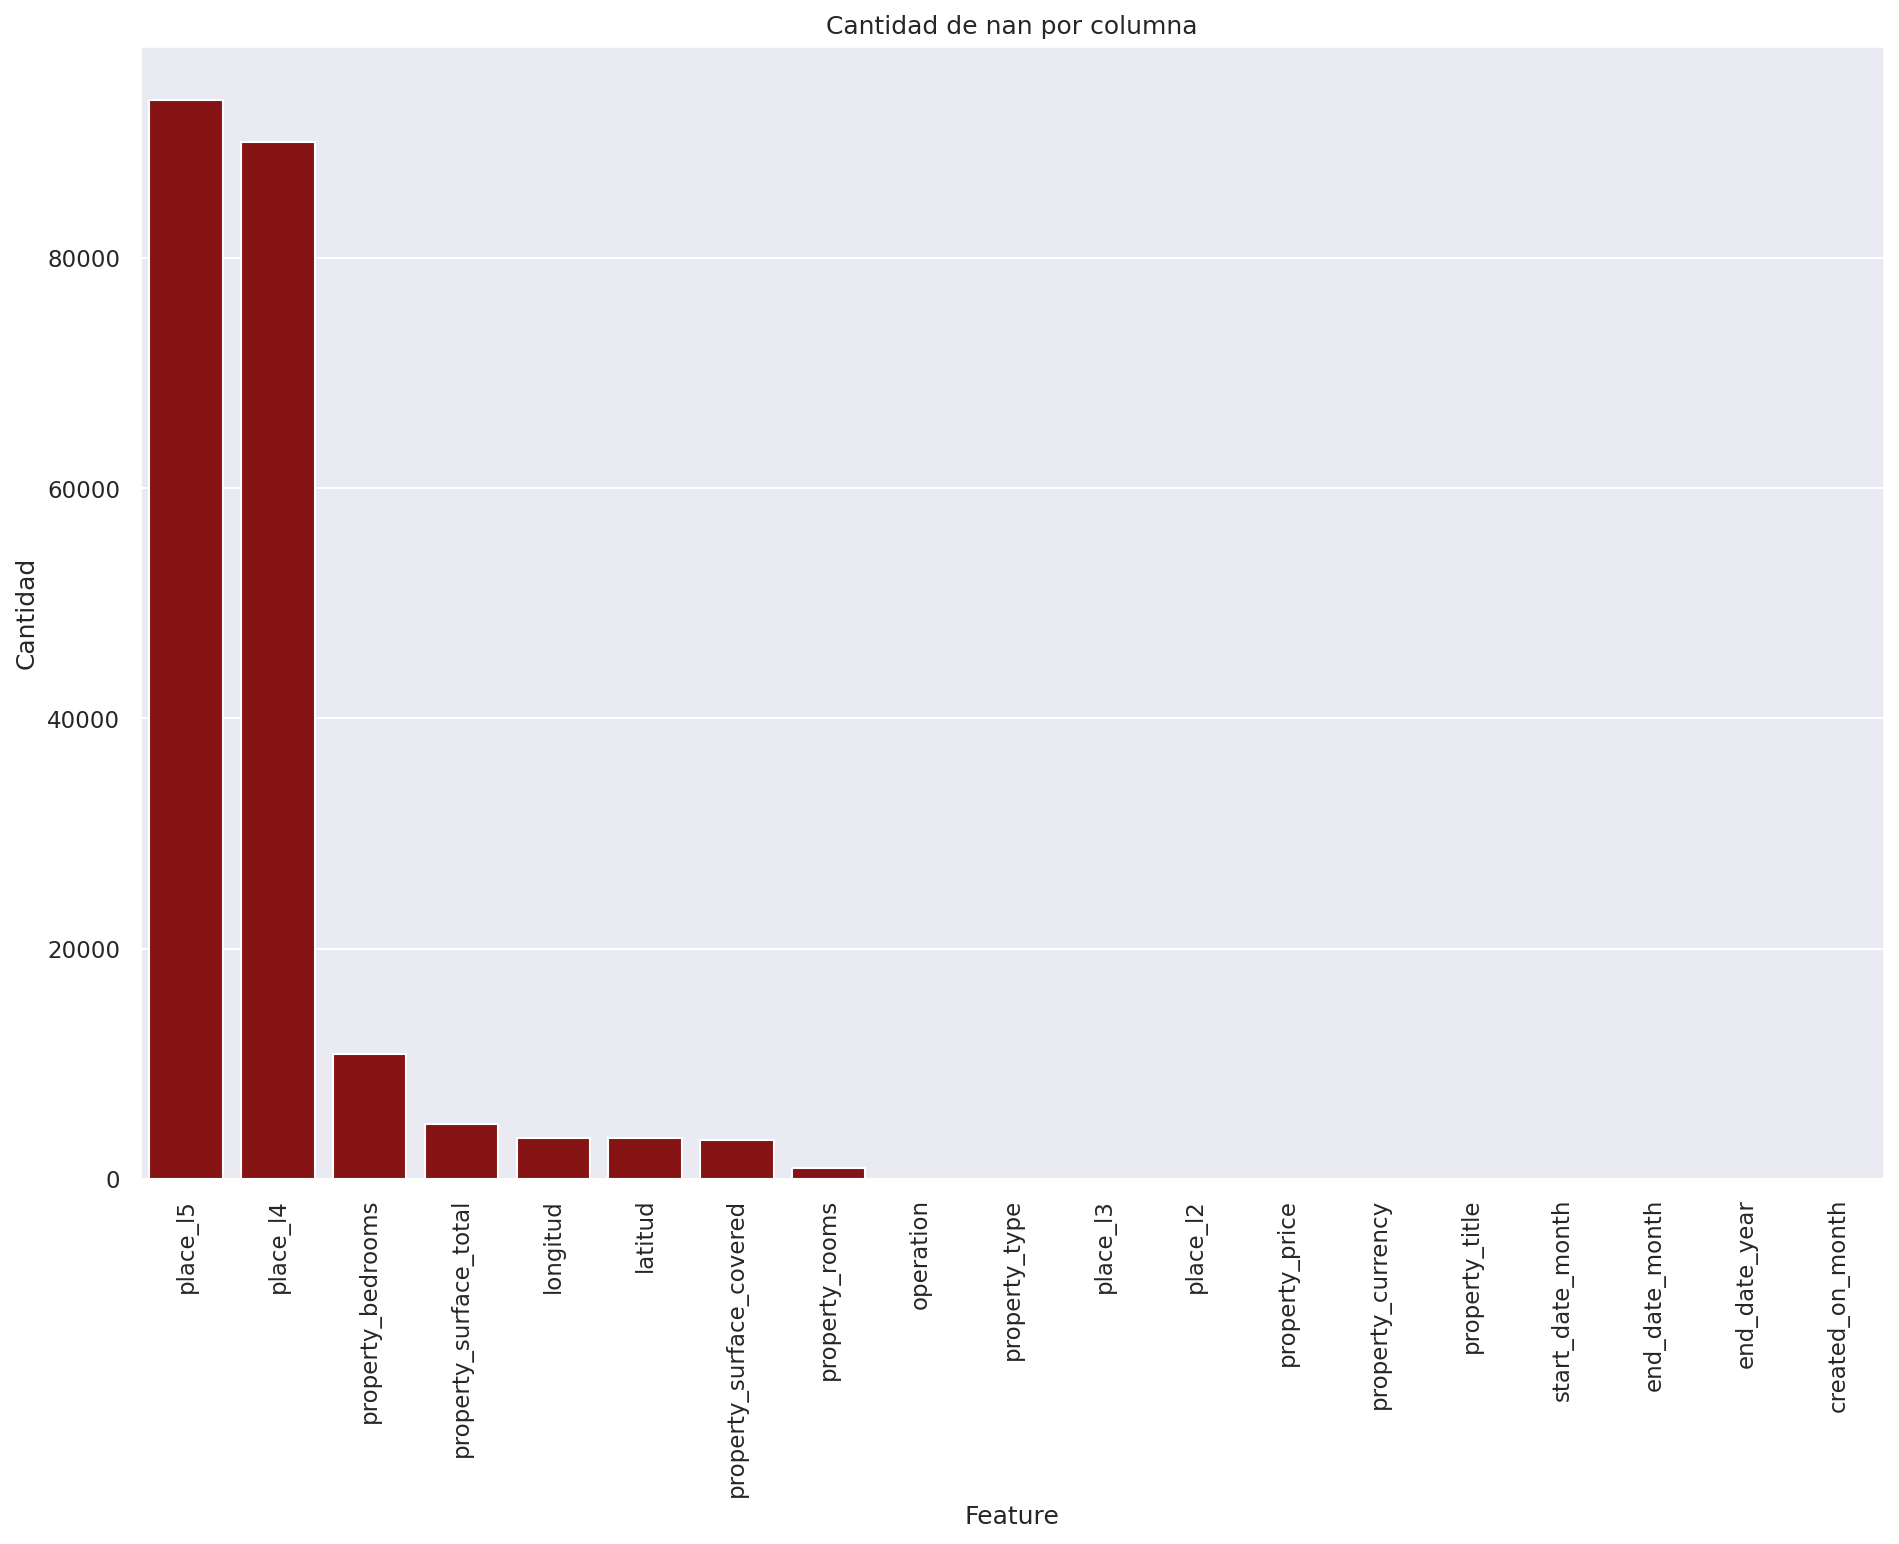

In [131]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Count'])

fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Cantidad")
plt.xlabel("Feature")
plt.title("Cantidad de nan por columna")
plt.xticks(rotation=90)
plt.show()

#### Santiago:

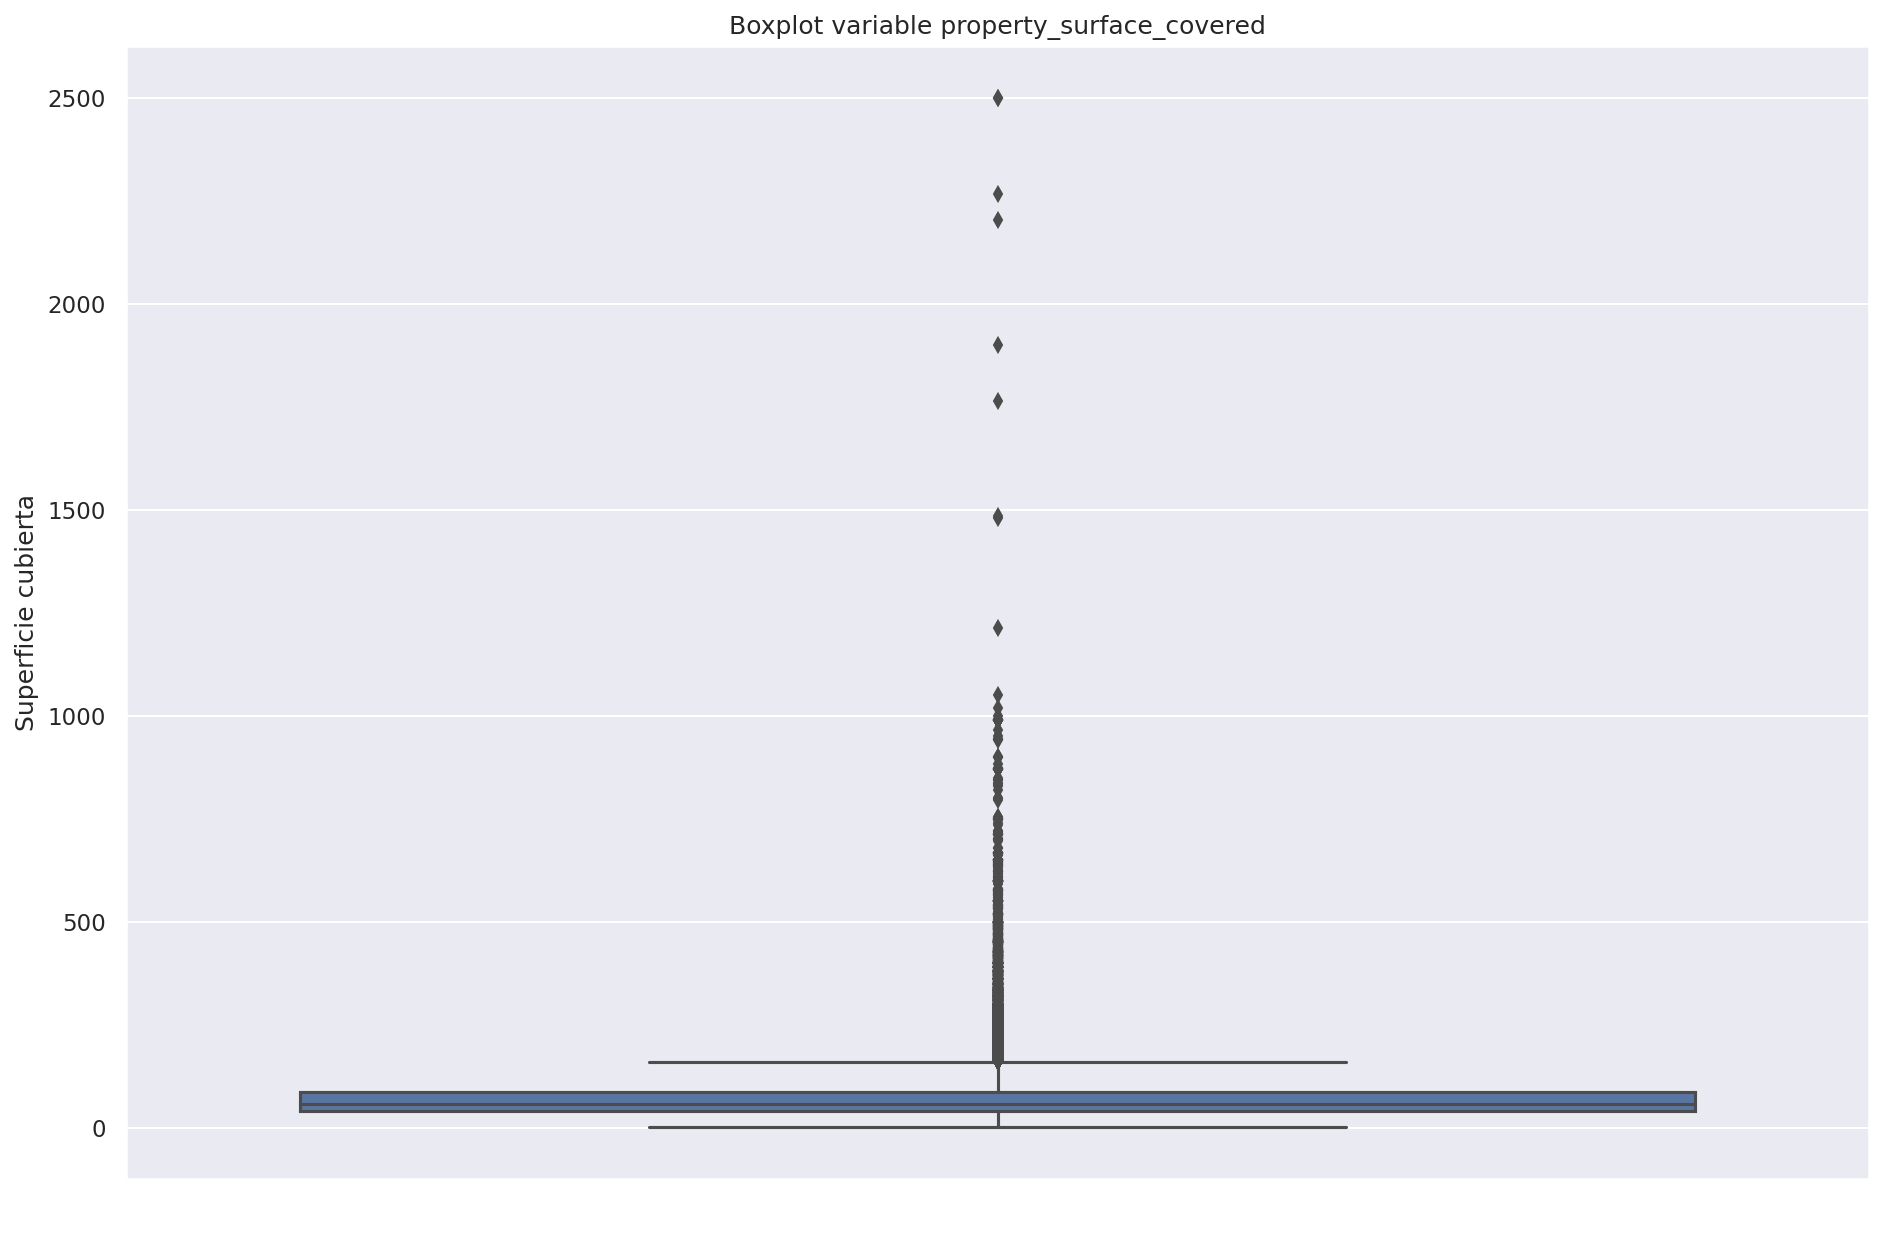

In [132]:
# Volvemos a graficar un boxplot una ultima despues de eliminar algunos outliers
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
grf_box=sns.boxplot(y="property_surface_covered", data=df).set(title="Boxplot variable property_surface_covered",xlabel=" ",ylabel="Superficie cubierta")

#### Datos faltantes: property_rooms

In [133]:
# Vemos cuantas filas tienen datos faltantes de property_rooms
df.property_rooms.isnull().sum()

960

In [134]:
# Borramos las filas vacias
idx=df[df.property_rooms.isnull()].index
df.drop(idx, inplace=True)

In [135]:
# Vemos si hay valores negativos
(df.property_rooms <= 0).any()

False

#### Datos faltantes: property_bedrooms

In [136]:
# Vemos cuantas filas tienen datos faltantes de property_bedrooms
df.property_bedrooms.isnull().sum()

10411

In [137]:
# Vemos si hay valores negativos
(df.property_bedrooms <= 0).sum()

1

In [138]:
# Borramos el valor negativo
idx=df[df.property_bedrooms <= 0].index
df.drop(idx, inplace=True)

In [139]:
# Vemos cuantas propiedades tienen mas dormitorios que ambientes, lo cual no tiene sentido
df.apply(lambda row: True if row['property_rooms'] < row['property_bedrooms'] else False, axis=1).sum()

147

In [140]:
# Borramos las propiedades con mas dormitorios que ambientes
idx=df[df.apply(lambda row: True if row['property_rooms'] < row['property_bedrooms'] else False, axis=1)].index
df.drop(idx, inplace=True)

#### Datos faltantes: property_surface_total

In [141]:
# Vemos cuantas filas tienen datos faltantes de property_surface_total
df.property_surface_total.isnull().sum()

4556

In [142]:
# Vemos si hay valores negativos
(df.property_surface_total <= 0).any()

False

#### Datos faltantes: property_surface_covered

In [143]:
# Vemos cuantas filas tienen datos faltantes de property_surface_covered
df.property_surface_covered.isnull().sum()

3247

In [144]:
# Vemos si hay valores negativos
(df.property_surface_covered <= 0).any()

False

In [145]:
# Vemos cuantas propiedades tienen mas superficie cubierta que total, lo cual no tiene sentido
df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1).sum()

175

In [146]:
# Borramos las propiedades con mas superficie cubierta que total
idx=df[df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1)].index
df.drop(idx, inplace=True)

<h4 align="center"><b> Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset </b></h4>

#### Brayan:

In [147]:
na_ratio_row = pd.DataFrame()
n_column = df.shape[1]
na_ratio_row["Percent"] = df.isnull().sum(axis=1) / n_column
na_ratio_row["Count"] = df.isnull().sum(axis=1)

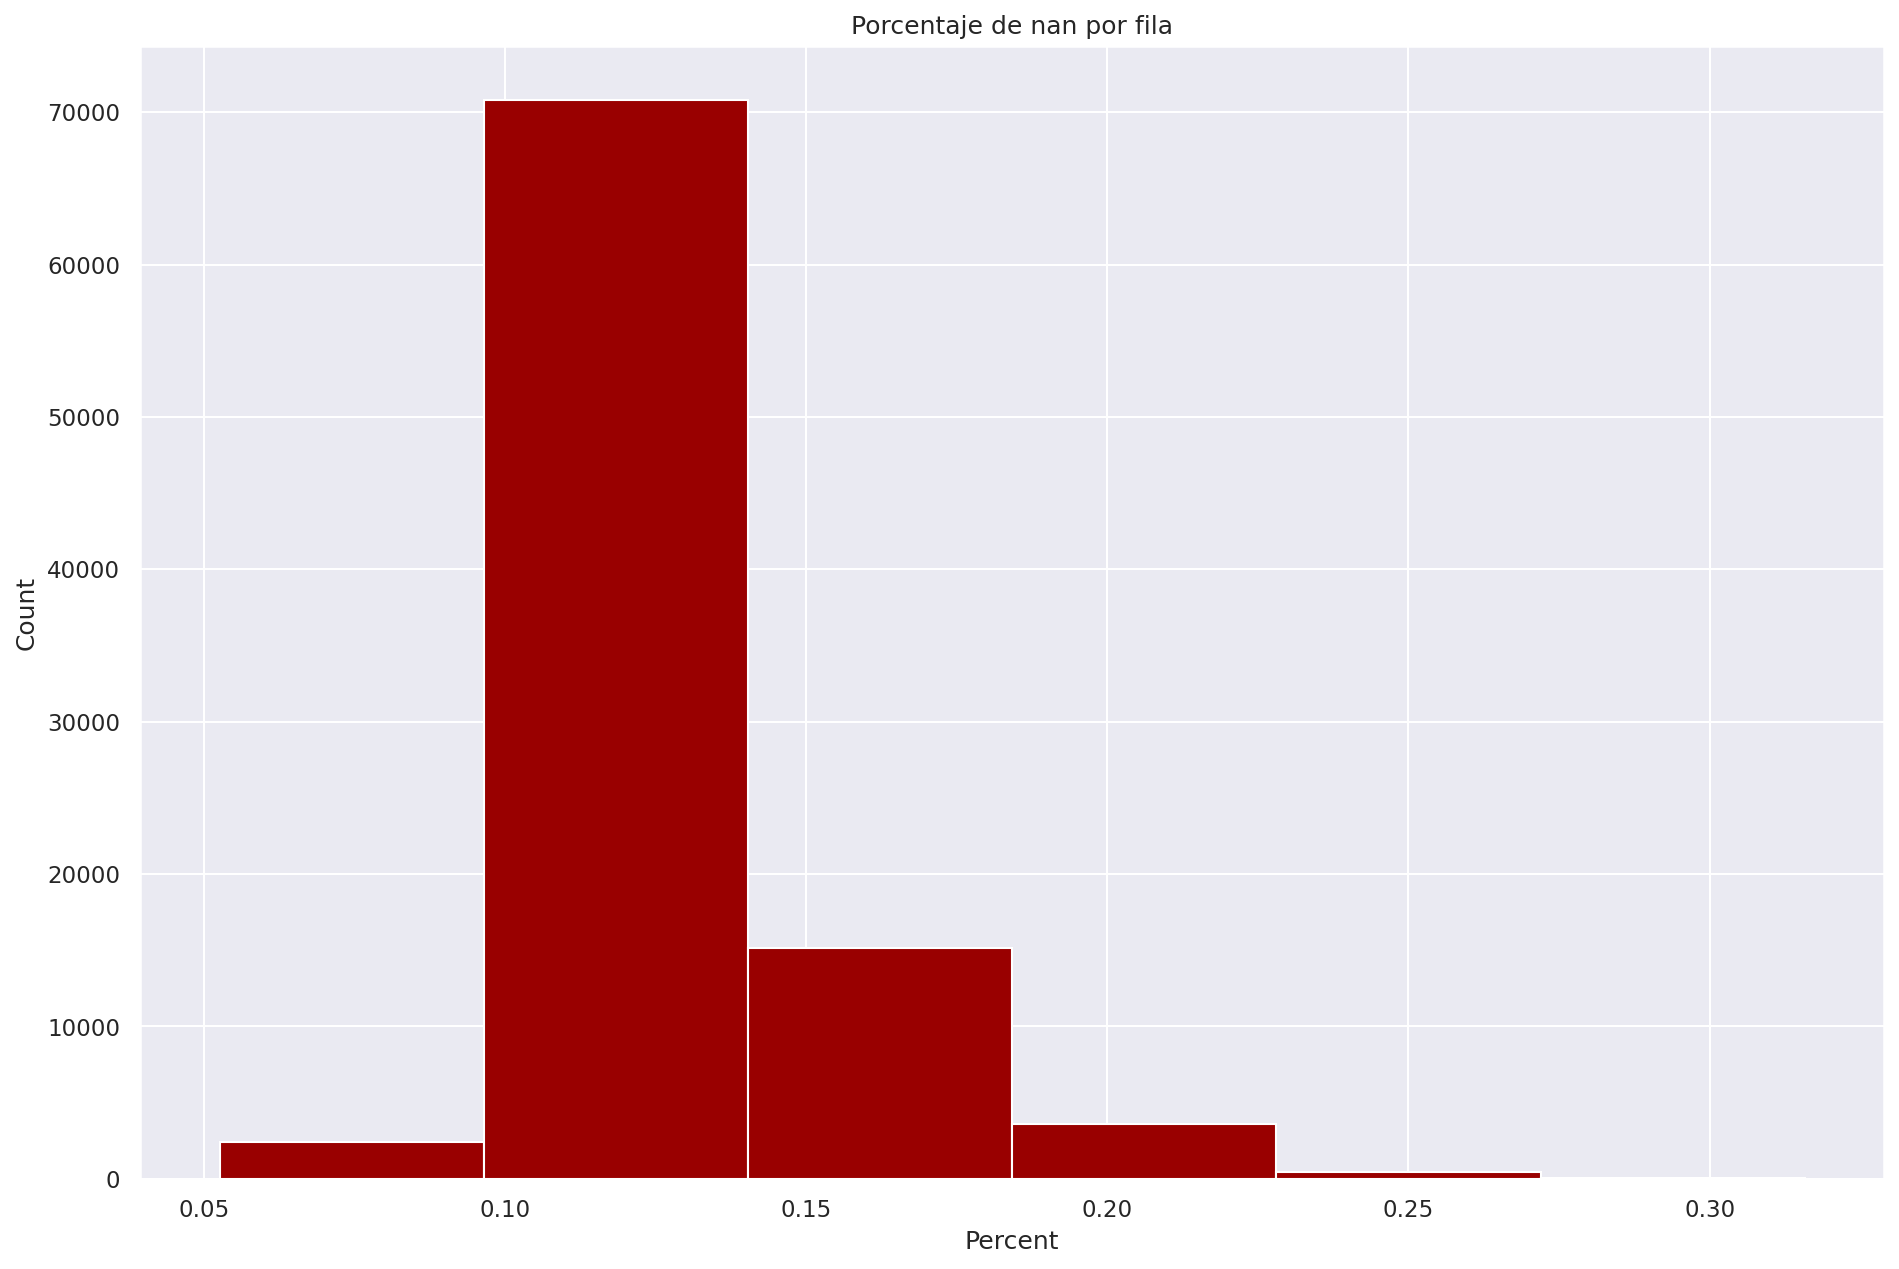

In [148]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns.histplot(data=na_ratio_row, x="Percent", bins=6, color=(0.6, 0, 0), alpha = 1)
plt.title("Porcentaje de nan por fila")
plt.show()

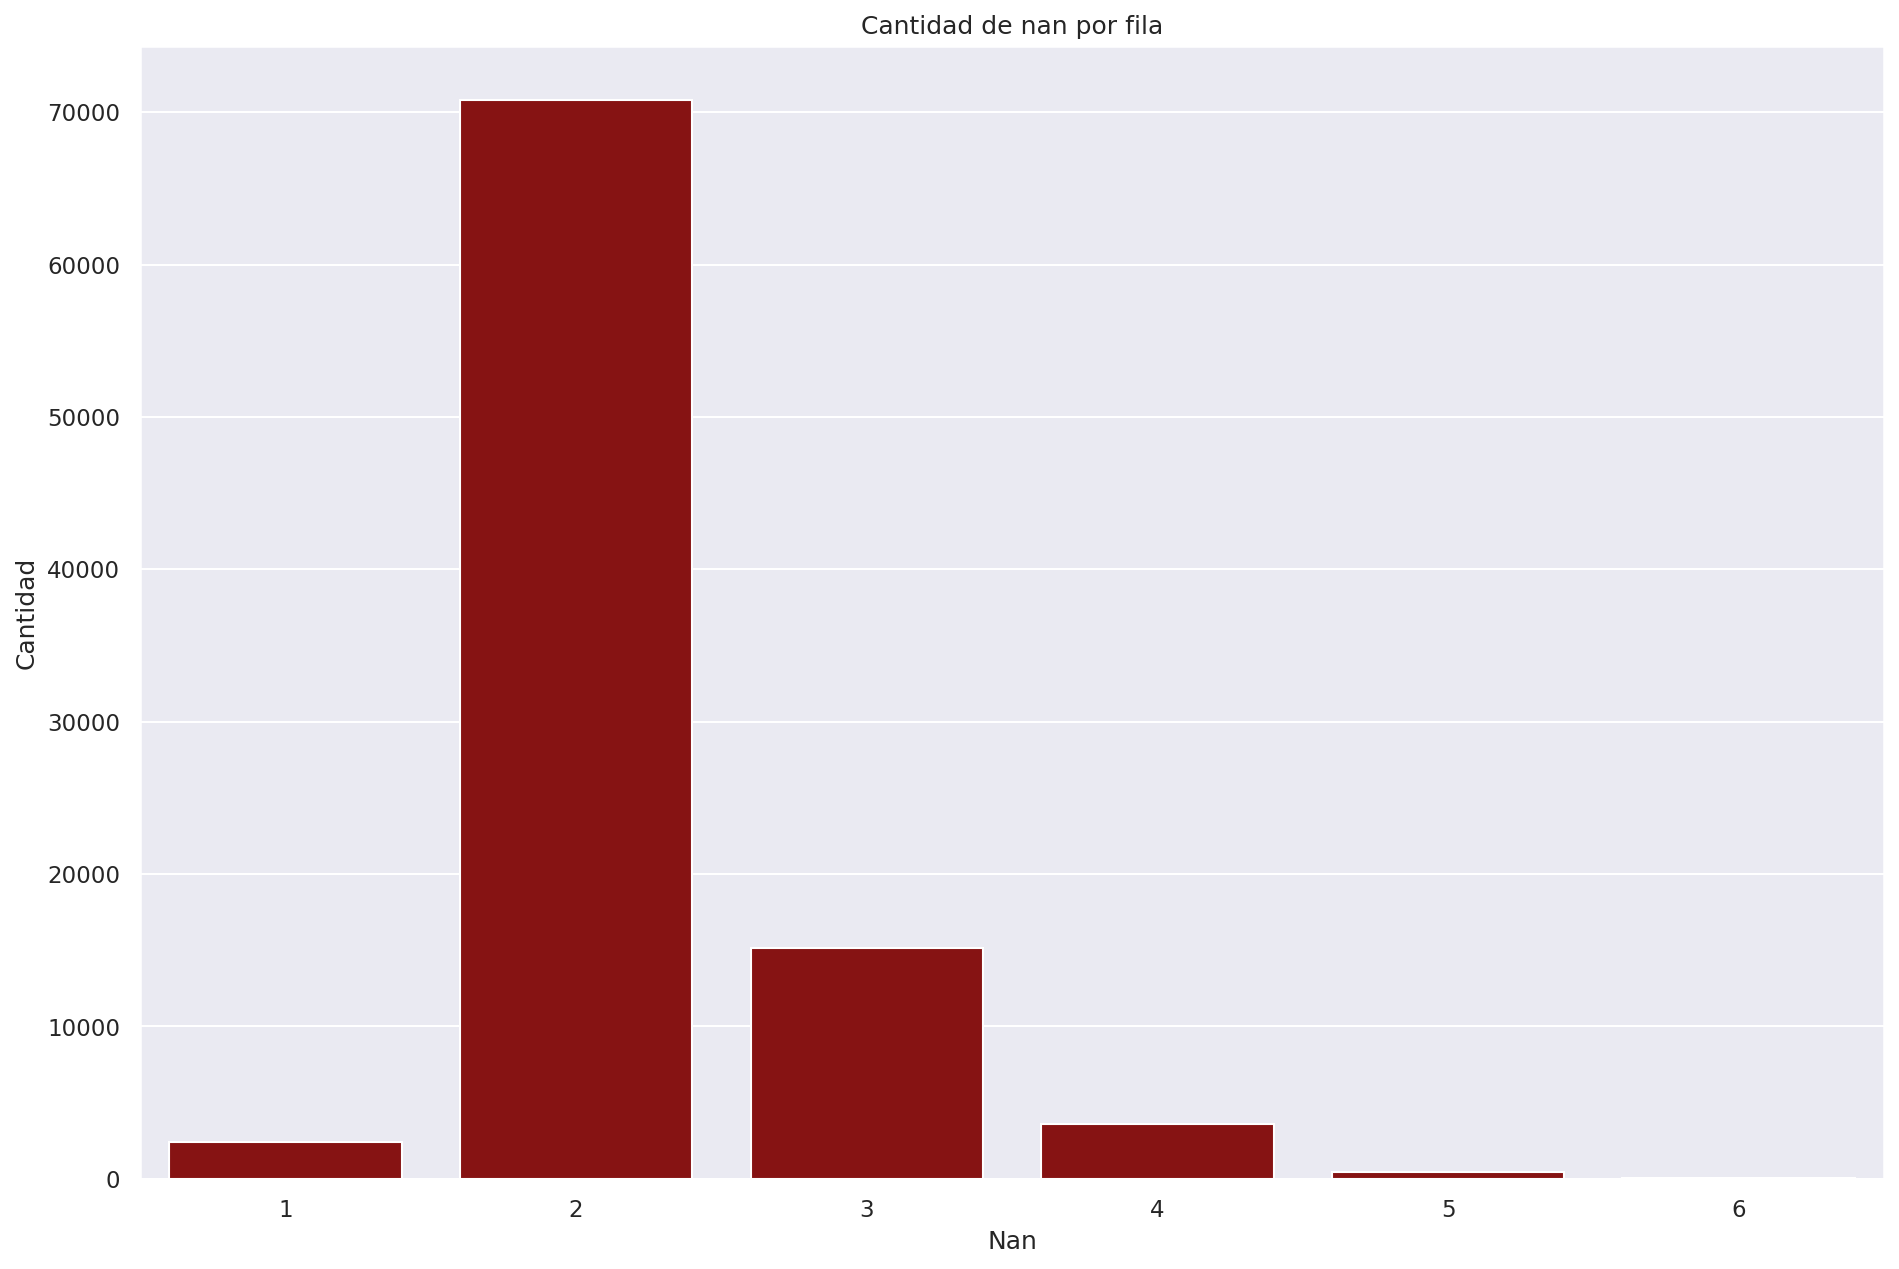

In [149]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns.countplot(
    x="Count", data=na_ratio_row, color=(0.6, 0, 0), alpha = 1
)
plt.ylabel("Cantidad")
plt.xlabel("Nan")
plt.title("Cantidad de nan por fila")
plt.show()

<h4 align="center"><b> Determinar, de ser posible, estrategias para reparar los valores faltantes </b></h4>

#### Brayan:

Completo las latitudes y longitudes con respecto a la media de su barrio.

In [150]:
medias_latitud = {}
medias_longitud = {}
valores_place = df.groupby(by=['place_l3']).mean().index
grupos = df.groupby(by=['place_l3']).mean()

In [151]:
for place in valores_place:
    medias_latitud[place] = grupos.latitud[place]
    medias_longitud[place] = grupos.longitud[place]

In [152]:
for place in valores_place:
    mask = ((df['longitud'].isnull()) & (df['place_l3'] == place))
    df.loc[mask, 'longitud'] = medias_longitud[place]

In [153]:
for place in valores_place:
    mask = ((df['latitud'].isnull()) & (df['place_l3'] == place))
    df.loc[mask, 'latitud'] = medias_latitud[place]

#### Santiago:

#### Completamos los datos faltantes de dormitorios utilizando la moda segun la cantidad de ambientes

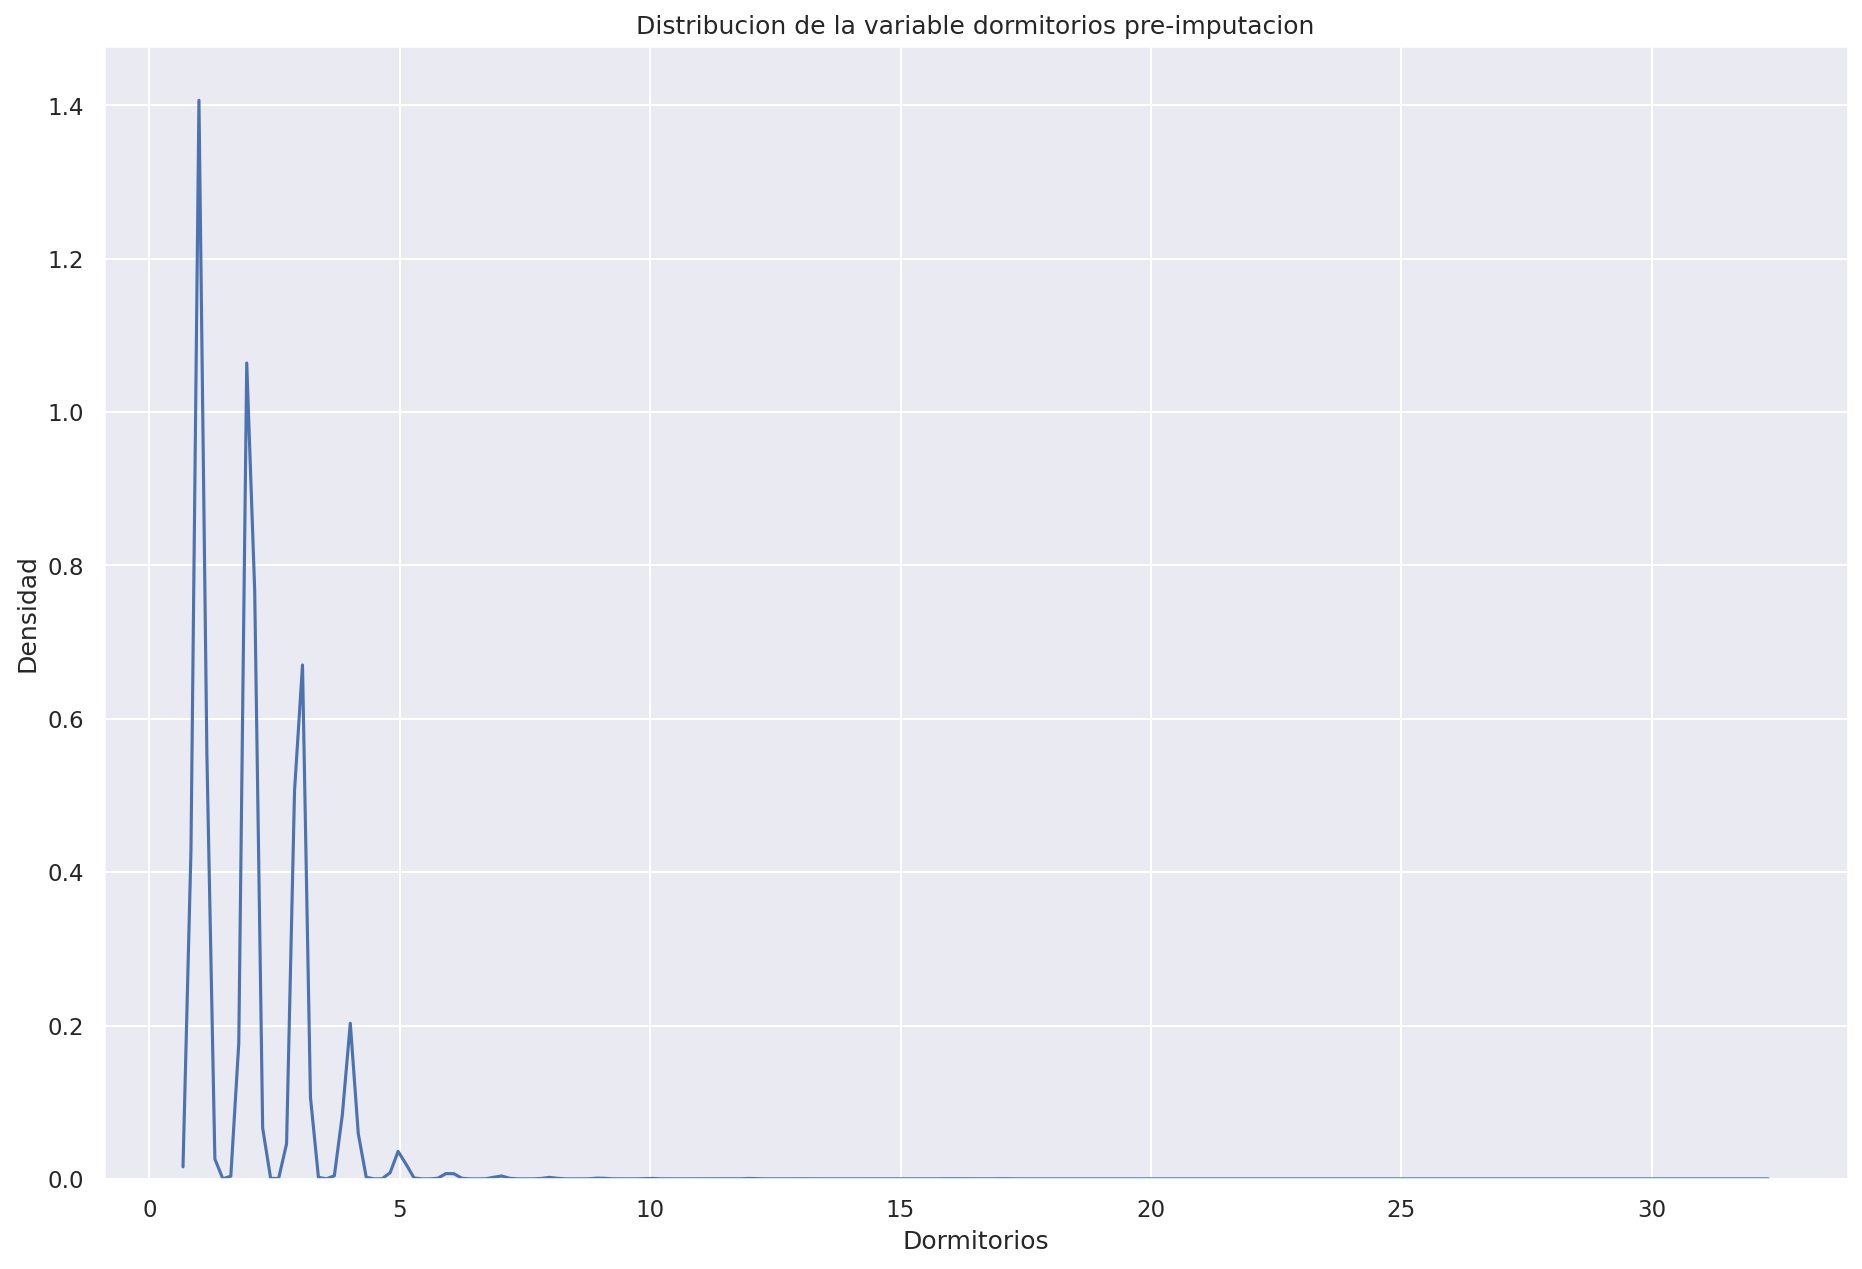

In [154]:
# Distribucion de la variable property_bedrooms antes de imputar o reparar datos
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de la variable dormitorios pre-imputacion",xlabel="Dormitorios",ylabel="Densidad")

In [155]:
# Vamos a calcular la moda para el feature dormitorios dependiendo de cuantos ambientes tenga la propiedad
moda_unique_rooms = {}
df_na=df[df.property_bedrooms.isna()]
unique_rooms=df_na.property_rooms.unique().tolist()

In [156]:
# Calculamos la moda para cada valor unico de ambientes
for n in unique_rooms:
    moda_unique_rooms[n] = df[df.property_rooms == n].property_bedrooms.mode()[0]

In [157]:
# Le asignamos el valor que corresponda a cada celda de dormitorio que este vacia
for n in unique_rooms:
    mask = ((df['property_bedrooms'].isnull())) & (df['property_rooms'] == n)
    df.loc[mask, 'property_bedrooms'] = moda_unique_rooms[n]

In [158]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_bedrooms.isnull().sum()

0

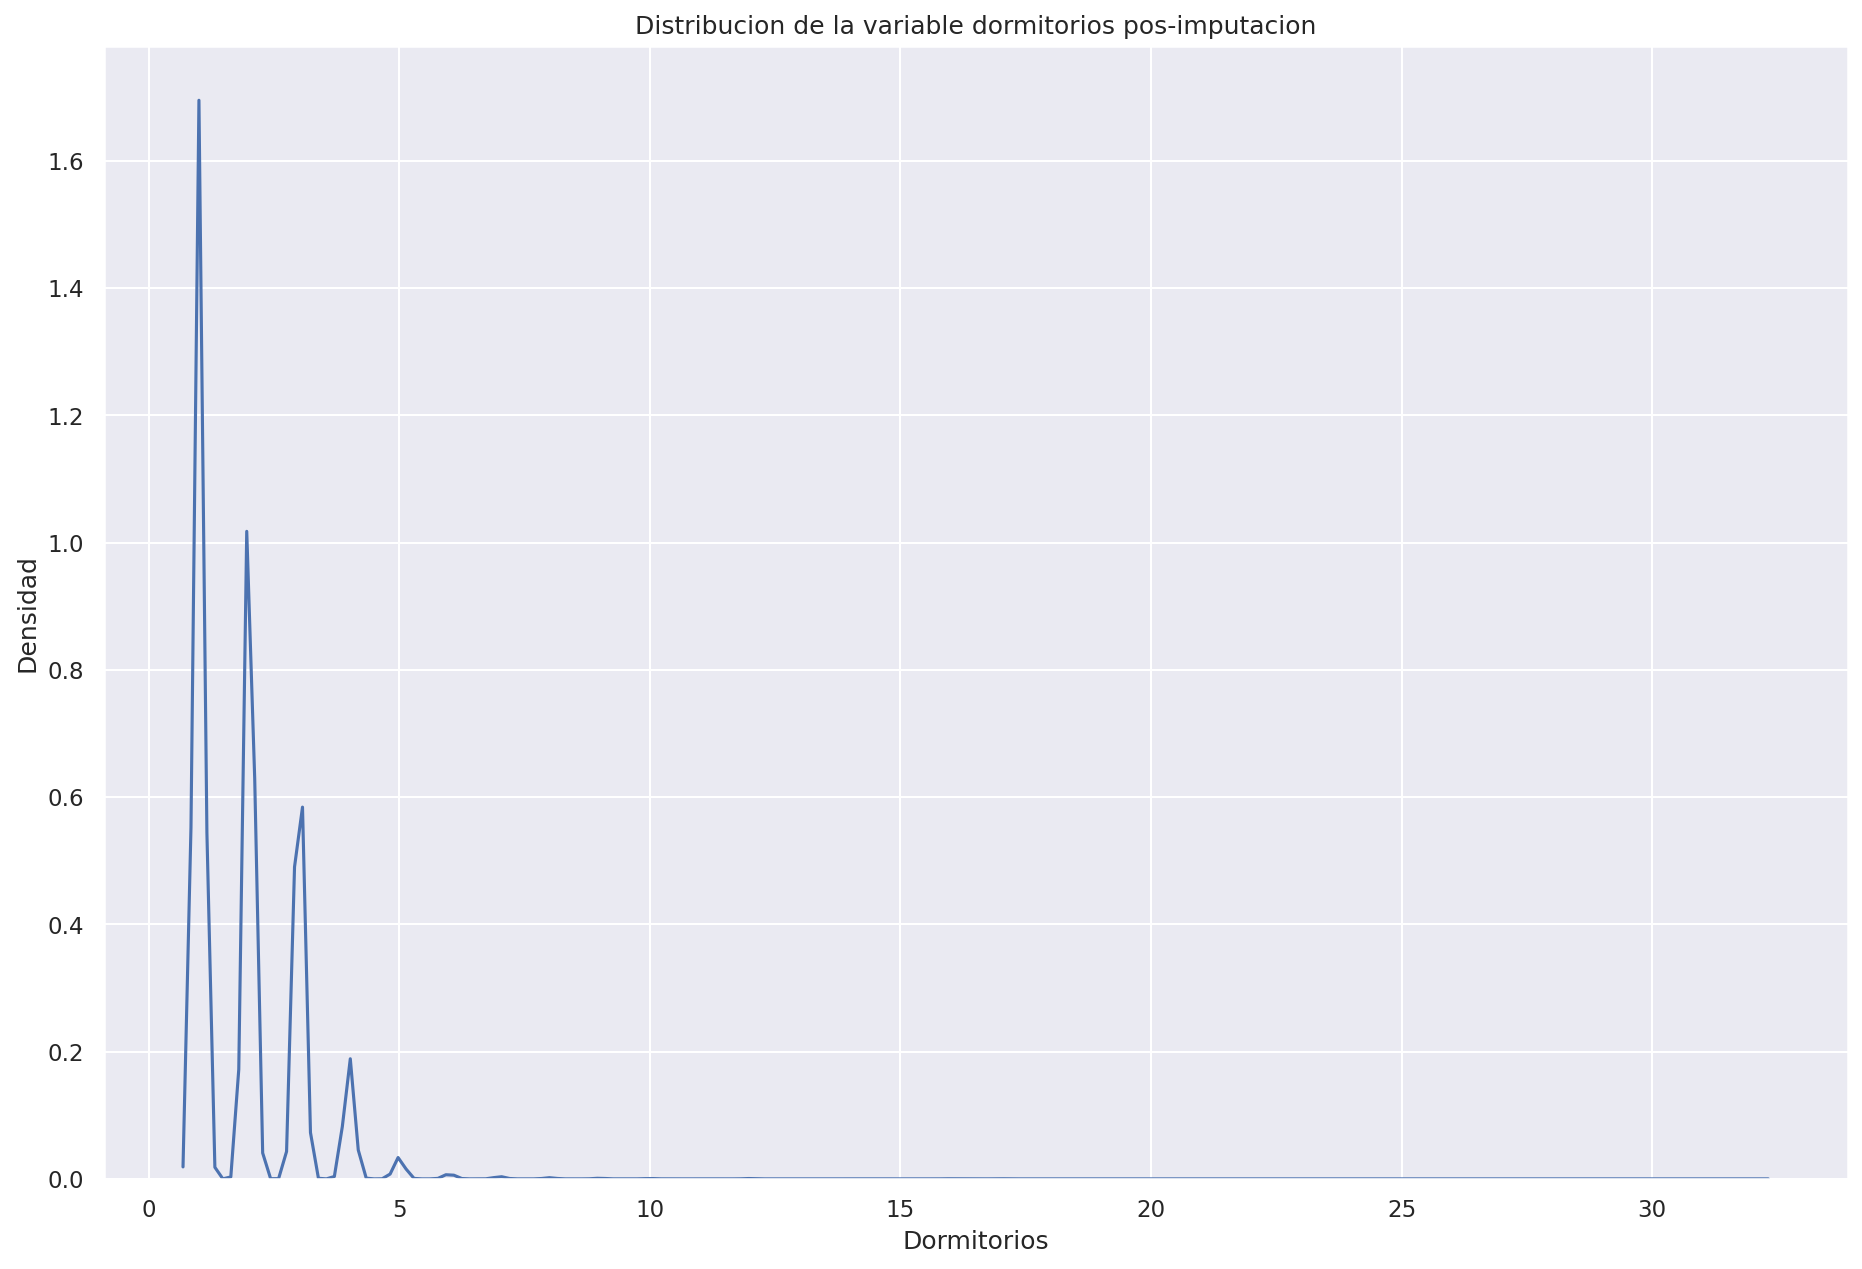

In [159]:
# Distribucion de la variable property_bedrooms despues de imputar o reparar datos
fig, axes = plt.subplots(dpi=150, figsize=(15, 10))
sns_hist=sns.kdeplot(data=df.property_bedrooms).set(title="Distribucion de la variable dormitorios pos-imputacion",xlabel="Dormitorios",ylabel="Densidad")

#### Completamos los datos faltantes de superficie total y cubierta utilizando regresion lineal

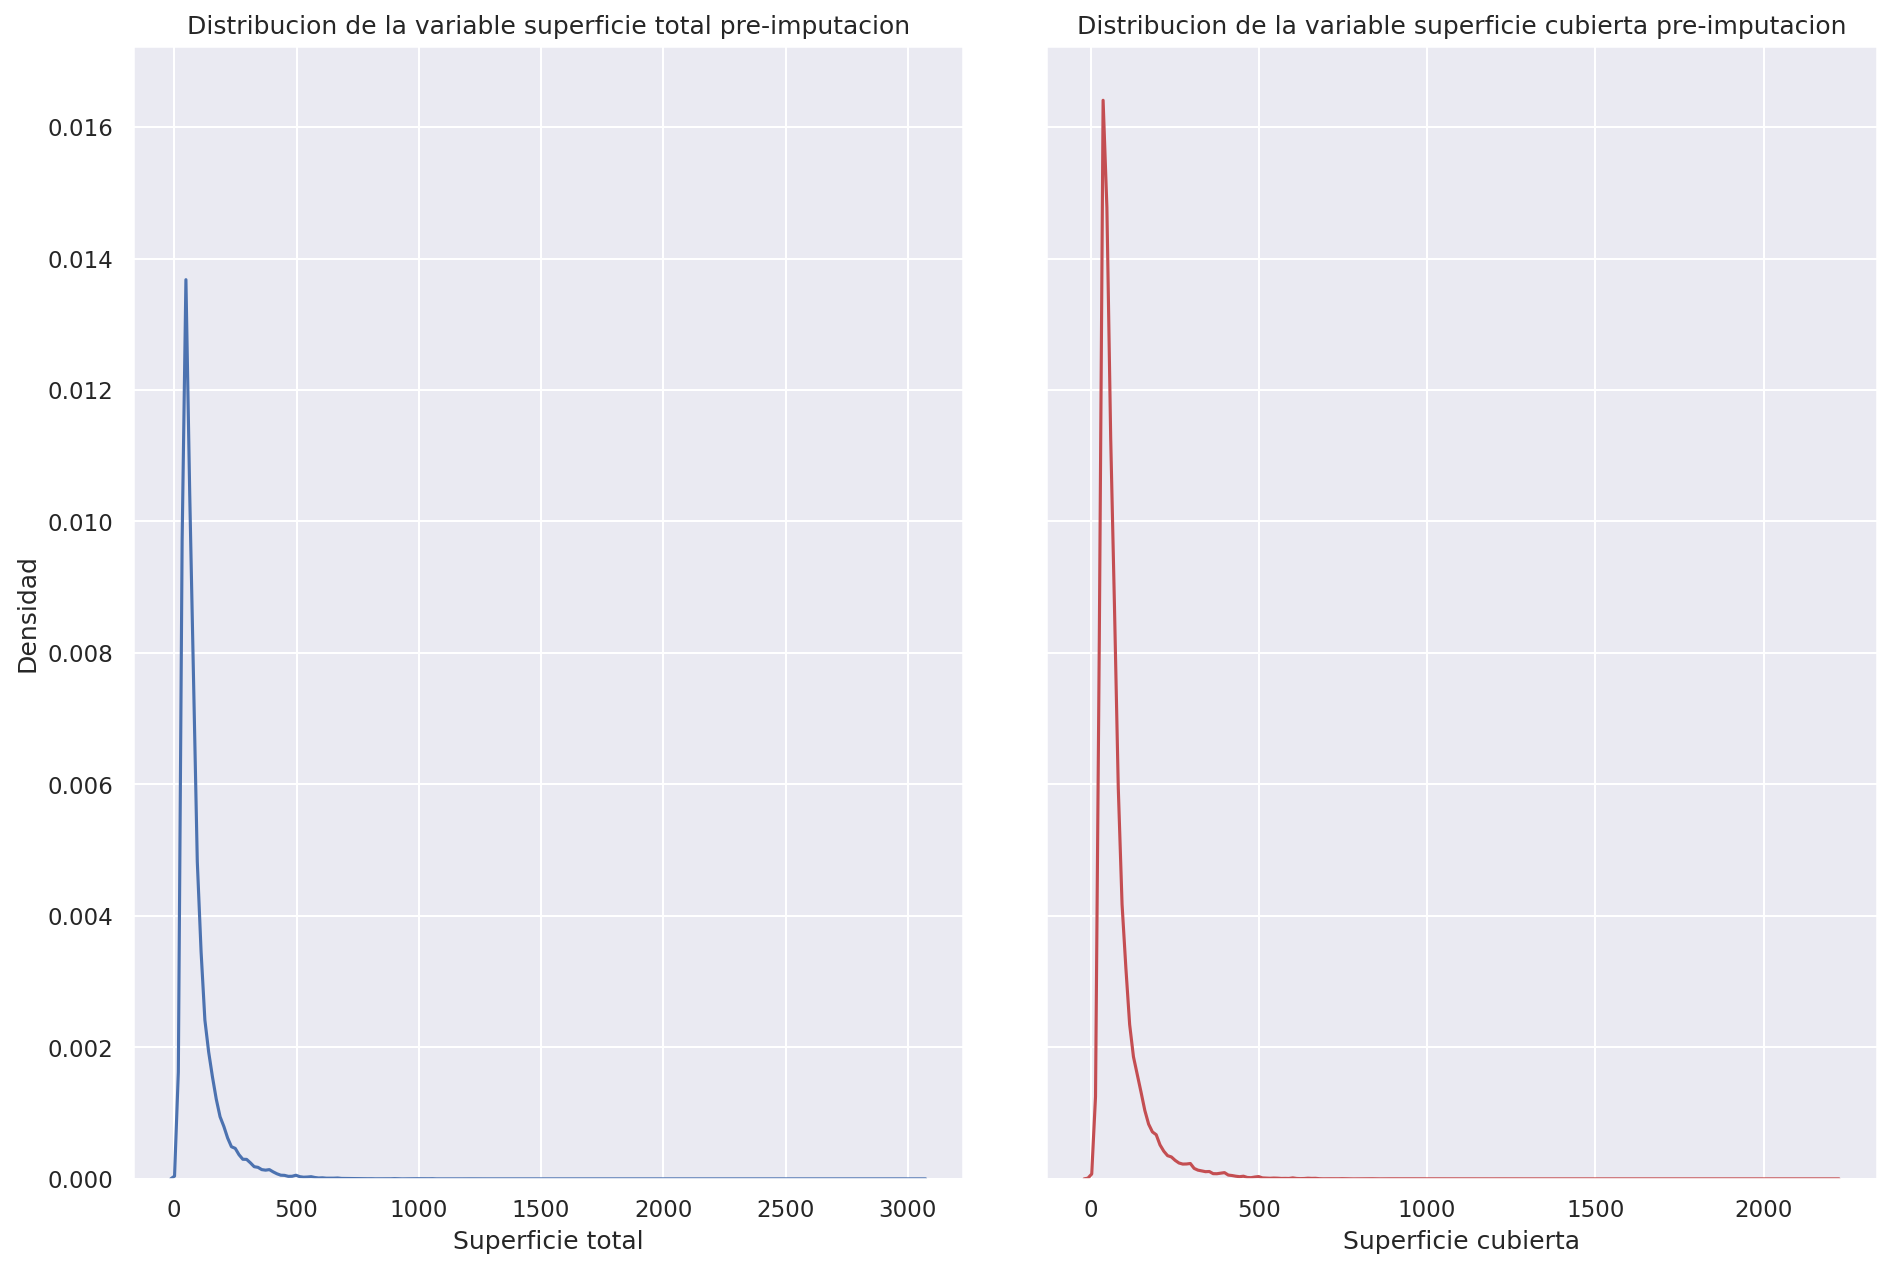

In [160]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(15, 10), sharey=True)
# Distribucion de la variable property_surface_total antes de imputar o reparar datos
sns.kdeplot(data=df['property_surface_total'], ax=axes[0]).set(title="Distribucion de la variable superficie total pre-imputacion",xlabel="Superficie total",ylabel="Densidad")
# Distribucion de la variable property_surface_covered antes de imputar o reparar datos
sns.kdeplot(data=df['property_surface_covered'] ,color='r', ax=axes[1]).set(title="Distribucion de la variable superficie cubierta pre-imputacion",xlabel="Superficie cubierta",ylabel="Densidad")
plt.subplots_adjust(wspace=0.1)

In [161]:
# Tomamos las columnas de superficie total y cubierta
columns=['property_surface_total','property_surface_covered']
df_aux=df[columns].copy()

# Imputamos los datos nuevos utilizando regresion lineal entre ambas features
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0)
df_aux=imp.fit_transform(df_aux[columns])

# Ponemos los datos nuevamente en nuestro dataframe
df[columns]=df_aux

In [162]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_surface_total.isnull().sum()

0

In [163]:
# Volvemos a chequear que no tengamos datos faltantes luego de imputar
df.property_surface_covered.isnull().sum()

0

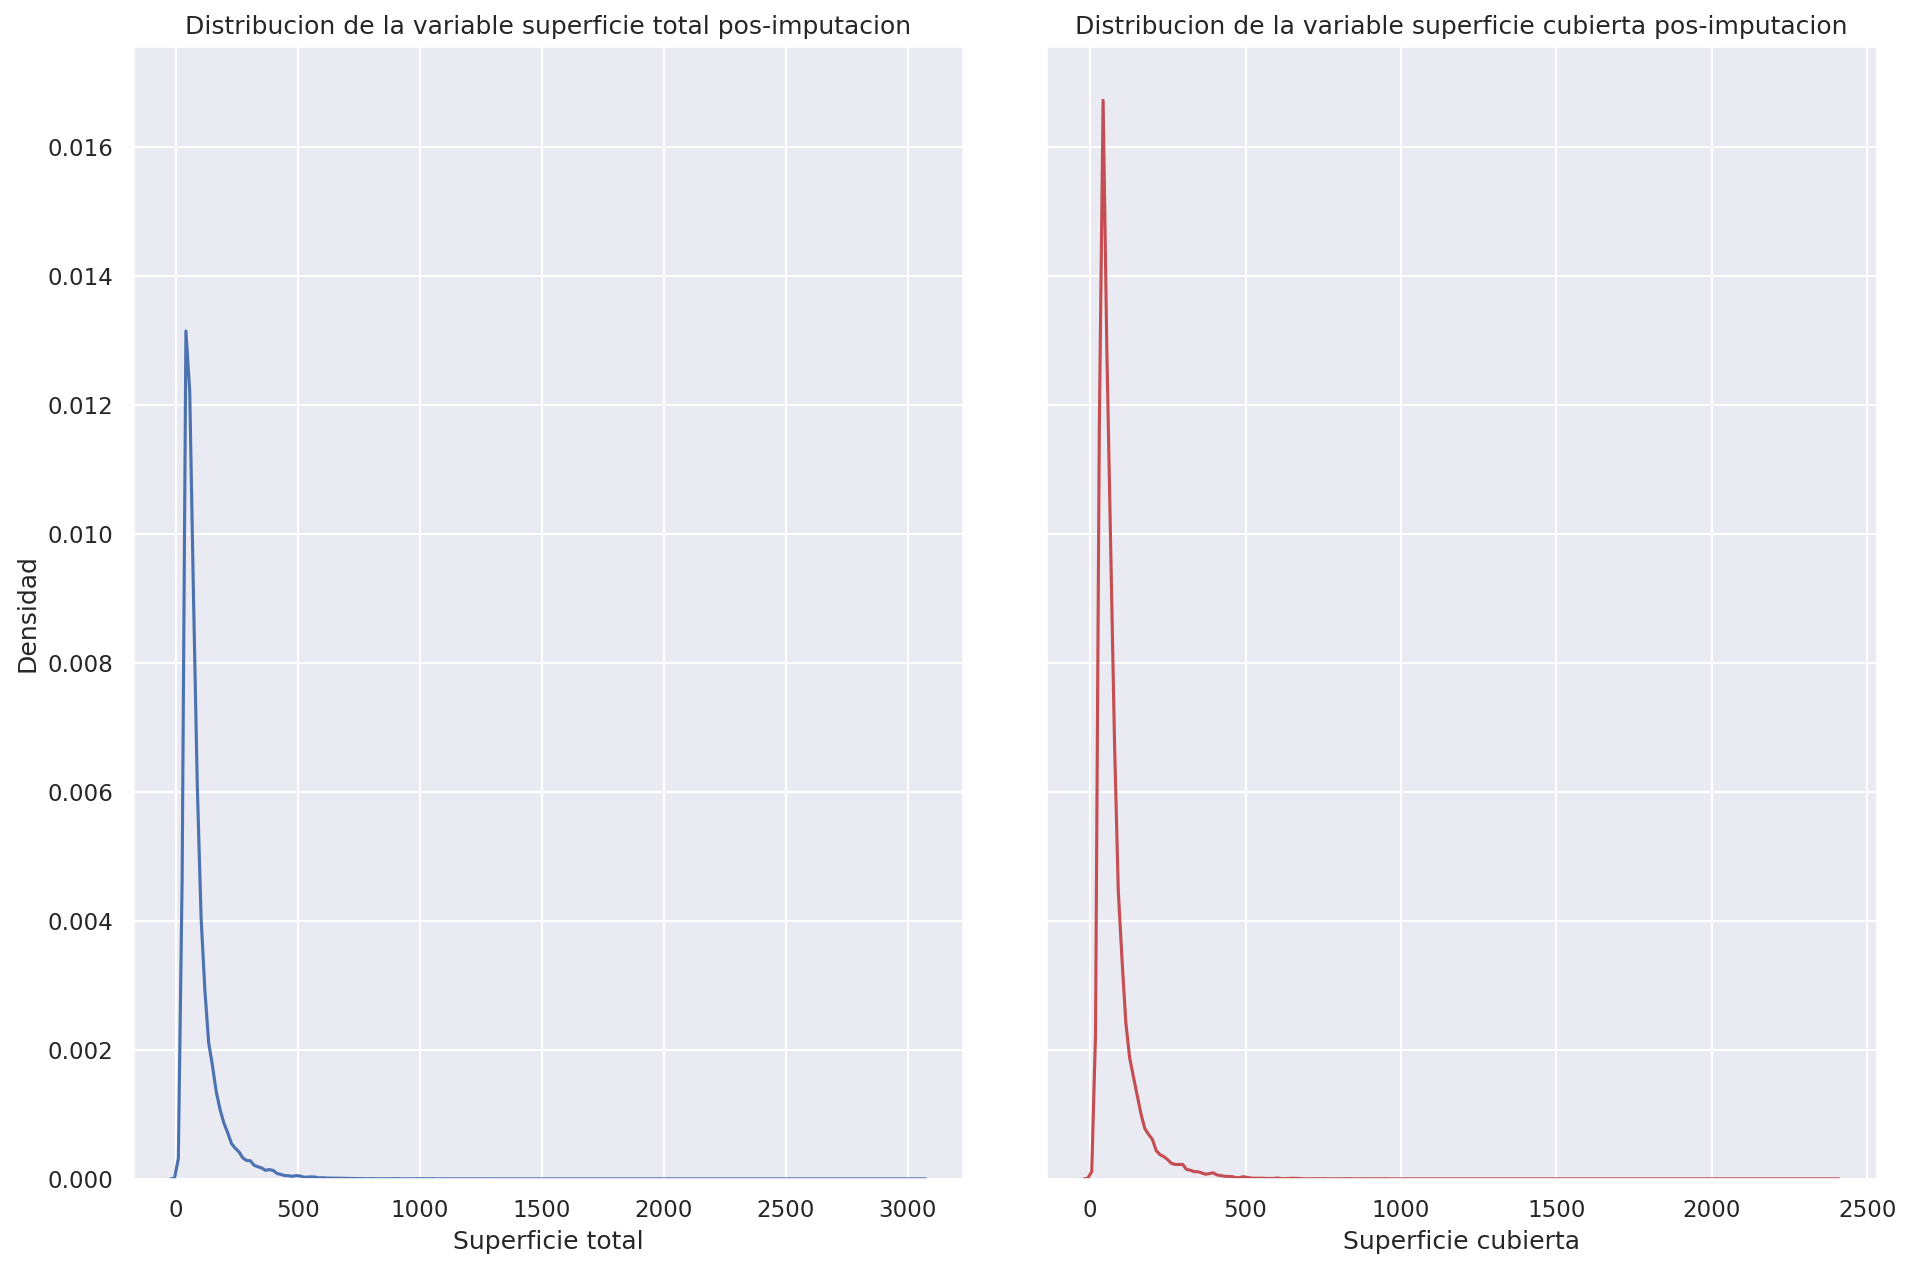

In [164]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(15, 10), sharey=True)
# Distribucion de la variable property_surface_total despues de imputar o reparar datos
sns.kdeplot(data=df['property_surface_total'], ax=axes[0]).set(title="Distribucion de la variable superficie total pos-imputacion",xlabel="Superficie total",ylabel="Densidad")
# Distribucion de la variable property_surface_covered despues de imputar o reparar datos
sns.kdeplot(data=df['property_surface_covered'] ,color='r', ax=axes[1]).set(title="Distribucion de la variable superficie cubierta pos-imputacion",xlabel="Superficie cubierta",ylabel="Densidad")
plt.subplots_adjust(wspace=0.1)

In [165]:
# Volvemos a chequear cuantas propiedades tienen mas superficie cubierta que total, lo cual no tiene sentido
df.apply(lambda row: True if row['property_surface_total'] < row['property_surface_covered'] else False, axis=1).sum()

181

In [166]:
df.shape

(92444, 19)

En principio, esto no estaria bien. Hay que rever

<h4 align="center"><b> En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes </b></h4>

In [ ]:
# Codigo

**d) Reducción de la dimensionalidad:** en este punto se pide crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Nota:** Los ítems a, b, c y d son los mínimos requeridos para esta etapa, cada grupo puede crear
nuevas variables que resulten derivadas de los atributos existentes o que resulten de incorporar
nuevas fuentes de datos.

### **2. Agrupamiento**
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:
* Analizar la tendencia al *clustering* del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de *Silhouette*.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

### **3. Clasificación**

**a) Construcción del target**

Para esta tarea se debe crear una nueva variable ***tipo_precio*** que tendrá tres categorías:
**alto**, **medio**, **bajo**. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá
analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes
alternativas para establecer los límites de cada categoría:

1. Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.
2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.
3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en
el punto anterior.

Se pide:
* Mostrar la distribución del precio por metro cuadrado
* Mostrar la distribución del precio por metro cuadrado por tipo de propiedad
* Para cada una de las tres alternativas mostrar gráficamente la distribución de la
nueva variable creada *tipo_precio*.
* Seleccionar una de las alternativas, justificando la misma.
* Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida
utilizando agrupamiento por K Means.
* Mostrar en un mapa de CABA los avisos coloreados por *tipo_precio*

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**b) Entrenamiento y Predicción**

Predecir el valor del atributo **tipo_precio**, excluyendo del entrenamiento la variable price,
**pxm2** y cualquier otra que pueda contener información del precio de venta. Para todos los
modelos se pide:
* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (*encoding*, normalización, etc)
* Todos los modelos deben ser entrenados también con el *dataset* generado en el
punto **1 d)**


**Modelo 1 : Árbol de decisión**

a. Construir un árbol de decisión y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Graficar el árbol de decisión con mejor performance encontrado en el punto
anterior. Si es muy extenso mostrar una porción representativa.

c. Analizar el árbol de decisión seleccionado describiendo los atributos elegidos, y
decisiones evaluadas (explicar las primeras reglas obtenidas).

d. Evaluar la performance del árbol en el conjunto de evaluación, explicar todas las
métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 2: Random Forest**

a. Construir un clasificador RF y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Analizar la importancia de los atributos

c. Mostrar la conformación final de uno de los árboles generados. Si es muy
extenso mostrar una porción representativa y explicar las primeras reglas.

d. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante cross-validation) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación, explicar todas las métricas y mostrar la matriz de
confusión.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades?

R:

### **4. Regresión**

En esta etapa se busca predecir el precio de la propiedad utilizando dos modelos diferentes.
Para todos los modelos se pide:

* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (encoding, normalización, etc)
* Todos los modelos deben ser entrenados también con el dataset generado en el
punto **1 d)**

**Modelo 1: KNN**

a. Construir un modelo [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) para regresión y optimizar sus hiperparámetros
mediante *k-fold Cross Validation* para obtener la mejor performance .¿Cuántos
*folds* utilizaron? ¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 2: XGBoost**

a. Construir un modelo **XGBoost** y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante *cross-validation*) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación explicando todas las métricas.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

¿Qué modelo elegirían para predecir el precio de venta de las propiedades?

R:

### **5. Conclusiones**

Realizar las conclusiones correspondientes al trabajo realizado en su totalidad, destacando
principalmente los aspectos que consideren más relevantes. Comentar brevemente qué otras
opciones hubiesen explorado y quedaron fuera del alcance de este trabajo

R: